# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Crime Against Category  210259 non-null  int64 
 1   Offense                 210259 non-null  object
 2   Sector                  210259 non-null  int64 
 3   Beat                    210259 non-null  int64 
 4   MCPP                    210259 non-null  int64 
 5   Time                    210259 non-null  int64 
 6   Day                     210259 non-null  int64 
 7   Year                    210259 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 12.8+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

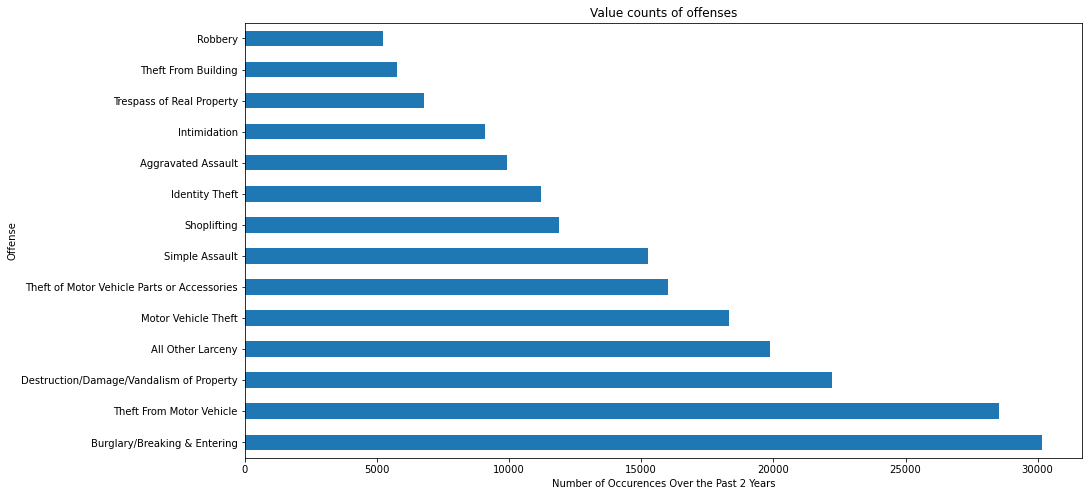

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [24]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 336ms	remaining: 5m 35s
1:	learn: 2.2999611	total: 527ms	remaining: 4m 23s
2:	learn: 2.2194601	total: 722ms	remaining: 3m 59s
3:	learn: 2.1546015	total: 918ms	remaining: 3m 48s
4:	learn: 2.1023865	total: 1.12s	remaining: 3m 42s
5:	learn: 2.0583486	total: 1.33s	remaining: 3m 40s
6:	learn: 2.0212087	total: 1.53s	remaining: 3m 37s
7:	learn: 1.9898034	total: 1.74s	remaining: 3m 36s
8:	learn: 1.9629609	total: 1.97s	remaining: 3m 36s
9:	learn: 1.9385266	total: 2.19s	remaining: 3m 36s
10:	learn: 1.9170486	total: 2.4s	remaining: 3m 35s
11:	learn: 1.8977704	total: 2.6s	remaining: 3m 34s
12:	learn: 1.8810050	total: 2.81s	remaining: 3m 33s
13:	learn: 1.8659622	total: 3.01s	remaining: 3m 31s
14:	learn: 1.8528057	total: 3.21s	remaining: 3m 31s
15:	learn: 1.8413095	total: 3.41s	remaining: 3m 29s
16:	learn: 1.8304887	total: 3.61s	remaining: 3m 28s
17:	learn: 1.8207193	total: 3.8s	remaining: 3m 27s
18:	learn: 1.8118833	total: 4.01s	remaining: 3m

158:	learn: 1.6251733	total: 30.9s	remaining: 2m 43s
159:	learn: 1.6246682	total: 31.1s	remaining: 2m 43s
160:	learn: 1.6240814	total: 31.3s	remaining: 2m 43s
161:	learn: 1.6234912	total: 31.5s	remaining: 2m 43s
162:	learn: 1.6227072	total: 31.7s	remaining: 2m 42s
163:	learn: 1.6221519	total: 31.9s	remaining: 2m 42s
164:	learn: 1.6218260	total: 32.1s	remaining: 2m 42s
165:	learn: 1.6211820	total: 32.3s	remaining: 2m 42s
166:	learn: 1.6204335	total: 32.5s	remaining: 2m 41s
167:	learn: 1.6199455	total: 32.7s	remaining: 2m 41s
168:	learn: 1.6193922	total: 32.9s	remaining: 2m 41s
169:	learn: 1.6187407	total: 33.1s	remaining: 2m 41s
170:	learn: 1.6180585	total: 33.2s	remaining: 2m 41s
171:	learn: 1.6176398	total: 33.4s	remaining: 2m 40s
172:	learn: 1.6170568	total: 33.6s	remaining: 2m 40s
173:	learn: 1.6165132	total: 33.8s	remaining: 2m 40s
174:	learn: 1.6159495	total: 34s	remaining: 2m 40s
175:	learn: 1.6153028	total: 34.2s	remaining: 2m 40s
176:	learn: 1.6146298	total: 34.4s	remaining: 2m

314:	learn: 1.5649341	total: 1m	remaining: 2m 12s
315:	learn: 1.5647062	total: 1m 1s	remaining: 2m 12s
316:	learn: 1.5645829	total: 1m 1s	remaining: 2m 11s
317:	learn: 1.5642024	total: 1m 1s	remaining: 2m 11s
318:	learn: 1.5640665	total: 1m 1s	remaining: 2m 11s
319:	learn: 1.5637100	total: 1m 1s	remaining: 2m 11s
320:	learn: 1.5633905	total: 1m 1s	remaining: 2m 11s
321:	learn: 1.5631116	total: 1m 2s	remaining: 2m 10s
322:	learn: 1.5627410	total: 1m 2s	remaining: 2m 10s
323:	learn: 1.5624283	total: 1m 2s	remaining: 2m 10s
324:	learn: 1.5621756	total: 1m 2s	remaining: 2m 10s
325:	learn: 1.5618323	total: 1m 2s	remaining: 2m 10s
326:	learn: 1.5616583	total: 1m 3s	remaining: 2m 9s
327:	learn: 1.5613896	total: 1m 3s	remaining: 2m 9s
328:	learn: 1.5609458	total: 1m 3s	remaining: 2m 9s
329:	learn: 1.5606630	total: 1m 3s	remaining: 2m 9s
330:	learn: 1.5603782	total: 1m 3s	remaining: 2m 9s
331:	learn: 1.5601729	total: 1m 4s	remaining: 2m 9s
332:	learn: 1.5598859	total: 1m 4s	remaining: 2m 8s
333

468:	learn: 1.5303809	total: 1m 30s	remaining: 1m 42s
469:	learn: 1.5302180	total: 1m 30s	remaining: 1m 42s
470:	learn: 1.5299901	total: 1m 30s	remaining: 1m 42s
471:	learn: 1.5297455	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.5295825	total: 1m 31s	remaining: 1m 41s
473:	learn: 1.5294413	total: 1m 31s	remaining: 1m 41s
474:	learn: 1.5292287	total: 1m 31s	remaining: 1m 41s
475:	learn: 1.5289551	total: 1m 31s	remaining: 1m 41s
476:	learn: 1.5286701	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.5285735	total: 1m 32s	remaining: 1m 40s
478:	learn: 1.5283585	total: 1m 32s	remaining: 1m 40s
479:	learn: 1.5281016	total: 1m 32s	remaining: 1m 40s
480:	learn: 1.5279492	total: 1m 32s	remaining: 1m 40s
481:	learn: 1.5278739	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.5277657	total: 1m 33s	remaining: 1m 39s
483:	learn: 1.5276349	total: 1m 33s	remaining: 1m 39s
484:	learn: 1.5274693	total: 1m 33s	remaining: 1m 39s
485:	learn: 1.5272937	total: 1m 33s	remaining: 1m 39s
486:	learn: 1.5271195	total:

620:	learn: 1.5061325	total: 2m	remaining: 1m 13s
621:	learn: 1.5060006	total: 2m	remaining: 1m 13s
622:	learn: 1.5058894	total: 2m	remaining: 1m 12s
623:	learn: 1.5057118	total: 2m	remaining: 1m 12s
624:	learn: 1.5056597	total: 2m	remaining: 1m 12s
625:	learn: 1.5055096	total: 2m 1s	remaining: 1m 12s
626:	learn: 1.5053330	total: 2m 1s	remaining: 1m 12s
627:	learn: 1.5051102	total: 2m 1s	remaining: 1m 11s
628:	learn: 1.5049670	total: 2m 1s	remaining: 1m 11s
629:	learn: 1.5048555	total: 2m 1s	remaining: 1m 11s
630:	learn: 1.5047674	total: 2m 2s	remaining: 1m 11s
631:	learn: 1.5045301	total: 2m 2s	remaining: 1m 11s
632:	learn: 1.5044772	total: 2m 2s	remaining: 1m 11s
633:	learn: 1.5043542	total: 2m 2s	remaining: 1m 10s
634:	learn: 1.5042600	total: 2m 2s	remaining: 1m 10s
635:	learn: 1.5040910	total: 2m 3s	remaining: 1m 10s
636:	learn: 1.5039614	total: 2m 3s	remaining: 1m 10s
637:	learn: 1.5037723	total: 2m 3s	remaining: 1m 10s
638:	learn: 1.5036974	total: 2m 3s	remaining: 1m 9s
639:	lear

777:	learn: 1.4853740	total: 2m 30s	remaining: 43.1s
778:	learn: 1.4852877	total: 2m 31s	remaining: 42.9s
779:	learn: 1.4851963	total: 2m 31s	remaining: 42.7s
780:	learn: 1.4849726	total: 2m 31s	remaining: 42.5s
781:	learn: 1.4849048	total: 2m 31s	remaining: 42.3s
782:	learn: 1.4848062	total: 2m 31s	remaining: 42.1s
783:	learn: 1.4847028	total: 2m 32s	remaining: 41.9s
784:	learn: 1.4846536	total: 2m 32s	remaining: 41.7s
785:	learn: 1.4843678	total: 2m 32s	remaining: 41.5s
786:	learn: 1.4842474	total: 2m 32s	remaining: 41.3s
787:	learn: 1.4841990	total: 2m 32s	remaining: 41.1s
788:	learn: 1.4840352	total: 2m 33s	remaining: 40.9s
789:	learn: 1.4838728	total: 2m 33s	remaining: 40.7s
790:	learn: 1.4837988	total: 2m 33s	remaining: 40.5s
791:	learn: 1.4836912	total: 2m 33s	remaining: 40.4s
792:	learn: 1.4835674	total: 2m 33s	remaining: 40.2s
793:	learn: 1.4834131	total: 2m 34s	remaining: 40s
794:	learn: 1.4832386	total: 2m 34s	remaining: 39.8s
795:	learn: 1.4831564	total: 2m 34s	remaining: 3

933:	learn: 1.4689267	total: 3m 1s	remaining: 12.8s
934:	learn: 1.4688580	total: 3m 1s	remaining: 12.6s
935:	learn: 1.4688009	total: 3m 1s	remaining: 12.4s
936:	learn: 1.4687425	total: 3m 1s	remaining: 12.2s
937:	learn: 1.4686443	total: 3m 2s	remaining: 12s
938:	learn: 1.4685779	total: 3m 2s	remaining: 11.8s
939:	learn: 1.4685203	total: 3m 2s	remaining: 11.6s
940:	learn: 1.4683926	total: 3m 2s	remaining: 11.5s
941:	learn: 1.4682419	total: 3m 2s	remaining: 11.3s
942:	learn: 1.4681218	total: 3m 3s	remaining: 11.1s
943:	learn: 1.4680295	total: 3m 3s	remaining: 10.9s
944:	learn: 1.4679649	total: 3m 3s	remaining: 10.7s
945:	learn: 1.4678936	total: 3m 3s	remaining: 10.5s
946:	learn: 1.4678353	total: 3m 3s	remaining: 10.3s
947:	learn: 1.4677239	total: 3m 4s	remaining: 10.1s
948:	learn: 1.4676501	total: 3m 4s	remaining: 9.9s
949:	learn: 1.4675029	total: 3m 4s	remaining: 9.71s
950:	learn: 1.4672623	total: 3m 4s	remaining: 9.51s
951:	learn: 1.4671748	total: 3m 4s	remaining: 9.32s
952:	learn: 1.4

In [25]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

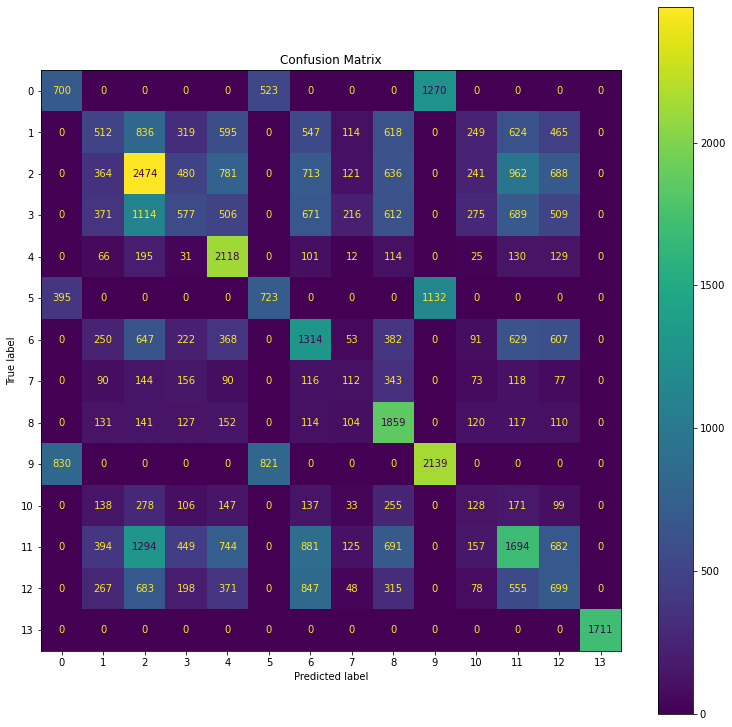

In [28]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 13.2ms	remaining: 1.31s
1:	learn: 2.4762514	total: 25.2ms	remaining: 1.23s
2:	learn: 2.4237444	total: 37ms	remaining: 1.2s
3:	learn: 2.3795726	total: 49ms	remaining: 1.18s
4:	learn: 2.3414035	total: 61ms	remaining: 1.16s
5:	learn: 2.3078013	total: 72.7ms	remaining: 1.14s
6:	learn: 2.2778569	total: 84.3ms	remaining: 1.12s
7:	learn: 2.2509267	total: 95.8ms	remaining: 1.1s
8:	learn: 2.2265149	total: 107ms	remaining: 1.08s
9:	learn: 2.2043153	total: 118ms	remaining: 1.06s
10:	learn: 2.1839448	total: 128ms	remaining: 1.04s
11:	learn: 2.1652505	total: 139ms	remaining: 1.02s
12:	learn: 2.1480046	total: 150ms	remaining: 1s
13:	learn: 2.1320227	total: 161ms	remaining: 990ms
14:	learn: 2.1172352	total: 172ms	remaining: 975ms
15:	learn: 2.1034803	total: 183ms	remaining: 961ms
16:	learn: 2.0906594	total: 194ms	remaining: 948ms
17:	learn: 2.0787237	total: 205ms	remaining: 934ms
18:	learn: 2.0675539	total: 216ms	remaining: 921ms
19:	learn: 2.0571036	total: 227ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 11.8ms	remaining: 1.17s
1:	learn: 2.4762576	total: 22.6ms	remaining: 1.11s
2:	learn: 2.4237358	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795674	total: 44.1ms	remaining: 1.06s
4:	learn: 2.3413909	total: 55ms	remaining: 1.04s
5:	learn: 2.3077991	total: 65.7ms	remaining: 1.03s
6:	learn: 2.2778537	total: 76.6ms	remaining: 1.02s
7:	learn: 2.2509244	total: 87.4ms	remaining: 1s
8:	learn: 2.2265174	total: 98.3ms	remaining: 994ms
9:	learn: 2.2043126	total: 109ms	remaining: 982ms
10:	learn: 2.1839418	total: 120ms	remaining: 969ms
11:	learn: 2.1652518	total: 131ms	remaining: 958ms
12:	learn: 2.1479991	total: 141ms	remaining: 946ms
13:	learn: 2.1320212	total: 152ms	remaining: 935ms
14:	learn: 2.1172271	total: 163ms	remaining: 923ms
15:	learn: 2.1034693	total: 174ms	remaining: 912ms
16:	learn: 2.0906570	total: 184ms	remaining: 900ms
17:	learn: 2.0787215	total: 195ms	remaining: 890ms
18:	learn: 2.0675514	total: 206ms	remaining: 878ms
19:	learn: 2.0571039	total: 217ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 12ms	remaining: 1.19s
1:	learn: 2.4762643	total: 23ms	remaining: 1.13s
2:	learn: 2.4237412	total: 34.1ms	remaining: 1.1s
3:	learn: 2.3795753	total: 44.9ms	remaining: 1.08s
4:	learn: 2.3413938	total: 55.7ms	remaining: 1.06s
5:	learn: 2.3077917	total: 66.6ms	remaining: 1.04s
6:	learn: 2.2778550	total: 77.4ms	remaining: 1.03s
7:	learn: 2.2509156	total: 88.2ms	remaining: 1.01s
8:	learn: 2.2265216	total: 99.1ms	remaining: 1s
9:	learn: 2.2043303	total: 110ms	remaining: 989ms
10:	learn: 2.1839470	total: 121ms	remaining: 977ms
11:	learn: 2.1652457	total: 132ms	remaining: 966ms
12:	learn: 2.1480037	total: 143ms	remaining: 954ms
13:	learn: 2.1320178	total: 153ms	remaining: 942ms
14:	learn: 2.1172227	total: 164ms	remaining: 931ms
15:	learn: 2.1034703	total: 175ms	remaining: 919ms
16:	learn: 2.0906616	total: 186ms	remaining: 907ms
17:	learn: 2.0787261	total: 197ms	remaining: 896ms
18:	learn: 2.0675760	total: 208ms	remaining: 886ms
19:	learn: 2.0571256	total: 219ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419923	total: 11.7ms	remaining: 1.16s
1:	learn: 2.4762682	total: 22.6ms	remaining: 1.11s
2:	learn: 2.4237449	total: 33.5ms	remaining: 1.08s
3:	learn: 2.3795785	total: 44.4ms	remaining: 1.06s
4:	learn: 2.3413953	total: 55.2ms	remaining: 1.05s
5:	learn: 2.3078053	total: 66ms	remaining: 1.03s
6:	learn: 2.2778565	total: 76.9ms	remaining: 1.02s
7:	learn: 2.2509225	total: 87.7ms	remaining: 1.01s
8:	learn: 2.2265251	total: 98.6ms	remaining: 997ms
9:	learn: 2.2043271	total: 109ms	remaining: 984ms
10:	learn: 2.1839507	total: 120ms	remaining: 972ms
11:	learn: 2.1652580	total: 131ms	remaining: 961ms
12:	learn: 2.1480045	total: 142ms	remaining: 949ms
13:	learn: 2.1320323	total: 153ms	remaining: 938ms
14:	learn: 2.1172284	total: 164ms	remaining: 927ms
15:	learn: 2.1034728	total: 174ms	remaining: 915ms
16:	learn: 2.0906645	total: 185ms	remaining: 904ms
17:	learn: 2.0787271	total: 196ms	remaining: 893ms
18:	learn: 2.0675733	total: 207ms	remaining: 882ms
19:	learn: 2.0571302	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 11.9ms	remaining: 1.18s
1:	learn: 2.4762635	total: 22.8ms	remaining: 1.12s
2:	learn: 2.4237491	total: 33.6ms	remaining: 1.09s
3:	learn: 2.3795777	total: 44.5ms	remaining: 1.07s
4:	learn: 2.3413977	total: 55.4ms	remaining: 1.05s
5:	learn: 2.3077954	total: 66.3ms	remaining: 1.04s
6:	learn: 2.2778531	total: 77.1ms	remaining: 1.02s
7:	learn: 2.2509232	total: 88ms	remaining: 1.01s
8:	learn: 2.2265224	total: 98.8ms	remaining: 999ms
9:	learn: 2.2043104	total: 110ms	remaining: 987ms
10:	learn: 2.1839472	total: 121ms	remaining: 975ms
11:	learn: 2.1652482	total: 131ms	remaining: 964ms
12:	learn: 2.1479993	total: 142ms	remaining: 951ms
13:	learn: 2.1320242	total: 153ms	remaining: 940ms
14:	learn: 2.1172318	total: 164ms	remaining: 928ms
15:	learn: 2.1034799	total: 175ms	remaining: 917ms
16:	learn: 2.0906598	total: 186ms	remaining: 907ms
17:	learn: 2.0787219	total: 197ms	remaining: 895ms
18:	learn: 2.0675551	total: 207ms	remaining: 884ms
19:	learn: 2.0571097	total: 218ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.7ms	remaining: 1.16s
1:	learn: 2.3598895	total: 22.5ms	remaining: 1.1s
2:	learn: 2.2913397	total: 33.3ms	remaining: 1.08s
3:	learn: 2.2369277	total: 44ms	remaining: 1.06s
4:	learn: 2.1922569	total: 54.8ms	remaining: 1.04s
5:	learn: 2.1547724	total: 65.5ms	remaining: 1.02s
6:	learn: 2.1228984	total: 76.4ms	remaining: 1.01s
7:	learn: 2.0954139	total: 86.9ms	remaining: 1000ms
8:	learn: 2.0716174	total: 97.6ms	remaining: 987ms
9:	learn: 2.0508296	total: 108ms	remaining: 975ms
10:	learn: 2.0271506	total: 119ms	remaining: 965ms
11:	learn: 2.0081885	total: 130ms	remaining: 954ms
12:	learn: 1.9930107	total: 141ms	remaining: 942ms
13:	learn: 1.9817104	total: 151ms	remaining: 930ms
14:	learn: 1.9679391	total: 162ms	remaining: 920ms
15:	learn: 1.9588124	total: 173ms	remaining: 909ms
16:	learn: 1.9460534	total: 184ms	remaining: 899ms
17:	learn: 1.9355643	total: 195ms	remaining: 886ms
18:	learn: 1.9294893	total: 206ms	remaining: 876ms
19:	learn: 1.9230232	total: 216ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 11.7ms	remaining: 1.16s
1:	learn: 2.3598792	total: 22.6ms	remaining: 1.11s
2:	learn: 2.2913389	total: 33.4ms	remaining: 1.08s
3:	learn: 2.2369233	total: 44.2ms	remaining: 1.06s
4:	learn: 2.1922464	total: 55.1ms	remaining: 1.05s
5:	learn: 2.1547680	total: 65.9ms	remaining: 1.03s
6:	learn: 2.1228947	total: 76.8ms	remaining: 1.02s
7:	learn: 2.0954127	total: 87.5ms	remaining: 1.01s
8:	learn: 2.0716164	total: 98.4ms	remaining: 995ms
9:	learn: 2.0508223	total: 109ms	remaining: 983ms
10:	learn: 2.0270754	total: 120ms	remaining: 975ms
11:	learn: 2.0104777	total: 131ms	remaining: 963ms
12:	learn: 1.9988608	total: 142ms	remaining: 951ms
13:	learn: 1.9820011	total: 153ms	remaining: 940ms
14:	learn: 1.9669209	total: 164ms	remaining: 929ms
15:	learn: 1.9591942	total: 175ms	remaining: 918ms
16:	learn: 1.9464718	total: 186ms	remaining: 907ms
17:	learn: 1.9359812	total: 196ms	remaining: 895ms
18:	learn: 1.9264026	total: 207ms	remaining: 884ms
19:	learn: 1.9200552	total: 218m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.7ms	remaining: 1.16s
1:	learn: 2.3598852	total: 22.5ms	remaining: 1.1s
2:	learn: 2.2913316	total: 33.3ms	remaining: 1.08s
3:	learn: 2.2369270	total: 44ms	remaining: 1.05s
4:	learn: 2.1922604	total: 54.8ms	remaining: 1.04s
5:	learn: 2.1547794	total: 65.6ms	remaining: 1.03s
6:	learn: 2.1228896	total: 76.4ms	remaining: 1.01s
7:	learn: 2.0954111	total: 87.1ms	remaining: 1s
8:	learn: 2.0716292	total: 97.9ms	remaining: 990ms
9:	learn: 2.0508355	total: 109ms	remaining: 979ms
10:	learn: 2.0271104	total: 120ms	remaining: 969ms
11:	learn: 2.0105111	total: 130ms	remaining: 956ms
12:	learn: 1.9924270	total: 141ms	remaining: 946ms
13:	learn: 1.9822249	total: 152ms	remaining: 935ms
14:	learn: 1.9684890	total: 163ms	remaining: 924ms
15:	learn: 1.9593069	total: 174ms	remaining: 913ms
16:	learn: 1.9465944	total: 185ms	remaining: 903ms
17:	learn: 1.9361021	total: 196ms	remaining: 892ms
18:	learn: 1.9296531	total: 207ms	remaining: 882ms
19:	learn: 1.9202075	total: 218ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519384	total: 12ms	remaining: 1.19s
1:	learn: 2.3598866	total: 22.9ms	remaining: 1.12s
2:	learn: 2.2913452	total: 33.7ms	remaining: 1.09s
3:	learn: 2.2369312	total: 44.5ms	remaining: 1.07s
4:	learn: 2.1922599	total: 55.4ms	remaining: 1.05s
5:	learn: 2.1547794	total: 66.3ms	remaining: 1.04s
6:	learn: 2.1229024	total: 77.2ms	remaining: 1.03s
7:	learn: 2.0954266	total: 88.1ms	remaining: 1.01s
8:	learn: 2.0716272	total: 98.9ms	remaining: 1s
9:	learn: 2.0508478	total: 110ms	remaining: 988ms
10:	learn: 2.0271349	total: 121ms	remaining: 977ms
11:	learn: 2.0105356	total: 132ms	remaining: 965ms
12:	learn: 1.9924692	total: 143ms	remaining: 955ms
13:	learn: 1.9823056	total: 153ms	remaining: 942ms
14:	learn: 1.9673153	total: 164ms	remaining: 932ms
15:	learn: 1.9591125	total: 175ms	remaining: 920ms
16:	learn: 1.9467488	total: 186ms	remaining: 909ms
17:	learn: 1.9362574	total: 197ms	remaining: 896ms
18:	learn: 1.9302152	total: 208ms	remaining: 886ms
19:	learn: 1.9237624	total: 219ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.1ms	remaining: 1.19s
1:	learn: 2.3598852	total: 23ms	remaining: 1.13s
2:	learn: 2.2913371	total: 33.8ms	remaining: 1.09s
3:	learn: 2.2369275	total: 44.7ms	remaining: 1.07s
4:	learn: 2.1922648	total: 55.6ms	remaining: 1.06s
5:	learn: 2.1547782	total: 66.5ms	remaining: 1.04s
6:	learn: 2.1228920	total: 77.1ms	remaining: 1.02s
7:	learn: 2.0954172	total: 88ms	remaining: 1.01s
8:	learn: 2.0716159	total: 98.8ms	remaining: 999ms
9:	learn: 2.0508375	total: 110ms	remaining: 987ms
10:	learn: 2.0270728	total: 121ms	remaining: 976ms
11:	learn: 2.0104718	total: 131ms	remaining: 963ms
12:	learn: 1.9988460	total: 142ms	remaining: 950ms
13:	learn: 1.9821267	total: 153ms	remaining: 940ms
14:	learn: 1.9670316	total: 164ms	remaining: 930ms
15:	learn: 1.9588432	total: 175ms	remaining: 918ms
16:	learn: 1.9465870	total: 186ms	remaining: 907ms
17:	learn: 1.9360986	total: 197ms	remaining: 896ms
18:	learn: 1.9296688	total: 208ms	remaining: 885ms
19:	learn: 1.9202300	total: 219ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 11.8ms	remaining: 1.16s
1:	learn: 1.9520627	total: 22.8ms	remaining: 1.11s
2:	learn: 1.8880724	total: 33.6ms	remaining: 1.09s
3:	learn: 1.8521886	total: 44.6ms	remaining: 1.07s
4:	learn: 1.8356853	total: 55.8ms	remaining: 1.06s
5:	learn: 1.8255545	total: 66.8ms	remaining: 1.05s
6:	learn: 1.8101048	total: 77.6ms	remaining: 1.03s
7:	learn: 1.8011888	total: 88.7ms	remaining: 1.02s
8:	learn: 1.7935489	total: 99.7ms	remaining: 1.01s
9:	learn: 1.7872375	total: 111ms	remaining: 998ms
10:	learn: 1.7818156	total: 121ms	remaining: 983ms
11:	learn: 1.7774932	total: 132ms	remaining: 970ms
12:	learn: 1.7720437	total: 144ms	remaining: 961ms
13:	learn: 1.7672706	total: 154ms	remaining: 949ms
14:	learn: 1.7647358	total: 165ms	remaining: 936ms
15:	learn: 1.7584611	total: 176ms	remaining: 924ms
16:	learn: 1.7548141	total: 187ms	remaining: 914ms
17:	learn: 1.7523385	total: 198ms	remaining: 903ms
18:	learn: 1.7449283	total: 209ms	remaining: 893ms
19:	learn: 1.7430138	total: 220m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12ms	remaining: 1.19s
1:	learn: 1.9517885	total: 23.1ms	remaining: 1.13s
2:	learn: 1.8886576	total: 34.1ms	remaining: 1.1s
3:	learn: 1.8529392	total: 45.3ms	remaining: 1.09s
4:	learn: 1.8330485	total: 56.5ms	remaining: 1.07s
5:	learn: 1.8228301	total: 67.5ms	remaining: 1.06s
6:	learn: 1.8124495	total: 78.9ms	remaining: 1.05s
7:	learn: 1.7977722	total: 89.8ms	remaining: 1.03s
8:	learn: 1.7908951	total: 101ms	remaining: 1.02s
9:	learn: 1.7853126	total: 112ms	remaining: 1.01s
10:	learn: 1.7791104	total: 123ms	remaining: 992ms
11:	learn: 1.7754517	total: 134ms	remaining: 979ms
12:	learn: 1.7716681	total: 145ms	remaining: 968ms
13:	learn: 1.7686969	total: 156ms	remaining: 958ms
14:	learn: 1.7658099	total: 167ms	remaining: 946ms
15:	learn: 1.7577359	total: 178ms	remaining: 934ms
16:	learn: 1.7550342	total: 189ms	remaining: 921ms
17:	learn: 1.7534942	total: 199ms	remaining: 908ms
18:	learn: 1.7500031	total: 211ms	remaining: 898ms
19:	learn: 1.7469651	total: 222ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756957	total: 12ms	remaining: 1.18s
1:	learn: 1.9519060	total: 23ms	remaining: 1.13s
2:	learn: 1.8888379	total: 33.9ms	remaining: 1.1s
3:	learn: 1.8532654	total: 45ms	remaining: 1.08s
4:	learn: 1.8370752	total: 56.2ms	remaining: 1.07s
5:	learn: 1.8272524	total: 67.1ms	remaining: 1.05s
6:	learn: 1.8181760	total: 78.2ms	remaining: 1.04s
7:	learn: 1.8077454	total: 89.5ms	remaining: 1.03s
8:	learn: 1.7947341	total: 100ms	remaining: 1.01s
9:	learn: 1.7880574	total: 112ms	remaining: 1s
10:	learn: 1.7825848	total: 122ms	remaining: 989ms
11:	learn: 1.7740259	total: 133ms	remaining: 976ms
12:	learn: 1.7695076	total: 144ms	remaining: 964ms
13:	learn: 1.7663958	total: 155ms	remaining: 953ms
14:	learn: 1.7627022	total: 166ms	remaining: 942ms
15:	learn: 1.7594749	total: 177ms	remaining: 930ms
16:	learn: 1.7548248	total: 188ms	remaining: 918ms
17:	learn: 1.7527021	total: 199ms	remaining: 908ms
18:	learn: 1.7499505	total: 210ms	remaining: 896ms
19:	learn: 1.7461351	total: 221ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9519926	total: 22.9ms	remaining: 1.12s
2:	learn: 1.8889247	total: 33.6ms	remaining: 1.09s
3:	learn: 1.8535366	total: 45.1ms	remaining: 1.08s
4:	learn: 1.8340449	total: 57.2ms	remaining: 1.09s
5:	learn: 1.8238953	total: 68.1ms	remaining: 1.07s
6:	learn: 1.8162297	total: 79.1ms	remaining: 1.05s
7:	learn: 1.8014084	total: 89.8ms	remaining: 1.03s
8:	learn: 1.7950083	total: 101ms	remaining: 1.02s
9:	learn: 1.7892778	total: 112ms	remaining: 1.01s
10:	learn: 1.7836331	total: 123ms	remaining: 992ms
11:	learn: 1.7789927	total: 134ms	remaining: 980ms
12:	learn: 1.7714939	total: 145ms	remaining: 970ms
13:	learn: 1.7681401	total: 156ms	remaining: 957ms
14:	learn: 1.7653017	total: 167ms	remaining: 945ms
15:	learn: 1.7573029	total: 178ms	remaining: 933ms
16:	learn: 1.7539602	total: 189ms	remaining: 921ms
17:	learn: 1.7508532	total: 199ms	remaining: 908ms
18:	learn: 1.7481671	total: 211ms	remaining: 898ms
19:	learn: 1.7448730	total: 222ms

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 11.9ms	remaining: 1.18s
1:	learn: 1.9517451	total: 22.9ms	remaining: 1.12s
2:	learn: 1.8888390	total: 33.8ms	remaining: 1.09s
3:	learn: 1.8531956	total: 45.1ms	remaining: 1.08s
4:	learn: 1.8335321	total: 56.3ms	remaining: 1.07s
5:	learn: 1.8233264	total: 67.4ms	remaining: 1.06s
6:	learn: 1.8157681	total: 79.3ms	remaining: 1.05s
7:	learn: 1.8008696	total: 90.3ms	remaining: 1.04s
8:	learn: 1.7944985	total: 101ms	remaining: 1.02s
9:	learn: 1.7897202	total: 112ms	remaining: 1.01s
10:	learn: 1.7810922	total: 123ms	remaining: 998ms
11:	learn: 1.7755223	total: 134ms	remaining: 984ms
12:	learn: 1.7681779	total: 145ms	remaining: 973ms
13:	learn: 1.7640497	total: 156ms	remaining: 961ms
14:	learn: 1.7611053	total: 168ms	remaining: 950ms
15:	learn: 1.7569324	total: 179ms	remaining: 938ms
16:	learn: 1.7515369	total: 189ms	remaining: 925ms
17:	learn: 1.7484703	total: 200ms	remaining: 913ms
18:	learn: 1.7450672	total: 211ms	remaining: 900ms
19:	learn: 1.7421793	total: 222ms

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 12.1ms	remaining: 6.04s
1:	learn: 2.4762514	total: 23.1ms	remaining: 5.76s
2:	learn: 2.4237444	total: 34.1ms	remaining: 5.65s
3:	learn: 2.3795726	total: 45.1ms	remaining: 5.59s
4:	learn: 2.3414035	total: 56.1ms	remaining: 5.55s
5:	learn: 2.3078011	total: 66.9ms	remaining: 5.51s
6:	learn: 2.2778569	total: 77.6ms	remaining: 5.47s
7:	learn: 2.2509267	total: 88.4ms	remaining: 5.43s
8:	learn: 2.2265152	total: 99.1ms	remaining: 5.41s
9:	learn: 2.2043153	total: 110ms	remaining: 5.4s
10:	learn: 2.1839448	total: 121ms	remaining: 5.37s
11:	learn: 2.1652505	total: 132ms	remaining: 5.35s
12:	learn: 2.1480046	total: 143ms	remaining: 5.34s
13:	learn: 2.1320227	total: 153ms	remaining: 5.32s
14:	learn: 2.1172352	total: 164ms	remaining: 5.3s
15:	learn: 2.1034803	total: 175ms	remaining: 5.29s
16:	learn: 2.0906594	total: 185ms	remaining: 5.27s
17:	learn: 2.0787237	total: 196ms	remaining: 5.25s
18:	learn: 2.0675539	total: 207ms	remaining: 5.24s
19:	learn: 2.0571036	total: 218ms	

171:	learn: 1.7685851	total: 1.88s	remaining: 3.59s
172:	learn: 1.7681787	total: 1.9s	remaining: 3.58s
173:	learn: 1.7678955	total: 1.91s	remaining: 3.57s
174:	learn: 1.7672910	total: 1.92s	remaining: 3.56s
175:	learn: 1.7668748	total: 1.93s	remaining: 3.55s
176:	learn: 1.7659994	total: 1.94s	remaining: 3.54s
177:	learn: 1.7655908	total: 1.95s	remaining: 3.53s
178:	learn: 1.7653113	total: 1.96s	remaining: 3.52s
179:	learn: 1.7649124	total: 1.97s	remaining: 3.51s
180:	learn: 1.7645243	total: 1.98s	remaining: 3.5s
181:	learn: 1.7642734	total: 1.99s	remaining: 3.48s
182:	learn: 1.7639449	total: 2s	remaining: 3.47s
183:	learn: 1.7630630	total: 2.02s	remaining: 3.46s
184:	learn: 1.7627942	total: 2.03s	remaining: 3.45s
185:	learn: 1.7621814	total: 2.04s	remaining: 3.44s
186:	learn: 1.7618503	total: 2.05s	remaining: 3.43s
187:	learn: 1.7614320	total: 2.06s	remaining: 3.42s
188:	learn: 1.7606212	total: 2.07s	remaining: 3.41s
189:	learn: 1.7603007	total: 2.08s	remaining: 3.4s
190:	learn: 1.7597

342:	learn: 1.7164298	total: 3.76s	remaining: 1.72s
343:	learn: 1.7162824	total: 3.77s	remaining: 1.71s
344:	learn: 1.7160442	total: 3.78s	remaining: 1.7s
345:	learn: 1.7155439	total: 3.79s	remaining: 1.69s
346:	learn: 1.7151150	total: 3.8s	remaining: 1.68s
347:	learn: 1.7148387	total: 3.81s	remaining: 1.66s
348:	learn: 1.7146480	total: 3.82s	remaining: 1.65s
349:	learn: 1.7144622	total: 3.83s	remaining: 1.64s
350:	learn: 1.7140461	total: 3.84s	remaining: 1.63s
351:	learn: 1.7139352	total: 3.85s	remaining: 1.62s
352:	learn: 1.7137135	total: 3.87s	remaining: 1.61s
353:	learn: 1.7136036	total: 3.88s	remaining: 1.6s
354:	learn: 1.7134936	total: 3.89s	remaining: 1.59s
355:	learn: 1.7133483	total: 3.9s	remaining: 1.58s
356:	learn: 1.7131927	total: 3.91s	remaining: 1.57s
357:	learn: 1.7127038	total: 3.92s	remaining: 1.55s
358:	learn: 1.7124623	total: 3.93s	remaining: 1.54s
359:	learn: 1.7123736	total: 3.94s	remaining: 1.53s
360:	learn: 1.7122130	total: 3.95s	remaining: 1.52s
361:	learn: 1.71

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419859	total: 11.9ms	remaining: 5.94s
1:	learn: 2.4762576	total: 22.8ms	remaining: 5.67s
2:	learn: 2.4237358	total: 33.6ms	remaining: 5.56s
3:	learn: 2.3795674	total: 44.4ms	remaining: 5.51s
4:	learn: 2.3413909	total: 55.2ms	remaining: 5.47s
5:	learn: 2.3077991	total: 66ms	remaining: 5.43s
6:	learn: 2.2778537	total: 76.8ms	remaining: 5.41s
7:	learn: 2.2509244	total: 87.7ms	remaining: 5.39s
8:	learn: 2.2265174	total: 98.5ms	remaining: 5.37s
9:	learn: 2.2043124	total: 109ms	remaining: 5.36s
10:	learn: 2.1839418	total: 120ms	remaining: 5.35s
11:	learn: 2.1652518	total: 131ms	remaining: 5.33s
12:	learn: 2.1479991	total: 142ms	remaining: 5.32s
13:	learn: 2.1320215	total: 153ms	remaining: 5.31s
14:	learn: 2.1172271	total: 164ms	remaining: 5.29s
15:	learn: 2.1034693	total: 175ms	remaining: 5.28s
16:	learn: 2.0906570	total: 185ms	remaining: 5.27s
17:	learn: 2.0787215	total: 196ms	remaining: 5.25s
18:	learn: 2.0675514	total: 207ms	remaining: 5.24s
19:	learn: 2.0571039	total: 218ms	

171:	learn: 1.7711415	total: 1.89s	remaining: 3.61s
172:	learn: 1.7702930	total: 1.9s	remaining: 3.6s
173:	learn: 1.7699676	total: 1.91s	remaining: 3.59s
174:	learn: 1.7696166	total: 1.93s	remaining: 3.58s
175:	learn: 1.7692862	total: 1.94s	remaining: 3.56s
176:	learn: 1.7688969	total: 1.95s	remaining: 3.55s
177:	learn: 1.7684584	total: 1.96s	remaining: 3.54s
178:	learn: 1.7680450	total: 1.97s	remaining: 3.53s
179:	learn: 1.7677043	total: 1.98s	remaining: 3.52s
180:	learn: 1.7673412	total: 1.99s	remaining: 3.51s
181:	learn: 1.7669492	total: 2s	remaining: 3.5s
182:	learn: 1.7663629	total: 2.01s	remaining: 3.49s
183:	learn: 1.7660972	total: 2.02s	remaining: 3.48s
184:	learn: 1.7656890	total: 2.04s	remaining: 3.46s
185:	learn: 1.7654497	total: 2.05s	remaining: 3.45s
186:	learn: 1.7651065	total: 2.06s	remaining: 3.44s
187:	learn: 1.7648898	total: 2.07s	remaining: 3.43s
188:	learn: 1.7643817	total: 2.08s	remaining: 3.42s
189:	learn: 1.7641049	total: 2.09s	remaining: 3.41s
190:	learn: 1.7638

337:	learn: 1.7252264	total: 3.76s	remaining: 1.8s
338:	learn: 1.7249982	total: 3.77s	remaining: 1.79s
339:	learn: 1.7248177	total: 3.78s	remaining: 1.78s
340:	learn: 1.7246847	total: 3.79s	remaining: 1.77s
341:	learn: 1.7245671	total: 3.8s	remaining: 1.76s
342:	learn: 1.7244357	total: 3.81s	remaining: 1.75s
343:	learn: 1.7241503	total: 3.83s	remaining: 1.73s
344:	learn: 1.7240550	total: 3.84s	remaining: 1.72s
345:	learn: 1.7238326	total: 3.85s	remaining: 1.71s
346:	learn: 1.7237443	total: 3.86s	remaining: 1.7s
347:	learn: 1.7235688	total: 3.87s	remaining: 1.69s
348:	learn: 1.7234317	total: 3.88s	remaining: 1.68s
349:	learn: 1.7232608	total: 3.89s	remaining: 1.67s
350:	learn: 1.7230722	total: 3.9s	remaining: 1.66s
351:	learn: 1.7229634	total: 3.91s	remaining: 1.65s
352:	learn: 1.7227546	total: 3.92s	remaining: 1.63s
353:	learn: 1.7225904	total: 3.94s	remaining: 1.62s
354:	learn: 1.7224039	total: 3.95s	remaining: 1.61s
355:	learn: 1.7223058	total: 3.96s	remaining: 1.6s
356:	learn: 1.722

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 11.9ms	remaining: 5.95s
1:	learn: 2.4762640	total: 22.8ms	remaining: 5.68s
2:	learn: 2.4237410	total: 33.6ms	remaining: 5.56s
3:	learn: 2.3795753	total: 44.5ms	remaining: 5.51s
4:	learn: 2.3413938	total: 55.3ms	remaining: 5.48s
5:	learn: 2.3077917	total: 66.1ms	remaining: 5.44s
6:	learn: 2.2778550	total: 76.9ms	remaining: 5.42s
7:	learn: 2.2509156	total: 87.7ms	remaining: 5.39s
8:	learn: 2.2265216	total: 98.5ms	remaining: 5.37s
9:	learn: 2.2043303	total: 109ms	remaining: 5.35s
10:	learn: 2.1839470	total: 120ms	remaining: 5.33s
11:	learn: 2.1652460	total: 131ms	remaining: 5.32s
12:	learn: 2.1480037	total: 142ms	remaining: 5.31s
13:	learn: 2.1320178	total: 153ms	remaining: 5.3s
14:	learn: 2.1172227	total: 163ms	remaining: 5.28s
15:	learn: 2.1034703	total: 174ms	remaining: 5.27s
16:	learn: 2.0906613	total: 185ms	remaining: 5.25s
17:	learn: 2.0787261	total: 196ms	remaining: 5.24s
18:	learn: 2.0675760	total: 207ms	remaining: 5.23s
19:	learn: 2.0571256	total: 218ms

170:	learn: 1.7716182	total: 1.89s	remaining: 3.63s
171:	learn: 1.7712591	total: 1.9s	remaining: 3.62s
172:	learn: 1.7709825	total: 1.91s	remaining: 3.61s
173:	learn: 1.7705022	total: 1.92s	remaining: 3.6s
174:	learn: 1.7701279	total: 1.93s	remaining: 3.58s
175:	learn: 1.7692790	total: 1.94s	remaining: 3.57s
176:	learn: 1.7689647	total: 1.95s	remaining: 3.56s
177:	learn: 1.7687205	total: 1.96s	remaining: 3.55s
178:	learn: 1.7684490	total: 1.97s	remaining: 3.54s
179:	learn: 1.7680290	total: 1.98s	remaining: 3.53s
180:	learn: 1.7676242	total: 2s	remaining: 3.52s
181:	learn: 1.7668320	total: 2.01s	remaining: 3.51s
182:	learn: 1.7664576	total: 2.02s	remaining: 3.5s
183:	learn: 1.7661542	total: 2.03s	remaining: 3.48s
184:	learn: 1.7658440	total: 2.04s	remaining: 3.47s
185:	learn: 1.7654212	total: 2.05s	remaining: 3.46s
186:	learn: 1.7652019	total: 2.06s	remaining: 3.45s
187:	learn: 1.7648604	total: 2.07s	remaining: 3.44s
188:	learn: 1.7645135	total: 2.08s	remaining: 3.43s
189:	learn: 1.7643

341:	learn: 1.7257232	total: 3.76s	remaining: 1.74s
342:	learn: 1.7255733	total: 3.77s	remaining: 1.73s
343:	learn: 1.7254246	total: 3.78s	remaining: 1.72s
344:	learn: 1.7251685	total: 3.79s	remaining: 1.71s
345:	learn: 1.7249525	total: 3.81s	remaining: 1.69s
346:	learn: 1.7247322	total: 3.82s	remaining: 1.68s
347:	learn: 1.7245129	total: 3.83s	remaining: 1.67s
348:	learn: 1.7244127	total: 3.84s	remaining: 1.66s
349:	learn: 1.7239393	total: 3.85s	remaining: 1.65s
350:	learn: 1.7237591	total: 3.86s	remaining: 1.64s
351:	learn: 1.7236529	total: 3.87s	remaining: 1.63s
352:	learn: 1.7232509	total: 3.88s	remaining: 1.62s
353:	learn: 1.7231658	total: 3.89s	remaining: 1.61s
354:	learn: 1.7229576	total: 3.9s	remaining: 1.59s
355:	learn: 1.7228023	total: 3.92s	remaining: 1.58s
356:	learn: 1.7227217	total: 3.93s	remaining: 1.57s
357:	learn: 1.7222596	total: 3.94s	remaining: 1.56s
358:	learn: 1.7221225	total: 3.95s	remaining: 1.55s
359:	learn: 1.7219205	total: 3.96s	remaining: 1.54s
360:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 12.1ms	remaining: 6.02s
1:	learn: 2.4762685	total: 22.9ms	remaining: 5.71s
2:	learn: 2.4237449	total: 33.8ms	remaining: 5.6s
3:	learn: 2.3795785	total: 44.7ms	remaining: 5.54s
4:	learn: 2.3413953	total: 55.7ms	remaining: 5.51s
5:	learn: 2.3078053	total: 66.5ms	remaining: 5.48s
6:	learn: 2.2778565	total: 77.5ms	remaining: 5.46s
7:	learn: 2.2509227	total: 88.4ms	remaining: 5.44s
8:	learn: 2.2265251	total: 99.3ms	remaining: 5.42s
9:	learn: 2.2043273	total: 110ms	remaining: 5.39s
10:	learn: 2.1839504	total: 121ms	remaining: 5.38s
11:	learn: 2.1652580	total: 132ms	remaining: 5.36s
12:	learn: 2.1480047	total: 143ms	remaining: 5.34s
13:	learn: 2.1320325	total: 153ms	remaining: 5.33s
14:	learn: 2.1172286	total: 164ms	remaining: 5.31s
15:	learn: 2.1034728	total: 175ms	remaining: 5.3s
16:	learn: 2.0906645	total: 186ms	remaining: 5.29s
17:	learn: 2.0787273	total: 197ms	remaining: 5.27s
18:	learn: 2.0675735	total: 208ms	remaining: 5.26s
19:	learn: 2.0571302	total: 219ms	

170:	learn: 1.7716883	total: 1.88s	remaining: 3.62s
171:	learn: 1.7713321	total: 1.89s	remaining: 3.61s
172:	learn: 1.7707779	total: 1.91s	remaining: 3.6s
173:	learn: 1.7704596	total: 1.92s	remaining: 3.59s
174:	learn: 1.7700672	total: 1.93s	remaining: 3.58s
175:	learn: 1.7697453	total: 1.94s	remaining: 3.57s
176:	learn: 1.7693539	total: 1.95s	remaining: 3.56s
177:	learn: 1.7691083	total: 1.96s	remaining: 3.55s
178:	learn: 1.7687765	total: 1.97s	remaining: 3.53s
179:	learn: 1.7685010	total: 1.98s	remaining: 3.52s
180:	learn: 1.7681099	total: 1.99s	remaining: 3.51s
181:	learn: 1.7677542	total: 2s	remaining: 3.5s
182:	learn: 1.7669142	total: 2.02s	remaining: 3.49s
183:	learn: 1.7666118	total: 2.03s	remaining: 3.48s
184:	learn: 1.7662322	total: 2.04s	remaining: 3.47s
185:	learn: 1.7659428	total: 2.05s	remaining: 3.46s
186:	learn: 1.7656415	total: 2.06s	remaining: 3.45s
187:	learn: 1.7652648	total: 2.07s	remaining: 3.44s
188:	learn: 1.7650395	total: 2.08s	remaining: 3.42s
189:	learn: 1.764

337:	learn: 1.7244252	total: 3.72s	remaining: 1.78s
338:	learn: 1.7242546	total: 3.73s	remaining: 1.77s
339:	learn: 1.7240799	total: 3.74s	remaining: 1.76s
340:	learn: 1.7235883	total: 3.75s	remaining: 1.75s
341:	learn: 1.7233628	total: 3.76s	remaining: 1.74s
342:	learn: 1.7231855	total: 3.77s	remaining: 1.73s
343:	learn: 1.7227291	total: 3.79s	remaining: 1.72s
344:	learn: 1.7225508	total: 3.8s	remaining: 1.71s
345:	learn: 1.7224265	total: 3.81s	remaining: 1.7s
346:	learn: 1.7223348	total: 3.82s	remaining: 1.68s
347:	learn: 1.7221958	total: 3.83s	remaining: 1.67s
348:	learn: 1.7220566	total: 3.84s	remaining: 1.66s
349:	learn: 1.7219128	total: 3.85s	remaining: 1.65s
350:	learn: 1.7216908	total: 3.86s	remaining: 1.64s
351:	learn: 1.7215357	total: 3.87s	remaining: 1.63s
352:	learn: 1.7212135	total: 3.88s	remaining: 1.62s
353:	learn: 1.7209678	total: 3.9s	remaining: 1.61s
354:	learn: 1.7205040	total: 3.91s	remaining: 1.59s
355:	learn: 1.7203477	total: 3.92s	remaining: 1.58s
356:	learn: 1.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 12.7ms	remaining: 6.33s
1:	learn: 2.4762635	total: 23.8ms	remaining: 5.93s
2:	learn: 2.4237493	total: 34.8ms	remaining: 5.76s
3:	learn: 2.3795777	total: 45.7ms	remaining: 5.67s
4:	learn: 2.3413980	total: 56.9ms	remaining: 5.63s
5:	learn: 2.3077952	total: 68.2ms	remaining: 5.61s
6:	learn: 2.2778531	total: 79.3ms	remaining: 5.58s
7:	learn: 2.2509232	total: 90.3ms	remaining: 5.55s
8:	learn: 2.2265224	total: 101ms	remaining: 5.52s
9:	learn: 2.2043106	total: 112ms	remaining: 5.51s
10:	learn: 2.1839472	total: 124ms	remaining: 5.5s
11:	learn: 2.1652482	total: 135ms	remaining: 5.48s
12:	learn: 2.1479995	total: 146ms	remaining: 5.45s
13:	learn: 2.1320242	total: 156ms	remaining: 5.43s
14:	learn: 2.1172318	total: 168ms	remaining: 5.42s
15:	learn: 2.1034802	total: 178ms	remaining: 5.4s
16:	learn: 2.0906601	total: 189ms	remaining: 5.38s
17:	learn: 2.0787219	total: 200ms	remaining: 5.37s
18:	learn: 2.0675553	total: 211ms	remaining: 5.35s
19:	learn: 2.0571095	total: 222ms	r

165:	learn: 1.7744276	total: 1.85s	remaining: 3.73s
166:	learn: 1.7740856	total: 1.86s	remaining: 3.72s
167:	learn: 1.7731936	total: 1.88s	remaining: 3.71s
168:	learn: 1.7727706	total: 1.89s	remaining: 3.69s
169:	learn: 1.7723728	total: 1.9s	remaining: 3.68s
170:	learn: 1.7719633	total: 1.91s	remaining: 3.67s
171:	learn: 1.7716735	total: 1.92s	remaining: 3.66s
172:	learn: 1.7713382	total: 1.93s	remaining: 3.65s
173:	learn: 1.7709523	total: 1.94s	remaining: 3.64s
174:	learn: 1.7701135	total: 1.95s	remaining: 3.62s
175:	learn: 1.7693699	total: 1.96s	remaining: 3.61s
176:	learn: 1.7688446	total: 1.97s	remaining: 3.6s
177:	learn: 1.7684078	total: 1.99s	remaining: 3.59s
178:	learn: 1.7680524	total: 2s	remaining: 3.58s
179:	learn: 1.7677711	total: 2.01s	remaining: 3.57s
180:	learn: 1.7674185	total: 2.02s	remaining: 3.56s
181:	learn: 1.7670810	total: 2.03s	remaining: 3.54s
182:	learn: 1.7666789	total: 2.04s	remaining: 3.53s
183:	learn: 1.7664472	total: 2.05s	remaining: 3.52s
184:	learn: 1.766

333:	learn: 1.7255730	total: 3.7s	remaining: 1.84s
334:	learn: 1.7253398	total: 3.71s	remaining: 1.83s
335:	learn: 1.7251090	total: 3.72s	remaining: 1.82s
336:	learn: 1.7247371	total: 3.73s	remaining: 1.81s
337:	learn: 1.7246042	total: 3.75s	remaining: 1.79s
338:	learn: 1.7243866	total: 3.76s	remaining: 1.78s
339:	learn: 1.7238977	total: 3.77s	remaining: 1.77s
340:	learn: 1.7237973	total: 3.78s	remaining: 1.76s
341:	learn: 1.7236947	total: 3.79s	remaining: 1.75s
342:	learn: 1.7234521	total: 3.8s	remaining: 1.74s
343:	learn: 1.7233017	total: 3.81s	remaining: 1.73s
344:	learn: 1.7230032	total: 3.82s	remaining: 1.72s
345:	learn: 1.7228825	total: 3.83s	remaining: 1.71s
346:	learn: 1.7227549	total: 3.84s	remaining: 1.7s
347:	learn: 1.7225243	total: 3.85s	remaining: 1.68s
348:	learn: 1.7223239	total: 3.87s	remaining: 1.67s
349:	learn: 1.7220892	total: 3.88s	remaining: 1.66s
350:	learn: 1.7219160	total: 3.89s	remaining: 1.65s
351:	learn: 1.7218276	total: 3.9s	remaining: 1.64s
352:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519490	total: 11.9ms	remaining: 5.95s
1:	learn: 2.3598895	total: 22.8ms	remaining: 5.67s
2:	learn: 2.2913397	total: 33.6ms	remaining: 5.56s
3:	learn: 2.2369277	total: 44.4ms	remaining: 5.5s
4:	learn: 2.1922569	total: 55.3ms	remaining: 5.47s
5:	learn: 2.1547724	total: 66.1ms	remaining: 5.45s
6:	learn: 2.1228987	total: 77.1ms	remaining: 5.43s
7:	learn: 2.0954139	total: 88ms	remaining: 5.41s
8:	learn: 2.0716174	total: 98.9ms	remaining: 5.39s
9:	learn: 2.0508296	total: 110ms	remaining: 5.37s
10:	learn: 2.0271504	total: 121ms	remaining: 5.36s
11:	learn: 2.0081887	total: 132ms	remaining: 5.36s
12:	learn: 1.9930107	total: 142ms	remaining: 5.33s
13:	learn: 1.9817104	total: 153ms	remaining: 5.32s
14:	learn: 1.9679395	total: 164ms	remaining: 5.31s
15:	learn: 1.9588124	total: 175ms	remaining: 5.29s
16:	learn: 1.9460536	total: 186ms	remaining: 5.29s
17:	learn: 1.9355643	total: 197ms	remaining: 5.28s
18:	learn: 1.9294893	total: 208ms	remaining: 5.27s
19:	learn: 1.9230231	total: 219ms	r

166:	learn: 1.7177695	total: 1.87s	remaining: 3.73s
167:	learn: 1.7174349	total: 1.88s	remaining: 3.71s
168:	learn: 1.7170583	total: 1.89s	remaining: 3.7s
169:	learn: 1.7168362	total: 1.9s	remaining: 3.69s
170:	learn: 1.7159009	total: 1.91s	remaining: 3.68s
171:	learn: 1.7155941	total: 1.92s	remaining: 3.67s
172:	learn: 1.7153971	total: 1.93s	remaining: 3.65s
173:	learn: 1.7150502	total: 1.94s	remaining: 3.64s
174:	learn: 1.7146613	total: 1.96s	remaining: 3.63s
175:	learn: 1.7138389	total: 1.97s	remaining: 3.62s
176:	learn: 1.7133016	total: 1.98s	remaining: 3.61s
177:	learn: 1.7129843	total: 1.99s	remaining: 3.6s
178:	learn: 1.7124140	total: 2s	remaining: 3.59s
179:	learn: 1.7119136	total: 2.01s	remaining: 3.57s
180:	learn: 1.7117451	total: 2.02s	remaining: 3.56s
181:	learn: 1.7113049	total: 2.03s	remaining: 3.55s
182:	learn: 1.7109581	total: 2.04s	remaining: 3.54s
183:	learn: 1.7107237	total: 2.05s	remaining: 3.53s
184:	learn: 1.7105025	total: 2.06s	remaining: 3.52s
185:	learn: 1.7100

333:	learn: 1.6614280	total: 3.72s	remaining: 1.85s
334:	learn: 1.6612656	total: 3.73s	remaining: 1.84s
335:	learn: 1.6609623	total: 3.74s	remaining: 1.83s
336:	learn: 1.6606540	total: 3.75s	remaining: 1.81s
337:	learn: 1.6603121	total: 3.76s	remaining: 1.8s
338:	learn: 1.6600521	total: 3.77s	remaining: 1.79s
339:	learn: 1.6597711	total: 3.79s	remaining: 1.78s
340:	learn: 1.6596047	total: 3.8s	remaining: 1.77s
341:	learn: 1.6592688	total: 3.81s	remaining: 1.76s
342:	learn: 1.6590170	total: 3.82s	remaining: 1.75s
343:	learn: 1.6588410	total: 3.83s	remaining: 1.74s
344:	learn: 1.6586313	total: 3.84s	remaining: 1.73s
345:	learn: 1.6583871	total: 3.85s	remaining: 1.72s
346:	learn: 1.6575278	total: 3.86s	remaining: 1.7s
347:	learn: 1.6574470	total: 3.88s	remaining: 1.69s
348:	learn: 1.6572563	total: 3.89s	remaining: 1.68s
349:	learn: 1.6567300	total: 3.9s	remaining: 1.67s
350:	learn: 1.6566444	total: 3.91s	remaining: 1.66s
351:	learn: 1.6565442	total: 3.92s	remaining: 1.65s
352:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12ms	remaining: 6s
1:	learn: 2.3598789	total: 22.9ms	remaining: 5.7s
2:	learn: 2.2913389	total: 34ms	remaining: 5.63s
3:	learn: 2.2369233	total: 45.1ms	remaining: 5.59s
4:	learn: 2.1922464	total: 56.5ms	remaining: 5.59s
5:	learn: 2.1547680	total: 67.9ms	remaining: 5.59s
6:	learn: 2.1228947	total: 78.9ms	remaining: 5.55s
7:	learn: 2.0954130	total: 90.3ms	remaining: 5.55s
8:	learn: 2.0716164	total: 101ms	remaining: 5.52s
9:	learn: 2.0508223	total: 112ms	remaining: 5.5s
10:	learn: 2.0270752	total: 124ms	remaining: 5.5s
11:	learn: 2.0104778	total: 135ms	remaining: 5.51s
12:	learn: 1.9988610	total: 147ms	remaining: 5.5s
13:	learn: 1.9820010	total: 158ms	remaining: 5.5s
14:	learn: 1.9669211	total: 170ms	remaining: 5.49s
15:	learn: 1.9591942	total: 181ms	remaining: 5.49s
16:	learn: 1.9464717	total: 193ms	remaining: 5.48s
17:	learn: 1.9359811	total: 204ms	remaining: 5.46s
18:	learn: 1.9264024	total: 215ms	remaining: 5.44s
19:	learn: 1.9200552	total: 227ms	remaining: 

162:	learn: 1.7241228	total: 1.82s	remaining: 3.77s
163:	learn: 1.7238931	total: 1.83s	remaining: 3.76s
164:	learn: 1.7234734	total: 1.84s	remaining: 3.75s
165:	learn: 1.7229808	total: 1.86s	remaining: 3.74s
166:	learn: 1.7226357	total: 1.87s	remaining: 3.73s
167:	learn: 1.7223320	total: 1.88s	remaining: 3.71s
168:	learn: 1.7219290	total: 1.89s	remaining: 3.7s
169:	learn: 1.7216965	total: 1.9s	remaining: 3.69s
170:	learn: 1.7215225	total: 1.91s	remaining: 3.68s
171:	learn: 1.7212687	total: 1.92s	remaining: 3.67s
172:	learn: 1.7210345	total: 1.94s	remaining: 3.66s
173:	learn: 1.7207305	total: 1.95s	remaining: 3.65s
174:	learn: 1.7205422	total: 1.96s	remaining: 3.64s
175:	learn: 1.7202876	total: 1.97s	remaining: 3.63s
176:	learn: 1.7200976	total: 1.98s	remaining: 3.61s
177:	learn: 1.7196662	total: 1.99s	remaining: 3.6s
178:	learn: 1.7193971	total: 2s	remaining: 3.59s
179:	learn: 1.7190078	total: 2.01s	remaining: 3.58s
180:	learn: 1.7187616	total: 2.02s	remaining: 3.57s
181:	learn: 1.7182

324:	learn: 1.6798300	total: 3.66s	remaining: 1.97s
325:	learn: 1.6796958	total: 3.67s	remaining: 1.96s
326:	learn: 1.6794967	total: 3.69s	remaining: 1.95s
327:	learn: 1.6789315	total: 3.7s	remaining: 1.94s
328:	learn: 1.6786557	total: 3.71s	remaining: 1.93s
329:	learn: 1.6785416	total: 3.72s	remaining: 1.92s
330:	learn: 1.6784605	total: 3.73s	remaining: 1.9s
331:	learn: 1.6782619	total: 3.74s	remaining: 1.89s
332:	learn: 1.6780751	total: 3.75s	remaining: 1.88s
333:	learn: 1.6778391	total: 3.76s	remaining: 1.87s
334:	learn: 1.6775781	total: 3.78s	remaining: 1.86s
335:	learn: 1.6769880	total: 3.79s	remaining: 1.85s
336:	learn: 1.6764733	total: 3.8s	remaining: 1.84s
337:	learn: 1.6762860	total: 3.81s	remaining: 1.83s
338:	learn: 1.6760651	total: 3.82s	remaining: 1.81s
339:	learn: 1.6758199	total: 3.83s	remaining: 1.8s
340:	learn: 1.6756682	total: 3.85s	remaining: 1.79s
341:	learn: 1.6755525	total: 3.86s	remaining: 1.78s
342:	learn: 1.6753198	total: 3.87s	remaining: 1.77s
343:	learn: 1.67

484:	learn: 1.6532921	total: 5.49s	remaining: 170ms
485:	learn: 1.6531559	total: 5.5s	remaining: 158ms
486:	learn: 1.6527384	total: 5.51s	remaining: 147ms
487:	learn: 1.6526172	total: 5.52s	remaining: 136ms
488:	learn: 1.6525126	total: 5.53s	remaining: 124ms
489:	learn: 1.6524692	total: 5.54s	remaining: 113ms
490:	learn: 1.6523613	total: 5.56s	remaining: 102ms
491:	learn: 1.6522971	total: 5.57s	remaining: 90.5ms
492:	learn: 1.6520757	total: 5.58s	remaining: 79.2ms
493:	learn: 1.6520141	total: 5.59s	remaining: 67.9ms
494:	learn: 1.6519656	total: 5.6s	remaining: 56.6ms
495:	learn: 1.6519062	total: 5.61s	remaining: 45.3ms
496:	learn: 1.6518464	total: 5.62s	remaining: 33.9ms
497:	learn: 1.6516965	total: 5.63s	remaining: 22.6ms
498:	learn: 1.6516316	total: 5.65s	remaining: 11.3ms
499:	learn: 1.6513471	total: 5.66s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 12.2ms	remaining: 6.07s
1:	learn: 2.3598849	total: 23.2ms	remaining: 5.78s
2:	learn: 2.2913319	total: 34.3ms	remaining: 5.68s
3:	learn: 2.2369270	total: 45.4ms	remaining: 5.63s
4:	learn: 2.1922604	total: 56.5ms	remaining: 5.6s
5:	learn: 2.1547796	total: 67.7ms	remaining: 5.57s
6:	learn: 2.1228896	total: 78.7ms	remaining: 5.54s
7:	learn: 2.0954113	total: 90ms	remaining: 5.54s
8:	learn: 2.0716292	total: 101ms	remaining: 5.51s
9:	learn: 2.0508355	total: 112ms	remaining: 5.5s
10:	learn: 2.0271103	total: 123ms	remaining: 5.49s
11:	learn: 2.0105111	total: 134ms	remaining: 5.46s
12:	learn: 1.9924271	total: 145ms	remaining: 5.45s
13:	learn: 1.9822251	total: 156ms	remaining: 5.42s
14:	learn: 1.9684887	total: 167ms	remaining: 5.42s
15:	learn: 1.9593069	total: 179ms	remaining: 5.4s
16:	learn: 1.9465944	total: 190ms	remaining: 5.39s
17:	learn: 1.9361020	total: 201ms	remaining: 5.39s
18:	learn: 1.9296531	total: 213ms	remaining: 5.39s
19:	learn: 1.9202075	total: 224ms	rema

162:	learn: 1.7274873	total: 1.84s	remaining: 3.81s
163:	learn: 1.7272020	total: 1.85s	remaining: 3.8s
164:	learn: 1.7266743	total: 1.86s	remaining: 3.79s
165:	learn: 1.7263907	total: 1.88s	remaining: 3.78s
166:	learn: 1.7259143	total: 1.89s	remaining: 3.77s
167:	learn: 1.7256051	total: 1.9s	remaining: 3.75s
168:	learn: 1.7252555	total: 1.91s	remaining: 3.74s
169:	learn: 1.7247658	total: 1.92s	remaining: 3.73s
170:	learn: 1.7245980	total: 1.93s	remaining: 3.72s
171:	learn: 1.7243724	total: 1.94s	remaining: 3.71s
172:	learn: 1.7235926	total: 1.95s	remaining: 3.69s
173:	learn: 1.7226712	total: 1.97s	remaining: 3.68s
174:	learn: 1.7224598	total: 1.98s	remaining: 3.67s
175:	learn: 1.7222860	total: 1.99s	remaining: 3.66s
176:	learn: 1.7220748	total: 2s	remaining: 3.65s
177:	learn: 1.7219105	total: 2.01s	remaining: 3.63s
178:	learn: 1.7215327	total: 2.02s	remaining: 3.62s
179:	learn: 1.7212227	total: 2.03s	remaining: 3.61s
180:	learn: 1.7208164	total: 2.04s	remaining: 3.6s
181:	learn: 1.7202

327:	learn: 1.6827388	total: 3.68s	remaining: 1.93s
328:	learn: 1.6825990	total: 3.69s	remaining: 1.92s
329:	learn: 1.6822962	total: 3.7s	remaining: 1.91s
330:	learn: 1.6820880	total: 3.71s	remaining: 1.9s
331:	learn: 1.6818411	total: 3.72s	remaining: 1.88s
332:	learn: 1.6816280	total: 3.73s	remaining: 1.87s
333:	learn: 1.6815113	total: 3.75s	remaining: 1.86s
334:	learn: 1.6814383	total: 3.76s	remaining: 1.85s
335:	learn: 1.6812435	total: 3.77s	remaining: 1.84s
336:	learn: 1.6810120	total: 3.78s	remaining: 1.83s
337:	learn: 1.6807433	total: 3.79s	remaining: 1.82s
338:	learn: 1.6805968	total: 3.8s	remaining: 1.8s
339:	learn: 1.6804718	total: 3.81s	remaining: 1.79s
340:	learn: 1.6802866	total: 3.82s	remaining: 1.78s
341:	learn: 1.6800381	total: 3.83s	remaining: 1.77s
342:	learn: 1.6798989	total: 3.85s	remaining: 1.76s
343:	learn: 1.6798057	total: 3.86s	remaining: 1.75s
344:	learn: 1.6789722	total: 3.87s	remaining: 1.74s
345:	learn: 1.6787045	total: 3.88s	remaining: 1.73s
346:	learn: 1.67

491:	learn: 1.6570142	total: 5.5s	remaining: 89.5ms
492:	learn: 1.6568140	total: 5.51s	remaining: 78.3ms
493:	learn: 1.6566996	total: 5.53s	remaining: 67.1ms
494:	learn: 1.6566096	total: 5.54s	remaining: 55.9ms
495:	learn: 1.6565045	total: 5.55s	remaining: 44.7ms
496:	learn: 1.6563949	total: 5.56s	remaining: 33.6ms
497:	learn: 1.6559756	total: 5.57s	remaining: 22.4ms
498:	learn: 1.6557429	total: 5.58s	remaining: 11.2ms
499:	learn: 1.6553361	total: 5.59s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12.1ms	remaining: 6.04s
1:	learn: 2.3598864	total: 23.1ms	remaining: 5.76s
2:	learn: 2.2913449	total: 34.1ms	remaining: 5.65s
3:	learn: 2.2369312	total: 45.2ms	remaining: 5.6s
4:	learn: 2.1922601	total: 56.1ms	remaining: 5.56s
5:	learn: 2.1547791	total: 67.1ms	remaining: 5.52s
6:	learn: 2.1229024	total: 78.1ms	remaining: 5.5s
7:	learn: 2.0954268	total: 89.1ms	remaining: 5.48s
8:	learn: 2.0716275	total: 100ms	remaining: 5.46s
9:	learn: 2.0508478	total: 111ms	remaining: 5.44s
10:	learn: 2.0271347	total: 122ms	remaining: 5.43s
11:	learn: 2.0105355	total: 133ms	remaining: 5.41s
12:	learn: 1.9924692	total: 144ms	remaining: 5.41s
13:	learn: 1.9823055	total: 155ms	remaining: 5.39s
14:	learn: 1.9673154	total: 166ms	remaining: 5.38s
15:	learn: 1.9591124	total: 177ms	remaining: 5.36s
16:	learn: 1.9467488	total: 188ms	remaining: 5.35s
17:	learn: 1.9362572	total: 199ms	remaining: 5.34s
18:	learn: 1.9302153	total: 211ms	remaining: 5.33s
19:	learn: 1.9237625	total: 221ms	r

165:	learn: 1.7250424	total: 1.85s	remaining: 3.73s
166:	learn: 1.7245983	total: 1.86s	remaining: 3.72s
167:	learn: 1.7241208	total: 1.88s	remaining: 3.71s
168:	learn: 1.7231385	total: 1.89s	remaining: 3.7s
169:	learn: 1.7229276	total: 1.9s	remaining: 3.68s
170:	learn: 1.7226030	total: 1.91s	remaining: 3.67s
171:	learn: 1.7217335	total: 1.92s	remaining: 3.66s
172:	learn: 1.7212977	total: 1.93s	remaining: 3.65s
173:	learn: 1.7210907	total: 1.94s	remaining: 3.64s
174:	learn: 1.7201573	total: 1.95s	remaining: 3.63s
175:	learn: 1.7198214	total: 1.96s	remaining: 3.61s
176:	learn: 1.7194422	total: 1.97s	remaining: 3.6s
177:	learn: 1.7188316	total: 1.99s	remaining: 3.59s
178:	learn: 1.7185172	total: 2s	remaining: 3.58s
179:	learn: 1.7181446	total: 2.01s	remaining: 3.57s
180:	learn: 1.7178310	total: 2.02s	remaining: 3.56s
181:	learn: 1.7174286	total: 2.03s	remaining: 3.55s
182:	learn: 1.7171963	total: 2.04s	remaining: 3.54s
183:	learn: 1.7167640	total: 2.05s	remaining: 3.52s
184:	learn: 1.7165

329:	learn: 1.6754440	total: 3.68s	remaining: 1.9s
330:	learn: 1.6753029	total: 3.69s	remaining: 1.88s
331:	learn: 1.6751344	total: 3.7s	remaining: 1.87s
332:	learn: 1.6749311	total: 3.71s	remaining: 1.86s
333:	learn: 1.6747644	total: 3.72s	remaining: 1.85s
334:	learn: 1.6746388	total: 3.74s	remaining: 1.84s
335:	learn: 1.6744854	total: 3.75s	remaining: 1.83s
336:	learn: 1.6743961	total: 3.76s	remaining: 1.82s
337:	learn: 1.6741425	total: 3.77s	remaining: 1.81s
338:	learn: 1.6737994	total: 3.78s	remaining: 1.79s
339:	learn: 1.6736578	total: 3.79s	remaining: 1.78s
340:	learn: 1.6735303	total: 3.81s	remaining: 1.77s
341:	learn: 1.6734509	total: 3.82s	remaining: 1.76s
342:	learn: 1.6732512	total: 3.83s	remaining: 1.75s
343:	learn: 1.6731458	total: 3.84s	remaining: 1.74s
344:	learn: 1.6730525	total: 3.85s	remaining: 1.73s
345:	learn: 1.6726683	total: 3.86s	remaining: 1.72s
346:	learn: 1.6725229	total: 3.87s	remaining: 1.71s
347:	learn: 1.6724070	total: 3.88s	remaining: 1.7s
348:	learn: 1.6

493:	learn: 1.6477743	total: 5.51s	remaining: 66.9ms
494:	learn: 1.6476691	total: 5.52s	remaining: 55.8ms
495:	learn: 1.6476192	total: 5.53s	remaining: 44.6ms
496:	learn: 1.6475039	total: 5.54s	remaining: 33.5ms
497:	learn: 1.6474329	total: 5.55s	remaining: 22.3ms
498:	learn: 1.6473400	total: 5.57s	remaining: 11.2ms
499:	learn: 1.6468920	total: 5.58s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 12.2ms	remaining: 6.07s
1:	learn: 2.3598854	total: 23.2ms	remaining: 5.78s
2:	learn: 2.2913371	total: 34.2ms	remaining: 5.67s
3:	learn: 2.2369275	total: 45.2ms	remaining: 5.6s
4:	learn: 2.1922648	total: 56.2ms	remaining: 5.57s
5:	learn: 2.1547782	total: 67.2ms	remaining: 5.53s
6:	learn: 2.1228920	total: 78.3ms	remaining: 5.51s
7:	learn: 2.0954175	total: 89.2ms	remaining: 5.49s
8:	learn: 2.0716157	total: 100ms	remaining: 5.47s
9:	learn: 2.0508378	total: 112ms	remaining: 5.46s
10:	learn: 2.0270727	total: 123ms	remaining: 5.45s
11:	learn: 2.0104718	total: 133ms	remaining: 5.42s
12:	learn: 1.9988460	total: 144ms	remaining: 5.41s
13:	learn: 1.9821264	total: 155ms	remaining: 5.39s
14:	learn: 1.9670321	total: 166ms	remaining: 5.38s
15:	learn: 1.9588434	total: 177ms	remaining: 5.37s
16:	learn: 1.9465870	total: 189ms	remaining: 5.36s
17:	learn: 1.9360990	total: 200ms	remaining: 5.34s
18:	learn: 1.9296689	total: 211ms	remaining: 5.33s
19:	learn: 1.9202298	total: 222ms	

165:	learn: 1.7233006	total: 1.85s	remaining: 3.72s
166:	learn: 1.7228091	total: 1.86s	remaining: 3.71s
167:	learn: 1.7224425	total: 1.87s	remaining: 3.7s
168:	learn: 1.7220269	total: 1.88s	remaining: 3.69s
169:	learn: 1.7216312	total: 1.89s	remaining: 3.68s
170:	learn: 1.7211811	total: 1.91s	remaining: 3.67s
171:	learn: 1.7208808	total: 1.92s	remaining: 3.66s
172:	learn: 1.7205871	total: 1.93s	remaining: 3.65s
173:	learn: 1.7203057	total: 1.94s	remaining: 3.63s
174:	learn: 1.7198839	total: 1.95s	remaining: 3.62s
175:	learn: 1.7195343	total: 1.96s	remaining: 3.61s
176:	learn: 1.7192069	total: 1.97s	remaining: 3.6s
177:	learn: 1.7189187	total: 1.98s	remaining: 3.59s
178:	learn: 1.7184166	total: 2s	remaining: 3.58s
179:	learn: 1.7181045	total: 2.01s	remaining: 3.57s
180:	learn: 1.7179266	total: 2.02s	remaining: 3.56s
181:	learn: 1.7177288	total: 2.03s	remaining: 3.54s
182:	learn: 1.7167785	total: 2.04s	remaining: 3.53s
183:	learn: 1.7165185	total: 2.05s	remaining: 3.52s
184:	learn: 1.716

329:	learn: 1.6747002	total: 3.68s	remaining: 1.89s
330:	learn: 1.6743680	total: 3.69s	remaining: 1.88s
331:	learn: 1.6741362	total: 3.7s	remaining: 1.87s
332:	learn: 1.6739291	total: 3.71s	remaining: 1.86s
333:	learn: 1.6737774	total: 3.72s	remaining: 1.85s
334:	learn: 1.6735431	total: 3.73s	remaining: 1.84s
335:	learn: 1.6733165	total: 3.74s	remaining: 1.83s
336:	learn: 1.6731764	total: 3.76s	remaining: 1.82s
337:	learn: 1.6729069	total: 3.77s	remaining: 1.8s
338:	learn: 1.6726500	total: 3.78s	remaining: 1.79s
339:	learn: 1.6724730	total: 3.79s	remaining: 1.78s
340:	learn: 1.6719865	total: 3.8s	remaining: 1.77s
341:	learn: 1.6718520	total: 3.81s	remaining: 1.76s
342:	learn: 1.6716498	total: 3.82s	remaining: 1.75s
343:	learn: 1.6715670	total: 3.83s	remaining: 1.74s
344:	learn: 1.6713153	total: 3.85s	remaining: 1.73s
345:	learn: 1.6710733	total: 3.86s	remaining: 1.72s
346:	learn: 1.6706303	total: 3.87s	remaining: 1.71s
347:	learn: 1.6705107	total: 3.88s	remaining: 1.69s
348:	learn: 1.6

494:	learn: 1.6445828	total: 5.52s	remaining: 55.7ms
495:	learn: 1.6443397	total: 5.53s	remaining: 44.6ms
496:	learn: 1.6442917	total: 5.54s	remaining: 33.4ms
497:	learn: 1.6442154	total: 5.55s	remaining: 22.3ms
498:	learn: 1.6440080	total: 5.56s	remaining: 11.1ms
499:	learn: 1.6439186	total: 5.57s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12ms	remaining: 5.97s
1:	learn: 1.9520627	total: 23.1ms	remaining: 5.75s
2:	learn: 1.8880724	total: 33.9ms	remaining: 5.62s
3:	learn: 1.8521888	total: 44.9ms	remaining: 5.57s
4:	learn: 1.8356853	total: 56.1ms	remaining: 5.56s
5:	learn: 1.8255546	total: 67.1ms	remaining: 5.53s
6:	learn: 1.8101049	total: 77.9ms	remaining: 5.49s
7:	learn: 1.8011887	total: 89.1ms	remaining: 5.48s
8:	learn: 1.7935488	total: 100ms	remaining: 5.46s
9:	learn: 1.7872373	total: 111ms	remaining: 5.46s
10:	learn: 1.7818153	total: 122ms	remaining: 5.43s
11:	learn: 1.7774931	total: 133ms	remaining: 5.41s
12:	learn: 1.7720437	total: 144ms	remaining: 5.4s
13:	learn: 1.7672707	total: 155ms	remaining: 5.39s
14:	learn: 1.7647360	total: 166ms	remaining: 5.37s
15:	learn: 1.7584611	total: 177ms	remaining: 5.36s
16:	learn: 1.7548142	total: 188ms	remaining: 5.35s
17:	learn: 1.7523384	total: 200ms	remaining: 5.35s
18:	learn: 1.7449284	total: 211ms	remaining: 5.34s
19:	learn: 1.7430139	total: 222ms	re

168:	learn: 1.5766273	total: 1.86s	remaining: 3.65s
169:	learn: 1.5760377	total: 1.87s	remaining: 3.64s
170:	learn: 1.5751507	total: 1.88s	remaining: 3.63s
171:	learn: 1.5748934	total: 1.9s	remaining: 3.62s
172:	learn: 1.5743551	total: 1.91s	remaining: 3.6s
173:	learn: 1.5741340	total: 1.92s	remaining: 3.59s
174:	learn: 1.5734886	total: 1.93s	remaining: 3.58s
175:	learn: 1.5728535	total: 1.94s	remaining: 3.57s
176:	learn: 1.5714617	total: 1.95s	remaining: 3.56s
177:	learn: 1.5712571	total: 1.96s	remaining: 3.55s
178:	learn: 1.5706557	total: 1.97s	remaining: 3.54s
179:	learn: 1.5696049	total: 1.98s	remaining: 3.53s
180:	learn: 1.5692618	total: 2s	remaining: 3.52s
181:	learn: 1.5686423	total: 2.01s	remaining: 3.5s
182:	learn: 1.5682369	total: 2.02s	remaining: 3.49s
183:	learn: 1.5677049	total: 2.03s	remaining: 3.48s
184:	learn: 1.5672472	total: 2.04s	remaining: 3.47s
185:	learn: 1.5671509	total: 2.05s	remaining: 3.46s
186:	learn: 1.5667913	total: 2.06s	remaining: 3.45s
187:	learn: 1.5660

333:	learn: 1.5280566	total: 3.73s	remaining: 1.85s
334:	learn: 1.5279520	total: 3.74s	remaining: 1.84s
335:	learn: 1.5278400	total: 3.75s	remaining: 1.83s
336:	learn: 1.5277385	total: 3.77s	remaining: 1.82s
337:	learn: 1.5275644	total: 3.78s	remaining: 1.81s
338:	learn: 1.5274898	total: 3.79s	remaining: 1.8s
339:	learn: 1.5273600	total: 3.8s	remaining: 1.79s
340:	learn: 1.5272592	total: 3.81s	remaining: 1.78s
341:	learn: 1.5270815	total: 3.82s	remaining: 1.76s
342:	learn: 1.5269837	total: 3.83s	remaining: 1.75s
343:	learn: 1.5267462	total: 3.84s	remaining: 1.74s
344:	learn: 1.5266049	total: 3.85s	remaining: 1.73s
345:	learn: 1.5265186	total: 3.87s	remaining: 1.72s
346:	learn: 1.5262342	total: 3.88s	remaining: 1.71s
347:	learn: 1.5259545	total: 3.89s	remaining: 1.7s
348:	learn: 1.5256318	total: 3.9s	remaining: 1.69s
349:	learn: 1.5255300	total: 3.91s	remaining: 1.68s
350:	learn: 1.5254434	total: 3.92s	remaining: 1.66s
351:	learn: 1.5253894	total: 3.93s	remaining: 1.65s
352:	learn: 1.52

495:	learn: 1.5085406	total: 5.6s	remaining: 45.1ms
496:	learn: 1.5084570	total: 5.61s	remaining: 33.9ms
497:	learn: 1.5084085	total: 5.62s	remaining: 22.6ms
498:	learn: 1.5083504	total: 5.63s	remaining: 11.3ms
499:	learn: 1.5082774	total: 5.64s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 11.9ms	remaining: 5.92s
1:	learn: 1.9517888	total: 22.9ms	remaining: 5.7s
2:	learn: 1.8886577	total: 33.7ms	remaining: 5.58s
3:	learn: 1.8529392	total: 45ms	remaining: 5.58s
4:	learn: 1.8330485	total: 56ms	remaining: 5.54s
5:	learn: 1.8228299	total: 66.9ms	remaining: 5.51s
6:	learn: 1.8124495	total: 79.4ms	remaining: 5.59s
7:	learn: 1.7977723	total: 94.1ms	remaining: 5.79s
8:	learn: 1.7908949	total: 105ms	remaining: 5.74s
9:	learn: 1.7853126	total: 116ms	remaining: 5.68s
10:	learn: 1.7791103	total: 127ms	remaining: 5.64s
11:	learn: 1.7754519	total: 139ms	remaining: 5.65s
12:	learn: 1.7716680	total: 155ms	remaining: 5.8s
13:	learn: 1.7686968	total: 168ms	remaining: 5.85s
14:	learn: 1.7658098	total: 180ms	remaining: 5.8s
15:	learn: 1.7577360	total: 190ms	remaining: 5.76s
16:	learn: 1.7550340	total: 201ms	remaining: 5.71s
17:	learn: 1.7534944	total: 212ms	remaining: 5.68s
18:	learn: 1.7500031	total: 224ms	remaining: 5.66s
19:	learn: 1.7469650	total: 234ms	remain

177:	learn: 1.6069633	total: 2.05s	remaining: 3.71s
178:	learn: 1.6066541	total: 2.06s	remaining: 3.7s
179:	learn: 1.6065355	total: 2.07s	remaining: 3.69s
180:	learn: 1.6062220	total: 2.09s	remaining: 3.68s
181:	learn: 1.6060079	total: 2.1s	remaining: 3.66s
182:	learn: 1.6058207	total: 2.11s	remaining: 3.65s
183:	learn: 1.6055255	total: 2.12s	remaining: 3.64s
184:	learn: 1.6052174	total: 2.13s	remaining: 3.63s
185:	learn: 1.6049206	total: 2.14s	remaining: 3.62s
186:	learn: 1.6047201	total: 2.15s	remaining: 3.6s
187:	learn: 1.6043567	total: 2.16s	remaining: 3.59s
188:	learn: 1.6037731	total: 2.17s	remaining: 3.58s
189:	learn: 1.6030727	total: 2.19s	remaining: 3.57s
190:	learn: 1.6026945	total: 2.2s	remaining: 3.55s
191:	learn: 1.6019855	total: 2.21s	remaining: 3.54s
192:	learn: 1.6018256	total: 2.22s	remaining: 3.53s
193:	learn: 1.6011514	total: 2.23s	remaining: 3.52s
194:	learn: 1.6009304	total: 2.24s	remaining: 3.51s
195:	learn: 1.6007078	total: 2.25s	remaining: 3.49s
196:	learn: 1.60

338:	learn: 1.5714241	total: 3.9s	remaining: 1.85s
339:	learn: 1.5712192	total: 3.91s	remaining: 1.84s
340:	learn: 1.5709073	total: 3.92s	remaining: 1.83s
341:	learn: 1.5707494	total: 3.93s	remaining: 1.81s
342:	learn: 1.5706520	total: 3.94s	remaining: 1.8s
343:	learn: 1.5705768	total: 3.95s	remaining: 1.79s
344:	learn: 1.5703990	total: 3.96s	remaining: 1.78s
345:	learn: 1.5702868	total: 3.97s	remaining: 1.77s
346:	learn: 1.5702261	total: 3.98s	remaining: 1.76s
347:	learn: 1.5700363	total: 4s	remaining: 1.75s
348:	learn: 1.5698135	total: 4.01s	remaining: 1.73s
349:	learn: 1.5696091	total: 4.02s	remaining: 1.72s
350:	learn: 1.5694734	total: 4.03s	remaining: 1.71s
351:	learn: 1.5693803	total: 4.04s	remaining: 1.7s
352:	learn: 1.5693073	total: 4.05s	remaining: 1.69s
353:	learn: 1.5692043	total: 4.07s	remaining: 1.68s
354:	learn: 1.5690813	total: 4.08s	remaining: 1.67s
355:	learn: 1.5689456	total: 4.1s	remaining: 1.66s
356:	learn: 1.5688850	total: 4.11s	remaining: 1.65s
357:	learn: 1.56882

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.1ms	remaining: 6.02s
1:	learn: 1.9519061	total: 23.3ms	remaining: 5.79s
2:	learn: 1.8888377	total: 34.4ms	remaining: 5.7s
3:	learn: 1.8532652	total: 45.8ms	remaining: 5.68s
4:	learn: 1.8370751	total: 57.3ms	remaining: 5.67s
5:	learn: 1.8272523	total: 68.4ms	remaining: 5.63s
6:	learn: 1.8181762	total: 79.5ms	remaining: 5.6s
7:	learn: 1.8077453	total: 90.7ms	remaining: 5.58s
8:	learn: 1.7947341	total: 102ms	remaining: 5.56s
9:	learn: 1.7880574	total: 113ms	remaining: 5.55s
10:	learn: 1.7825849	total: 124ms	remaining: 5.51s
11:	learn: 1.7740260	total: 135ms	remaining: 5.48s
12:	learn: 1.7695077	total: 146ms	remaining: 5.46s
13:	learn: 1.7663959	total: 157ms	remaining: 5.45s
14:	learn: 1.7627023	total: 168ms	remaining: 5.43s
15:	learn: 1.7594748	total: 179ms	remaining: 5.41s
16:	learn: 1.7548246	total: 190ms	remaining: 5.39s
17:	learn: 1.7527021	total: 201ms	remaining: 5.38s
18:	learn: 1.7499503	total: 212ms	remaining: 5.37s
19:	learn: 1.7461350	total: 223ms	r

169:	learn: 1.6140029	total: 1.88s	remaining: 3.64s
170:	learn: 1.6135859	total: 1.89s	remaining: 3.63s
171:	learn: 1.6134222	total: 1.9s	remaining: 3.62s
172:	learn: 1.6130378	total: 1.91s	remaining: 3.61s
173:	learn: 1.6126623	total: 1.92s	remaining: 3.6s
174:	learn: 1.6125452	total: 1.93s	remaining: 3.59s
175:	learn: 1.6121853	total: 1.94s	remaining: 3.58s
176:	learn: 1.6115141	total: 1.95s	remaining: 3.57s
177:	learn: 1.6111773	total: 1.97s	remaining: 3.56s
178:	learn: 1.6106513	total: 1.98s	remaining: 3.54s
179:	learn: 1.6101408	total: 1.99s	remaining: 3.53s
180:	learn: 1.6099226	total: 2s	remaining: 3.52s
181:	learn: 1.6098249	total: 2.01s	remaining: 3.51s
182:	learn: 1.6096122	total: 2.02s	remaining: 3.5s
183:	learn: 1.6092811	total: 2.03s	remaining: 3.49s
184:	learn: 1.6090153	total: 2.04s	remaining: 3.48s
185:	learn: 1.6088489	total: 2.05s	remaining: 3.47s
186:	learn: 1.6085905	total: 2.06s	remaining: 3.46s
187:	learn: 1.6081785	total: 2.08s	remaining: 3.44s
188:	learn: 1.6079

338:	learn: 1.5784867	total: 3.74s	remaining: 1.78s
339:	learn: 1.5783921	total: 3.75s	remaining: 1.77s
340:	learn: 1.5783111	total: 3.77s	remaining: 1.76s
341:	learn: 1.5782107	total: 3.78s	remaining: 1.75s
342:	learn: 1.5781082	total: 3.79s	remaining: 1.73s
343:	learn: 1.5778648	total: 3.8s	remaining: 1.72s
344:	learn: 1.5777747	total: 3.81s	remaining: 1.71s
345:	learn: 1.5775384	total: 3.82s	remaining: 1.7s
346:	learn: 1.5769682	total: 3.83s	remaining: 1.69s
347:	learn: 1.5768991	total: 3.84s	remaining: 1.68s
348:	learn: 1.5768312	total: 3.85s	remaining: 1.67s
349:	learn: 1.5767286	total: 3.87s	remaining: 1.66s
350:	learn: 1.5766514	total: 3.88s	remaining: 1.65s
351:	learn: 1.5765434	total: 3.89s	remaining: 1.64s
352:	learn: 1.5764516	total: 3.9s	remaining: 1.62s
353:	learn: 1.5761906	total: 3.91s	remaining: 1.61s
354:	learn: 1.5758219	total: 3.92s	remaining: 1.6s
355:	learn: 1.5757893	total: 3.93s	remaining: 1.59s
356:	learn: 1.5757098	total: 3.94s	remaining: 1.58s
357:	learn: 1.57

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.1ms	remaining: 6.02s
1:	learn: 1.9519927	total: 23.2ms	remaining: 5.78s
2:	learn: 1.8889244	total: 34.1ms	remaining: 5.66s
3:	learn: 1.8535364	total: 45.4ms	remaining: 5.63s
4:	learn: 1.8340448	total: 56.7ms	remaining: 5.62s
5:	learn: 1.8238952	total: 67.7ms	remaining: 5.58s
6:	learn: 1.8162299	total: 78.9ms	remaining: 5.55s
7:	learn: 1.8014081	total: 89.8ms	remaining: 5.52s
8:	learn: 1.7950082	total: 101ms	remaining: 5.51s
9:	learn: 1.7892779	total: 112ms	remaining: 5.48s
10:	learn: 1.7836330	total: 123ms	remaining: 5.46s
11:	learn: 1.7789926	total: 134ms	remaining: 5.44s
12:	learn: 1.7714940	total: 145ms	remaining: 5.44s
13:	learn: 1.7681401	total: 156ms	remaining: 5.42s
14:	learn: 1.7653017	total: 167ms	remaining: 5.41s
15:	learn: 1.7573030	total: 178ms	remaining: 5.39s
16:	learn: 1.7539603	total: 189ms	remaining: 5.37s
17:	learn: 1.7508532	total: 200ms	remaining: 5.36s
18:	learn: 1.7481672	total: 211ms	remaining: 5.35s
19:	learn: 1.7448730	total: 223ms

170:	learn: 1.6046306	total: 1.89s	remaining: 3.63s
171:	learn: 1.6044791	total: 1.9s	remaining: 3.62s
172:	learn: 1.6042823	total: 1.91s	remaining: 3.61s
173:	learn: 1.6041085	total: 1.92s	remaining: 3.6s
174:	learn: 1.6037326	total: 1.93s	remaining: 3.59s
175:	learn: 1.6035545	total: 1.94s	remaining: 3.58s
176:	learn: 1.6030114	total: 1.95s	remaining: 3.57s
177:	learn: 1.6024802	total: 1.97s	remaining: 3.56s
178:	learn: 1.6022630	total: 1.98s	remaining: 3.54s
179:	learn: 1.6019869	total: 1.99s	remaining: 3.53s
180:	learn: 1.6013799	total: 2s	remaining: 3.52s
181:	learn: 1.6011129	total: 2.01s	remaining: 3.51s
182:	learn: 1.6008867	total: 2.02s	remaining: 3.5s
183:	learn: 1.6007516	total: 2.03s	remaining: 3.49s
184:	learn: 1.6002665	total: 2.04s	remaining: 3.48s
185:	learn: 1.6000744	total: 2.05s	remaining: 3.47s
186:	learn: 1.5998250	total: 2.06s	remaining: 3.46s
187:	learn: 1.5996031	total: 2.08s	remaining: 3.45s
188:	learn: 1.5992019	total: 2.09s	remaining: 3.44s
189:	learn: 1.5990

337:	learn: 1.5678880	total: 3.73s	remaining: 1.79s
338:	learn: 1.5677998	total: 3.74s	remaining: 1.78s
339:	learn: 1.5675743	total: 3.75s	remaining: 1.77s
340:	learn: 1.5673656	total: 3.77s	remaining: 1.76s
341:	learn: 1.5672947	total: 3.78s	remaining: 1.75s
342:	learn: 1.5671224	total: 3.79s	remaining: 1.73s
343:	learn: 1.5669644	total: 3.8s	remaining: 1.72s
344:	learn: 1.5668699	total: 3.81s	remaining: 1.71s
345:	learn: 1.5667453	total: 3.82s	remaining: 1.7s
346:	learn: 1.5666127	total: 3.83s	remaining: 1.69s
347:	learn: 1.5663835	total: 3.84s	remaining: 1.68s
348:	learn: 1.5662791	total: 3.85s	remaining: 1.67s
349:	learn: 1.5661295	total: 3.87s	remaining: 1.66s
350:	learn: 1.5660925	total: 3.88s	remaining: 1.65s
351:	learn: 1.5660514	total: 3.89s	remaining: 1.63s
352:	learn: 1.5658050	total: 3.9s	remaining: 1.62s
353:	learn: 1.5657035	total: 3.91s	remaining: 1.61s
354:	learn: 1.5655226	total: 3.92s	remaining: 1.6s
355:	learn: 1.5654099	total: 3.93s	remaining: 1.59s
356:	learn: 1.56

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 12.3ms	remaining: 6.13s
1:	learn: 1.9517450	total: 23.3ms	remaining: 5.8s
2:	learn: 1.8888388	total: 34.2ms	remaining: 5.67s
3:	learn: 1.8531956	total: 45.5ms	remaining: 5.64s
4:	learn: 1.8335322	total: 56.7ms	remaining: 5.61s
5:	learn: 1.8233262	total: 67.7ms	remaining: 5.57s
6:	learn: 1.8157679	total: 78.8ms	remaining: 5.55s
7:	learn: 1.8008696	total: 89.8ms	remaining: 5.52s
8:	learn: 1.7944984	total: 101ms	remaining: 5.51s
9:	learn: 1.7897199	total: 112ms	remaining: 5.49s
10:	learn: 1.7810923	total: 123ms	remaining: 5.46s
11:	learn: 1.7755224	total: 134ms	remaining: 5.44s
12:	learn: 1.7681777	total: 145ms	remaining: 5.44s
13:	learn: 1.7640494	total: 156ms	remaining: 5.42s
14:	learn: 1.7611054	total: 168ms	remaining: 5.42s
15:	learn: 1.7569325	total: 179ms	remaining: 5.42s
16:	learn: 1.7515369	total: 190ms	remaining: 5.4s
17:	learn: 1.7484703	total: 201ms	remaining: 5.39s
18:	learn: 1.7450672	total: 212ms	remaining: 5.37s
19:	learn: 1.7421793	total: 223ms	r

171:	learn: 1.5947870	total: 1.9s	remaining: 3.62s
172:	learn: 1.5942187	total: 1.91s	remaining: 3.61s
173:	learn: 1.5940955	total: 1.92s	remaining: 3.6s
174:	learn: 1.5938095	total: 1.93s	remaining: 3.59s
175:	learn: 1.5936053	total: 1.94s	remaining: 3.58s
176:	learn: 1.5933141	total: 1.95s	remaining: 3.56s
177:	learn: 1.5932481	total: 1.96s	remaining: 3.55s
178:	learn: 1.5930485	total: 1.98s	remaining: 3.54s
179:	learn: 1.5928353	total: 1.99s	remaining: 3.53s
180:	learn: 1.5925929	total: 2s	remaining: 3.52s
181:	learn: 1.5924215	total: 2.01s	remaining: 3.51s
182:	learn: 1.5921324	total: 2.02s	remaining: 3.5s
183:	learn: 1.5918001	total: 2.03s	remaining: 3.49s
184:	learn: 1.5917364	total: 2.04s	remaining: 3.48s
185:	learn: 1.5915232	total: 2.05s	remaining: 3.46s
186:	learn: 1.5912008	total: 2.06s	remaining: 3.45s
187:	learn: 1.5907846	total: 2.07s	remaining: 3.44s
188:	learn: 1.5904482	total: 2.08s	remaining: 3.43s
189:	learn: 1.5902878	total: 2.1s	remaining: 3.42s
190:	learn: 1.58967

340:	learn: 1.5568798	total: 3.77s	remaining: 1.75s
341:	learn: 1.5567940	total: 3.78s	remaining: 1.74s
342:	learn: 1.5567016	total: 3.79s	remaining: 1.73s
343:	learn: 1.5566190	total: 3.8s	remaining: 1.72s
344:	learn: 1.5564766	total: 3.81s	remaining: 1.71s
345:	learn: 1.5563972	total: 3.82s	remaining: 1.7s
346:	learn: 1.5562675	total: 3.83s	remaining: 1.69s
347:	learn: 1.5560394	total: 3.84s	remaining: 1.68s
348:	learn: 1.5559490	total: 3.85s	remaining: 1.67s
349:	learn: 1.5558711	total: 3.87s	remaining: 1.66s
350:	learn: 1.5558118	total: 3.88s	remaining: 1.65s
351:	learn: 1.5557236	total: 3.89s	remaining: 1.63s
352:	learn: 1.5556678	total: 3.9s	remaining: 1.62s
353:	learn: 1.5550790	total: 3.91s	remaining: 1.61s
354:	learn: 1.5549761	total: 3.92s	remaining: 1.6s
355:	learn: 1.5548380	total: 3.93s	remaining: 1.59s
356:	learn: 1.5547699	total: 3.94s	remaining: 1.58s
357:	learn: 1.5546442	total: 3.95s	remaining: 1.57s
358:	learn: 1.5544219	total: 3.96s	remaining: 1.56s
359:	learn: 1.55

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 11.9ms	remaining: 11.9s
1:	learn: 2.4762514	total: 22.7ms	remaining: 11.3s
2:	learn: 2.4237441	total: 33.5ms	remaining: 11.1s
3:	learn: 2.3795726	total: 44.2ms	remaining: 11s
4:	learn: 2.3414035	total: 55ms	remaining: 11s
5:	learn: 2.3078011	total: 65.8ms	remaining: 10.9s
6:	learn: 2.2778569	total: 76.6ms	remaining: 10.9s
7:	learn: 2.2509267	total: 87.4ms	remaining: 10.8s
8:	learn: 2.2265149	total: 98.3ms	remaining: 10.8s
9:	learn: 2.2043153	total: 109ms	remaining: 10.8s
10:	learn: 2.1839448	total: 120ms	remaining: 10.8s
11:	learn: 2.1652505	total: 131ms	remaining: 10.8s
12:	learn: 2.1480046	total: 142ms	remaining: 10.7s
13:	learn: 2.1320227	total: 152ms	remaining: 10.7s
14:	learn: 2.1172352	total: 163ms	remaining: 10.7s
15:	learn: 2.1034803	total: 174ms	remaining: 10.7s
16:	learn: 2.0906594	total: 185ms	remaining: 10.7s
17:	learn: 2.0787237	total: 196ms	remaining: 10.7s
18:	learn: 2.0675539	total: 207ms	remaining: 10.7s
19:	learn: 2.0571036	total: 218ms	rema

166:	learn: 1.7705515	total: 1.86s	remaining: 9.28s
167:	learn: 1.7701776	total: 1.87s	remaining: 9.27s
168:	learn: 1.7697906	total: 1.88s	remaining: 9.26s
169:	learn: 1.7693406	total: 1.89s	remaining: 9.25s
170:	learn: 1.7689921	total: 1.91s	remaining: 9.24s
171:	learn: 1.7685852	total: 1.92s	remaining: 9.22s
172:	learn: 1.7681788	total: 1.93s	remaining: 9.21s
173:	learn: 1.7678956	total: 1.94s	remaining: 9.2s
174:	learn: 1.7672911	total: 1.95s	remaining: 9.19s
175:	learn: 1.7668747	total: 1.96s	remaining: 9.18s
176:	learn: 1.7659994	total: 1.97s	remaining: 9.17s
177:	learn: 1.7655909	total: 1.98s	remaining: 9.15s
178:	learn: 1.7653111	total: 1.99s	remaining: 9.14s
179:	learn: 1.7649125	total: 2s	remaining: 9.13s
180:	learn: 1.7645240	total: 2.02s	remaining: 9.12s
181:	learn: 1.7642734	total: 2.03s	remaining: 9.11s
182:	learn: 1.7639450	total: 2.04s	remaining: 9.09s
183:	learn: 1.7630631	total: 2.05s	remaining: 9.08s
184:	learn: 1.7627942	total: 2.06s	remaining: 9.07s
185:	learn: 1.76

335:	learn: 1.7176067	total: 3.72s	remaining: 7.35s
336:	learn: 1.7174256	total: 3.73s	remaining: 7.34s
337:	learn: 1.7172929	total: 3.74s	remaining: 7.32s
338:	learn: 1.7171862	total: 3.75s	remaining: 7.31s
339:	learn: 1.7169288	total: 3.76s	remaining: 7.3s
340:	learn: 1.7167703	total: 3.77s	remaining: 7.29s
341:	learn: 1.7165614	total: 3.78s	remaining: 7.28s
342:	learn: 1.7164299	total: 3.79s	remaining: 7.27s
343:	learn: 1.7162823	total: 3.81s	remaining: 7.26s
344:	learn: 1.7160444	total: 3.82s	remaining: 7.25s
345:	learn: 1.7155439	total: 3.83s	remaining: 7.23s
346:	learn: 1.7151150	total: 3.84s	remaining: 7.22s
347:	learn: 1.7148387	total: 3.85s	remaining: 7.21s
348:	learn: 1.7146481	total: 3.86s	remaining: 7.2s
349:	learn: 1.7144622	total: 3.87s	remaining: 7.19s
350:	learn: 1.7140463	total: 3.88s	remaining: 7.18s
351:	learn: 1.7139350	total: 3.89s	remaining: 7.17s
352:	learn: 1.7137131	total: 3.9s	remaining: 7.16s
353:	learn: 1.7136035	total: 3.92s	remaining: 7.14s
354:	learn: 1.7

502:	learn: 1.6864055	total: 5.55s	remaining: 5.49s
503:	learn: 1.6863277	total: 5.56s	remaining: 5.47s
504:	learn: 1.6858271	total: 5.57s	remaining: 5.46s
505:	learn: 1.6856098	total: 5.58s	remaining: 5.45s
506:	learn: 1.6855130	total: 5.59s	remaining: 5.44s
507:	learn: 1.6853448	total: 5.61s	remaining: 5.43s
508:	learn: 1.6850678	total: 5.62s	remaining: 5.42s
509:	learn: 1.6849582	total: 5.63s	remaining: 5.41s
510:	learn: 1.6848412	total: 5.64s	remaining: 5.4s
511:	learn: 1.6846811	total: 5.65s	remaining: 5.38s
512:	learn: 1.6845208	total: 5.66s	remaining: 5.37s
513:	learn: 1.6844291	total: 5.67s	remaining: 5.36s
514:	learn: 1.6842982	total: 5.68s	remaining: 5.35s
515:	learn: 1.6842321	total: 5.69s	remaining: 5.34s
516:	learn: 1.6840866	total: 5.71s	remaining: 5.33s
517:	learn: 1.6840103	total: 5.72s	remaining: 5.32s
518:	learn: 1.6836525	total: 5.73s	remaining: 5.31s
519:	learn: 1.6835317	total: 5.74s	remaining: 5.3s
520:	learn: 1.6834082	total: 5.75s	remaining: 5.29s
521:	learn: 1.

669:	learn: 1.6622985	total: 7.39s	remaining: 3.64s
670:	learn: 1.6622060	total: 7.4s	remaining: 3.63s
671:	learn: 1.6620257	total: 7.41s	remaining: 3.62s
672:	learn: 1.6618441	total: 7.42s	remaining: 3.61s
673:	learn: 1.6616984	total: 7.43s	remaining: 3.6s
674:	learn: 1.6616511	total: 7.44s	remaining: 3.58s
675:	learn: 1.6613482	total: 7.45s	remaining: 3.57s
676:	learn: 1.6612382	total: 7.47s	remaining: 3.56s
677:	learn: 1.6611935	total: 7.48s	remaining: 3.55s
678:	learn: 1.6610791	total: 7.49s	remaining: 3.54s
679:	learn: 1.6610430	total: 7.5s	remaining: 3.53s
680:	learn: 1.6608956	total: 7.51s	remaining: 3.52s
681:	learn: 1.6605026	total: 7.52s	remaining: 3.51s
682:	learn: 1.6603550	total: 7.53s	remaining: 3.5s
683:	learn: 1.6601876	total: 7.54s	remaining: 3.48s
684:	learn: 1.6601304	total: 7.55s	remaining: 3.47s
685:	learn: 1.6600824	total: 7.56s	remaining: 3.46s
686:	learn: 1.6599448	total: 7.58s	remaining: 3.45s
687:	learn: 1.6598083	total: 7.59s	remaining: 3.44s
688:	learn: 1.65

838:	learn: 1.6439979	total: 9.24s	remaining: 1.77s
839:	learn: 1.6439469	total: 9.26s	remaining: 1.76s
840:	learn: 1.6439105	total: 9.27s	remaining: 1.75s
841:	learn: 1.6437945	total: 9.28s	remaining: 1.74s
842:	learn: 1.6437329	total: 9.29s	remaining: 1.73s
843:	learn: 1.6433892	total: 9.3s	remaining: 1.72s
844:	learn: 1.6433185	total: 9.31s	remaining: 1.71s
845:	learn: 1.6432562	total: 9.32s	remaining: 1.7s
846:	learn: 1.6429442	total: 9.33s	remaining: 1.69s
847:	learn: 1.6428717	total: 9.34s	remaining: 1.67s
848:	learn: 1.6427876	total: 9.35s	remaining: 1.66s
849:	learn: 1.6425653	total: 9.37s	remaining: 1.65s
850:	learn: 1.6424783	total: 9.38s	remaining: 1.64s
851:	learn: 1.6422910	total: 9.39s	remaining: 1.63s
852:	learn: 1.6421796	total: 9.4s	remaining: 1.62s
853:	learn: 1.6421506	total: 9.41s	remaining: 1.61s
854:	learn: 1.6421160	total: 9.42s	remaining: 1.6s
855:	learn: 1.6420509	total: 9.43s	remaining: 1.59s
856:	learn: 1.6419408	total: 9.44s	remaining: 1.57s
857:	learn: 1.64

999:	learn: 1.6298969	total: 11s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 12ms	remaining: 12s
1:	learn: 2.4762573	total: 22.9ms	remaining: 11.4s
2:	learn: 2.4237358	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795674	total: 44.5ms	remaining: 11.1s
4:	learn: 2.3413909	total: 55.4ms	remaining: 11s
5:	learn: 2.3077991	total: 66.3ms	remaining: 11s
6:	learn: 2.2778539	total: 77.2ms	remaining: 11s
7:	learn: 2.2509244	total: 88.1ms	remaining: 10.9s
8:	learn: 2.2265174	total: 99ms	remaining: 10.9s
9:	learn: 2.2043126	total: 110ms	remaining: 10.9s
10:	learn: 2.1839418	total: 121ms	remaining: 10.8s
11:	learn: 2.1652518	total: 131ms	remaining: 10.8s
12:	learn: 2.1479991	total: 142ms	remaining: 10.8s
13:	learn: 2.1320212	total: 153ms	remaining: 10.8s
14:	learn: 2.1172271	total: 164ms	remaining: 10.8s
15:	learn: 2.1034693	total: 175ms	remaining: 10.8s
16:	learn: 2.0906570	total: 186ms	remaining: 10.7s
17:	learn: 2.0787215	total: 197ms	remaining: 10.7s
18:	learn: 2.0675514	total: 208ms	remaining: 10.7s
19:	learn: 2.0571039	total: 219ms	remaining:

171:	learn: 1.7711415	total: 1.9s	remaining: 9.13s
172:	learn: 1.7702931	total: 1.91s	remaining: 9.12s
173:	learn: 1.7699677	total: 1.92s	remaining: 9.11s
174:	learn: 1.7696166	total: 1.93s	remaining: 9.1s
175:	learn: 1.7692865	total: 1.94s	remaining: 9.09s
176:	learn: 1.7688969	total: 1.95s	remaining: 9.07s
177:	learn: 1.7684585	total: 1.96s	remaining: 9.06s
178:	learn: 1.7680451	total: 1.97s	remaining: 9.05s
179:	learn: 1.7677043	total: 1.98s	remaining: 9.04s
180:	learn: 1.7673415	total: 2s	remaining: 9.03s
181:	learn: 1.7669491	total: 2.01s	remaining: 9.02s
182:	learn: 1.7663629	total: 2.02s	remaining: 9.01s
183:	learn: 1.7660972	total: 2.03s	remaining: 8.99s
184:	learn: 1.7656890	total: 2.04s	remaining: 8.98s
185:	learn: 1.7654496	total: 2.05s	remaining: 8.97s
186:	learn: 1.7651065	total: 2.06s	remaining: 8.96s
187:	learn: 1.7648899	total: 2.07s	remaining: 8.95s
188:	learn: 1.7643819	total: 2.08s	remaining: 8.94s
189:	learn: 1.7641047	total: 2.09s	remaining: 8.93s
190:	learn: 1.763

340:	learn: 1.7246848	total: 3.76s	remaining: 7.26s
341:	learn: 1.7245671	total: 3.77s	remaining: 7.25s
342:	learn: 1.7244358	total: 3.78s	remaining: 7.24s
343:	learn: 1.7241502	total: 3.79s	remaining: 7.23s
344:	learn: 1.7240548	total: 3.8s	remaining: 7.22s
345:	learn: 1.7238326	total: 3.81s	remaining: 7.21s
346:	learn: 1.7237446	total: 3.82s	remaining: 7.19s
347:	learn: 1.7235688	total: 3.83s	remaining: 7.18s
348:	learn: 1.7234316	total: 3.84s	remaining: 7.17s
349:	learn: 1.7232610	total: 3.86s	remaining: 7.16s
350:	learn: 1.7230721	total: 3.87s	remaining: 7.15s
351:	learn: 1.7229634	total: 3.88s	remaining: 7.14s
352:	learn: 1.7227544	total: 3.89s	remaining: 7.13s
353:	learn: 1.7225904	total: 3.9s	remaining: 7.12s
354:	learn: 1.7224039	total: 3.91s	remaining: 7.11s
355:	learn: 1.7223062	total: 3.92s	remaining: 7.09s
356:	learn: 1.7222080	total: 3.93s	remaining: 7.08s
357:	learn: 1.7220603	total: 3.94s	remaining: 7.07s
358:	learn: 1.7217790	total: 3.96s	remaining: 7.06s
359:	learn: 1.

509:	learn: 1.6979371	total: 5.62s	remaining: 5.4s
510:	learn: 1.6977841	total: 5.63s	remaining: 5.39s
511:	learn: 1.6976793	total: 5.64s	remaining: 5.38s
512:	learn: 1.6976245	total: 5.65s	remaining: 5.37s
513:	learn: 1.6974449	total: 5.67s	remaining: 5.36s
514:	learn: 1.6973876	total: 5.68s	remaining: 5.35s
515:	learn: 1.6971381	total: 5.69s	remaining: 5.34s
516:	learn: 1.6970869	total: 5.7s	remaining: 5.33s
517:	learn: 1.6969485	total: 5.71s	remaining: 5.32s
518:	learn: 1.6968716	total: 5.72s	remaining: 5.3s
519:	learn: 1.6968000	total: 5.73s	remaining: 5.29s
520:	learn: 1.6966787	total: 5.75s	remaining: 5.28s
521:	learn: 1.6965310	total: 5.76s	remaining: 5.27s
522:	learn: 1.6963731	total: 5.77s	remaining: 5.26s
523:	learn: 1.6962932	total: 5.78s	remaining: 5.25s
524:	learn: 1.6961698	total: 5.79s	remaining: 5.24s
525:	learn: 1.6960186	total: 5.8s	remaining: 5.23s
526:	learn: 1.6958753	total: 5.81s	remaining: 5.21s
527:	learn: 1.6957806	total: 5.82s	remaining: 5.2s
528:	learn: 1.695

677:	learn: 1.6787004	total: 7.47s	remaining: 3.55s
678:	learn: 1.6785825	total: 7.49s	remaining: 3.54s
679:	learn: 1.6784986	total: 7.5s	remaining: 3.53s
680:	learn: 1.6783927	total: 7.51s	remaining: 3.52s
681:	learn: 1.6782914	total: 7.52s	remaining: 3.5s
682:	learn: 1.6782411	total: 7.53s	remaining: 3.49s
683:	learn: 1.6781792	total: 7.54s	remaining: 3.48s
684:	learn: 1.6778708	total: 7.55s	remaining: 3.47s
685:	learn: 1.6777500	total: 7.56s	remaining: 3.46s
686:	learn: 1.6776881	total: 7.57s	remaining: 3.45s
687:	learn: 1.6776105	total: 7.58s	remaining: 3.44s
688:	learn: 1.6773625	total: 7.59s	remaining: 3.43s
689:	learn: 1.6772678	total: 7.61s	remaining: 3.42s
690:	learn: 1.6771404	total: 7.62s	remaining: 3.41s
691:	learn: 1.6770835	total: 7.63s	remaining: 3.4s
692:	learn: 1.6769878	total: 7.64s	remaining: 3.38s
693:	learn: 1.6769299	total: 7.65s	remaining: 3.37s
694:	learn: 1.6768726	total: 7.66s	remaining: 3.36s
695:	learn: 1.6767855	total: 7.67s	remaining: 3.35s
696:	learn: 1.6

843:	learn: 1.6636605	total: 9.3s	remaining: 1.72s
844:	learn: 1.6635806	total: 9.31s	remaining: 1.71s
845:	learn: 1.6634638	total: 9.32s	remaining: 1.7s
846:	learn: 1.6633831	total: 9.34s	remaining: 1.69s
847:	learn: 1.6633245	total: 9.35s	remaining: 1.68s
848:	learn: 1.6630807	total: 9.36s	remaining: 1.66s
849:	learn: 1.6630254	total: 9.37s	remaining: 1.65s
850:	learn: 1.6629555	total: 9.38s	remaining: 1.64s
851:	learn: 1.6629139	total: 9.39s	remaining: 1.63s
852:	learn: 1.6628433	total: 9.4s	remaining: 1.62s
853:	learn: 1.6627709	total: 9.41s	remaining: 1.61s
854:	learn: 1.6625797	total: 9.42s	remaining: 1.6s
855:	learn: 1.6625512	total: 9.43s	remaining: 1.59s
856:	learn: 1.6624623	total: 9.45s	remaining: 1.58s
857:	learn: 1.6624295	total: 9.46s	remaining: 1.56s
858:	learn: 1.6624036	total: 9.47s	remaining: 1.55s
859:	learn: 1.6622278	total: 9.48s	remaining: 1.54s
860:	learn: 1.6621664	total: 9.49s	remaining: 1.53s
861:	learn: 1.6620538	total: 9.5s	remaining: 1.52s
862:	learn: 1.662

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 11.7ms	remaining: 11.7s
1:	learn: 2.4762643	total: 22.6ms	remaining: 11.3s
2:	learn: 2.4237412	total: 33.5ms	remaining: 11.1s
3:	learn: 2.3795753	total: 44.3ms	remaining: 11s
4:	learn: 2.3413940	total: 55.2ms	remaining: 11s
5:	learn: 2.3077917	total: 66.1ms	remaining: 11s
6:	learn: 2.2778548	total: 77ms	remaining: 10.9s
7:	learn: 2.2509156	total: 87.9ms	remaining: 10.9s
8:	learn: 2.2265216	total: 98.9ms	remaining: 10.9s
9:	learn: 2.2043303	total: 110ms	remaining: 10.9s
10:	learn: 2.1839470	total: 121ms	remaining: 10.9s
11:	learn: 2.1652460	total: 132ms	remaining: 10.9s
12:	learn: 2.1480037	total: 143ms	remaining: 10.8s
13:	learn: 2.1320178	total: 154ms	remaining: 10.8s
14:	learn: 2.1172227	total: 165ms	remaining: 10.8s
15:	learn: 2.1034706	total: 176ms	remaining: 10.8s
16:	learn: 2.0906616	total: 187ms	remaining: 10.8s
17:	learn: 2.0787261	total: 198ms	remaining: 10.8s
18:	learn: 2.0675762	total: 209ms	remaining: 10.8s
19:	learn: 2.0571256	total: 220ms	remain

168:	learn: 1.7721759	total: 1.87s	remaining: 9.19s
169:	learn: 1.7719295	total: 1.88s	remaining: 9.18s
170:	learn: 1.7716179	total: 1.89s	remaining: 9.17s
171:	learn: 1.7712591	total: 1.9s	remaining: 9.16s
172:	learn: 1.7709825	total: 1.91s	remaining: 9.15s
173:	learn: 1.7705022	total: 1.92s	remaining: 9.14s
174:	learn: 1.7701281	total: 1.94s	remaining: 9.13s
175:	learn: 1.7692790	total: 1.95s	remaining: 9.12s
176:	learn: 1.7689649	total: 1.96s	remaining: 9.1s
177:	learn: 1.7687203	total: 1.97s	remaining: 9.09s
178:	learn: 1.7684490	total: 1.98s	remaining: 9.08s
179:	learn: 1.7680290	total: 1.99s	remaining: 9.07s
180:	learn: 1.7676243	total: 2s	remaining: 9.06s
181:	learn: 1.7668321	total: 2.01s	remaining: 9.05s
182:	learn: 1.7664576	total: 2.02s	remaining: 9.04s
183:	learn: 1.7661543	total: 2.04s	remaining: 9.03s
184:	learn: 1.7658441	total: 2.05s	remaining: 9.02s
185:	learn: 1.7654210	total: 2.06s	remaining: 9s
186:	learn: 1.7652019	total: 2.07s	remaining: 8.99s
187:	learn: 1.764860

338:	learn: 1.7261626	total: 3.74s	remaining: 7.3s
339:	learn: 1.7260438	total: 3.76s	remaining: 7.29s
340:	learn: 1.7258121	total: 3.77s	remaining: 7.28s
341:	learn: 1.7257229	total: 3.78s	remaining: 7.27s
342:	learn: 1.7255731	total: 3.79s	remaining: 7.26s
343:	learn: 1.7254245	total: 3.8s	remaining: 7.25s
344:	learn: 1.7251685	total: 3.81s	remaining: 7.24s
345:	learn: 1.7249525	total: 3.82s	remaining: 7.22s
346:	learn: 1.7247324	total: 3.83s	remaining: 7.21s
347:	learn: 1.7245129	total: 3.84s	remaining: 7.2s
348:	learn: 1.7244127	total: 3.85s	remaining: 7.19s
349:	learn: 1.7239392	total: 3.87s	remaining: 7.18s
350:	learn: 1.7237591	total: 3.88s	remaining: 7.17s
351:	learn: 1.7236531	total: 3.89s	remaining: 7.16s
352:	learn: 1.7232509	total: 3.9s	remaining: 7.15s
353:	learn: 1.7231656	total: 3.91s	remaining: 7.13s
354:	learn: 1.7229577	total: 3.92s	remaining: 7.12s
355:	learn: 1.7228025	total: 3.93s	remaining: 7.11s
356:	learn: 1.7227216	total: 3.94s	remaining: 7.1s
357:	learn: 1.722

506:	learn: 1.7002777	total: 5.6s	remaining: 5.44s
507:	learn: 1.7001473	total: 5.61s	remaining: 5.43s
508:	learn: 1.6999707	total: 5.62s	remaining: 5.42s
509:	learn: 1.6998414	total: 5.63s	remaining: 5.41s
510:	learn: 1.6997663	total: 5.64s	remaining: 5.4s
511:	learn: 1.6996757	total: 5.65s	remaining: 5.39s
512:	learn: 1.6995827	total: 5.66s	remaining: 5.38s
513:	learn: 1.6994278	total: 5.67s	remaining: 5.37s
514:	learn: 1.6993025	total: 5.69s	remaining: 5.35s
515:	learn: 1.6991637	total: 5.7s	remaining: 5.34s
516:	learn: 1.6991181	total: 5.71s	remaining: 5.33s
517:	learn: 1.6989604	total: 5.72s	remaining: 5.32s
518:	learn: 1.6988560	total: 5.73s	remaining: 5.31s
519:	learn: 1.6987031	total: 5.74s	remaining: 5.3s
520:	learn: 1.6985972	total: 5.75s	remaining: 5.29s
521:	learn: 1.6984292	total: 5.76s	remaining: 5.28s
522:	learn: 1.6983348	total: 5.77s	remaining: 5.27s
523:	learn: 1.6981777	total: 5.79s	remaining: 5.25s
524:	learn: 1.6980801	total: 5.8s	remaining: 5.24s
525:	learn: 1.697

672:	learn: 1.6818730	total: 7.43s	remaining: 3.61s
673:	learn: 1.6817719	total: 7.44s	remaining: 3.6s
674:	learn: 1.6817154	total: 7.45s	remaining: 3.59s
675:	learn: 1.6816257	total: 7.46s	remaining: 3.58s
676:	learn: 1.6815181	total: 7.47s	remaining: 3.57s
677:	learn: 1.6812999	total: 7.49s	remaining: 3.56s
678:	learn: 1.6812122	total: 7.5s	remaining: 3.54s
679:	learn: 1.6811695	total: 7.51s	remaining: 3.53s
680:	learn: 1.6810289	total: 7.52s	remaining: 3.52s
681:	learn: 1.6809539	total: 7.53s	remaining: 3.51s
682:	learn: 1.6809045	total: 7.54s	remaining: 3.5s
683:	learn: 1.6808385	total: 7.55s	remaining: 3.49s
684:	learn: 1.6805155	total: 7.56s	remaining: 3.48s
685:	learn: 1.6804430	total: 7.57s	remaining: 3.47s
686:	learn: 1.6803859	total: 7.58s	remaining: 3.46s
687:	learn: 1.6803333	total: 7.59s	remaining: 3.44s
688:	learn: 1.6802603	total: 7.61s	remaining: 3.43s
689:	learn: 1.6801278	total: 7.62s	remaining: 3.42s
690:	learn: 1.6799528	total: 7.63s	remaining: 3.41s
691:	learn: 1.6

838:	learn: 1.6677370	total: 9.29s	remaining: 1.78s
839:	learn: 1.6676757	total: 9.3s	remaining: 1.77s
840:	learn: 1.6676142	total: 9.31s	remaining: 1.76s
841:	learn: 1.6674968	total: 9.32s	remaining: 1.75s
842:	learn: 1.6671312	total: 9.33s	remaining: 1.74s
843:	learn: 1.6670932	total: 9.34s	remaining: 1.73s
844:	learn: 1.6670013	total: 9.35s	remaining: 1.72s
845:	learn: 1.6668924	total: 9.36s	remaining: 1.7s
846:	learn: 1.6668135	total: 9.37s	remaining: 1.69s
847:	learn: 1.6667564	total: 9.38s	remaining: 1.68s
848:	learn: 1.6667098	total: 9.4s	remaining: 1.67s
849:	learn: 1.6666219	total: 9.41s	remaining: 1.66s
850:	learn: 1.6665976	total: 9.42s	remaining: 1.65s
851:	learn: 1.6665396	total: 9.43s	remaining: 1.64s
852:	learn: 1.6664543	total: 9.44s	remaining: 1.63s
853:	learn: 1.6664184	total: 9.45s	remaining: 1.61s
854:	learn: 1.6662441	total: 9.46s	remaining: 1.6s
855:	learn: 1.6661770	total: 9.47s	remaining: 1.59s
856:	learn: 1.6661108	total: 9.48s	remaining: 1.58s
857:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419928	total: 11.8ms	remaining: 11.8s
1:	learn: 2.4762685	total: 22.8ms	remaining: 11.4s
2:	learn: 2.4237449	total: 33.7ms	remaining: 11.2s
3:	learn: 2.3795782	total: 44.7ms	remaining: 11.1s
4:	learn: 2.3413950	total: 55.6ms	remaining: 11.1s
5:	learn: 2.3078053	total: 66.5ms	remaining: 11s
6:	learn: 2.2778565	total: 77.4ms	remaining: 11s
7:	learn: 2.2509227	total: 88.3ms	remaining: 10.9s
8:	learn: 2.2265251	total: 99.2ms	remaining: 10.9s
9:	learn: 2.2043273	total: 110ms	remaining: 10.9s
10:	learn: 2.1839507	total: 121ms	remaining: 10.9s
11:	learn: 2.1652582	total: 132ms	remaining: 10.9s
12:	learn: 2.1480047	total: 143ms	remaining: 10.8s
13:	learn: 2.1320320	total: 154ms	remaining: 10.8s
14:	learn: 2.1172286	total: 164ms	remaining: 10.8s
15:	learn: 2.1034730	total: 175ms	remaining: 10.8s
16:	learn: 2.0906645	total: 186ms	remaining: 10.8s
17:	learn: 2.0787273	total: 197ms	remaining: 10.7s
18:	learn: 2.0675735	total: 208ms	remaining: 10.7s
19:	learn: 2.0571302	total: 219ms	re

170:	learn: 1.7716883	total: 1.89s	remaining: 9.16s
171:	learn: 1.7713321	total: 1.9s	remaining: 9.15s
172:	learn: 1.7707775	total: 1.91s	remaining: 9.14s
173:	learn: 1.7704596	total: 1.92s	remaining: 9.13s
174:	learn: 1.7700672	total: 1.93s	remaining: 9.12s
175:	learn: 1.7697453	total: 1.94s	remaining: 9.1s
176:	learn: 1.7693542	total: 1.96s	remaining: 9.09s
177:	learn: 1.7691082	total: 1.97s	remaining: 9.08s
178:	learn: 1.7687764	total: 1.98s	remaining: 9.07s
179:	learn: 1.7685008	total: 1.99s	remaining: 9.06s
180:	learn: 1.7681098	total: 2s	remaining: 9.04s
181:	learn: 1.7677543	total: 2.01s	remaining: 9.03s
182:	learn: 1.7669140	total: 2.02s	remaining: 9.02s
183:	learn: 1.7666118	total: 2.03s	remaining: 9.01s
184:	learn: 1.7662326	total: 2.04s	remaining: 9s
185:	learn: 1.7659429	total: 2.05s	remaining: 8.99s
186:	learn: 1.7656416	total: 2.06s	remaining: 8.98s
187:	learn: 1.7652648	total: 2.08s	remaining: 8.97s
188:	learn: 1.7650394	total: 2.09s	remaining: 8.96s
189:	learn: 1.764672

337:	learn: 1.7244253	total: 3.73s	remaining: 7.31s
338:	learn: 1.7242548	total: 3.74s	remaining: 7.3s
339:	learn: 1.7240798	total: 3.75s	remaining: 7.29s
340:	learn: 1.7235883	total: 3.76s	remaining: 7.28s
341:	learn: 1.7233628	total: 3.77s	remaining: 7.26s
342:	learn: 1.7231857	total: 3.79s	remaining: 7.25s
343:	learn: 1.7227292	total: 3.8s	remaining: 7.24s
344:	learn: 1.7225506	total: 3.81s	remaining: 7.23s
345:	learn: 1.7224265	total: 3.82s	remaining: 7.22s
346:	learn: 1.7223348	total: 3.83s	remaining: 7.21s
347:	learn: 1.7221957	total: 3.84s	remaining: 7.2s
348:	learn: 1.7220567	total: 3.85s	remaining: 7.19s
349:	learn: 1.7219127	total: 3.86s	remaining: 7.17s
350:	learn: 1.7216906	total: 3.87s	remaining: 7.16s
351:	learn: 1.7215355	total: 3.88s	remaining: 7.15s
352:	learn: 1.7212135	total: 3.9s	remaining: 7.14s
353:	learn: 1.7209680	total: 3.91s	remaining: 7.13s
354:	learn: 1.7205038	total: 3.92s	remaining: 7.12s
355:	learn: 1.7203477	total: 3.93s	remaining: 7.11s
356:	learn: 1.72

504:	learn: 1.6966048	total: 5.57s	remaining: 5.46s
505:	learn: 1.6965314	total: 5.58s	remaining: 5.45s
506:	learn: 1.6964803	total: 5.59s	remaining: 5.44s
507:	learn: 1.6964293	total: 5.61s	remaining: 5.43s
508:	learn: 1.6962579	total: 5.62s	remaining: 5.42s
509:	learn: 1.6961081	total: 5.63s	remaining: 5.41s
510:	learn: 1.6960084	total: 5.64s	remaining: 5.39s
511:	learn: 1.6959149	total: 5.65s	remaining: 5.38s
512:	learn: 1.6958188	total: 5.66s	remaining: 5.37s
513:	learn: 1.6957116	total: 5.67s	remaining: 5.36s
514:	learn: 1.6956271	total: 5.68s	remaining: 5.35s
515:	learn: 1.6955629	total: 5.69s	remaining: 5.34s
516:	learn: 1.6954892	total: 5.7s	remaining: 5.33s
517:	learn: 1.6951267	total: 5.71s	remaining: 5.32s
518:	learn: 1.6949790	total: 5.72s	remaining: 5.31s
519:	learn: 1.6949131	total: 5.74s	remaining: 5.29s
520:	learn: 1.6946998	total: 5.75s	remaining: 5.28s
521:	learn: 1.6942893	total: 5.76s	remaining: 5.27s
522:	learn: 1.6939325	total: 5.77s	remaining: 5.26s
523:	learn: 1

671:	learn: 1.6762642	total: 7.41s	remaining: 3.62s
672:	learn: 1.6762042	total: 7.42s	remaining: 3.61s
673:	learn: 1.6761150	total: 7.43s	remaining: 3.6s
674:	learn: 1.6759885	total: 7.44s	remaining: 3.58s
675:	learn: 1.6758290	total: 7.46s	remaining: 3.57s
676:	learn: 1.6753556	total: 7.47s	remaining: 3.56s
677:	learn: 1.6752982	total: 7.48s	remaining: 3.55s
678:	learn: 1.6752679	total: 7.49s	remaining: 3.54s
679:	learn: 1.6752198	total: 7.5s	remaining: 3.53s
680:	learn: 1.6751805	total: 7.51s	remaining: 3.52s
681:	learn: 1.6750486	total: 7.52s	remaining: 3.51s
682:	learn: 1.6750149	total: 7.53s	remaining: 3.5s
683:	learn: 1.6749733	total: 7.54s	remaining: 3.48s
684:	learn: 1.6748774	total: 7.55s	remaining: 3.47s
685:	learn: 1.6748392	total: 7.57s	remaining: 3.46s
686:	learn: 1.6747629	total: 7.58s	remaining: 3.45s
687:	learn: 1.6746415	total: 7.59s	remaining: 3.44s
688:	learn: 1.6746025	total: 7.6s	remaining: 3.43s
689:	learn: 1.6743155	total: 7.61s	remaining: 3.42s
690:	learn: 1.67

834:	learn: 1.6606211	total: 9.21s	remaining: 1.82s
835:	learn: 1.6605550	total: 9.22s	remaining: 1.81s
836:	learn: 1.6605131	total: 9.23s	remaining: 1.8s
837:	learn: 1.6604275	total: 9.24s	remaining: 1.79s
838:	learn: 1.6603366	total: 9.25s	remaining: 1.77s
839:	learn: 1.6603031	total: 9.26s	remaining: 1.76s
840:	learn: 1.6602472	total: 9.27s	remaining: 1.75s
841:	learn: 1.6601676	total: 9.28s	remaining: 1.74s
842:	learn: 1.6601031	total: 9.29s	remaining: 1.73s
843:	learn: 1.6598624	total: 9.31s	remaining: 1.72s
844:	learn: 1.6597579	total: 9.32s	remaining: 1.71s
845:	learn: 1.6596810	total: 9.33s	remaining: 1.7s
846:	learn: 1.6595740	total: 9.34s	remaining: 1.69s
847:	learn: 1.6595026	total: 9.35s	remaining: 1.68s
848:	learn: 1.6594059	total: 9.36s	remaining: 1.67s
849:	learn: 1.6593380	total: 9.37s	remaining: 1.65s
850:	learn: 1.6593027	total: 9.38s	remaining: 1.64s
851:	learn: 1.6592651	total: 9.39s	remaining: 1.63s
852:	learn: 1.6592095	total: 9.4s	remaining: 1.62s
853:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 12ms	remaining: 11.9s
1:	learn: 2.4762633	total: 22.9ms	remaining: 11.4s
2:	learn: 2.4237493	total: 33.8ms	remaining: 11.2s
3:	learn: 2.3795780	total: 44.6ms	remaining: 11.1s
4:	learn: 2.3413980	total: 55.5ms	remaining: 11s
5:	learn: 2.3077954	total: 66.4ms	remaining: 11s
6:	learn: 2.2778531	total: 77.4ms	remaining: 11s
7:	learn: 2.2509235	total: 88.3ms	remaining: 11s
8:	learn: 2.2265221	total: 99.2ms	remaining: 10.9s
9:	learn: 2.2043106	total: 110ms	remaining: 10.9s
10:	learn: 2.1839472	total: 121ms	remaining: 10.9s
11:	learn: 2.1652482	total: 132ms	remaining: 10.9s
12:	learn: 2.1479995	total: 143ms	remaining: 10.8s
13:	learn: 2.1320242	total: 154ms	remaining: 10.8s
14:	learn: 2.1172318	total: 165ms	remaining: 10.8s
15:	learn: 2.1034804	total: 175ms	remaining: 10.8s
16:	learn: 2.0906601	total: 186ms	remaining: 10.8s
17:	learn: 2.0787219	total: 197ms	remaining: 10.8s
18:	learn: 2.0675551	total: 208ms	remaining: 10.8s
19:	learn: 2.0571097	total: 219ms	remainin

169:	learn: 1.7723725	total: 1.88s	remaining: 9.16s
170:	learn: 1.7719635	total: 1.89s	remaining: 9.15s
171:	learn: 1.7716736	total: 1.9s	remaining: 9.14s
172:	learn: 1.7713383	total: 1.91s	remaining: 9.13s
173:	learn: 1.7709524	total: 1.92s	remaining: 9.12s
174:	learn: 1.7701135	total: 1.93s	remaining: 9.11s
175:	learn: 1.7693697	total: 1.94s	remaining: 9.09s
176:	learn: 1.7688447	total: 1.95s	remaining: 9.08s
177:	learn: 1.7684078	total: 1.96s	remaining: 9.07s
178:	learn: 1.7680521	total: 1.98s	remaining: 9.06s
179:	learn: 1.7677712	total: 1.99s	remaining: 9.05s
180:	learn: 1.7674183	total: 2s	remaining: 9.04s
181:	learn: 1.7670810	total: 2.01s	remaining: 9.03s
182:	learn: 1.7666791	total: 2.02s	remaining: 9.02s
183:	learn: 1.7664474	total: 2.03s	remaining: 9.01s
184:	learn: 1.7660726	total: 2.04s	remaining: 8.99s
185:	learn: 1.7652854	total: 2.05s	remaining: 8.98s
186:	learn: 1.7645466	total: 2.06s	remaining: 8.97s
187:	learn: 1.7642603	total: 2.07s	remaining: 8.96s
188:	learn: 1.76

336:	learn: 1.7247370	total: 3.72s	remaining: 7.31s
337:	learn: 1.7246043	total: 3.73s	remaining: 7.3s
338:	learn: 1.7243865	total: 3.74s	remaining: 7.29s
339:	learn: 1.7238979	total: 3.75s	remaining: 7.28s
340:	learn: 1.7237971	total: 3.76s	remaining: 7.27s
341:	learn: 1.7236948	total: 3.77s	remaining: 7.26s
342:	learn: 1.7234521	total: 3.78s	remaining: 7.25s
343:	learn: 1.7233018	total: 3.79s	remaining: 7.23s
344:	learn: 1.7230034	total: 3.8s	remaining: 7.22s
345:	learn: 1.7228821	total: 3.81s	remaining: 7.21s
346:	learn: 1.7227548	total: 3.83s	remaining: 7.2s
347:	learn: 1.7225245	total: 3.84s	remaining: 7.19s
348:	learn: 1.7223239	total: 3.85s	remaining: 7.18s
349:	learn: 1.7220890	total: 3.86s	remaining: 7.17s
350:	learn: 1.7219161	total: 3.87s	remaining: 7.16s
351:	learn: 1.7218275	total: 3.88s	remaining: 7.15s
352:	learn: 1.7217369	total: 3.89s	remaining: 7.13s
353:	learn: 1.7215340	total: 3.9s	remaining: 7.12s
354:	learn: 1.7213985	total: 3.92s	remaining: 7.11s
355:	learn: 1.72

504:	learn: 1.6955632	total: 5.57s	remaining: 5.46s
505:	learn: 1.6954556	total: 5.58s	remaining: 5.44s
506:	learn: 1.6953708	total: 5.59s	remaining: 5.43s
507:	learn: 1.6949877	total: 5.6s	remaining: 5.42s
508:	learn: 1.6947987	total: 5.61s	remaining: 5.41s
509:	learn: 1.6947392	total: 5.62s	remaining: 5.4s
510:	learn: 1.6945966	total: 5.63s	remaining: 5.39s
511:	learn: 1.6945077	total: 5.64s	remaining: 5.38s
512:	learn: 1.6944488	total: 5.65s	remaining: 5.37s
513:	learn: 1.6943339	total: 5.67s	remaining: 5.36s
514:	learn: 1.6941651	total: 5.68s	remaining: 5.35s
515:	learn: 1.6938943	total: 5.69s	remaining: 5.33s
516:	learn: 1.6937506	total: 5.7s	remaining: 5.32s
517:	learn: 1.6936908	total: 5.71s	remaining: 5.31s
518:	learn: 1.6936062	total: 5.72s	remaining: 5.3s
519:	learn: 1.6934494	total: 5.73s	remaining: 5.29s
520:	learn: 1.6933690	total: 5.74s	remaining: 5.28s
521:	learn: 1.6931951	total: 5.75s	remaining: 5.27s
522:	learn: 1.6931289	total: 5.76s	remaining: 5.26s
523:	learn: 1.69

673:	learn: 1.6741164	total: 7.43s	remaining: 3.59s
674:	learn: 1.6740625	total: 7.44s	remaining: 3.58s
675:	learn: 1.6739649	total: 7.45s	remaining: 3.57s
676:	learn: 1.6738577	total: 7.46s	remaining: 3.56s
677:	learn: 1.6737903	total: 7.47s	remaining: 3.55s
678:	learn: 1.6737249	total: 7.49s	remaining: 3.54s
679:	learn: 1.6735427	total: 7.5s	remaining: 3.53s
680:	learn: 1.6734935	total: 7.51s	remaining: 3.52s
681:	learn: 1.6734270	total: 7.52s	remaining: 3.5s
682:	learn: 1.6733193	total: 7.53s	remaining: 3.49s
683:	learn: 1.6732359	total: 7.54s	remaining: 3.48s
684:	learn: 1.6730637	total: 7.55s	remaining: 3.47s
685:	learn: 1.6730200	total: 7.56s	remaining: 3.46s
686:	learn: 1.6727352	total: 7.57s	remaining: 3.45s
687:	learn: 1.6725985	total: 7.58s	remaining: 3.44s
688:	learn: 1.6725587	total: 7.59s	remaining: 3.43s
689:	learn: 1.6725174	total: 7.6s	remaining: 3.42s
690:	learn: 1.6724335	total: 7.62s	remaining: 3.4s
691:	learn: 1.6723737	total: 7.63s	remaining: 3.39s
692:	learn: 1.67

842:	learn: 1.6570158	total: 9.29s	remaining: 1.73s
843:	learn: 1.6569661	total: 9.3s	remaining: 1.72s
844:	learn: 1.6569352	total: 9.31s	remaining: 1.71s
845:	learn: 1.6568893	total: 9.32s	remaining: 1.7s
846:	learn: 1.6568153	total: 9.34s	remaining: 1.69s
847:	learn: 1.6566654	total: 9.35s	remaining: 1.68s
848:	learn: 1.6565821	total: 9.36s	remaining: 1.66s
849:	learn: 1.6565151	total: 9.37s	remaining: 1.65s
850:	learn: 1.6564364	total: 9.38s	remaining: 1.64s
851:	learn: 1.6563423	total: 9.39s	remaining: 1.63s
852:	learn: 1.6562055	total: 9.4s	remaining: 1.62s
853:	learn: 1.6561437	total: 9.41s	remaining: 1.61s
854:	learn: 1.6560124	total: 9.42s	remaining: 1.6s
855:	learn: 1.6559849	total: 9.43s	remaining: 1.59s
856:	learn: 1.6559236	total: 9.45s	remaining: 1.58s
857:	learn: 1.6558535	total: 9.46s	remaining: 1.56s
858:	learn: 1.6558219	total: 9.47s	remaining: 1.55s
859:	learn: 1.6557831	total: 9.48s	remaining: 1.54s
860:	learn: 1.6556458	total: 9.49s	remaining: 1.53s
861:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 11.9ms	remaining: 11.9s
1:	learn: 2.3598895	total: 22.8ms	remaining: 11.4s
2:	learn: 2.2913397	total: 33.5ms	remaining: 11.1s
3:	learn: 2.2369277	total: 44.3ms	remaining: 11s
4:	learn: 2.1922569	total: 55.2ms	remaining: 11s
5:	learn: 2.1547724	total: 66ms	remaining: 10.9s
6:	learn: 2.1228987	total: 76.9ms	remaining: 10.9s
7:	learn: 2.0954142	total: 87.5ms	remaining: 10.9s
8:	learn: 2.0716174	total: 98.3ms	remaining: 10.8s
9:	learn: 2.0508296	total: 109ms	remaining: 10.8s
10:	learn: 2.0271502	total: 120ms	remaining: 10.8s
11:	learn: 2.0081888	total: 131ms	remaining: 10.8s
12:	learn: 1.9930110	total: 142ms	remaining: 10.7s
13:	learn: 1.9817104	total: 152ms	remaining: 10.7s
14:	learn: 1.9679394	total: 163ms	remaining: 10.7s
15:	learn: 1.9588125	total: 174ms	remaining: 10.7s
16:	learn: 1.9460534	total: 185ms	remaining: 10.7s
17:	learn: 1.9355642	total: 196ms	remaining: 10.7s
18:	learn: 1.9294893	total: 207ms	remaining: 10.7s
19:	learn: 1.9230232	total: 218ms	rema

169:	learn: 1.7168361	total: 1.87s	remaining: 9.14s
170:	learn: 1.7159012	total: 1.88s	remaining: 9.12s
171:	learn: 1.7155937	total: 1.89s	remaining: 9.11s
172:	learn: 1.7153971	total: 1.9s	remaining: 9.1s
173:	learn: 1.7150504	total: 1.92s	remaining: 9.09s
174:	learn: 1.7146613	total: 1.93s	remaining: 9.08s
175:	learn: 1.7138392	total: 1.94s	remaining: 9.07s
176:	learn: 1.7133014	total: 1.95s	remaining: 9.06s
177:	learn: 1.7129844	total: 1.96s	remaining: 9.05s
178:	learn: 1.7124142	total: 1.97s	remaining: 9.04s
179:	learn: 1.7119135	total: 1.98s	remaining: 9.03s
180:	learn: 1.7117449	total: 1.99s	remaining: 9.02s
181:	learn: 1.7113048	total: 2s	remaining: 9s
182:	learn: 1.7109579	total: 2.01s	remaining: 8.99s
183:	learn: 1.7107238	total: 2.02s	remaining: 8.98s
184:	learn: 1.7105026	total: 2.04s	remaining: 8.97s
185:	learn: 1.7100924	total: 2.05s	remaining: 8.96s
186:	learn: 1.7098660	total: 2.06s	remaining: 8.95s
187:	learn: 1.7093656	total: 2.07s	remaining: 8.94s
188:	learn: 1.708654

337:	learn: 1.6603122	total: 3.73s	remaining: 7.3s
338:	learn: 1.6600521	total: 3.74s	remaining: 7.29s
339:	learn: 1.6597712	total: 3.75s	remaining: 7.27s
340:	learn: 1.6596045	total: 3.76s	remaining: 7.26s
341:	learn: 1.6592688	total: 3.77s	remaining: 7.25s
342:	learn: 1.6590173	total: 3.78s	remaining: 7.24s
343:	learn: 1.6588410	total: 3.79s	remaining: 7.23s
344:	learn: 1.6586314	total: 3.8s	remaining: 7.22s
345:	learn: 1.6583872	total: 3.81s	remaining: 7.21s
346:	learn: 1.6575277	total: 3.82s	remaining: 7.2s
347:	learn: 1.6574470	total: 3.84s	remaining: 7.19s
348:	learn: 1.6572565	total: 3.85s	remaining: 7.18s
349:	learn: 1.6567302	total: 3.86s	remaining: 7.17s
350:	learn: 1.6566443	total: 3.87s	remaining: 7.16s
351:	learn: 1.6565443	total: 3.88s	remaining: 7.14s
352:	learn: 1.6563208	total: 3.89s	remaining: 7.13s
353:	learn: 1.6562072	total: 3.9s	remaining: 7.12s
354:	learn: 1.6560869	total: 3.91s	remaining: 7.11s
355:	learn: 1.6559313	total: 3.92s	remaining: 7.1s
356:	learn: 1.655

503:	learn: 1.6279243	total: 5.56s	remaining: 5.47s
504:	learn: 1.6277396	total: 5.57s	remaining: 5.46s
505:	learn: 1.6276445	total: 5.58s	remaining: 5.45s
506:	learn: 1.6275482	total: 5.59s	remaining: 5.44s
507:	learn: 1.6274917	total: 5.6s	remaining: 5.43s
508:	learn: 1.6270673	total: 5.62s	remaining: 5.42s
509:	learn: 1.6269237	total: 5.63s	remaining: 5.41s
510:	learn: 1.6267631	total: 5.64s	remaining: 5.39s
511:	learn: 1.6266850	total: 5.65s	remaining: 5.38s
512:	learn: 1.6263840	total: 5.66s	remaining: 5.37s
513:	learn: 1.6263122	total: 5.67s	remaining: 5.36s
514:	learn: 1.6262732	total: 5.68s	remaining: 5.35s
515:	learn: 1.6261476	total: 5.69s	remaining: 5.34s
516:	learn: 1.6259814	total: 5.7s	remaining: 5.33s
517:	learn: 1.6259329	total: 5.71s	remaining: 5.32s
518:	learn: 1.6258532	total: 5.72s	remaining: 5.31s
519:	learn: 1.6257499	total: 5.74s	remaining: 5.29s
520:	learn: 1.6256731	total: 5.75s	remaining: 5.28s
521:	learn: 1.6256292	total: 5.76s	remaining: 5.27s
522:	learn: 1.

669:	learn: 1.6057924	total: 7.39s	remaining: 3.64s
670:	learn: 1.6056856	total: 7.4s	remaining: 3.63s
671:	learn: 1.6055596	total: 7.41s	remaining: 3.62s
672:	learn: 1.6054359	total: 7.42s	remaining: 3.6s
673:	learn: 1.6053696	total: 7.43s	remaining: 3.59s
674:	learn: 1.6052493	total: 7.44s	remaining: 3.58s
675:	learn: 1.6051311	total: 7.45s	remaining: 3.57s
676:	learn: 1.6050132	total: 7.46s	remaining: 3.56s
677:	learn: 1.6048457	total: 7.48s	remaining: 3.55s
678:	learn: 1.6048105	total: 7.49s	remaining: 3.54s
679:	learn: 1.6047770	total: 7.5s	remaining: 3.53s
680:	learn: 1.6045719	total: 7.51s	remaining: 3.52s
681:	learn: 1.6044388	total: 7.52s	remaining: 3.51s
682:	learn: 1.6043364	total: 7.53s	remaining: 3.5s
683:	learn: 1.6041496	total: 7.54s	remaining: 3.48s
684:	learn: 1.6039468	total: 7.55s	remaining: 3.47s
685:	learn: 1.6039200	total: 7.56s	remaining: 3.46s
686:	learn: 1.6038341	total: 7.57s	remaining: 3.45s
687:	learn: 1.6036820	total: 7.58s	remaining: 3.44s
688:	learn: 1.60

833:	learn: 1.5877225	total: 9.22s	remaining: 1.83s
834:	learn: 1.5875946	total: 9.23s	remaining: 1.82s
835:	learn: 1.5873965	total: 9.24s	remaining: 1.81s
836:	learn: 1.5873473	total: 9.26s	remaining: 1.8s
837:	learn: 1.5873131	total: 9.27s	remaining: 1.79s
838:	learn: 1.5872915	total: 9.28s	remaining: 1.78s
839:	learn: 1.5872650	total: 9.29s	remaining: 1.77s
840:	learn: 1.5872113	total: 9.3s	remaining: 1.76s
841:	learn: 1.5871655	total: 9.31s	remaining: 1.75s
842:	learn: 1.5869889	total: 9.32s	remaining: 1.74s
843:	learn: 1.5869437	total: 9.33s	remaining: 1.73s
844:	learn: 1.5868803	total: 9.34s	remaining: 1.71s
845:	learn: 1.5868316	total: 9.36s	remaining: 1.7s
846:	learn: 1.5867015	total: 9.37s	remaining: 1.69s
847:	learn: 1.5866339	total: 9.38s	remaining: 1.68s
848:	learn: 1.5865667	total: 9.39s	remaining: 1.67s
849:	learn: 1.5864735	total: 9.4s	remaining: 1.66s
850:	learn: 1.5864256	total: 9.41s	remaining: 1.65s
851:	learn: 1.5863968	total: 9.42s	remaining: 1.64s
852:	learn: 1.58

997:	learn: 1.5729794	total: 11s	remaining: 22.1ms
998:	learn: 1.5728801	total: 11.1s	remaining: 11.1ms
999:	learn: 1.5727429	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 12ms	remaining: 12s
1:	learn: 2.3598792	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913389	total: 33.7ms	remaining: 11.2s
3:	learn: 2.2369233	total: 44.5ms	remaining: 11.1s
4:	learn: 2.1922461	total: 55.4ms	remaining: 11s
5:	learn: 2.1547680	total: 66.3ms	remaining: 11s
6:	learn: 2.1228947	total: 77.2ms	remaining: 10.9s
7:	learn: 2.0954127	total: 87.9ms	remaining: 10.9s
8:	learn: 2.0716164	total: 98.8ms	remaining: 10.9s
9:	learn: 2.0508223	total: 110ms	remaining: 10.8s
10:	learn: 2.0270750	total: 121ms	remaining: 10.8s
11:	learn: 2.0104778	total: 131ms	remaining: 10.8s
12:	learn: 1.9988610	total: 142ms	remaining: 10.8s
13:	learn: 1.9820014	total: 153ms	remaining: 10.8s
14:	learn: 1.9669210	total: 164ms	remaining: 10.8s
15:	learn: 1.9591942	total: 175ms	remaining: 10.7s
16:	learn: 1.9464718	total: 186ms	remaining: 10.7s
17:	learn: 1.9359811	total: 197ms	remaining: 10.7s
18:	learn: 1.9264027	total: 207ms	remaining: 10.7s
19:	learn: 1.9200552	total: 218ms	remain

168:	learn: 1.7219292	total: 1.86s	remaining: 9.16s
169:	learn: 1.7216965	total: 1.87s	remaining: 9.15s
170:	learn: 1.7215225	total: 1.88s	remaining: 9.14s
171:	learn: 1.7212688	total: 1.9s	remaining: 9.13s
172:	learn: 1.7210343	total: 1.91s	remaining: 9.12s
173:	learn: 1.7207305	total: 1.92s	remaining: 9.11s
174:	learn: 1.7205421	total: 1.93s	remaining: 9.09s
175:	learn: 1.7202877	total: 1.94s	remaining: 9.08s
176:	learn: 1.7200976	total: 1.95s	remaining: 9.07s
177:	learn: 1.7196662	total: 1.96s	remaining: 9.06s
178:	learn: 1.7193971	total: 1.97s	remaining: 9.05s
179:	learn: 1.7190078	total: 1.98s	remaining: 9.04s
180:	learn: 1.7187617	total: 1.99s	remaining: 9.03s
181:	learn: 1.7182857	total: 2.01s	remaining: 9.02s
182:	learn: 1.7180233	total: 2.02s	remaining: 9.01s
183:	learn: 1.7177865	total: 2.03s	remaining: 9s
184:	learn: 1.7170454	total: 2.04s	remaining: 8.98s
185:	learn: 1.7168878	total: 2.05s	remaining: 8.98s
186:	learn: 1.7165306	total: 2.06s	remaining: 8.97s
187:	learn: 1.71

337:	learn: 1.6762860	total: 3.72s	remaining: 7.29s
338:	learn: 1.6760652	total: 3.73s	remaining: 7.28s
339:	learn: 1.6758198	total: 3.75s	remaining: 7.27s
340:	learn: 1.6756681	total: 3.76s	remaining: 7.26s
341:	learn: 1.6755525	total: 3.77s	remaining: 7.25s
342:	learn: 1.6753199	total: 3.78s	remaining: 7.24s
343:	learn: 1.6750857	total: 3.79s	remaining: 7.23s
344:	learn: 1.6748447	total: 3.8s	remaining: 7.22s
345:	learn: 1.6746396	total: 3.81s	remaining: 7.21s
346:	learn: 1.6745184	total: 3.82s	remaining: 7.2s
347:	learn: 1.6743613	total: 3.83s	remaining: 7.18s
348:	learn: 1.6742804	total: 3.85s	remaining: 7.17s
349:	learn: 1.6741132	total: 3.86s	remaining: 7.16s
350:	learn: 1.6738864	total: 3.87s	remaining: 7.15s
351:	learn: 1.6737109	total: 3.88s	remaining: 7.14s
352:	learn: 1.6733918	total: 3.89s	remaining: 7.13s
353:	learn: 1.6733156	total: 3.9s	remaining: 7.12s
354:	learn: 1.6730781	total: 3.91s	remaining: 7.11s
355:	learn: 1.6728548	total: 3.92s	remaining: 7.1s
356:	learn: 1.67

504:	learn: 1.6507907	total: 5.56s	remaining: 5.45s
505:	learn: 1.6507532	total: 5.57s	remaining: 5.44s
506:	learn: 1.6505765	total: 5.59s	remaining: 5.43s
507:	learn: 1.6504829	total: 5.6s	remaining: 5.42s
508:	learn: 1.6503627	total: 5.61s	remaining: 5.41s
509:	learn: 1.6502958	total: 5.62s	remaining: 5.4s
510:	learn: 1.6502041	total: 5.63s	remaining: 5.39s
511:	learn: 1.6500269	total: 5.64s	remaining: 5.38s
512:	learn: 1.6499740	total: 5.65s	remaining: 5.37s
513:	learn: 1.6498021	total: 5.66s	remaining: 5.36s
514:	learn: 1.6497624	total: 5.67s	remaining: 5.34s
515:	learn: 1.6496819	total: 5.69s	remaining: 5.33s
516:	learn: 1.6496097	total: 5.7s	remaining: 5.32s
517:	learn: 1.6494728	total: 5.71s	remaining: 5.31s
518:	learn: 1.6492893	total: 5.72s	remaining: 5.3s
519:	learn: 1.6491186	total: 5.73s	remaining: 5.29s
520:	learn: 1.6487368	total: 5.74s	remaining: 5.28s
521:	learn: 1.6485436	total: 5.75s	remaining: 5.27s
522:	learn: 1.6484583	total: 5.76s	remaining: 5.26s
523:	learn: 1.64

670:	learn: 1.6329477	total: 7.4s	remaining: 3.63s
671:	learn: 1.6328924	total: 7.41s	remaining: 3.62s
672:	learn: 1.6328426	total: 7.42s	remaining: 3.61s
673:	learn: 1.6327945	total: 7.44s	remaining: 3.6s
674:	learn: 1.6327542	total: 7.45s	remaining: 3.58s
675:	learn: 1.6327128	total: 7.46s	remaining: 3.57s
676:	learn: 1.6325407	total: 7.47s	remaining: 3.56s
677:	learn: 1.6324975	total: 7.48s	remaining: 3.55s
678:	learn: 1.6324438	total: 7.49s	remaining: 3.54s
679:	learn: 1.6323724	total: 7.5s	remaining: 3.53s
680:	learn: 1.6322275	total: 7.51s	remaining: 3.52s
681:	learn: 1.6320823	total: 7.52s	remaining: 3.51s
682:	learn: 1.6320193	total: 7.54s	remaining: 3.5s
683:	learn: 1.6319632	total: 7.55s	remaining: 3.49s
684:	learn: 1.6317031	total: 7.56s	remaining: 3.48s
685:	learn: 1.6315234	total: 7.57s	remaining: 3.46s
686:	learn: 1.6314613	total: 7.58s	remaining: 3.45s
687:	learn: 1.6314056	total: 7.59s	remaining: 3.44s
688:	learn: 1.6311237	total: 7.6s	remaining: 3.43s
689:	learn: 1.631

836:	learn: 1.6182056	total: 9.24s	remaining: 1.8s
837:	learn: 1.6181326	total: 9.25s	remaining: 1.79s
838:	learn: 1.6179349	total: 9.27s	remaining: 1.78s
839:	learn: 1.6179074	total: 9.28s	remaining: 1.77s
840:	learn: 1.6178142	total: 9.29s	remaining: 1.75s
841:	learn: 1.6177768	total: 9.3s	remaining: 1.75s
842:	learn: 1.6177459	total: 9.31s	remaining: 1.73s
843:	learn: 1.6176804	total: 9.32s	remaining: 1.72s
844:	learn: 1.6175870	total: 9.33s	remaining: 1.71s
845:	learn: 1.6174607	total: 9.34s	remaining: 1.7s
846:	learn: 1.6173663	total: 9.36s	remaining: 1.69s
847:	learn: 1.6172549	total: 9.37s	remaining: 1.68s
848:	learn: 1.6172291	total: 9.38s	remaining: 1.67s
849:	learn: 1.6171354	total: 9.39s	remaining: 1.66s
850:	learn: 1.6170879	total: 9.4s	remaining: 1.65s
851:	learn: 1.6170516	total: 9.41s	remaining: 1.63s
852:	learn: 1.6170069	total: 9.42s	remaining: 1.62s
853:	learn: 1.6169521	total: 9.43s	remaining: 1.61s
854:	learn: 1.6167908	total: 9.45s	remaining: 1.6s
855:	learn: 1.616

999:	learn: 1.6072187	total: 11.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 11.8ms	remaining: 11.8s
1:	learn: 2.3598852	total: 22.7ms	remaining: 11.3s
2:	learn: 2.2913316	total: 33.5ms	remaining: 11.1s
3:	learn: 2.2369270	total: 44.4ms	remaining: 11s
4:	learn: 2.1922604	total: 55.3ms	remaining: 11s
5:	learn: 2.1547794	total: 66.1ms	remaining: 11s
6:	learn: 2.1228896	total: 77.1ms	remaining: 10.9s
7:	learn: 2.0954111	total: 88ms	remaining: 10.9s
8:	learn: 2.0716289	total: 99ms	remaining: 10.9s
9:	learn: 2.0508355	total: 110ms	remaining: 10.9s
10:	learn: 2.0271104	total: 121ms	remaining: 10.9s
11:	learn: 2.0105112	total: 132ms	remaining: 10.8s
12:	learn: 1.9924270	total: 143ms	remaining: 10.8s
13:	learn: 1.9822248	total: 153ms	remaining: 10.8s
14:	learn: 1.9684886	total: 165ms	remaining: 10.8s
15:	learn: 1.9593068	total: 175ms	remaining: 10.8s
16:	learn: 1.9465944	total: 186ms	remaining: 10.8s
17:	learn: 1.9361019	total: 197ms	remaining: 10.8s
18:	learn: 1.9296535	total: 208ms	remaining: 10.7s
19:	learn: 1.9202074	total: 219ms	remainin

169:	learn: 1.7247660	total: 1.88s	remaining: 9.18s
170:	learn: 1.7245983	total: 1.89s	remaining: 9.17s
171:	learn: 1.7243723	total: 1.9s	remaining: 9.15s
172:	learn: 1.7235927	total: 1.91s	remaining: 9.14s
173:	learn: 1.7226713	total: 1.92s	remaining: 9.13s
174:	learn: 1.7224599	total: 1.93s	remaining: 9.12s
175:	learn: 1.7222862	total: 1.94s	remaining: 9.1s
176:	learn: 1.7220747	total: 1.96s	remaining: 9.09s
177:	learn: 1.7219106	total: 1.97s	remaining: 9.08s
178:	learn: 1.7215329	total: 1.98s	remaining: 9.07s
179:	learn: 1.7212228	total: 1.99s	remaining: 9.06s
180:	learn: 1.7208162	total: 2s	remaining: 9.04s
181:	learn: 1.7202951	total: 2.01s	remaining: 9.03s
182:	learn: 1.7199875	total: 2.02s	remaining: 9.02s
183:	learn: 1.7197922	total: 2.03s	remaining: 9.01s
184:	learn: 1.7194714	total: 2.04s	remaining: 9s
185:	learn: 1.7191846	total: 2.05s	remaining: 8.99s
186:	learn: 1.7187768	total: 2.06s	remaining: 8.98s
187:	learn: 1.7183974	total: 2.08s	remaining: 8.97s
188:	learn: 1.718171

337:	learn: 1.6807434	total: 3.73s	remaining: 7.3s
338:	learn: 1.6805966	total: 3.74s	remaining: 7.29s
339:	learn: 1.6804718	total: 3.75s	remaining: 7.28s
340:	learn: 1.6802867	total: 3.76s	remaining: 7.27s
341:	learn: 1.6800378	total: 3.77s	remaining: 7.25s
342:	learn: 1.6798988	total: 3.78s	remaining: 7.24s
343:	learn: 1.6798058	total: 3.79s	remaining: 7.23s
344:	learn: 1.6789724	total: 3.8s	remaining: 7.22s
345:	learn: 1.6787044	total: 3.81s	remaining: 7.21s
346:	learn: 1.6781583	total: 3.83s	remaining: 7.2s
347:	learn: 1.6780085	total: 3.84s	remaining: 7.19s
348:	learn: 1.6779392	total: 3.85s	remaining: 7.18s
349:	learn: 1.6776865	total: 3.86s	remaining: 7.17s
350:	learn: 1.6775527	total: 3.87s	remaining: 7.16s
351:	learn: 1.6774714	total: 3.88s	remaining: 7.14s
352:	learn: 1.6773573	total: 3.89s	remaining: 7.13s
353:	learn: 1.6772084	total: 3.9s	remaining: 7.12s
354:	learn: 1.6767377	total: 3.91s	remaining: 7.11s
355:	learn: 1.6766757	total: 3.92s	remaining: 7.1s
356:	learn: 1.676

506:	learn: 1.6546470	total: 5.59s	remaining: 5.43s
507:	learn: 1.6544803	total: 5.6s	remaining: 5.42s
508:	learn: 1.6543719	total: 5.61s	remaining: 5.41s
509:	learn: 1.6543103	total: 5.62s	remaining: 5.4s
510:	learn: 1.6541576	total: 5.63s	remaining: 5.39s
511:	learn: 1.6540431	total: 5.64s	remaining: 5.38s
512:	learn: 1.6539012	total: 5.66s	remaining: 5.37s
513:	learn: 1.6537271	total: 5.67s	remaining: 5.36s
514:	learn: 1.6535752	total: 5.68s	remaining: 5.35s
515:	learn: 1.6534972	total: 5.69s	remaining: 5.33s
516:	learn: 1.6534593	total: 5.7s	remaining: 5.32s
517:	learn: 1.6533654	total: 5.71s	remaining: 5.31s
518:	learn: 1.6531989	total: 5.72s	remaining: 5.3s
519:	learn: 1.6529477	total: 5.73s	remaining: 5.29s
520:	learn: 1.6528885	total: 5.74s	remaining: 5.28s
521:	learn: 1.6528434	total: 5.75s	remaining: 5.27s
522:	learn: 1.6526929	total: 5.76s	remaining: 5.26s
523:	learn: 1.6525887	total: 5.78s	remaining: 5.25s
524:	learn: 1.6524358	total: 5.79s	remaining: 5.24s
525:	learn: 1.65

672:	learn: 1.6366561	total: 7.44s	remaining: 3.62s
673:	learn: 1.6365293	total: 7.45s	remaining: 3.6s
674:	learn: 1.6364216	total: 7.46s	remaining: 3.59s
675:	learn: 1.6363654	total: 7.48s	remaining: 3.58s
676:	learn: 1.6362833	total: 7.49s	remaining: 3.57s
677:	learn: 1.6362113	total: 7.5s	remaining: 3.56s
678:	learn: 1.6361399	total: 7.51s	remaining: 3.55s
679:	learn: 1.6360201	total: 7.52s	remaining: 3.54s
680:	learn: 1.6359443	total: 7.53s	remaining: 3.53s
681:	learn: 1.6358903	total: 7.54s	remaining: 3.52s
682:	learn: 1.6357754	total: 7.55s	remaining: 3.51s
683:	learn: 1.6357159	total: 7.56s	remaining: 3.49s
684:	learn: 1.6356255	total: 7.58s	remaining: 3.48s
685:	learn: 1.6355691	total: 7.59s	remaining: 3.47s
686:	learn: 1.6354872	total: 7.6s	remaining: 3.46s
687:	learn: 1.6354046	total: 7.61s	remaining: 3.45s
688:	learn: 1.6353544	total: 7.62s	remaining: 3.44s
689:	learn: 1.6353138	total: 7.63s	remaining: 3.43s
690:	learn: 1.6351480	total: 7.64s	remaining: 3.42s
691:	learn: 1.6

839:	learn: 1.6228359	total: 9.28s	remaining: 1.77s
840:	learn: 1.6227280	total: 9.3s	remaining: 1.76s
841:	learn: 1.6225860	total: 9.31s	remaining: 1.75s
842:	learn: 1.6224710	total: 9.32s	remaining: 1.74s
843:	learn: 1.6224017	total: 9.33s	remaining: 1.72s
844:	learn: 1.6223139	total: 9.34s	remaining: 1.71s
845:	learn: 1.6221742	total: 9.35s	remaining: 1.7s
846:	learn: 1.6220968	total: 9.36s	remaining: 1.69s
847:	learn: 1.6220177	total: 9.38s	remaining: 1.68s
848:	learn: 1.6219186	total: 9.39s	remaining: 1.67s
849:	learn: 1.6218790	total: 9.4s	remaining: 1.66s
850:	learn: 1.6215854	total: 9.41s	remaining: 1.65s
851:	learn: 1.6215341	total: 9.42s	remaining: 1.64s
852:	learn: 1.6214724	total: 9.43s	remaining: 1.63s
853:	learn: 1.6214476	total: 9.44s	remaining: 1.61s
854:	learn: 1.6213697	total: 9.45s	remaining: 1.6s
855:	learn: 1.6212751	total: 9.46s	remaining: 1.59s
856:	learn: 1.6212087	total: 9.47s	remaining: 1.58s
857:	learn: 1.6211465	total: 9.49s	remaining: 1.57s
858:	learn: 1.62

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 12ms	remaining: 12s
1:	learn: 2.3598864	total: 22.9ms	remaining: 11.4s
2:	learn: 2.2913452	total: 33.9ms	remaining: 11.3s
3:	learn: 2.2369312	total: 44.8ms	remaining: 11.1s
4:	learn: 2.1922601	total: 55.7ms	remaining: 11.1s
5:	learn: 2.1547791	total: 66.6ms	remaining: 11s
6:	learn: 2.1229024	total: 77.6ms	remaining: 11s
7:	learn: 2.0954266	total: 88.5ms	remaining: 11s
8:	learn: 2.0716272	total: 99.5ms	remaining: 11s
9:	learn: 2.0508480	total: 110ms	remaining: 10.9s
10:	learn: 2.0271346	total: 121ms	remaining: 10.9s
11:	learn: 2.0105356	total: 132ms	remaining: 10.9s
12:	learn: 1.9924695	total: 143ms	remaining: 10.9s
13:	learn: 1.9823053	total: 154ms	remaining: 10.9s
14:	learn: 1.9673153	total: 165ms	remaining: 10.9s
15:	learn: 1.9591125	total: 176ms	remaining: 10.8s
16:	learn: 1.9467488	total: 187ms	remaining: 10.8s
17:	learn: 1.9362570	total: 198ms	remaining: 10.8s
18:	learn: 1.9302154	total: 209ms	remaining: 10.8s
19:	learn: 1.9237624	total: 220ms	remaining:

167:	learn: 1.7241208	total: 1.87s	remaining: 9.28s
168:	learn: 1.7231385	total: 1.89s	remaining: 9.28s
169:	learn: 1.7229277	total: 1.9s	remaining: 9.27s
170:	learn: 1.7226032	total: 1.91s	remaining: 9.27s
171:	learn: 1.7217334	total: 1.92s	remaining: 9.26s
172:	learn: 1.7212977	total: 1.94s	remaining: 9.26s
173:	learn: 1.7210906	total: 1.95s	remaining: 9.25s
174:	learn: 1.7201572	total: 1.96s	remaining: 9.25s
175:	learn: 1.7198214	total: 1.97s	remaining: 9.24s
176:	learn: 1.7194423	total: 1.99s	remaining: 9.24s
177:	learn: 1.7188315	total: 2s	remaining: 9.23s
178:	learn: 1.7185174	total: 2.01s	remaining: 9.23s
179:	learn: 1.7181447	total: 2.02s	remaining: 9.23s
180:	learn: 1.7178311	total: 2.04s	remaining: 9.22s
181:	learn: 1.7174286	total: 2.05s	remaining: 9.22s
182:	learn: 1.7171962	total: 2.06s	remaining: 9.21s
183:	learn: 1.7167638	total: 2.08s	remaining: 9.21s
184:	learn: 1.7165331	total: 2.09s	remaining: 9.21s
185:	learn: 1.7162662	total: 2.1s	remaining: 9.2s
186:	learn: 1.7158

328:	learn: 1.6755483	total: 3.93s	remaining: 8.01s
329:	learn: 1.6754441	total: 3.94s	remaining: 8s
330:	learn: 1.6753028	total: 3.95s	remaining: 7.99s
331:	learn: 1.6751343	total: 3.97s	remaining: 7.98s
332:	learn: 1.6749313	total: 3.98s	remaining: 7.97s
333:	learn: 1.6747645	total: 3.99s	remaining: 7.96s
334:	learn: 1.6746389	total: 4s	remaining: 7.95s
335:	learn: 1.6744855	total: 4.02s	remaining: 7.94s
336:	learn: 1.6743959	total: 4.03s	remaining: 7.93s
337:	learn: 1.6741425	total: 4.04s	remaining: 7.92s
338:	learn: 1.6737995	total: 4.05s	remaining: 7.91s
339:	learn: 1.6736575	total: 4.07s	remaining: 7.9s
340:	learn: 1.6735303	total: 4.08s	remaining: 7.88s
341:	learn: 1.6734511	total: 4.09s	remaining: 7.87s
342:	learn: 1.6732512	total: 4.11s	remaining: 7.86s
343:	learn: 1.6731458	total: 4.12s	remaining: 7.85s
344:	learn: 1.6730525	total: 4.13s	remaining: 7.84s
345:	learn: 1.6726684	total: 4.14s	remaining: 7.83s
346:	learn: 1.6725229	total: 4.16s	remaining: 7.82s
347:	learn: 1.67240

490:	learn: 1.6483535	total: 5.99s	remaining: 6.21s
491:	learn: 1.6479413	total: 6s	remaining: 6.19s
492:	learn: 1.6478351	total: 6.01s	remaining: 6.18s
493:	learn: 1.6477743	total: 6.02s	remaining: 6.17s
494:	learn: 1.6476690	total: 6.04s	remaining: 6.16s
495:	learn: 1.6476191	total: 6.05s	remaining: 6.15s
496:	learn: 1.6475038	total: 6.06s	remaining: 6.13s
497:	learn: 1.6474327	total: 6.07s	remaining: 6.12s
498:	learn: 1.6473401	total: 6.09s	remaining: 6.11s
499:	learn: 1.6468919	total: 6.1s	remaining: 6.1s
500:	learn: 1.6467787	total: 6.11s	remaining: 6.09s
501:	learn: 1.6465357	total: 6.13s	remaining: 6.08s
502:	learn: 1.6463627	total: 6.14s	remaining: 6.07s
503:	learn: 1.6462717	total: 6.15s	remaining: 6.05s
504:	learn: 1.6462180	total: 6.16s	remaining: 6.04s
505:	learn: 1.6460130	total: 6.18s	remaining: 6.03s
506:	learn: 1.6458381	total: 6.19s	remaining: 6.02s
507:	learn: 1.6457718	total: 6.2s	remaining: 6.01s
508:	learn: 1.6455782	total: 6.21s	remaining: 5.99s
509:	learn: 1.6453

653:	learn: 1.6287791	total: 8.06s	remaining: 4.26s
654:	learn: 1.6287087	total: 8.07s	remaining: 4.25s
655:	learn: 1.6286326	total: 8.08s	remaining: 4.24s
656:	learn: 1.6285636	total: 8.09s	remaining: 4.22s
657:	learn: 1.6284233	total: 8.11s	remaining: 4.21s
658:	learn: 1.6283446	total: 8.12s	remaining: 4.2s
659:	learn: 1.6281939	total: 8.13s	remaining: 4.19s
660:	learn: 1.6281364	total: 8.14s	remaining: 4.18s
661:	learn: 1.6280913	total: 8.16s	remaining: 4.16s
662:	learn: 1.6280636	total: 8.17s	remaining: 4.15s
663:	learn: 1.6280221	total: 8.18s	remaining: 4.14s
664:	learn: 1.6278010	total: 8.19s	remaining: 4.13s
665:	learn: 1.6277225	total: 8.21s	remaining: 4.12s
666:	learn: 1.6276769	total: 8.22s	remaining: 4.1s
667:	learn: 1.6275384	total: 8.23s	remaining: 4.09s
668:	learn: 1.6273621	total: 8.24s	remaining: 4.08s
669:	learn: 1.6272670	total: 8.26s	remaining: 4.07s
670:	learn: 1.6271993	total: 8.27s	remaining: 4.05s
671:	learn: 1.6271451	total: 8.28s	remaining: 4.04s
672:	learn: 1.

813:	learn: 1.6147210	total: 10.1s	remaining: 2.31s
814:	learn: 1.6146143	total: 10.1s	remaining: 2.3s
815:	learn: 1.6144896	total: 10.1s	remaining: 2.29s
816:	learn: 1.6143941	total: 10.1s	remaining: 2.27s
817:	learn: 1.6143632	total: 10.2s	remaining: 2.26s
818:	learn: 1.6143139	total: 10.2s	remaining: 2.25s
819:	learn: 1.6142208	total: 10.2s	remaining: 2.24s
820:	learn: 1.6141663	total: 10.2s	remaining: 2.22s
821:	learn: 1.6140791	total: 10.2s	remaining: 2.21s
822:	learn: 1.6140228	total: 10.2s	remaining: 2.2s
823:	learn: 1.6140003	total: 10.2s	remaining: 2.19s
824:	learn: 1.6139119	total: 10.2s	remaining: 2.17s
825:	learn: 1.6137546	total: 10.3s	remaining: 2.16s
826:	learn: 1.6136215	total: 10.3s	remaining: 2.15s
827:	learn: 1.6135136	total: 10.3s	remaining: 2.14s
828:	learn: 1.6133570	total: 10.3s	remaining: 2.12s
829:	learn: 1.6133021	total: 10.3s	remaining: 2.11s
830:	learn: 1.6132726	total: 10.3s	remaining: 2.1s
831:	learn: 1.6132265	total: 10.3s	remaining: 2.09s
832:	learn: 1.6

973:	learn: 1.6037584	total: 12.1s	remaining: 324ms
974:	learn: 1.6036829	total: 12.2s	remaining: 312ms
975:	learn: 1.6036350	total: 12.2s	remaining: 299ms
976:	learn: 1.6035552	total: 12.2s	remaining: 287ms
977:	learn: 1.6035301	total: 12.2s	remaining: 274ms
978:	learn: 1.6034378	total: 12.2s	remaining: 262ms
979:	learn: 1.6033859	total: 12.2s	remaining: 249ms
980:	learn: 1.6032516	total: 12.2s	remaining: 237ms
981:	learn: 1.6032253	total: 12.2s	remaining: 225ms
982:	learn: 1.6032025	total: 12.3s	remaining: 212ms
983:	learn: 1.6030843	total: 12.3s	remaining: 200ms
984:	learn: 1.6030075	total: 12.3s	remaining: 187ms
985:	learn: 1.6028723	total: 12.3s	remaining: 175ms
986:	learn: 1.6028163	total: 12.3s	remaining: 162ms
987:	learn: 1.6027885	total: 12.3s	remaining: 150ms
988:	learn: 1.6027485	total: 12.3s	remaining: 137ms
989:	learn: 1.6027131	total: 12.3s	remaining: 125ms
990:	learn: 1.6025776	total: 12.4s	remaining: 112ms
991:	learn: 1.6025551	total: 12.4s	remaining: 99.8ms
992:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519369	total: 12.9ms	remaining: 12.9s
1:	learn: 2.3598854	total: 24.7ms	remaining: 12.3s
2:	learn: 2.2913371	total: 36.5ms	remaining: 12.1s
3:	learn: 2.2369275	total: 48.5ms	remaining: 12.1s
4:	learn: 2.1922648	total: 60.5ms	remaining: 12s
5:	learn: 2.1547782	total: 72.9ms	remaining: 12.1s
6:	learn: 2.1228920	total: 85.3ms	remaining: 12.1s
7:	learn: 2.0954175	total: 97.7ms	remaining: 12.1s
8:	learn: 2.0716157	total: 110ms	remaining: 12.1s
9:	learn: 2.0508376	total: 122ms	remaining: 12.1s
10:	learn: 2.0270725	total: 135ms	remaining: 12.1s
11:	learn: 2.0104718	total: 147ms	remaining: 12.1s
12:	learn: 1.9988462	total: 159ms	remaining: 12.1s
13:	learn: 1.9821268	total: 172ms	remaining: 12.1s
14:	learn: 1.9670321	total: 185ms	remaining: 12.1s
15:	learn: 1.9588432	total: 197ms	remaining: 12.1s
16:	learn: 1.9465871	total: 210ms	remaining: 12.1s
17:	learn: 1.9360987	total: 222ms	remaining: 12.1s
18:	learn: 1.9296688	total: 234ms	remaining: 12.1s
19:	learn: 1.9202300	total: 247ms	r

164:	learn: 1.7235191	total: 2.09s	remaining: 10.6s
165:	learn: 1.7233006	total: 2.1s	remaining: 10.6s
166:	learn: 1.7228091	total: 2.12s	remaining: 10.6s
167:	learn: 1.7224424	total: 2.13s	remaining: 10.6s
168:	learn: 1.7220271	total: 2.14s	remaining: 10.5s
169:	learn: 1.7216312	total: 2.16s	remaining: 10.5s
170:	learn: 1.7211816	total: 2.17s	remaining: 10.5s
171:	learn: 1.7208809	total: 2.18s	remaining: 10.5s
172:	learn: 1.7205868	total: 2.19s	remaining: 10.5s
173:	learn: 1.7203057	total: 2.21s	remaining: 10.5s
174:	learn: 1.7198840	total: 2.22s	remaining: 10.5s
175:	learn: 1.7195343	total: 2.23s	remaining: 10.5s
176:	learn: 1.7192071	total: 2.24s	remaining: 10.4s
177:	learn: 1.7189187	total: 2.26s	remaining: 10.4s
178:	learn: 1.7184168	total: 2.27s	remaining: 10.4s
179:	learn: 1.7181047	total: 2.28s	remaining: 10.4s
180:	learn: 1.7179266	total: 2.3s	remaining: 10.4s
181:	learn: 1.7177288	total: 2.31s	remaining: 10.4s
182:	learn: 1.7167785	total: 2.32s	remaining: 10.4s
183:	learn: 1.

329:	learn: 1.6747001	total: 4.18s	remaining: 8.5s
330:	learn: 1.6743680	total: 4.2s	remaining: 8.49s
331:	learn: 1.6741362	total: 4.21s	remaining: 8.47s
332:	learn: 1.6739291	total: 4.22s	remaining: 8.46s
333:	learn: 1.6737774	total: 4.24s	remaining: 8.45s
334:	learn: 1.6735432	total: 4.25s	remaining: 8.43s
335:	learn: 1.6733165	total: 4.26s	remaining: 8.42s
336:	learn: 1.6731763	total: 4.28s	remaining: 8.41s
337:	learn: 1.6729069	total: 4.29s	remaining: 8.4s
338:	learn: 1.6726501	total: 4.3s	remaining: 8.38s
339:	learn: 1.6724733	total: 4.31s	remaining: 8.37s
340:	learn: 1.6719865	total: 4.33s	remaining: 8.36s
341:	learn: 1.6718519	total: 4.34s	remaining: 8.35s
342:	learn: 1.6716500	total: 4.35s	remaining: 8.34s
343:	learn: 1.6715671	total: 4.36s	remaining: 8.32s
344:	learn: 1.6713153	total: 4.38s	remaining: 8.31s
345:	learn: 1.6710735	total: 4.39s	remaining: 8.3s
346:	learn: 1.6706303	total: 4.4s	remaining: 8.28s
347:	learn: 1.6705106	total: 4.41s	remaining: 8.27s
348:	learn: 1.6704

500:	learn: 1.6438802	total: 6.39s	remaining: 6.37s
501:	learn: 1.6437474	total: 6.41s	remaining: 6.36s
502:	learn: 1.6436692	total: 6.42s	remaining: 6.34s
503:	learn: 1.6435883	total: 6.43s	remaining: 6.33s
504:	learn: 1.6431780	total: 6.44s	remaining: 6.32s
505:	learn: 1.6431030	total: 6.46s	remaining: 6.3s
506:	learn: 1.6430092	total: 6.47s	remaining: 6.29s
507:	learn: 1.6428642	total: 6.48s	remaining: 6.28s
508:	learn: 1.6427079	total: 6.5s	remaining: 6.27s
509:	learn: 1.6426692	total: 6.51s	remaining: 6.25s
510:	learn: 1.6426177	total: 6.52s	remaining: 6.24s
511:	learn: 1.6424437	total: 6.53s	remaining: 6.23s
512:	learn: 1.6423430	total: 6.55s	remaining: 6.21s
513:	learn: 1.6421160	total: 6.56s	remaining: 6.2s
514:	learn: 1.6419678	total: 6.57s	remaining: 6.19s
515:	learn: 1.6417846	total: 6.58s	remaining: 6.17s
516:	learn: 1.6416385	total: 6.6s	remaining: 6.16s
517:	learn: 1.6415603	total: 6.61s	remaining: 6.15s
518:	learn: 1.6414936	total: 6.62s	remaining: 6.14s
519:	learn: 1.64

660:	learn: 1.6236545	total: 8.43s	remaining: 4.32s
661:	learn: 1.6233171	total: 8.44s	remaining: 4.31s
662:	learn: 1.6231994	total: 8.45s	remaining: 4.3s
663:	learn: 1.6231431	total: 8.46s	remaining: 4.28s
664:	learn: 1.6230296	total: 8.48s	remaining: 4.27s
665:	learn: 1.6229343	total: 8.49s	remaining: 4.26s
666:	learn: 1.6228729	total: 8.5s	remaining: 4.25s
667:	learn: 1.6228345	total: 8.52s	remaining: 4.23s
668:	learn: 1.6226078	total: 8.53s	remaining: 4.22s
669:	learn: 1.6224687	total: 8.54s	remaining: 4.21s
670:	learn: 1.6224401	total: 8.55s	remaining: 4.19s
671:	learn: 1.6223674	total: 8.57s	remaining: 4.18s
672:	learn: 1.6222817	total: 8.58s	remaining: 4.17s
673:	learn: 1.6221628	total: 8.59s	remaining: 4.16s
674:	learn: 1.6220783	total: 8.61s	remaining: 4.14s
675:	learn: 1.6220396	total: 8.62s	remaining: 4.13s
676:	learn: 1.6219574	total: 8.63s	remaining: 4.12s
677:	learn: 1.6218822	total: 8.64s	remaining: 4.11s
678:	learn: 1.6217599	total: 8.66s	remaining: 4.09s
679:	learn: 1.

822:	learn: 1.6092318	total: 10.5s	remaining: 2.25s
823:	learn: 1.6091877	total: 10.5s	remaining: 2.24s
824:	learn: 1.6091330	total: 10.5s	remaining: 2.23s
825:	learn: 1.6091073	total: 10.5s	remaining: 2.22s
826:	learn: 1.6089923	total: 10.5s	remaining: 2.2s
827:	learn: 1.6088576	total: 10.5s	remaining: 2.19s
828:	learn: 1.6086766	total: 10.6s	remaining: 2.18s
829:	learn: 1.6086027	total: 10.6s	remaining: 2.17s
830:	learn: 1.6085331	total: 10.6s	remaining: 2.15s
831:	learn: 1.6084679	total: 10.6s	remaining: 2.14s
832:	learn: 1.6083639	total: 10.6s	remaining: 2.13s
833:	learn: 1.6083173	total: 10.6s	remaining: 2.11s
834:	learn: 1.6082633	total: 10.6s	remaining: 2.1s
835:	learn: 1.6082291	total: 10.6s	remaining: 2.09s
836:	learn: 1.6080605	total: 10.7s	remaining: 2.08s
837:	learn: 1.6079936	total: 10.7s	remaining: 2.06s
838:	learn: 1.6079617	total: 10.7s	remaining: 2.05s
839:	learn: 1.6078405	total: 10.7s	remaining: 2.04s
840:	learn: 1.6077317	total: 10.7s	remaining: 2.02s
841:	learn: 1.

982:	learn: 1.5962801	total: 12.5s	remaining: 216ms
983:	learn: 1.5962210	total: 12.5s	remaining: 204ms
984:	learn: 1.5961685	total: 12.5s	remaining: 191ms
985:	learn: 1.5960805	total: 12.6s	remaining: 178ms
986:	learn: 1.5959826	total: 12.6s	remaining: 166ms
987:	learn: 1.5958763	total: 12.6s	remaining: 153ms
988:	learn: 1.5958335	total: 12.6s	remaining: 140ms
989:	learn: 1.5957802	total: 12.6s	remaining: 127ms
990:	learn: 1.5957552	total: 12.6s	remaining: 115ms
991:	learn: 1.5957155	total: 12.6s	remaining: 102ms
992:	learn: 1.5956838	total: 12.6s	remaining: 89.1ms
993:	learn: 1.5956354	total: 12.7s	remaining: 76.4ms
994:	learn: 1.5956134	total: 12.7s	remaining: 63.7ms
995:	learn: 1.5955814	total: 12.7s	remaining: 50.9ms
996:	learn: 1.5955308	total: 12.7s	remaining: 38.2ms
997:	learn: 1.5954939	total: 12.7s	remaining: 25.5ms
998:	learn: 1.5954461	total: 12.7s	remaining: 12.7ms
999:	learn: 1.5954219	total: 12.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 12.7ms	remaining: 12.7s
1:	learn: 1.9520626	total: 24.7ms	remaining: 12.3s
2:	learn: 1.8880724	total: 36.6ms	remaining: 12.2s
3:	learn: 1.8521886	total: 48.6ms	remaining: 12.1s
4:	learn: 1.8356852	total: 61.3ms	remaining: 12.2s
5:	learn: 1.8255546	total: 73.7ms	remaining: 12.2s
6:	learn: 1.8101049	total: 85.9ms	remaining: 12.2s
7:	learn: 1.8011887	total: 98.6ms	remaining: 12.2s
8:	learn: 1.7935488	total: 111ms	remaining: 12.3s
9:	learn: 1.7872375	total: 124ms	remaining: 12.3s
10:	learn: 1.7818157	total: 136ms	remaining: 12.3s
11:	learn: 1.7774935	total: 149ms	remaining: 12.3s
12:	learn: 1.7720436	total: 162ms	remaining: 12.3s
13:	learn: 1.7672707	total: 174ms	remaining: 12.3s
14:	learn: 1.7647361	total: 187ms	remaining: 12.3s
15:	learn: 1.7584613	total: 200ms	remaining: 12.3s
16:	learn: 1.7548141	total: 213ms	remaining: 12.3s
17:	learn: 1.7523388	total: 226ms	remaining: 12.3s
18:	learn: 1.7449282	total: 238ms	remaining: 12.3s
19:	learn: 1.7430138	total: 250ms

163:	learn: 1.5790952	total: 2.08s	remaining: 10.6s
164:	learn: 1.5788049	total: 2.09s	remaining: 10.6s
165:	learn: 1.5783001	total: 2.1s	remaining: 10.6s
166:	learn: 1.5774338	total: 2.12s	remaining: 10.6s
167:	learn: 1.5768190	total: 2.13s	remaining: 10.6s
168:	learn: 1.5766273	total: 2.14s	remaining: 10.5s
169:	learn: 1.5760377	total: 2.15s	remaining: 10.5s
170:	learn: 1.5751505	total: 2.17s	remaining: 10.5s
171:	learn: 1.5748933	total: 2.18s	remaining: 10.5s
172:	learn: 1.5743550	total: 2.19s	remaining: 10.5s
173:	learn: 1.5741339	total: 2.21s	remaining: 10.5s
174:	learn: 1.5734884	total: 2.22s	remaining: 10.5s
175:	learn: 1.5728537	total: 2.23s	remaining: 10.4s
176:	learn: 1.5714616	total: 2.24s	remaining: 10.4s
177:	learn: 1.5712570	total: 2.26s	remaining: 10.4s
178:	learn: 1.5706556	total: 2.27s	remaining: 10.4s
179:	learn: 1.5696049	total: 2.28s	remaining: 10.4s
180:	learn: 1.5692620	total: 2.29s	remaining: 10.4s
181:	learn: 1.5686421	total: 2.31s	remaining: 10.4s
182:	learn: 1

326:	learn: 1.5290508	total: 4.15s	remaining: 8.54s
327:	learn: 1.5288042	total: 4.16s	remaining: 8.53s
328:	learn: 1.5287453	total: 4.18s	remaining: 8.52s
329:	learn: 1.5286396	total: 4.19s	remaining: 8.5s
330:	learn: 1.5284372	total: 4.2s	remaining: 8.49s
331:	learn: 1.5282498	total: 4.21s	remaining: 8.48s
332:	learn: 1.5281779	total: 4.23s	remaining: 8.47s
333:	learn: 1.5280566	total: 4.24s	remaining: 8.45s
334:	learn: 1.5279521	total: 4.25s	remaining: 8.44s
335:	learn: 1.5278402	total: 4.26s	remaining: 8.43s
336:	learn: 1.5277385	total: 4.28s	remaining: 8.41s
337:	learn: 1.5275644	total: 4.29s	remaining: 8.4s
338:	learn: 1.5274896	total: 4.3s	remaining: 8.39s
339:	learn: 1.5273600	total: 4.32s	remaining: 8.38s
340:	learn: 1.5272593	total: 4.33s	remaining: 8.37s
341:	learn: 1.5270815	total: 4.34s	remaining: 8.35s
342:	learn: 1.5269838	total: 4.36s	remaining: 8.34s
343:	learn: 1.5267461	total: 4.37s	remaining: 8.33s
344:	learn: 1.5266049	total: 4.38s	remaining: 8.32s
345:	learn: 1.52

490:	learn: 1.5092284	total: 6.23s	remaining: 6.46s
491:	learn: 1.5091580	total: 6.25s	remaining: 6.45s
492:	learn: 1.5089540	total: 6.26s	remaining: 6.44s
493:	learn: 1.5087917	total: 6.27s	remaining: 6.42s
494:	learn: 1.5086129	total: 6.29s	remaining: 6.41s
495:	learn: 1.5085408	total: 6.3s	remaining: 6.4s
496:	learn: 1.5084568	total: 6.31s	remaining: 6.39s
497:	learn: 1.5084085	total: 6.32s	remaining: 6.37s
498:	learn: 1.5083503	total: 6.34s	remaining: 6.36s
499:	learn: 1.5082774	total: 6.35s	remaining: 6.35s
500:	learn: 1.5082141	total: 6.36s	remaining: 6.34s
501:	learn: 1.5081406	total: 6.37s	remaining: 6.32s
502:	learn: 1.5080620	total: 6.39s	remaining: 6.31s
503:	learn: 1.5078256	total: 6.4s	remaining: 6.3s
504:	learn: 1.5077530	total: 6.41s	remaining: 6.29s
505:	learn: 1.5076751	total: 6.43s	remaining: 6.27s
506:	learn: 1.5074074	total: 6.44s	remaining: 6.26s
507:	learn: 1.5073572	total: 6.45s	remaining: 6.25s
508:	learn: 1.5073151	total: 6.46s	remaining: 6.24s
509:	learn: 1.50

651:	learn: 1.4967148	total: 8.28s	remaining: 4.42s
652:	learn: 1.4966542	total: 8.29s	remaining: 4.41s
653:	learn: 1.4965919	total: 8.3s	remaining: 4.39s
654:	learn: 1.4965748	total: 8.32s	remaining: 4.38s
655:	learn: 1.4965051	total: 8.33s	remaining: 4.37s
656:	learn: 1.4964671	total: 8.34s	remaining: 4.36s
657:	learn: 1.4964273	total: 8.36s	remaining: 4.34s
658:	learn: 1.4963868	total: 8.37s	remaining: 4.33s
659:	learn: 1.4963598	total: 8.38s	remaining: 4.32s
660:	learn: 1.4963206	total: 8.39s	remaining: 4.3s
661:	learn: 1.4962490	total: 8.41s	remaining: 4.29s
662:	learn: 1.4962076	total: 8.42s	remaining: 4.28s
663:	learn: 1.4961941	total: 8.43s	remaining: 4.27s
664:	learn: 1.4961513	total: 8.44s	remaining: 4.25s
665:	learn: 1.4961121	total: 8.46s	remaining: 4.24s
666:	learn: 1.4959220	total: 8.47s	remaining: 4.23s
667:	learn: 1.4958870	total: 8.48s	remaining: 4.21s
668:	learn: 1.4958546	total: 8.49s	remaining: 4.2s
669:	learn: 1.4958040	total: 8.51s	remaining: 4.19s
670:	learn: 1.4

811:	learn: 1.4886963	total: 10.3s	remaining: 2.39s
812:	learn: 1.4886523	total: 10.3s	remaining: 2.37s
813:	learn: 1.4886302	total: 10.3s	remaining: 2.36s
814:	learn: 1.4884303	total: 10.4s	remaining: 2.35s
815:	learn: 1.4883923	total: 10.4s	remaining: 2.34s
816:	learn: 1.4883128	total: 10.4s	remaining: 2.32s
817:	learn: 1.4882771	total: 10.4s	remaining: 2.31s
818:	learn: 1.4882444	total: 10.4s	remaining: 2.3s
819:	learn: 1.4881699	total: 10.4s	remaining: 2.29s
820:	learn: 1.4881380	total: 10.4s	remaining: 2.27s
821:	learn: 1.4880779	total: 10.4s	remaining: 2.26s
822:	learn: 1.4880343	total: 10.5s	remaining: 2.25s
823:	learn: 1.4880199	total: 10.5s	remaining: 2.23s
824:	learn: 1.4879857	total: 10.5s	remaining: 2.22s
825:	learn: 1.4878886	total: 10.5s	remaining: 2.21s
826:	learn: 1.4878279	total: 10.5s	remaining: 2.2s
827:	learn: 1.4877768	total: 10.5s	remaining: 2.18s
828:	learn: 1.4877506	total: 10.5s	remaining: 2.17s
829:	learn: 1.4876484	total: 10.5s	remaining: 2.16s
830:	learn: 1.

971:	learn: 1.4812173	total: 12.4s	remaining: 356ms
972:	learn: 1.4811963	total: 12.4s	remaining: 343ms
973:	learn: 1.4810703	total: 12.4s	remaining: 331ms
974:	learn: 1.4809743	total: 12.4s	remaining: 318ms
975:	learn: 1.4808367	total: 12.4s	remaining: 305ms
976:	learn: 1.4808168	total: 12.4s	remaining: 293ms
977:	learn: 1.4807852	total: 12.4s	remaining: 280ms
978:	learn: 1.4807643	total: 12.5s	remaining: 267ms
979:	learn: 1.4807220	total: 12.5s	remaining: 254ms
980:	learn: 1.4806869	total: 12.5s	remaining: 242ms
981:	learn: 1.4806610	total: 12.5s	remaining: 229ms
982:	learn: 1.4806123	total: 12.5s	remaining: 216ms
983:	learn: 1.4806072	total: 12.5s	remaining: 203ms
984:	learn: 1.4805756	total: 12.5s	remaining: 191ms
985:	learn: 1.4805480	total: 12.5s	remaining: 178ms
986:	learn: 1.4805127	total: 12.6s	remaining: 165ms
987:	learn: 1.4804538	total: 12.6s	remaining: 153ms
988:	learn: 1.4804279	total: 12.6s	remaining: 140ms
989:	learn: 1.4803975	total: 12.6s	remaining: 127ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 12.9ms	remaining: 12.9s
1:	learn: 1.9517888	total: 24.9ms	remaining: 12.4s
2:	learn: 1.8886574	total: 36.8ms	remaining: 12.2s
3:	learn: 1.8529391	total: 49.4ms	remaining: 12.3s
4:	learn: 1.8330485	total: 61.9ms	remaining: 12.3s
5:	learn: 1.8228298	total: 74.5ms	remaining: 12.3s
6:	learn: 1.8124494	total: 87.3ms	remaining: 12.4s
7:	learn: 1.7977725	total: 99.9ms	remaining: 12.4s
8:	learn: 1.7908950	total: 113ms	remaining: 12.4s
9:	learn: 1.7853127	total: 125ms	remaining: 12.4s
10:	learn: 1.7791103	total: 138ms	remaining: 12.4s
11:	learn: 1.7754519	total: 150ms	remaining: 12.4s
12:	learn: 1.7716681	total: 163ms	remaining: 12.4s
13:	learn: 1.7686969	total: 176ms	remaining: 12.4s
14:	learn: 1.7658100	total: 189ms	remaining: 12.4s
15:	learn: 1.7577360	total: 201ms	remaining: 12.4s
16:	learn: 1.7550342	total: 214ms	remaining: 12.4s
17:	learn: 1.7534943	total: 226ms	remaining: 12.3s
18:	learn: 1.7500031	total: 239ms	remaining: 12.3s
19:	learn: 1.7469651	total: 251ms

163:	learn: 1.6118770	total: 2.08s	remaining: 10.6s
164:	learn: 1.6116510	total: 2.09s	remaining: 10.6s
165:	learn: 1.6114973	total: 2.1s	remaining: 10.6s
166:	learn: 1.6113203	total: 2.12s	remaining: 10.6s
167:	learn: 1.6106830	total: 2.13s	remaining: 10.5s
168:	learn: 1.6105293	total: 2.14s	remaining: 10.5s
169:	learn: 1.6099710	total: 2.15s	remaining: 10.5s
170:	learn: 1.6092674	total: 2.17s	remaining: 10.5s
171:	learn: 1.6090180	total: 2.18s	remaining: 10.5s
172:	learn: 1.6087499	total: 2.19s	remaining: 10.5s
173:	learn: 1.6081736	total: 2.2s	remaining: 10.5s
174:	learn: 1.6080462	total: 2.22s	remaining: 10.4s
175:	learn: 1.6078582	total: 2.23s	remaining: 10.4s
176:	learn: 1.6076380	total: 2.24s	remaining: 10.4s
177:	learn: 1.6069635	total: 2.25s	remaining: 10.4s
178:	learn: 1.6066539	total: 2.27s	remaining: 10.4s
179:	learn: 1.6065353	total: 2.28s	remaining: 10.4s
180:	learn: 1.6062220	total: 2.29s	remaining: 10.4s
181:	learn: 1.6060079	total: 2.31s	remaining: 10.4s
182:	learn: 1.

327:	learn: 1.5727577	total: 4.16s	remaining: 8.53s
328:	learn: 1.5727074	total: 4.18s	remaining: 8.52s
329:	learn: 1.5726664	total: 4.19s	remaining: 8.51s
330:	learn: 1.5725870	total: 4.2s	remaining: 8.49s
331:	learn: 1.5724819	total: 4.21s	remaining: 8.48s
332:	learn: 1.5724199	total: 4.23s	remaining: 8.47s
333:	learn: 1.5723313	total: 4.24s	remaining: 8.45s
334:	learn: 1.5718974	total: 4.25s	remaining: 8.44s
335:	learn: 1.5717901	total: 4.26s	remaining: 8.43s
336:	learn: 1.5716701	total: 4.28s	remaining: 8.42s
337:	learn: 1.5715754	total: 4.29s	remaining: 8.4s
338:	learn: 1.5714241	total: 4.3s	remaining: 8.39s
339:	learn: 1.5712193	total: 4.32s	remaining: 8.38s
340:	learn: 1.5709072	total: 4.33s	remaining: 8.37s
341:	learn: 1.5707495	total: 4.34s	remaining: 8.35s
342:	learn: 1.5706523	total: 4.35s	remaining: 8.34s
343:	learn: 1.5705769	total: 4.37s	remaining: 8.33s
344:	learn: 1.5703990	total: 4.38s	remaining: 8.31s
345:	learn: 1.5702868	total: 4.39s	remaining: 8.3s
346:	learn: 1.57

489:	learn: 1.5555100	total: 6.22s	remaining: 6.47s
490:	learn: 1.5553235	total: 6.23s	remaining: 6.46s
491:	learn: 1.5552687	total: 6.24s	remaining: 6.45s
492:	learn: 1.5551341	total: 6.26s	remaining: 6.43s
493:	learn: 1.5551236	total: 6.27s	remaining: 6.42s
494:	learn: 1.5550739	total: 6.28s	remaining: 6.41s
495:	learn: 1.5550056	total: 6.29s	remaining: 6.4s
496:	learn: 1.5549224	total: 6.31s	remaining: 6.38s
497:	learn: 1.5547911	total: 6.32s	remaining: 6.37s
498:	learn: 1.5547298	total: 6.33s	remaining: 6.36s
499:	learn: 1.5546729	total: 6.34s	remaining: 6.34s
500:	learn: 1.5545049	total: 6.36s	remaining: 6.33s
501:	learn: 1.5544325	total: 6.37s	remaining: 6.32s
502:	learn: 1.5543826	total: 6.38s	remaining: 6.31s
503:	learn: 1.5542151	total: 6.4s	remaining: 6.29s
504:	learn: 1.5541452	total: 6.41s	remaining: 6.28s
505:	learn: 1.5540956	total: 6.42s	remaining: 6.27s
506:	learn: 1.5540089	total: 6.43s	remaining: 6.26s
507:	learn: 1.5539396	total: 6.45s	remaining: 6.24s
508:	learn: 1.

649:	learn: 1.5441378	total: 8.26s	remaining: 4.45s
650:	learn: 1.5440973	total: 8.27s	remaining: 4.43s
651:	learn: 1.5440703	total: 8.28s	remaining: 4.42s
652:	learn: 1.5440103	total: 8.29s	remaining: 4.41s
653:	learn: 1.5438698	total: 8.31s	remaining: 4.39s
654:	learn: 1.5437213	total: 8.32s	remaining: 4.38s
655:	learn: 1.5436852	total: 8.33s	remaining: 4.37s
656:	learn: 1.5436240	total: 8.35s	remaining: 4.36s
657:	learn: 1.5435818	total: 8.36s	remaining: 4.34s
658:	learn: 1.5434408	total: 8.37s	remaining: 4.33s
659:	learn: 1.5434075	total: 8.38s	remaining: 4.32s
660:	learn: 1.5433647	total: 8.4s	remaining: 4.31s
661:	learn: 1.5433042	total: 8.41s	remaining: 4.29s
662:	learn: 1.5432242	total: 8.42s	remaining: 4.28s
663:	learn: 1.5431742	total: 8.44s	remaining: 4.27s
664:	learn: 1.5430721	total: 8.45s	remaining: 4.25s
665:	learn: 1.5430277	total: 8.46s	remaining: 4.24s
666:	learn: 1.5429692	total: 8.47s	remaining: 4.23s
667:	learn: 1.5429324	total: 8.49s	remaining: 4.22s
668:	learn: 1

809:	learn: 1.5364609	total: 10.3s	remaining: 2.41s
810:	learn: 1.5364132	total: 10.3s	remaining: 2.4s
811:	learn: 1.5363867	total: 10.3s	remaining: 2.39s
812:	learn: 1.5363261	total: 10.3s	remaining: 2.38s
813:	learn: 1.5363003	total: 10.3s	remaining: 2.36s
814:	learn: 1.5362569	total: 10.4s	remaining: 2.35s
815:	learn: 1.5362225	total: 10.4s	remaining: 2.34s
816:	learn: 1.5361729	total: 10.4s	remaining: 2.32s
817:	learn: 1.5361419	total: 10.4s	remaining: 2.31s
818:	learn: 1.5361096	total: 10.4s	remaining: 2.3s
819:	learn: 1.5360835	total: 10.4s	remaining: 2.29s
820:	learn: 1.5360605	total: 10.4s	remaining: 2.27s
821:	learn: 1.5360175	total: 10.4s	remaining: 2.26s
822:	learn: 1.5359488	total: 10.5s	remaining: 2.25s
823:	learn: 1.5359149	total: 10.5s	remaining: 2.23s
824:	learn: 1.5358883	total: 10.5s	remaining: 2.22s
825:	learn: 1.5358483	total: 10.5s	remaining: 2.21s
826:	learn: 1.5358162	total: 10.5s	remaining: 2.2s
827:	learn: 1.5357624	total: 10.5s	remaining: 2.19s
828:	learn: 1.5

971:	learn: 1.5304922	total: 12.3s	remaining: 356ms
972:	learn: 1.5304757	total: 12.4s	remaining: 343ms
973:	learn: 1.5304507	total: 12.4s	remaining: 330ms
974:	learn: 1.5304265	total: 12.4s	remaining: 318ms
975:	learn: 1.5303413	total: 12.4s	remaining: 305ms
976:	learn: 1.5303270	total: 12.4s	remaining: 292ms
977:	learn: 1.5302941	total: 12.4s	remaining: 279ms
978:	learn: 1.5302650	total: 12.4s	remaining: 267ms
979:	learn: 1.5302453	total: 12.4s	remaining: 254ms
980:	learn: 1.5302170	total: 12.5s	remaining: 241ms
981:	learn: 1.5301952	total: 12.5s	remaining: 229ms
982:	learn: 1.5301798	total: 12.5s	remaining: 216ms
983:	learn: 1.5301719	total: 12.5s	remaining: 203ms
984:	learn: 1.5301408	total: 12.5s	remaining: 191ms
985:	learn: 1.5301368	total: 12.5s	remaining: 178ms
986:	learn: 1.5301122	total: 12.5s	remaining: 165ms
987:	learn: 1.5300859	total: 12.5s	remaining: 152ms
988:	learn: 1.5300579	total: 12.6s	remaining: 140ms
989:	learn: 1.5300240	total: 12.6s	remaining: 127ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 12.8ms	remaining: 12.8s
1:	learn: 1.9519060	total: 24.8ms	remaining: 12.4s
2:	learn: 1.8888379	total: 36.5ms	remaining: 12.1s
3:	learn: 1.8532653	total: 48.9ms	remaining: 12.2s
4:	learn: 1.8370752	total: 61.5ms	remaining: 12.2s
5:	learn: 1.8272524	total: 73.9ms	remaining: 12.2s
6:	learn: 1.8181762	total: 86.7ms	remaining: 12.3s
7:	learn: 1.8077455	total: 99.6ms	remaining: 12.4s
8:	learn: 1.7947341	total: 112ms	remaining: 12.4s
9:	learn: 1.7880572	total: 125ms	remaining: 12.4s
10:	learn: 1.7825851	total: 138ms	remaining: 12.4s
11:	learn: 1.7740259	total: 150ms	remaining: 12.3s
12:	learn: 1.7695079	total: 163ms	remaining: 12.3s
13:	learn: 1.7663959	total: 175ms	remaining: 12.3s
14:	learn: 1.7627023	total: 188ms	remaining: 12.3s
15:	learn: 1.7594748	total: 200ms	remaining: 12.3s
16:	learn: 1.7548249	total: 213ms	remaining: 12.3s
17:	learn: 1.7527022	total: 226ms	remaining: 12.3s
18:	learn: 1.7499503	total: 238ms	remaining: 12.3s
19:	learn: 1.7461350	total: 251ms

163:	learn: 1.6157324	total: 2.08s	remaining: 10.6s
164:	learn: 1.6155346	total: 2.09s	remaining: 10.6s
165:	learn: 1.6150604	total: 2.1s	remaining: 10.6s
166:	learn: 1.6147826	total: 2.12s	remaining: 10.6s
167:	learn: 1.6146501	total: 2.13s	remaining: 10.5s
168:	learn: 1.6142967	total: 2.14s	remaining: 10.5s
169:	learn: 1.6140030	total: 2.15s	remaining: 10.5s
170:	learn: 1.6135859	total: 2.17s	remaining: 10.5s
171:	learn: 1.6134221	total: 2.18s	remaining: 10.5s
172:	learn: 1.6130379	total: 2.19s	remaining: 10.5s
173:	learn: 1.6126624	total: 2.21s	remaining: 10.5s
174:	learn: 1.6125452	total: 2.22s	remaining: 10.5s
175:	learn: 1.6121853	total: 2.23s	remaining: 10.4s
176:	learn: 1.6115139	total: 2.24s	remaining: 10.4s
177:	learn: 1.6111772	total: 2.25s	remaining: 10.4s
178:	learn: 1.6106511	total: 2.27s	remaining: 10.4s
179:	learn: 1.6101408	total: 2.28s	remaining: 10.4s
180:	learn: 1.6099226	total: 2.29s	remaining: 10.4s
181:	learn: 1.6098247	total: 2.31s	remaining: 10.4s
182:	learn: 1

323:	learn: 1.5802707	total: 4.11s	remaining: 8.57s
324:	learn: 1.5801485	total: 4.12s	remaining: 8.56s
325:	learn: 1.5799706	total: 4.13s	remaining: 8.54s
326:	learn: 1.5798893	total: 4.14s	remaining: 8.53s
327:	learn: 1.5797104	total: 4.16s	remaining: 8.52s
328:	learn: 1.5795718	total: 4.17s	remaining: 8.51s
329:	learn: 1.5794657	total: 4.18s	remaining: 8.49s
330:	learn: 1.5794189	total: 4.2s	remaining: 8.48s
331:	learn: 1.5793450	total: 4.21s	remaining: 8.47s
332:	learn: 1.5792902	total: 4.22s	remaining: 8.46s
333:	learn: 1.5791707	total: 4.23s	remaining: 8.44s
334:	learn: 1.5789030	total: 4.25s	remaining: 8.43s
335:	learn: 1.5788690	total: 4.26s	remaining: 8.42s
336:	learn: 1.5787621	total: 4.27s	remaining: 8.4s
337:	learn: 1.5786133	total: 4.29s	remaining: 8.39s
338:	learn: 1.5784868	total: 4.3s	remaining: 8.38s
339:	learn: 1.5783923	total: 4.31s	remaining: 8.37s
340:	learn: 1.5783112	total: 4.32s	remaining: 8.36s
341:	learn: 1.5782105	total: 4.34s	remaining: 8.34s
342:	learn: 1.5

487:	learn: 1.5620813	total: 6.19s	remaining: 6.49s
488:	learn: 1.5619730	total: 6.2s	remaining: 6.48s
489:	learn: 1.5618808	total: 6.21s	remaining: 6.47s
490:	learn: 1.5618496	total: 6.23s	remaining: 6.46s
491:	learn: 1.5617976	total: 6.24s	remaining: 6.44s
492:	learn: 1.5617581	total: 6.25s	remaining: 6.43s
493:	learn: 1.5617389	total: 6.26s	remaining: 6.42s
494:	learn: 1.5616959	total: 6.28s	remaining: 6.4s
495:	learn: 1.5616343	total: 6.29s	remaining: 6.39s
496:	learn: 1.5615972	total: 6.3s	remaining: 6.38s
497:	learn: 1.5615685	total: 6.32s	remaining: 6.37s
498:	learn: 1.5615191	total: 6.33s	remaining: 6.35s
499:	learn: 1.5613273	total: 6.34s	remaining: 6.34s
500:	learn: 1.5612765	total: 6.35s	remaining: 6.33s
501:	learn: 1.5612258	total: 6.37s	remaining: 6.32s
502:	learn: 1.5611985	total: 6.38s	remaining: 6.3s
503:	learn: 1.5611495	total: 6.39s	remaining: 6.29s
504:	learn: 1.5610631	total: 6.4s	remaining: 6.28s
505:	learn: 1.5610277	total: 6.42s	remaining: 6.26s
506:	learn: 1.560

647:	learn: 1.5518015	total: 8.22s	remaining: 4.47s
648:	learn: 1.5517186	total: 8.24s	remaining: 4.46s
649:	learn: 1.5516327	total: 8.25s	remaining: 4.44s
650:	learn: 1.5515830	total: 8.26s	remaining: 4.43s
651:	learn: 1.5515500	total: 8.28s	remaining: 4.42s
652:	learn: 1.5515265	total: 8.29s	remaining: 4.4s
653:	learn: 1.5514933	total: 8.3s	remaining: 4.39s
654:	learn: 1.5514613	total: 8.31s	remaining: 4.38s
655:	learn: 1.5514208	total: 8.33s	remaining: 4.37s
656:	learn: 1.5513574	total: 8.34s	remaining: 4.35s
657:	learn: 1.5513265	total: 8.35s	remaining: 4.34s
658:	learn: 1.5513123	total: 8.37s	remaining: 4.33s
659:	learn: 1.5512393	total: 8.38s	remaining: 4.32s
660:	learn: 1.5511951	total: 8.39s	remaining: 4.3s
661:	learn: 1.5511833	total: 8.4s	remaining: 4.29s
662:	learn: 1.5511402	total: 8.42s	remaining: 4.28s
663:	learn: 1.5511063	total: 8.43s	remaining: 4.26s
664:	learn: 1.5510748	total: 8.44s	remaining: 4.25s
665:	learn: 1.5510295	total: 8.46s	remaining: 4.24s
666:	learn: 1.55

808:	learn: 1.5445820	total: 10.3s	remaining: 2.42s
809:	learn: 1.5445565	total: 10.3s	remaining: 2.41s
810:	learn: 1.5445169	total: 10.3s	remaining: 2.4s
811:	learn: 1.5444477	total: 10.3s	remaining: 2.38s
812:	learn: 1.5444278	total: 10.3s	remaining: 2.37s
813:	learn: 1.5444065	total: 10.3s	remaining: 2.36s
814:	learn: 1.5443675	total: 10.3s	remaining: 2.35s
815:	learn: 1.5443425	total: 10.4s	remaining: 2.33s
816:	learn: 1.5443057	total: 10.4s	remaining: 2.32s
817:	learn: 1.5442500	total: 10.4s	remaining: 2.31s
818:	learn: 1.5442005	total: 10.4s	remaining: 2.3s
819:	learn: 1.5441647	total: 10.4s	remaining: 2.28s
820:	learn: 1.5441168	total: 10.4s	remaining: 2.27s
821:	learn: 1.5440998	total: 10.4s	remaining: 2.26s
822:	learn: 1.5440642	total: 10.4s	remaining: 2.25s
823:	learn: 1.5440207	total: 10.5s	remaining: 2.23s
824:	learn: 1.5440001	total: 10.5s	remaining: 2.22s
825:	learn: 1.5439108	total: 10.5s	remaining: 2.21s
826:	learn: 1.5438757	total: 10.5s	remaining: 2.19s
827:	learn: 1.

967:	learn: 1.5390653	total: 12.3s	remaining: 406ms
968:	learn: 1.5389547	total: 12.3s	remaining: 393ms
969:	learn: 1.5388990	total: 12.3s	remaining: 381ms
970:	learn: 1.5388502	total: 12.3s	remaining: 368ms
971:	learn: 1.5388271	total: 12.3s	remaining: 355ms
972:	learn: 1.5388026	total: 12.3s	remaining: 343ms
973:	learn: 1.5387371	total: 12.4s	remaining: 330ms
974:	learn: 1.5387043	total: 12.4s	remaining: 317ms
975:	learn: 1.5386651	total: 12.4s	remaining: 305ms
976:	learn: 1.5386359	total: 12.4s	remaining: 292ms
977:	learn: 1.5386179	total: 12.4s	remaining: 279ms
978:	learn: 1.5385835	total: 12.4s	remaining: 266ms
979:	learn: 1.5385670	total: 12.4s	remaining: 254ms
980:	learn: 1.5385588	total: 12.4s	remaining: 241ms
981:	learn: 1.5384793	total: 12.5s	remaining: 228ms
982:	learn: 1.5384489	total: 12.5s	remaining: 216ms
983:	learn: 1.5383928	total: 12.5s	remaining: 203ms
984:	learn: 1.5383840	total: 12.5s	remaining: 190ms
985:	learn: 1.5383569	total: 12.5s	remaining: 178ms
986:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 12.7ms	remaining: 12.7s
1:	learn: 1.9519929	total: 24.7ms	remaining: 12.3s
2:	learn: 1.8889247	total: 36.6ms	remaining: 12.2s
3:	learn: 1.8535364	total: 49.3ms	remaining: 12.3s
4:	learn: 1.8340449	total: 61.9ms	remaining: 12.3s
5:	learn: 1.8238952	total: 74.4ms	remaining: 12.3s
6:	learn: 1.8162297	total: 87.1ms	remaining: 12.4s
7:	learn: 1.8014086	total: 99.5ms	remaining: 12.3s
8:	learn: 1.7950080	total: 112ms	remaining: 12.4s
9:	learn: 1.7892779	total: 125ms	remaining: 12.3s
10:	learn: 1.7836331	total: 137ms	remaining: 12.3s
11:	learn: 1.7789927	total: 150ms	remaining: 12.3s
12:	learn: 1.7714938	total: 163ms	remaining: 12.4s
13:	learn: 1.7681401	total: 175ms	remaining: 12.3s
14:	learn: 1.7653015	total: 188ms	remaining: 12.4s
15:	learn: 1.7573031	total: 201ms	remaining: 12.3s
16:	learn: 1.7539603	total: 214ms	remaining: 12.3s
17:	learn: 1.7508533	total: 226ms	remaining: 12.3s
18:	learn: 1.7481670	total: 239ms	remaining: 12.3s
19:	learn: 1.7448730	total: 252ms

161:	learn: 1.6084415	total: 2.07s	remaining: 10.7s
162:	learn: 1.6082961	total: 2.08s	remaining: 10.7s
163:	learn: 1.6080471	total: 2.1s	remaining: 10.7s
164:	learn: 1.6075858	total: 2.11s	remaining: 10.7s
165:	learn: 1.6067254	total: 2.12s	remaining: 10.7s
166:	learn: 1.6063184	total: 2.14s	remaining: 10.7s
167:	learn: 1.6056639	total: 2.15s	remaining: 10.6s
168:	learn: 1.6053529	total: 2.16s	remaining: 10.6s
169:	learn: 1.6051774	total: 2.17s	remaining: 10.6s
170:	learn: 1.6046307	total: 2.19s	remaining: 10.6s
171:	learn: 1.6044791	total: 2.2s	remaining: 10.6s
172:	learn: 1.6042821	total: 2.21s	remaining: 10.6s
173:	learn: 1.6041085	total: 2.22s	remaining: 10.6s
174:	learn: 1.6037323	total: 2.24s	remaining: 10.5s
175:	learn: 1.6035546	total: 2.25s	remaining: 10.5s
176:	learn: 1.6030115	total: 2.26s	remaining: 10.5s
177:	learn: 1.6024802	total: 2.27s	remaining: 10.5s
178:	learn: 1.6022631	total: 2.29s	remaining: 10.5s
179:	learn: 1.6019869	total: 2.3s	remaining: 10.5s
180:	learn: 1.6

322:	learn: 1.5699762	total: 4.12s	remaining: 8.63s
323:	learn: 1.5698581	total: 4.13s	remaining: 8.62s
324:	learn: 1.5696407	total: 4.14s	remaining: 8.61s
325:	learn: 1.5695062	total: 4.16s	remaining: 8.59s
326:	learn: 1.5694199	total: 4.17s	remaining: 8.58s
327:	learn: 1.5693027	total: 4.18s	remaining: 8.57s
328:	learn: 1.5691620	total: 4.19s	remaining: 8.55s
329:	learn: 1.5690780	total: 4.21s	remaining: 8.54s
330:	learn: 1.5690535	total: 4.22s	remaining: 8.53s
331:	learn: 1.5687784	total: 4.23s	remaining: 8.52s
332:	learn: 1.5686331	total: 4.25s	remaining: 8.5s
333:	learn: 1.5685265	total: 4.26s	remaining: 8.49s
334:	learn: 1.5683323	total: 4.27s	remaining: 8.48s
335:	learn: 1.5681808	total: 4.28s	remaining: 8.47s
336:	learn: 1.5680162	total: 4.3s	remaining: 8.45s
337:	learn: 1.5678876	total: 4.31s	remaining: 8.44s
338:	learn: 1.5678000	total: 4.32s	remaining: 8.43s
339:	learn: 1.5675741	total: 4.33s	remaining: 8.41s
340:	learn: 1.5673654	total: 4.35s	remaining: 8.4s
341:	learn: 1.5

482:	learn: 1.5528468	total: 6.16s	remaining: 6.59s
483:	learn: 1.5527840	total: 6.17s	remaining: 6.58s
484:	learn: 1.5527224	total: 6.18s	remaining: 6.57s
485:	learn: 1.5525945	total: 6.2s	remaining: 6.55s
486:	learn: 1.5525233	total: 6.21s	remaining: 6.54s
487:	learn: 1.5523454	total: 6.22s	remaining: 6.53s
488:	learn: 1.5522453	total: 6.23s	remaining: 6.51s
489:	learn: 1.5521252	total: 6.25s	remaining: 6.5s
490:	learn: 1.5520615	total: 6.26s	remaining: 6.49s
491:	learn: 1.5519985	total: 6.27s	remaining: 6.47s
492:	learn: 1.5519607	total: 6.28s	remaining: 6.46s
493:	learn: 1.5519228	total: 6.3s	remaining: 6.45s
494:	learn: 1.5518872	total: 6.31s	remaining: 6.44s
495:	learn: 1.5518395	total: 6.32s	remaining: 6.42s
496:	learn: 1.5517873	total: 6.33s	remaining: 6.41s
497:	learn: 1.5517269	total: 6.35s	remaining: 6.4s
498:	learn: 1.5516883	total: 6.36s	remaining: 6.39s
499:	learn: 1.5516314	total: 6.37s	remaining: 6.37s
500:	learn: 1.5515241	total: 6.38s	remaining: 6.36s
501:	learn: 1.55

644:	learn: 1.5425625	total: 8.21s	remaining: 4.52s
645:	learn: 1.5424476	total: 8.23s	remaining: 4.51s
646:	learn: 1.5424263	total: 8.24s	remaining: 4.5s
647:	learn: 1.5423505	total: 8.25s	remaining: 4.48s
648:	learn: 1.5423194	total: 8.27s	remaining: 4.47s
649:	learn: 1.5421181	total: 8.28s	remaining: 4.46s
650:	learn: 1.5420425	total: 8.29s	remaining: 4.44s
651:	learn: 1.5420083	total: 8.3s	remaining: 4.43s
652:	learn: 1.5419304	total: 8.31s	remaining: 4.42s
653:	learn: 1.5418955	total: 8.33s	remaining: 4.41s
654:	learn: 1.5418659	total: 8.34s	remaining: 4.39s
655:	learn: 1.5417909	total: 8.35s	remaining: 4.38s
656:	learn: 1.5417486	total: 8.37s	remaining: 4.37s
657:	learn: 1.5416567	total: 8.38s	remaining: 4.35s
658:	learn: 1.5416180	total: 8.39s	remaining: 4.34s
659:	learn: 1.5415683	total: 8.4s	remaining: 4.33s
660:	learn: 1.5415311	total: 8.41s	remaining: 4.32s
661:	learn: 1.5414961	total: 8.43s	remaining: 4.3s
662:	learn: 1.5414801	total: 8.44s	remaining: 4.29s
663:	learn: 1.54

804:	learn: 1.5356669	total: 10.2s	remaining: 2.48s
805:	learn: 1.5355914	total: 10.3s	remaining: 2.47s
806:	learn: 1.5355563	total: 10.3s	remaining: 2.46s
807:	learn: 1.5354622	total: 10.3s	remaining: 2.44s
808:	learn: 1.5354281	total: 10.3s	remaining: 2.43s
809:	learn: 1.5353597	total: 10.3s	remaining: 2.42s
810:	learn: 1.5353439	total: 10.3s	remaining: 2.4s
811:	learn: 1.5352936	total: 10.3s	remaining: 2.39s
812:	learn: 1.5352714	total: 10.3s	remaining: 2.38s
813:	learn: 1.5352281	total: 10.4s	remaining: 2.37s
814:	learn: 1.5351904	total: 10.4s	remaining: 2.35s
815:	learn: 1.5351598	total: 10.4s	remaining: 2.34s
816:	learn: 1.5351319	total: 10.4s	remaining: 2.33s
817:	learn: 1.5351180	total: 10.4s	remaining: 2.31s
818:	learn: 1.5350901	total: 10.4s	remaining: 2.3s
819:	learn: 1.5350386	total: 10.4s	remaining: 2.29s
820:	learn: 1.5350204	total: 10.4s	remaining: 2.28s
821:	learn: 1.5349807	total: 10.5s	remaining: 2.26s
822:	learn: 1.5349466	total: 10.5s	remaining: 2.25s
823:	learn: 1.

963:	learn: 1.5297984	total: 12.3s	remaining: 458ms
964:	learn: 1.5297752	total: 12.3s	remaining: 445ms
965:	learn: 1.5297680	total: 12.3s	remaining: 433ms
966:	learn: 1.5297493	total: 12.3s	remaining: 420ms
967:	learn: 1.5297179	total: 12.3s	remaining: 407ms
968:	learn: 1.5296886	total: 12.3s	remaining: 394ms
969:	learn: 1.5296720	total: 12.3s	remaining: 382ms
970:	learn: 1.5296280	total: 12.4s	remaining: 369ms
971:	learn: 1.5295965	total: 12.4s	remaining: 356ms
972:	learn: 1.5295707	total: 12.4s	remaining: 344ms
973:	learn: 1.5295367	total: 12.4s	remaining: 331ms
974:	learn: 1.5294683	total: 12.4s	remaining: 318ms
975:	learn: 1.5294509	total: 12.4s	remaining: 305ms
976:	learn: 1.5294065	total: 12.4s	remaining: 293ms
977:	learn: 1.5293221	total: 12.4s	remaining: 280ms
978:	learn: 1.5292832	total: 12.5s	remaining: 267ms
979:	learn: 1.5292523	total: 12.5s	remaining: 254ms
980:	learn: 1.5292222	total: 12.5s	remaining: 242ms
981:	learn: 1.5292030	total: 12.5s	remaining: 229ms
982:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 13ms	remaining: 13s
1:	learn: 1.9517452	total: 25ms	remaining: 12.5s
2:	learn: 1.8888388	total: 37ms	remaining: 12.3s
3:	learn: 1.8531956	total: 49.6ms	remaining: 12.3s
4:	learn: 1.8335322	total: 62.1ms	remaining: 12.4s
5:	learn: 1.8233263	total: 74.7ms	remaining: 12.4s
6:	learn: 1.8157680	total: 87.2ms	remaining: 12.4s
7:	learn: 1.8008697	total: 99.8ms	remaining: 12.4s
8:	learn: 1.7944985	total: 113ms	remaining: 12.4s
9:	learn: 1.7897202	total: 125ms	remaining: 12.4s
10:	learn: 1.7810921	total: 138ms	remaining: 12.4s
11:	learn: 1.7755225	total: 150ms	remaining: 12.4s
12:	learn: 1.7681776	total: 163ms	remaining: 12.4s
13:	learn: 1.7640498	total: 176ms	remaining: 12.4s
14:	learn: 1.7611054	total: 188ms	remaining: 12.4s
15:	learn: 1.7569322	total: 201ms	remaining: 12.4s
16:	learn: 1.7515367	total: 213ms	remaining: 12.3s
17:	learn: 1.7484702	total: 226ms	remaining: 12.3s
18:	learn: 1.7450673	total: 239ms	remaining: 12.3s
19:	learn: 1.7421792	total: 251ms	remaini

167:	learn: 1.5964035	total: 2.13s	remaining: 10.5s
168:	learn: 1.5957187	total: 2.14s	remaining: 10.5s
169:	learn: 1.5953986	total: 2.15s	remaining: 10.5s
170:	learn: 1.5950337	total: 2.17s	remaining: 10.5s
171:	learn: 1.5947873	total: 2.18s	remaining: 10.5s
172:	learn: 1.5942190	total: 2.19s	remaining: 10.5s
173:	learn: 1.5940953	total: 2.2s	remaining: 10.5s
174:	learn: 1.5938094	total: 2.22s	remaining: 10.4s
175:	learn: 1.5936053	total: 2.23s	remaining: 10.4s
176:	learn: 1.5933141	total: 2.24s	remaining: 10.4s
177:	learn: 1.5932480	total: 2.25s	remaining: 10.4s
178:	learn: 1.5930485	total: 2.27s	remaining: 10.4s
179:	learn: 1.5928354	total: 2.28s	remaining: 10.4s
180:	learn: 1.5925929	total: 2.29s	remaining: 10.4s
181:	learn: 1.5924215	total: 2.3s	remaining: 10.4s
182:	learn: 1.5921325	total: 2.32s	remaining: 10.3s
183:	learn: 1.5918002	total: 2.33s	remaining: 10.3s
184:	learn: 1.5917363	total: 2.34s	remaining: 10.3s
185:	learn: 1.5915233	total: 2.35s	remaining: 10.3s
186:	learn: 1.

328:	learn: 1.5593999	total: 4.17s	remaining: 8.51s
329:	learn: 1.5589005	total: 4.19s	remaining: 8.5s
330:	learn: 1.5588258	total: 4.2s	remaining: 8.49s
331:	learn: 1.5586807	total: 4.21s	remaining: 8.48s
332:	learn: 1.5586082	total: 4.23s	remaining: 8.46s
333:	learn: 1.5582476	total: 4.24s	remaining: 8.45s
334:	learn: 1.5578894	total: 4.25s	remaining: 8.44s
335:	learn: 1.5576798	total: 4.26s	remaining: 8.43s
336:	learn: 1.5575002	total: 4.28s	remaining: 8.41s
337:	learn: 1.5572004	total: 4.29s	remaining: 8.4s
338:	learn: 1.5570943	total: 4.3s	remaining: 8.39s
339:	learn: 1.5569714	total: 4.32s	remaining: 8.38s
340:	learn: 1.5568798	total: 4.33s	remaining: 8.37s
341:	learn: 1.5567938	total: 4.34s	remaining: 8.35s
342:	learn: 1.5567018	total: 4.36s	remaining: 8.34s
343:	learn: 1.5566193	total: 4.37s	remaining: 8.33s
344:	learn: 1.5564765	total: 4.38s	remaining: 8.32s
345:	learn: 1.5563971	total: 4.39s	remaining: 8.3s
346:	learn: 1.5562677	total: 4.41s	remaining: 8.29s
347:	learn: 1.556

489:	learn: 1.5417001	total: 6.23s	remaining: 6.49s
490:	learn: 1.5416254	total: 6.25s	remaining: 6.47s
491:	learn: 1.5415755	total: 6.26s	remaining: 6.46s
492:	learn: 1.5414746	total: 6.27s	remaining: 6.45s
493:	learn: 1.5414035	total: 6.28s	remaining: 6.44s
494:	learn: 1.5413300	total: 6.3s	remaining: 6.42s
495:	learn: 1.5412717	total: 6.31s	remaining: 6.41s
496:	learn: 1.5412192	total: 6.32s	remaining: 6.4s
497:	learn: 1.5411604	total: 6.34s	remaining: 6.39s
498:	learn: 1.5411211	total: 6.35s	remaining: 6.37s
499:	learn: 1.5410579	total: 6.36s	remaining: 6.36s
500:	learn: 1.5410144	total: 6.37s	remaining: 6.35s
501:	learn: 1.5409804	total: 6.39s	remaining: 6.33s
502:	learn: 1.5409284	total: 6.4s	remaining: 6.32s
503:	learn: 1.5408877	total: 6.41s	remaining: 6.31s
504:	learn: 1.5408183	total: 6.42s	remaining: 6.3s
505:	learn: 1.5407610	total: 6.44s	remaining: 6.28s
506:	learn: 1.5406848	total: 6.45s	remaining: 6.27s
507:	learn: 1.5406258	total: 6.46s	remaining: 6.26s
508:	learn: 1.54

649:	learn: 1.5311276	total: 8.26s	remaining: 4.45s
650:	learn: 1.5310123	total: 8.27s	remaining: 4.43s
651:	learn: 1.5309211	total: 8.29s	remaining: 4.42s
652:	learn: 1.5308787	total: 8.3s	remaining: 4.41s
653:	learn: 1.5308114	total: 8.31s	remaining: 4.4s
654:	learn: 1.5307695	total: 8.32s	remaining: 4.38s
655:	learn: 1.5307357	total: 8.34s	remaining: 4.37s
656:	learn: 1.5306655	total: 8.35s	remaining: 4.36s
657:	learn: 1.5306040	total: 8.36s	remaining: 4.35s
658:	learn: 1.5305169	total: 8.38s	remaining: 4.33s
659:	learn: 1.5304800	total: 8.39s	remaining: 4.32s
660:	learn: 1.5303879	total: 8.4s	remaining: 4.31s
661:	learn: 1.5303462	total: 8.41s	remaining: 4.3s
662:	learn: 1.5303374	total: 8.43s	remaining: 4.28s
663:	learn: 1.5303052	total: 8.44s	remaining: 4.27s
664:	learn: 1.5302691	total: 8.45s	remaining: 4.26s
665:	learn: 1.5302383	total: 8.46s	remaining: 4.25s
666:	learn: 1.5302033	total: 8.48s	remaining: 4.23s
667:	learn: 1.5301594	total: 8.49s	remaining: 4.22s
668:	learn: 1.53

811:	learn: 1.5239176	total: 10.3s	remaining: 2.39s
812:	learn: 1.5239010	total: 10.3s	remaining: 2.38s
813:	learn: 1.5238656	total: 10.4s	remaining: 2.37s
814:	learn: 1.5238335	total: 10.4s	remaining: 2.35s
815:	learn: 1.5238142	total: 10.4s	remaining: 2.34s
816:	learn: 1.5237876	total: 10.4s	remaining: 2.33s
817:	learn: 1.5237378	total: 10.4s	remaining: 2.31s
818:	learn: 1.5236842	total: 10.4s	remaining: 2.3s
819:	learn: 1.5236701	total: 10.4s	remaining: 2.29s
820:	learn: 1.5236353	total: 10.4s	remaining: 2.28s
821:	learn: 1.5236171	total: 10.5s	remaining: 2.26s
822:	learn: 1.5235099	total: 10.5s	remaining: 2.25s
823:	learn: 1.5234918	total: 10.5s	remaining: 2.24s
824:	learn: 1.5234637	total: 10.5s	remaining: 2.23s
825:	learn: 1.5234412	total: 10.5s	remaining: 2.21s
826:	learn: 1.5234148	total: 10.5s	remaining: 2.2s
827:	learn: 1.5233942	total: 10.5s	remaining: 2.19s
828:	learn: 1.5233381	total: 10.5s	remaining: 2.17s
829:	learn: 1.5233199	total: 10.6s	remaining: 2.16s
830:	learn: 1.

984:	learn: 1.5177097	total: 12.5s	remaining: 191ms
985:	learn: 1.5176881	total: 12.5s	remaining: 178ms
986:	learn: 1.5176575	total: 12.6s	remaining: 165ms
987:	learn: 1.5176010	total: 12.6s	remaining: 153ms
988:	learn: 1.5175474	total: 12.6s	remaining: 140ms
989:	learn: 1.5175187	total: 12.6s	remaining: 127ms
990:	learn: 1.5174893	total: 12.6s	remaining: 114ms
991:	learn: 1.5174607	total: 12.6s	remaining: 102ms
992:	learn: 1.5174383	total: 12.6s	remaining: 89ms
993:	learn: 1.5174262	total: 12.6s	remaining: 76.3ms
994:	learn: 1.5174106	total: 12.7s	remaining: 63.6ms
995:	learn: 1.5173795	total: 12.7s	remaining: 50.9ms
996:	learn: 1.5173645	total: 12.7s	remaining: 38.2ms
997:	learn: 1.5173477	total: 12.7s	remaining: 25.4ms
998:	learn: 1.5173144	total: 12.7s	remaining: 12.7ms
999:	learn: 1.5173052	total: 12.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 17.1ms	remaining: 1.7s
1:	learn: 2.4562844	total: 33.3ms	remaining: 1.63s
2:	learn: 2.3972989	total: 49.4ms	remaining: 1.6s
3:	learn: 2.3478729	total: 65.8ms	remaining: 1.58s
4:	learn: 2.3040735	total: 82.6ms	remaining: 1.57s
5:	learn: 2.2666563	total: 99.2ms	remaining: 1.55s
6:	learn: 2.2324942	total: 116ms	remaining: 1.54s
7:	learn: 2.2019525	total: 133ms	remaining: 1.53s
8:	learn: 2.1749566	total: 149ms	remaining: 1.51s
9:	learn: 2.1497023	total: 166ms	remaining: 1.5s
10:	learn: 2.1267530	total: 183ms	remaining: 1.48s
11:	learn: 2.1056672	total: 200ms	remaining: 1.47s
12:	learn: 2.0860451	total: 216ms	remaining: 1.45s
13:	learn: 2.0679457	total: 233ms	remaining: 1.43s
14:	learn: 2.0505102	total: 250ms	remaining: 1.41s
15:	learn: 2.0349633	total: 267ms	remaining: 1.4s
16:	learn: 2.0202660	total: 283ms	remaining: 1.38s
17:	learn: 2.0065539	total: 300ms	remaining: 1.36s
18:	learn: 1.9938835	total: 316ms	remaining: 1.35s
19:	learn: 1.9818820	total: 333ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 17.2ms	remaining: 1.7s
1:	learn: 2.4565821	total: 32.7ms	remaining: 1.6s
2:	learn: 2.3976668	total: 48.9ms	remaining: 1.58s
3:	learn: 2.3470342	total: 65.6ms	remaining: 1.57s
4:	learn: 2.3043791	total: 82.4ms	remaining: 1.57s
5:	learn: 2.2660258	total: 99.5ms	remaining: 1.56s
6:	learn: 2.2320466	total: 117ms	remaining: 1.55s
7:	learn: 2.2021624	total: 133ms	remaining: 1.53s
8:	learn: 2.1746253	total: 150ms	remaining: 1.52s
9:	learn: 2.1494462	total: 167ms	remaining: 1.5s
10:	learn: 2.1269836	total: 184ms	remaining: 1.49s
11:	learn: 2.1059105	total: 201ms	remaining: 1.47s
12:	learn: 2.0862882	total: 218ms	remaining: 1.46s
13:	learn: 2.0681546	total: 234ms	remaining: 1.44s
14:	learn: 2.0513780	total: 251ms	remaining: 1.42s
15:	learn: 2.0357310	total: 267ms	remaining: 1.4s
16:	learn: 2.0211826	total: 284ms	remaining: 1.39s
17:	learn: 2.0070176	total: 301ms	remaining: 1.37s
18:	learn: 1.9943710	total: 318ms	remaining: 1.35s
19:	learn: 1.9819536	total: 335ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 17.4ms	remaining: 1.72s
1:	learn: 2.4566784	total: 33.3ms	remaining: 1.63s
2:	learn: 2.3977766	total: 49.5ms	remaining: 1.6s
3:	learn: 2.3472219	total: 66.1ms	remaining: 1.59s
4:	learn: 2.3045814	total: 82.9ms	remaining: 1.57s
5:	learn: 2.2662846	total: 100ms	remaining: 1.57s
6:	learn: 2.2330245	total: 117ms	remaining: 1.55s
7:	learn: 2.2024976	total: 134ms	remaining: 1.54s
8:	learn: 2.1748783	total: 151ms	remaining: 1.52s
9:	learn: 2.1503248	total: 169ms	remaining: 1.52s
10:	learn: 2.1274155	total: 187ms	remaining: 1.51s
11:	learn: 2.1063341	total: 204ms	remaining: 1.5s
12:	learn: 2.0867376	total: 221ms	remaining: 1.48s
13:	learn: 2.0688290	total: 238ms	remaining: 1.46s
14:	learn: 2.0519054	total: 255ms	remaining: 1.44s
15:	learn: 2.0364041	total: 271ms	remaining: 1.43s
16:	learn: 2.0213114	total: 288ms	remaining: 1.41s
17:	learn: 2.0076264	total: 304ms	remaining: 1.39s
18:	learn: 1.9950019	total: 322ms	remaining: 1.37s
19:	learn: 1.9827154	total: 338ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 17.2ms	remaining: 1.71s
1:	learn: 2.4567285	total: 33.4ms	remaining: 1.64s
2:	learn: 2.3978292	total: 50ms	remaining: 1.62s
3:	learn: 2.3472762	total: 66.7ms	remaining: 1.6s
4:	learn: 2.3046268	total: 83.4ms	remaining: 1.58s
5:	learn: 2.2663374	total: 100ms	remaining: 1.57s
6:	learn: 2.2324119	total: 117ms	remaining: 1.56s
7:	learn: 2.2025286	total: 134ms	remaining: 1.54s
8:	learn: 2.1749255	total: 151ms	remaining: 1.53s
9:	learn: 2.1498934	total: 168ms	remaining: 1.51s
10:	learn: 2.1274312	total: 185ms	remaining: 1.5s
11:	learn: 2.1063774	total: 202ms	remaining: 1.48s
12:	learn: 2.0867843	total: 219ms	remaining: 1.47s
13:	learn: 2.0686774	total: 236ms	remaining: 1.45s
14:	learn: 2.0519169	total: 253ms	remaining: 1.43s
15:	learn: 2.0364271	total: 270ms	remaining: 1.42s
16:	learn: 2.0213301	total: 287ms	remaining: 1.4s
17:	learn: 2.0076464	total: 303ms	remaining: 1.38s
18:	learn: 1.9950180	total: 320ms	remaining: 1.36s
19:	learn: 1.9830493	total: 337ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 18.2ms	remaining: 1.8s
1:	learn: 2.4567575	total: 34.5ms	remaining: 1.69s
2:	learn: 2.3978398	total: 51ms	remaining: 1.65s
3:	learn: 2.3472079	total: 67.9ms	remaining: 1.63s
4:	learn: 2.3036604	total: 85ms	remaining: 1.61s
5:	learn: 2.2661553	total: 102ms	remaining: 1.6s
6:	learn: 2.2321910	total: 119ms	remaining: 1.58s
7:	learn: 2.2017890	total: 136ms	remaining: 1.56s
8:	learn: 2.1747350	total: 153ms	remaining: 1.55s
9:	learn: 2.1495884	total: 170ms	remaining: 1.53s
10:	learn: 2.1271075	total: 187ms	remaining: 1.51s
11:	learn: 2.1061301	total: 204ms	remaining: 1.49s
12:	learn: 2.0866590	total: 221ms	remaining: 1.48s
13:	learn: 2.0683888	total: 238ms	remaining: 1.46s
14:	learn: 2.0515246	total: 254ms	remaining: 1.44s
15:	learn: 2.0359408	total: 271ms	remaining: 1.42s
16:	learn: 2.0208108	total: 288ms	remaining: 1.41s
17:	learn: 2.0071726	total: 304ms	remaining: 1.39s
18:	learn: 1.9944849	total: 321ms	remaining: 1.37s
19:	learn: 1.9825551	total: 338ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 17.1ms	remaining: 1.69s
1:	learn: 2.3258508	total: 33.3ms	remaining: 1.63s
2:	learn: 2.2470017	total: 50.6ms	remaining: 1.64s
3:	learn: 2.1853075	total: 67.4ms	remaining: 1.62s
4:	learn: 2.1347164	total: 84.2ms	remaining: 1.6s
5:	learn: 2.0933337	total: 101ms	remaining: 1.58s
6:	learn: 2.0558545	total: 117ms	remaining: 1.56s
7:	learn: 2.0254799	total: 134ms	remaining: 1.54s
8:	learn: 1.9975359	total: 151ms	remaining: 1.52s
9:	learn: 1.9737896	total: 167ms	remaining: 1.5s
10:	learn: 1.9525962	total: 183ms	remaining: 1.48s
11:	learn: 1.9340380	total: 200ms	remaining: 1.47s
12:	learn: 1.9173719	total: 217ms	remaining: 1.45s
13:	learn: 1.9025379	total: 233ms	remaining: 1.43s
14:	learn: 1.8893983	total: 250ms	remaining: 1.42s
15:	learn: 1.8769073	total: 267ms	remaining: 1.4s
16:	learn: 1.8664313	total: 283ms	remaining: 1.38s
17:	learn: 1.8563978	total: 300ms	remaining: 1.36s
18:	learn: 1.8463902	total: 317ms	remaining: 1.35s
19:	learn: 1.8385488	total: 333ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 17.1ms	remaining: 1.69s
1:	learn: 2.3263200	total: 33.2ms	remaining: 1.63s
2:	learn: 2.2473301	total: 49.7ms	remaining: 1.61s
3:	learn: 2.1855447	total: 66.6ms	remaining: 1.6s
4:	learn: 2.1349792	total: 83.4ms	remaining: 1.58s
5:	learn: 2.0924425	total: 100ms	remaining: 1.57s
6:	learn: 2.0564180	total: 117ms	remaining: 1.55s
7:	learn: 2.0251396	total: 134ms	remaining: 1.54s
8:	learn: 1.9982153	total: 150ms	remaining: 1.52s
9:	learn: 1.9744556	total: 167ms	remaining: 1.5s
10:	learn: 1.9527454	total: 184ms	remaining: 1.49s
11:	learn: 1.9341611	total: 200ms	remaining: 1.47s
12:	learn: 1.9178279	total: 217ms	remaining: 1.45s
13:	learn: 1.9027479	total: 233ms	remaining: 1.43s
14:	learn: 1.8896486	total: 250ms	remaining: 1.42s
15:	learn: 1.8776320	total: 267ms	remaining: 1.4s
16:	learn: 1.8658059	total: 284ms	remaining: 1.38s
17:	learn: 1.8563993	total: 300ms	remaining: 1.37s
18:	learn: 1.8474763	total: 317ms	remaining: 1.35s
19:	learn: 1.8397644	total: 333ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 17.3ms	remaining: 1.71s
1:	learn: 2.3264672	total: 33.6ms	remaining: 1.65s
2:	learn: 2.2476074	total: 50.3ms	remaining: 1.63s
3:	learn: 2.1859075	total: 67.3ms	remaining: 1.61s
4:	learn: 2.1354181	total: 84.2ms	remaining: 1.6s
5:	learn: 2.0941236	total: 101ms	remaining: 1.58s
6:	learn: 2.0579112	total: 118ms	remaining: 1.57s
7:	learn: 2.0267531	total: 134ms	remaining: 1.54s
8:	learn: 1.9995694	total: 151ms	remaining: 1.53s
9:	learn: 1.9748508	total: 168ms	remaining: 1.51s
10:	learn: 1.9540667	total: 185ms	remaining: 1.49s
11:	learn: 1.9354829	total: 201ms	remaining: 1.48s
12:	learn: 1.9185160	total: 218ms	remaining: 1.46s
13:	learn: 1.9038895	total: 235ms	remaining: 1.44s
14:	learn: 1.8909631	total: 251ms	remaining: 1.42s
15:	learn: 1.8790525	total: 268ms	remaining: 1.41s
16:	learn: 1.8684526	total: 284ms	remaining: 1.39s
17:	learn: 1.8574236	total: 301ms	remaining: 1.37s
18:	learn: 1.8488211	total: 318ms	remaining: 1.35s
19:	learn: 1.8406446	total: 334ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 17.1ms	remaining: 1.7s
1:	learn: 2.3265296	total: 32.9ms	remaining: 1.61s
2:	learn: 2.2476757	total: 49.5ms	remaining: 1.6s
3:	learn: 2.1859822	total: 66.3ms	remaining: 1.59s
4:	learn: 2.1355433	total: 83.1ms	remaining: 1.58s
5:	learn: 2.0930677	total: 100ms	remaining: 1.57s
6:	learn: 2.0572828	total: 117ms	remaining: 1.55s
7:	learn: 2.0258472	total: 133ms	remaining: 1.53s
8:	learn: 1.9990656	total: 150ms	remaining: 1.52s
9:	learn: 1.9745844	total: 167ms	remaining: 1.5s
10:	learn: 1.9536236	total: 184ms	remaining: 1.49s
11:	learn: 1.9350693	total: 200ms	remaining: 1.47s
12:	learn: 1.9187150	total: 217ms	remaining: 1.45s
13:	learn: 1.9037376	total: 234ms	remaining: 1.44s
14:	learn: 1.8906638	total: 251ms	remaining: 1.42s
15:	learn: 1.8787302	total: 268ms	remaining: 1.41s
16:	learn: 1.8678098	total: 284ms	remaining: 1.39s
17:	learn: 1.8582786	total: 301ms	remaining: 1.37s
18:	learn: 1.8497201	total: 318ms	remaining: 1.35s
19:	learn: 1.8416095	total: 334ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 17.4ms	remaining: 1.72s
1:	learn: 2.3241316	total: 33.6ms	remaining: 1.65s
2:	learn: 2.2473714	total: 49.6ms	remaining: 1.6s
3:	learn: 2.1857118	total: 66.4ms	remaining: 1.59s
4:	learn: 2.1362944	total: 83ms	remaining: 1.58s
5:	learn: 2.0939066	total: 99.9ms	remaining: 1.56s
6:	learn: 2.0573335	total: 117ms	remaining: 1.55s
7:	learn: 2.0261931	total: 133ms	remaining: 1.53s
8:	learn: 1.9989980	total: 150ms	remaining: 1.52s
9:	learn: 1.9742764	total: 167ms	remaining: 1.5s
10:	learn: 1.9534930	total: 184ms	remaining: 1.49s
11:	learn: 1.9343094	total: 200ms	remaining: 1.47s
12:	learn: 1.9178791	total: 217ms	remaining: 1.45s
13:	learn: 1.9033696	total: 234ms	remaining: 1.44s
14:	learn: 1.8898703	total: 251ms	remaining: 1.42s
15:	learn: 1.8782905	total: 267ms	remaining: 1.4s
16:	learn: 1.8677879	total: 284ms	remaining: 1.39s
17:	learn: 1.8568808	total: 301ms	remaining: 1.37s
18:	learn: 1.8483446	total: 318ms	remaining: 1.35s
19:	learn: 1.8401110	total: 334ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 17.2ms	remaining: 1.7s
1:	learn: 1.8971944	total: 33.9ms	remaining: 1.66s
2:	learn: 1.8405348	total: 50.7ms	remaining: 1.64s
3:	learn: 1.8095938	total: 67.8ms	remaining: 1.63s
4:	learn: 1.7843728	total: 84.8ms	remaining: 1.61s
5:	learn: 1.7693146	total: 102ms	remaining: 1.59s
6:	learn: 1.7588217	total: 118ms	remaining: 1.57s
7:	learn: 1.7476883	total: 134ms	remaining: 1.54s
8:	learn: 1.7428613	total: 151ms	remaining: 1.53s
9:	learn: 1.7335522	total: 167ms	remaining: 1.51s
10:	learn: 1.7280727	total: 185ms	remaining: 1.5s
11:	learn: 1.7217202	total: 201ms	remaining: 1.48s
12:	learn: 1.7156233	total: 218ms	remaining: 1.46s
13:	learn: 1.7098956	total: 234ms	remaining: 1.44s
14:	learn: 1.7008771	total: 250ms	remaining: 1.42s
15:	learn: 1.6934727	total: 266ms	remaining: 1.4s
16:	learn: 1.6889274	total: 283ms	remaining: 1.38s
17:	learn: 1.6864586	total: 299ms	remaining: 1.36s
18:	learn: 1.6836069	total: 316ms	remaining: 1.35s
19:	learn: 1.6774890	total: 333ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173087	total: 17.2ms	remaining: 1.7s
1:	learn: 1.8982343	total: 34.1ms	remaining: 1.67s
2:	learn: 1.8417920	total: 51ms	remaining: 1.65s
3:	learn: 1.8100384	total: 68.1ms	remaining: 1.63s
4:	learn: 1.7845433	total: 84.9ms	remaining: 1.61s
5:	learn: 1.7738719	total: 102ms	remaining: 1.59s
6:	learn: 1.7625486	total: 118ms	remaining: 1.57s
7:	learn: 1.7566741	total: 135ms	remaining: 1.55s
8:	learn: 1.7442422	total: 152ms	remaining: 1.53s
9:	learn: 1.7369536	total: 168ms	remaining: 1.51s
10:	learn: 1.7290766	total: 185ms	remaining: 1.5s
11:	learn: 1.7240157	total: 201ms	remaining: 1.47s
12:	learn: 1.7172611	total: 218ms	remaining: 1.46s
13:	learn: 1.7132216	total: 235ms	remaining: 1.44s
14:	learn: 1.7095534	total: 252ms	remaining: 1.43s
15:	learn: 1.7062855	total: 268ms	remaining: 1.41s
16:	learn: 1.7002798	total: 284ms	remaining: 1.39s
17:	learn: 1.6958943	total: 301ms	remaining: 1.37s
18:	learn: 1.6924444	total: 319ms	remaining: 1.36s
19:	learn: 1.6891437	total: 335ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 17.2ms	remaining: 1.71s
1:	learn: 1.8991136	total: 34.2ms	remaining: 1.67s
2:	learn: 1.8433432	total: 51.2ms	remaining: 1.65s
3:	learn: 1.8095395	total: 68.3ms	remaining: 1.64s
4:	learn: 1.7904902	total: 85.5ms	remaining: 1.62s
5:	learn: 1.7772649	total: 102ms	remaining: 1.6s
6:	learn: 1.7659850	total: 119ms	remaining: 1.58s
7:	learn: 1.7544432	total: 136ms	remaining: 1.57s
8:	learn: 1.7456171	total: 153ms	remaining: 1.55s
9:	learn: 1.7383370	total: 170ms	remaining: 1.53s
10:	learn: 1.7337895	total: 186ms	remaining: 1.51s
11:	learn: 1.7274070	total: 204ms	remaining: 1.49s
12:	learn: 1.7232547	total: 221ms	remaining: 1.48s
13:	learn: 1.7160647	total: 237ms	remaining: 1.46s
14:	learn: 1.7128988	total: 254ms	remaining: 1.44s
15:	learn: 1.7092160	total: 270ms	remaining: 1.42s
16:	learn: 1.7050905	total: 287ms	remaining: 1.4s
17:	learn: 1.7015940	total: 305ms	remaining: 1.39s
18:	learn: 1.6981913	total: 322ms	remaining: 1.37s
19:	learn: 1.6957324	total: 337ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 17.7ms	remaining: 1.75s
1:	learn: 1.8990865	total: 35ms	remaining: 1.71s
2:	learn: 1.8427793	total: 52ms	remaining: 1.68s
3:	learn: 1.8100235	total: 69ms	remaining: 1.66s
4:	learn: 1.7888048	total: 86.1ms	remaining: 1.64s
5:	learn: 1.7784544	total: 103ms	remaining: 1.62s
6:	learn: 1.7666589	total: 120ms	remaining: 1.59s
7:	learn: 1.7567306	total: 136ms	remaining: 1.57s
8:	learn: 1.7487323	total: 152ms	remaining: 1.54s
9:	learn: 1.7398992	total: 169ms	remaining: 1.52s
10:	learn: 1.7339681	total: 185ms	remaining: 1.5s
11:	learn: 1.7264044	total: 202ms	remaining: 1.48s
12:	learn: 1.7204153	total: 219ms	remaining: 1.46s
13:	learn: 1.7146019	total: 236ms	remaining: 1.45s
14:	learn: 1.7104041	total: 253ms	remaining: 1.43s
15:	learn: 1.7063071	total: 269ms	remaining: 1.41s
16:	learn: 1.7008383	total: 285ms	remaining: 1.39s
17:	learn: 1.6961125	total: 301ms	remaining: 1.37s
18:	learn: 1.6926340	total: 318ms	remaining: 1.35s
19:	learn: 1.6891531	total: 334ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172337	total: 17.3ms	remaining: 1.71s
1:	learn: 1.8984892	total: 34.3ms	remaining: 1.68s
2:	learn: 1.8422451	total: 51.3ms	remaining: 1.66s
3:	learn: 1.8106935	total: 68.5ms	remaining: 1.64s
4:	learn: 1.7868683	total: 85.3ms	remaining: 1.62s
5:	learn: 1.7728923	total: 103ms	remaining: 1.61s
6:	learn: 1.7582345	total: 119ms	remaining: 1.59s
7:	learn: 1.7486310	total: 136ms	remaining: 1.57s
8:	learn: 1.7412545	total: 153ms	remaining: 1.55s
9:	learn: 1.7294087	total: 170ms	remaining: 1.52s
10:	learn: 1.7245405	total: 186ms	remaining: 1.5s
11:	learn: 1.7201541	total: 202ms	remaining: 1.48s
12:	learn: 1.7129048	total: 218ms	remaining: 1.46s
13:	learn: 1.7090669	total: 235ms	remaining: 1.44s
14:	learn: 1.7053254	total: 251ms	remaining: 1.42s
15:	learn: 1.7028704	total: 266ms	remaining: 1.4s
16:	learn: 1.6982401	total: 283ms	remaining: 1.38s
17:	learn: 1.6937226	total: 299ms	remaining: 1.36s
18:	learn: 1.6884861	total: 316ms	remaining: 1.35s
19:	learn: 1.6835202	total: 332ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 17ms	remaining: 8.47s
1:	learn: 2.4562847	total: 33.1ms	remaining: 8.24s
2:	learn: 2.3972986	total: 49.5ms	remaining: 8.2s
3:	learn: 2.3478727	total: 66.2ms	remaining: 8.21s
4:	learn: 2.3040735	total: 83.1ms	remaining: 8.23s
5:	learn: 2.2666563	total: 99.8ms	remaining: 8.22s
6:	learn: 2.2324940	total: 117ms	remaining: 8.21s
7:	learn: 2.2019525	total: 133ms	remaining: 8.2s
8:	learn: 2.1749566	total: 150ms	remaining: 8.19s
9:	learn: 2.1497025	total: 167ms	remaining: 8.18s
10:	learn: 2.1267530	total: 184ms	remaining: 8.17s
11:	learn: 2.1056672	total: 201ms	remaining: 8.16s
12:	learn: 2.0860453	total: 217ms	remaining: 8.13s
13:	learn: 2.0679454	total: 234ms	remaining: 8.12s
14:	learn: 2.0505101	total: 250ms	remaining: 8.1s
15:	learn: 2.0349634	total: 267ms	remaining: 8.08s
16:	learn: 2.0202659	total: 283ms	remaining: 8.05s
17:	learn: 2.0065541	total: 301ms	remaining: 8.05s
18:	learn: 1.9938838	total: 317ms	remaining: 8.03s
19:	learn: 1.9818822	total: 334ms	remain

163:	learn: 1.7035047	total: 2.73s	remaining: 5.6s
164:	learn: 1.7028965	total: 2.75s	remaining: 5.58s
165:	learn: 1.7020234	total: 2.76s	remaining: 5.56s
166:	learn: 1.7016505	total: 2.78s	remaining: 5.55s
167:	learn: 1.7010439	total: 2.8s	remaining: 5.53s
168:	learn: 1.7006425	total: 2.81s	remaining: 5.51s
169:	learn: 1.7003549	total: 2.83s	remaining: 5.49s
170:	learn: 1.7000292	total: 2.85s	remaining: 5.48s
171:	learn: 1.6995266	total: 2.86s	remaining: 5.46s
172:	learn: 1.6988435	total: 2.88s	remaining: 5.45s
173:	learn: 1.6979428	total: 2.9s	remaining: 5.43s
174:	learn: 1.6972413	total: 2.91s	remaining: 5.41s
175:	learn: 1.6965144	total: 2.93s	remaining: 5.4s
176:	learn: 1.6961241	total: 2.95s	remaining: 5.38s
177:	learn: 1.6956679	total: 2.96s	remaining: 5.36s
178:	learn: 1.6953470	total: 2.98s	remaining: 5.35s
179:	learn: 1.6949623	total: 3s	remaining: 5.33s
180:	learn: 1.6947412	total: 3.01s	remaining: 5.31s
181:	learn: 1.6942484	total: 3.03s	remaining: 5.29s
182:	learn: 1.69384

325:	learn: 1.6431997	total: 5.4s	remaining: 2.88s
326:	learn: 1.6428827	total: 5.42s	remaining: 2.87s
327:	learn: 1.6423061	total: 5.44s	remaining: 2.85s
328:	learn: 1.6419130	total: 5.46s	remaining: 2.83s
329:	learn: 1.6416101	total: 5.47s	remaining: 2.82s
330:	learn: 1.6412990	total: 5.49s	remaining: 2.8s
331:	learn: 1.6411233	total: 5.5s	remaining: 2.78s
332:	learn: 1.6409271	total: 5.52s	remaining: 2.77s
333:	learn: 1.6407333	total: 5.54s	remaining: 2.75s
334:	learn: 1.6405452	total: 5.55s	remaining: 2.73s
335:	learn: 1.6402018	total: 5.57s	remaining: 2.72s
336:	learn: 1.6399095	total: 5.58s	remaining: 2.7s
337:	learn: 1.6394601	total: 5.6s	remaining: 2.69s
338:	learn: 1.6391001	total: 5.62s	remaining: 2.67s
339:	learn: 1.6388612	total: 5.63s	remaining: 2.65s
340:	learn: 1.6385801	total: 5.65s	remaining: 2.63s
341:	learn: 1.6383460	total: 5.67s	remaining: 2.62s
342:	learn: 1.6381869	total: 5.68s	remaining: 2.6s
343:	learn: 1.6377217	total: 5.7s	remaining: 2.58s
344:	learn: 1.63742

491:	learn: 1.6065646	total: 8.14s	remaining: 132ms
492:	learn: 1.6063630	total: 8.16s	remaining: 116ms
493:	learn: 1.6061952	total: 8.17s	remaining: 99.3ms
494:	learn: 1.6059625	total: 8.19s	remaining: 82.7ms
495:	learn: 1.6055853	total: 8.21s	remaining: 66.2ms
496:	learn: 1.6054549	total: 8.22s	remaining: 49.6ms
497:	learn: 1.6052375	total: 8.24s	remaining: 33.1ms
498:	learn: 1.6050964	total: 8.26s	remaining: 16.5ms
499:	learn: 1.6049275	total: 8.27s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 17.2ms	remaining: 8.56s
1:	learn: 2.4565823	total: 33.4ms	remaining: 8.32s
2:	learn: 2.3976666	total: 49.9ms	remaining: 8.26s
3:	learn: 2.3470342	total: 66.6ms	remaining: 8.26s
4:	learn: 2.3043793	total: 83.3ms	remaining: 8.24s
5:	learn: 2.2660258	total: 100ms	remaining: 8.24s
6:	learn: 2.2320464	total: 117ms	remaining: 8.24s
7:	learn: 2.2021624	total: 134ms	remaining: 8.23s
8:	learn: 2.1746256	total: 151ms	remaining: 8.23s
9:	learn: 2.1494462	total: 168ms	remaining: 8.23s
10:	learn: 2.1269834	total: 185ms	remaining: 8.21s
11:	learn: 2.1059105	total: 202ms	remaining: 8.2s
12:	learn: 2.0862882	total: 219ms	remaining: 8.19s
13:	learn: 2.0681544	total: 235ms	remaining: 8.16s
14:	learn: 2.0513776	total: 252ms	remaining: 8.15s
15:	learn: 2.0357309	total: 268ms	remaining: 8.12s
16:	learn: 2.0211826	total: 285ms	remaining: 8.11s
17:	learn: 2.0070176	total: 302ms	remaining: 8.09s
18:	learn: 1.9943711	total: 319ms	remaining: 8.07s
19:	learn: 1.9819538	total: 336ms	rem

162:	learn: 1.7124552	total: 2.73s	remaining: 5.64s
163:	learn: 1.7121540	total: 2.74s	remaining: 5.62s
164:	learn: 1.7118725	total: 2.76s	remaining: 5.6s
165:	learn: 1.7113447	total: 2.77s	remaining: 5.58s
166:	learn: 1.7107121	total: 2.79s	remaining: 5.57s
167:	learn: 1.7102199	total: 2.81s	remaining: 5.55s
168:	learn: 1.7098822	total: 2.83s	remaining: 5.54s
169:	learn: 1.7092716	total: 2.84s	remaining: 5.52s
170:	learn: 1.7088774	total: 2.86s	remaining: 5.5s
171:	learn: 1.7085691	total: 2.88s	remaining: 5.48s
172:	learn: 1.7079255	total: 2.89s	remaining: 5.47s
173:	learn: 1.7076666	total: 2.91s	remaining: 5.45s
174:	learn: 1.7072121	total: 2.93s	remaining: 5.43s
175:	learn: 1.7066944	total: 2.94s	remaining: 5.42s
176:	learn: 1.7061813	total: 2.96s	remaining: 5.4s
177:	learn: 1.7056309	total: 2.98s	remaining: 5.38s
178:	learn: 1.7052817	total: 2.99s	remaining: 5.37s
179:	learn: 1.7048889	total: 3.01s	remaining: 5.35s
180:	learn: 1.7044224	total: 3.03s	remaining: 5.33s
181:	learn: 1.7

321:	learn: 1.6609774	total: 5.36s	remaining: 2.96s
322:	learn: 1.6607323	total: 5.38s	remaining: 2.95s
323:	learn: 1.6604967	total: 5.39s	remaining: 2.93s
324:	learn: 1.6602554	total: 5.41s	remaining: 2.91s
325:	learn: 1.6600174	total: 5.42s	remaining: 2.9s
326:	learn: 1.6597584	total: 5.44s	remaining: 2.88s
327:	learn: 1.6596613	total: 5.46s	remaining: 2.86s
328:	learn: 1.6594136	total: 5.47s	remaining: 2.85s
329:	learn: 1.6592146	total: 5.49s	remaining: 2.83s
330:	learn: 1.6589308	total: 5.5s	remaining: 2.81s
331:	learn: 1.6587880	total: 5.52s	remaining: 2.79s
332:	learn: 1.6585032	total: 5.54s	remaining: 2.78s
333:	learn: 1.6583785	total: 5.55s	remaining: 2.76s
334:	learn: 1.6581413	total: 5.57s	remaining: 2.74s
335:	learn: 1.6576545	total: 5.59s	remaining: 2.73s
336:	learn: 1.6575526	total: 5.6s	remaining: 2.71s
337:	learn: 1.6574147	total: 5.62s	remaining: 2.69s
338:	learn: 1.6572239	total: 5.64s	remaining: 2.68s
339:	learn: 1.6570281	total: 5.65s	remaining: 2.66s
340:	learn: 1.6

481:	learn: 1.6307922	total: 8.01s	remaining: 299ms
482:	learn: 1.6307017	total: 8.02s	remaining: 282ms
483:	learn: 1.6305235	total: 8.04s	remaining: 266ms
484:	learn: 1.6304318	total: 8.06s	remaining: 249ms
485:	learn: 1.6301926	total: 8.07s	remaining: 233ms
486:	learn: 1.6300378	total: 8.09s	remaining: 216ms
487:	learn: 1.6296848	total: 8.11s	remaining: 199ms
488:	learn: 1.6294460	total: 8.12s	remaining: 183ms
489:	learn: 1.6292916	total: 8.14s	remaining: 166ms
490:	learn: 1.6291198	total: 8.16s	remaining: 150ms
491:	learn: 1.6290054	total: 8.17s	remaining: 133ms
492:	learn: 1.6288600	total: 8.19s	remaining: 116ms
493:	learn: 1.6287415	total: 8.21s	remaining: 99.7ms
494:	learn: 1.6285852	total: 8.22s	remaining: 83.1ms
495:	learn: 1.6285163	total: 8.24s	remaining: 66.5ms
496:	learn: 1.6284069	total: 8.26s	remaining: 49.9ms
497:	learn: 1.6282708	total: 8.28s	remaining: 33.2ms
498:	learn: 1.6281339	total: 8.29s	remaining: 16.6ms
499:	learn: 1.6279528	total: 8.31s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 17.3ms	remaining: 8.64s
1:	learn: 2.4566784	total: 33.4ms	remaining: 8.32s
2:	learn: 2.3977769	total: 49.9ms	remaining: 8.27s
3:	learn: 2.3472219	total: 67.1ms	remaining: 8.32s
4:	learn: 2.3045819	total: 84.1ms	remaining: 8.32s
5:	learn: 2.2662848	total: 101ms	remaining: 8.31s
6:	learn: 2.2330245	total: 118ms	remaining: 8.31s
7:	learn: 2.2024976	total: 135ms	remaining: 8.31s
8:	learn: 2.1748783	total: 152ms	remaining: 8.3s
9:	learn: 2.1503250	total: 169ms	remaining: 8.27s
10:	learn: 2.1274157	total: 186ms	remaining: 8.27s
11:	learn: 2.1063341	total: 203ms	remaining: 8.26s
12:	learn: 2.0867376	total: 220ms	remaining: 8.25s
13:	learn: 2.0688288	total: 237ms	remaining: 8.24s
14:	learn: 2.0519053	total: 254ms	remaining: 8.2s
15:	learn: 2.0364039	total: 271ms	remaining: 8.19s
16:	learn: 2.0213113	total: 287ms	remaining: 8.16s
17:	learn: 2.0076262	total: 304ms	remaining: 8.13s
18:	learn: 1.9950019	total: 320ms	remaining: 8.11s
19:	learn: 1.9827155	total: 337ms	rema

171:	learn: 1.7100365	total: 2.89s	remaining: 5.5s
172:	learn: 1.7092138	total: 2.9s	remaining: 5.49s
173:	learn: 1.7088001	total: 2.92s	remaining: 5.47s
174:	learn: 1.7084552	total: 2.94s	remaining: 5.45s
175:	learn: 1.7081314	total: 2.95s	remaining: 5.43s
176:	learn: 1.7077891	total: 2.97s	remaining: 5.42s
177:	learn: 1.7074231	total: 2.98s	remaining: 5.4s
178:	learn: 1.7070199	total: 3s	remaining: 5.38s
179:	learn: 1.7067622	total: 3.02s	remaining: 5.36s
180:	learn: 1.7063129	total: 3.03s	remaining: 5.35s
181:	learn: 1.7058781	total: 3.05s	remaining: 5.33s
182:	learn: 1.7054268	total: 3.07s	remaining: 5.31s
183:	learn: 1.7051482	total: 3.08s	remaining: 5.29s
184:	learn: 1.7047505	total: 3.1s	remaining: 5.28s
185:	learn: 1.7040370	total: 3.12s	remaining: 5.26s
186:	learn: 1.7037490	total: 3.13s	remaining: 5.24s
187:	learn: 1.7030991	total: 3.15s	remaining: 5.23s
188:	learn: 1.7028737	total: 3.17s	remaining: 5.21s
189:	learn: 1.7023568	total: 3.18s	remaining: 5.19s
190:	learn: 1.70214

330:	learn: 1.6630604	total: 5.52s	remaining: 2.82s
331:	learn: 1.6628148	total: 5.53s	remaining: 2.8s
332:	learn: 1.6624598	total: 5.55s	remaining: 2.78s
333:	learn: 1.6621450	total: 5.57s	remaining: 2.77s
334:	learn: 1.6618563	total: 5.58s	remaining: 2.75s
335:	learn: 1.6617358	total: 5.6s	remaining: 2.73s
336:	learn: 1.6615932	total: 5.62s	remaining: 2.72s
337:	learn: 1.6613095	total: 5.63s	remaining: 2.7s
338:	learn: 1.6610998	total: 5.65s	remaining: 2.68s
339:	learn: 1.6609293	total: 5.67s	remaining: 2.67s
340:	learn: 1.6607858	total: 5.68s	remaining: 2.65s
341:	learn: 1.6606413	total: 5.7s	remaining: 2.63s
342:	learn: 1.6604432	total: 5.72s	remaining: 2.62s
343:	learn: 1.6601343	total: 5.73s	remaining: 2.6s
344:	learn: 1.6599112	total: 5.75s	remaining: 2.58s
345:	learn: 1.6596588	total: 5.76s	remaining: 2.57s
346:	learn: 1.6593714	total: 5.78s	remaining: 2.55s
347:	learn: 1.6591033	total: 5.8s	remaining: 2.53s
348:	learn: 1.6590022	total: 5.81s	remaining: 2.52s
349:	learn: 1.6588

489:	learn: 1.6338912	total: 8.16s	remaining: 167ms
490:	learn: 1.6337588	total: 8.18s	remaining: 150ms
491:	learn: 1.6336038	total: 8.19s	remaining: 133ms
492:	learn: 1.6334622	total: 8.21s	remaining: 117ms
493:	learn: 1.6333316	total: 8.22s	remaining: 99.9ms
494:	learn: 1.6332114	total: 8.24s	remaining: 83.2ms
495:	learn: 1.6330577	total: 8.26s	remaining: 66.6ms
496:	learn: 1.6328842	total: 8.27s	remaining: 49.9ms
497:	learn: 1.6326586	total: 8.29s	remaining: 33.3ms
498:	learn: 1.6324931	total: 8.31s	remaining: 16.6ms
499:	learn: 1.6323426	total: 8.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 17.7ms	remaining: 8.83s
1:	learn: 2.4567285	total: 34ms	remaining: 8.46s
2:	learn: 2.3978295	total: 50.9ms	remaining: 8.43s
3:	learn: 2.3472762	total: 67.8ms	remaining: 8.41s
4:	learn: 2.3046273	total: 84.6ms	remaining: 8.38s
5:	learn: 2.2663377	total: 102ms	remaining: 8.37s
6:	learn: 2.2324119	total: 119ms	remaining: 8.37s
7:	learn: 2.2025286	total: 136ms	remaining: 8.34s
8:	learn: 2.1749255	total: 153ms	remaining: 8.33s
9:	learn: 2.1498934	total: 170ms	remaining: 8.32s
10:	learn: 2.1274312	total: 187ms	remaining: 8.29s
11:	learn: 2.1063774	total: 204ms	remaining: 8.28s
12:	learn: 2.0867843	total: 221ms	remaining: 8.27s
13:	learn: 2.0686774	total: 238ms	remaining: 8.24s
14:	learn: 2.0519168	total: 255ms	remaining: 8.23s
15:	learn: 2.0364271	total: 272ms	remaining: 8.21s
16:	learn: 2.0213301	total: 288ms	remaining: 8.19s
17:	learn: 2.0076466	total: 305ms	remaining: 8.16s
18:	learn: 1.9950182	total: 322ms	remaining: 8.14s
19:	learn: 1.9830494	total: 338ms	rema

162:	learn: 1.7104086	total: 2.73s	remaining: 5.65s
163:	learn: 1.7098898	total: 2.75s	remaining: 5.63s
164:	learn: 1.7094603	total: 2.77s	remaining: 5.62s
165:	learn: 1.7091113	total: 2.78s	remaining: 5.6s
166:	learn: 1.7086380	total: 2.8s	remaining: 5.58s
167:	learn: 1.7082709	total: 2.82s	remaining: 5.57s
168:	learn: 1.7075979	total: 2.83s	remaining: 5.55s
169:	learn: 1.7073129	total: 2.85s	remaining: 5.53s
170:	learn: 1.7066969	total: 2.87s	remaining: 5.51s
171:	learn: 1.7058436	total: 2.88s	remaining: 5.5s
172:	learn: 1.7054247	total: 2.9s	remaining: 5.48s
173:	learn: 1.7051053	total: 2.92s	remaining: 5.46s
174:	learn: 1.7046150	total: 2.93s	remaining: 5.45s
175:	learn: 1.7041281	total: 2.95s	remaining: 5.43s
176:	learn: 1.7037799	total: 2.97s	remaining: 5.41s
177:	learn: 1.7035030	total: 2.98s	remaining: 5.39s
178:	learn: 1.7030911	total: 3s	remaining: 5.38s
179:	learn: 1.7028600	total: 3.02s	remaining: 5.36s
180:	learn: 1.7024820	total: 3.03s	remaining: 5.34s
181:	learn: 1.70215

321:	learn: 1.6588260	total: 5.36s	remaining: 2.96s
322:	learn: 1.6583470	total: 5.38s	remaining: 2.95s
323:	learn: 1.6579198	total: 5.39s	remaining: 2.93s
324:	learn: 1.6577234	total: 5.41s	remaining: 2.91s
325:	learn: 1.6575514	total: 5.43s	remaining: 2.9s
326:	learn: 1.6573152	total: 5.44s	remaining: 2.88s
327:	learn: 1.6570158	total: 5.46s	remaining: 2.86s
328:	learn: 1.6568034	total: 5.48s	remaining: 2.85s
329:	learn: 1.6566996	total: 5.49s	remaining: 2.83s
330:	learn: 1.6565129	total: 5.51s	remaining: 2.81s
331:	learn: 1.6563589	total: 5.53s	remaining: 2.8s
332:	learn: 1.6562037	total: 5.54s	remaining: 2.78s
333:	learn: 1.6558148	total: 5.56s	remaining: 2.76s
334:	learn: 1.6556435	total: 5.58s	remaining: 2.75s
335:	learn: 1.6553854	total: 5.59s	remaining: 2.73s
336:	learn: 1.6551450	total: 5.61s	remaining: 2.71s
337:	learn: 1.6548737	total: 5.63s	remaining: 2.7s
338:	learn: 1.6546130	total: 5.64s	remaining: 2.68s
339:	learn: 1.6543669	total: 5.66s	remaining: 2.66s
340:	learn: 1.6

484:	learn: 1.6270239	total: 8.04s	remaining: 249ms
485:	learn: 1.6269429	total: 8.06s	remaining: 232ms
486:	learn: 1.6268485	total: 8.07s	remaining: 216ms
487:	learn: 1.6267326	total: 8.09s	remaining: 199ms
488:	learn: 1.6265606	total: 8.11s	remaining: 182ms
489:	learn: 1.6264763	total: 8.12s	remaining: 166ms
490:	learn: 1.6262656	total: 8.14s	remaining: 149ms
491:	learn: 1.6260711	total: 8.16s	remaining: 133ms
492:	learn: 1.6256917	total: 8.17s	remaining: 116ms
493:	learn: 1.6255122	total: 8.19s	remaining: 99.5ms
494:	learn: 1.6253772	total: 8.21s	remaining: 82.9ms
495:	learn: 1.6252688	total: 8.22s	remaining: 66.3ms
496:	learn: 1.6251405	total: 8.24s	remaining: 49.7ms
497:	learn: 1.6249864	total: 8.26s	remaining: 33.2ms
498:	learn: 1.6248756	total: 8.27s	remaining: 16.6ms
499:	learn: 1.6245627	total: 8.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 17.4ms	remaining: 8.66s
1:	learn: 2.4567578	total: 33.5ms	remaining: 8.34s
2:	learn: 2.3978395	total: 50ms	remaining: 8.28s
3:	learn: 2.3472074	total: 66.9ms	remaining: 8.3s
4:	learn: 2.3036604	total: 83.8ms	remaining: 8.29s
5:	learn: 2.2661553	total: 101ms	remaining: 8.28s
6:	learn: 2.2321907	total: 117ms	remaining: 8.27s
7:	learn: 2.2017890	total: 134ms	remaining: 8.26s
8:	learn: 2.1747347	total: 151ms	remaining: 8.24s
9:	learn: 2.1495884	total: 168ms	remaining: 8.24s
10:	learn: 2.1271075	total: 185ms	remaining: 8.22s
11:	learn: 2.1061296	total: 202ms	remaining: 8.21s
12:	learn: 2.0866587	total: 219ms	remaining: 8.2s
13:	learn: 2.0683883	total: 236ms	remaining: 8.19s
14:	learn: 2.0515245	total: 252ms	remaining: 8.15s
15:	learn: 2.0359411	total: 269ms	remaining: 8.14s
16:	learn: 2.0208110	total: 286ms	remaining: 8.12s
17:	learn: 2.0071725	total: 302ms	remaining: 8.1s
18:	learn: 1.9944848	total: 319ms	remaining: 8.09s
19:	learn: 1.9825549	total: 336ms	remaini

172:	learn: 1.7058527	total: 2.89s	remaining: 5.47s
173:	learn: 1.7055575	total: 2.91s	remaining: 5.45s
174:	learn: 1.7050889	total: 2.92s	remaining: 5.43s
175:	learn: 1.7043396	total: 2.94s	remaining: 5.41s
176:	learn: 1.7038150	total: 2.96s	remaining: 5.4s
177:	learn: 1.7033875	total: 2.97s	remaining: 5.38s
178:	learn: 1.7024594	total: 2.99s	remaining: 5.36s
179:	learn: 1.7021368	total: 3.01s	remaining: 5.34s
180:	learn: 1.7017805	total: 3.02s	remaining: 5.33s
181:	learn: 1.7013533	total: 3.04s	remaining: 5.32s
182:	learn: 1.7005219	total: 3.06s	remaining: 5.3s
183:	learn: 1.7002267	total: 3.07s	remaining: 5.28s
184:	learn: 1.6998923	total: 3.09s	remaining: 5.26s
185:	learn: 1.6994422	total: 3.11s	remaining: 5.25s
186:	learn: 1.6990425	total: 3.12s	remaining: 5.23s
187:	learn: 1.6987593	total: 3.14s	remaining: 5.21s
188:	learn: 1.6983167	total: 3.15s	remaining: 5.19s
189:	learn: 1.6978064	total: 3.17s	remaining: 5.17s
190:	learn: 1.6973039	total: 3.19s	remaining: 5.16s
191:	learn: 1.

332:	learn: 1.6531474	total: 5.54s	remaining: 2.78s
333:	learn: 1.6529702	total: 5.56s	remaining: 2.76s
334:	learn: 1.6527003	total: 5.57s	remaining: 2.75s
335:	learn: 1.6525172	total: 5.59s	remaining: 2.73s
336:	learn: 1.6522858	total: 5.61s	remaining: 2.71s
337:	learn: 1.6519505	total: 5.62s	remaining: 2.69s
338:	learn: 1.6516471	total: 5.64s	remaining: 2.68s
339:	learn: 1.6514349	total: 5.66s	remaining: 2.66s
340:	learn: 1.6513204	total: 5.67s	remaining: 2.64s
341:	learn: 1.6511249	total: 5.69s	remaining: 2.63s
342:	learn: 1.6510208	total: 5.7s	remaining: 2.61s
343:	learn: 1.6507882	total: 5.72s	remaining: 2.59s
344:	learn: 1.6504547	total: 5.74s	remaining: 2.58s
345:	learn: 1.6503118	total: 5.75s	remaining: 2.56s
346:	learn: 1.6498768	total: 5.77s	remaining: 2.54s
347:	learn: 1.6496763	total: 5.78s	remaining: 2.53s
348:	learn: 1.6494242	total: 5.8s	remaining: 2.51s
349:	learn: 1.6492870	total: 5.82s	remaining: 2.49s
350:	learn: 1.6491353	total: 5.83s	remaining: 2.48s
351:	learn: 1.

494:	learn: 1.6226196	total: 8.21s	remaining: 83ms
495:	learn: 1.6224400	total: 8.23s	remaining: 66.4ms
496:	learn: 1.6222397	total: 8.25s	remaining: 49.8ms
497:	learn: 1.6221387	total: 8.26s	remaining: 33.2ms
498:	learn: 1.6220419	total: 8.28s	remaining: 16.6ms
499:	learn: 1.6218660	total: 8.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 17.1ms	remaining: 8.51s
1:	learn: 2.3258508	total: 33.3ms	remaining: 8.28s
2:	learn: 2.2470017	total: 49.8ms	remaining: 8.25s
3:	learn: 2.1853075	total: 66.5ms	remaining: 8.24s
4:	learn: 2.1347167	total: 83.2ms	remaining: 8.24s
5:	learn: 2.0933340	total: 99.8ms	remaining: 8.22s
6:	learn: 2.0558546	total: 116ms	remaining: 8.2s
7:	learn: 2.0254800	total: 133ms	remaining: 8.19s
8:	learn: 1.9975361	total: 150ms	remaining: 8.18s
9:	learn: 1.9737892	total: 167ms	remaining: 8.17s
10:	learn: 1.9525961	total: 183ms	remaining: 8.14s
11:	learn: 1.9340380	total: 200ms	remaining: 8.13s
12:	learn: 1.9173719	total: 216ms	remaining: 8.11s
13:	learn: 1.9025381	total: 233ms	remaining: 8.08s
14:	learn: 1.8893985	total: 250ms	remaining: 8.08s
15:	learn: 1.8769073	total: 268ms	remaining: 8.1s
16:	learn: 1.8664316	total: 284ms	remaining: 8.07s
17:	learn: 1.8563979	total: 301ms	remaining: 8.05s
18:	learn: 1.8463901	total: 318ms	remaining: 8.04s
19:	learn: 1.8385487	total: 334ms	rem

170:	learn: 1.6387134	total: 2.83s	remaining: 5.45s
171:	learn: 1.6383348	total: 2.85s	remaining: 5.43s
172:	learn: 1.6370988	total: 2.87s	remaining: 5.42s
173:	learn: 1.6366773	total: 2.88s	remaining: 5.4s
174:	learn: 1.6362304	total: 2.9s	remaining: 5.38s
175:	learn: 1.6357887	total: 2.92s	remaining: 5.37s
176:	learn: 1.6354608	total: 2.93s	remaining: 5.35s
177:	learn: 1.6351406	total: 2.95s	remaining: 5.33s
178:	learn: 1.6349023	total: 2.96s	remaining: 5.31s
179:	learn: 1.6342752	total: 2.98s	remaining: 5.3s
180:	learn: 1.6340604	total: 3s	remaining: 5.28s
181:	learn: 1.6336750	total: 3.01s	remaining: 5.26s
182:	learn: 1.6335045	total: 3.03s	remaining: 5.25s
183:	learn: 1.6329112	total: 3.05s	remaining: 5.23s
184:	learn: 1.6323007	total: 3.06s	remaining: 5.22s
185:	learn: 1.6314962	total: 3.08s	remaining: 5.2s
186:	learn: 1.6309963	total: 3.1s	remaining: 5.18s
187:	learn: 1.6304192	total: 3.11s	remaining: 5.17s
188:	learn: 1.6300447	total: 3.13s	remaining: 5.15s
189:	learn: 1.629633

330:	learn: 1.5778670	total: 5.48s	remaining: 2.8s
331:	learn: 1.5776866	total: 5.5s	remaining: 2.78s
332:	learn: 1.5775971	total: 5.51s	remaining: 2.77s
333:	learn: 1.5771531	total: 5.53s	remaining: 2.75s
334:	learn: 1.5767873	total: 5.55s	remaining: 2.73s
335:	learn: 1.5766374	total: 5.56s	remaining: 2.71s
336:	learn: 1.5763304	total: 5.58s	remaining: 2.7s
337:	learn: 1.5759066	total: 5.6s	remaining: 2.68s
338:	learn: 1.5756393	total: 5.61s	remaining: 2.67s
339:	learn: 1.5754535	total: 5.63s	remaining: 2.65s
340:	learn: 1.5751922	total: 5.64s	remaining: 2.63s
341:	learn: 1.5750076	total: 5.66s	remaining: 2.62s
342:	learn: 1.5746992	total: 5.68s	remaining: 2.6s
343:	learn: 1.5744855	total: 5.69s	remaining: 2.58s
344:	learn: 1.5741984	total: 5.71s	remaining: 2.56s
345:	learn: 1.5739432	total: 5.73s	remaining: 2.55s
346:	learn: 1.5735393	total: 5.75s	remaining: 2.53s
347:	learn: 1.5733353	total: 5.76s	remaining: 2.52s
348:	learn: 1.5730042	total: 5.78s	remaining: 2.5s
349:	learn: 1.5728

492:	learn: 1.5426151	total: 8.17s	remaining: 116ms
493:	learn: 1.5423009	total: 8.18s	remaining: 99.4ms
494:	learn: 1.5420610	total: 8.2s	remaining: 82.8ms
495:	learn: 1.5419051	total: 8.22s	remaining: 66.3ms
496:	learn: 1.5416964	total: 8.23s	remaining: 49.7ms
497:	learn: 1.5413263	total: 8.25s	remaining: 33.1ms
498:	learn: 1.5411731	total: 8.27s	remaining: 16.6ms
499:	learn: 1.5409383	total: 8.28s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 17.6ms	remaining: 8.8s
1:	learn: 2.3263203	total: 34.4ms	remaining: 8.58s
2:	learn: 2.2473301	total: 51.5ms	remaining: 8.52s
3:	learn: 2.1855449	total: 68.6ms	remaining: 8.5s
4:	learn: 2.1349789	total: 85.4ms	remaining: 8.46s
5:	learn: 2.0924427	total: 102ms	remaining: 8.42s
6:	learn: 2.0564181	total: 119ms	remaining: 8.35s
7:	learn: 2.0251394	total: 136ms	remaining: 8.34s
8:	learn: 1.9982156	total: 152ms	remaining: 8.29s
9:	learn: 1.9744555	total: 169ms	remaining: 8.29s
10:	learn: 1.9527453	total: 186ms	remaining: 8.27s
11:	learn: 1.9341611	total: 203ms	remaining: 8.26s
12:	learn: 1.9178279	total: 220ms	remaining: 8.22s
13:	learn: 1.9027479	total: 236ms	remaining: 8.2s
14:	learn: 1.8896486	total: 253ms	remaining: 8.18s
15:	learn: 1.8776321	total: 269ms	remaining: 8.15s
16:	learn: 1.8658060	total: 286ms	remaining: 8.13s
17:	learn: 1.8563991	total: 303ms	remaining: 8.12s
18:	learn: 1.8474762	total: 319ms	remaining: 8.08s
19:	learn: 1.8397645	total: 336ms	remai

172:	learn: 1.6539555	total: 2.89s	remaining: 5.46s
173:	learn: 1.6535997	total: 2.91s	remaining: 5.44s
174:	learn: 1.6531227	total: 2.92s	remaining: 5.43s
175:	learn: 1.6528839	total: 2.94s	remaining: 5.41s
176:	learn: 1.6525502	total: 2.96s	remaining: 5.39s
177:	learn: 1.6522760	total: 2.97s	remaining: 5.38s
178:	learn: 1.6519861	total: 2.99s	remaining: 5.36s
179:	learn: 1.6515212	total: 3s	remaining: 5.34s
180:	learn: 1.6509756	total: 3.02s	remaining: 5.33s
181:	learn: 1.6506278	total: 3.04s	remaining: 5.31s
182:	learn: 1.6500790	total: 3.05s	remaining: 5.29s
183:	learn: 1.6496444	total: 3.07s	remaining: 5.27s
184:	learn: 1.6491958	total: 3.09s	remaining: 5.25s
185:	learn: 1.6489080	total: 3.1s	remaining: 5.24s
186:	learn: 1.6484416	total: 3.12s	remaining: 5.22s
187:	learn: 1.6476078	total: 3.14s	remaining: 5.21s
188:	learn: 1.6473526	total: 3.15s	remaining: 5.19s
189:	learn: 1.6471503	total: 3.17s	remaining: 5.17s
190:	learn: 1.6469677	total: 3.18s	remaining: 5.15s
191:	learn: 1.64

337:	learn: 1.6057854	total: 5.61s	remaining: 2.69s
338:	learn: 1.6056331	total: 5.62s	remaining: 2.67s
339:	learn: 1.6053742	total: 5.64s	remaining: 2.65s
340:	learn: 1.6050521	total: 5.66s	remaining: 2.64s
341:	learn: 1.6048139	total: 5.67s	remaining: 2.62s
342:	learn: 1.6045749	total: 5.69s	remaining: 2.6s
343:	learn: 1.6042745	total: 5.71s	remaining: 2.59s
344:	learn: 1.6041010	total: 5.72s	remaining: 2.57s
345:	learn: 1.6038437	total: 5.74s	remaining: 2.55s
346:	learn: 1.6036899	total: 5.75s	remaining: 2.54s
347:	learn: 1.6032627	total: 5.77s	remaining: 2.52s
348:	learn: 1.6031042	total: 5.79s	remaining: 2.5s
349:	learn: 1.6029360	total: 5.81s	remaining: 2.49s
350:	learn: 1.6027645	total: 5.82s	remaining: 2.47s
351:	learn: 1.6024505	total: 5.84s	remaining: 2.46s
352:	learn: 1.6022126	total: 5.86s	remaining: 2.44s
353:	learn: 1.6020992	total: 5.87s	remaining: 2.42s
354:	learn: 1.6018424	total: 5.89s	remaining: 2.4s
355:	learn: 1.6016056	total: 5.91s	remaining: 2.39s
356:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298117	total: 17.2ms	remaining: 8.6s
1:	learn: 2.3264675	total: 33.4ms	remaining: 8.31s
2:	learn: 2.2476074	total: 50.2ms	remaining: 8.31s
3:	learn: 2.1859075	total: 67.3ms	remaining: 8.34s
4:	learn: 2.1354179	total: 84.5ms	remaining: 8.36s
5:	learn: 2.0941231	total: 102ms	remaining: 8.36s
6:	learn: 2.0579114	total: 119ms	remaining: 8.36s
7:	learn: 2.0267534	total: 135ms	remaining: 8.32s
8:	learn: 1.9995694	total: 152ms	remaining: 8.31s
9:	learn: 1.9748509	total: 169ms	remaining: 8.29s
10:	learn: 1.9540668	total: 186ms	remaining: 8.27s
11:	learn: 1.9354829	total: 203ms	remaining: 8.25s
12:	learn: 1.9185162	total: 219ms	remaining: 8.22s
13:	learn: 1.9038895	total: 236ms	remaining: 8.21s
14:	learn: 1.8909628	total: 253ms	remaining: 8.17s
15:	learn: 1.8790525	total: 269ms	remaining: 8.14s
16:	learn: 1.8684526	total: 286ms	remaining: 8.11s
17:	learn: 1.8574237	total: 303ms	remaining: 8.1s
18:	learn: 1.8488212	total: 319ms	remaining: 8.07s
19:	learn: 1.8406445	total: 336ms	rema

172:	learn: 1.6570396	total: 2.88s	remaining: 5.45s
173:	learn: 1.6567487	total: 2.9s	remaining: 5.43s
174:	learn: 1.6563746	total: 2.92s	remaining: 5.41s
175:	learn: 1.6560599	total: 2.93s	remaining: 5.4s
176:	learn: 1.6556472	total: 2.95s	remaining: 5.38s
177:	learn: 1.6547657	total: 2.96s	remaining: 5.36s
178:	learn: 1.6541730	total: 2.98s	remaining: 5.35s
179:	learn: 1.6538980	total: 3s	remaining: 5.33s
180:	learn: 1.6535059	total: 3.02s	remaining: 5.32s
181:	learn: 1.6532650	total: 3.03s	remaining: 5.3s
182:	learn: 1.6529483	total: 3.05s	remaining: 5.28s
183:	learn: 1.6523396	total: 3.07s	remaining: 5.26s
184:	learn: 1.6519982	total: 3.08s	remaining: 5.25s
185:	learn: 1.6518379	total: 3.1s	remaining: 5.23s
186:	learn: 1.6516111	total: 3.11s	remaining: 5.21s
187:	learn: 1.6513624	total: 3.13s	remaining: 5.19s
188:	learn: 1.6510199	total: 3.15s	remaining: 5.18s
189:	learn: 1.6506622	total: 3.16s	remaining: 5.16s
190:	learn: 1.6500947	total: 3.18s	remaining: 5.14s
191:	learn: 1.64963

342:	learn: 1.6078331	total: 5.7s	remaining: 2.61s
343:	learn: 1.6076067	total: 5.71s	remaining: 2.59s
344:	learn: 1.6074486	total: 5.73s	remaining: 2.57s
345:	learn: 1.6070855	total: 5.75s	remaining: 2.56s
346:	learn: 1.6066373	total: 5.76s	remaining: 2.54s
347:	learn: 1.6065489	total: 5.78s	remaining: 2.52s
348:	learn: 1.6063884	total: 5.79s	remaining: 2.51s
349:	learn: 1.6062226	total: 5.81s	remaining: 2.49s
350:	learn: 1.6060414	total: 5.83s	remaining: 2.47s
351:	learn: 1.6059353	total: 5.84s	remaining: 2.46s
352:	learn: 1.6056244	total: 5.86s	remaining: 2.44s
353:	learn: 1.6054936	total: 5.88s	remaining: 2.42s
354:	learn: 1.6053404	total: 5.89s	remaining: 2.41s
355:	learn: 1.6051822	total: 5.91s	remaining: 2.39s
356:	learn: 1.6049429	total: 5.92s	remaining: 2.37s
357:	learn: 1.6047294	total: 5.94s	remaining: 2.36s
358:	learn: 1.6045175	total: 5.96s	remaining: 2.34s
359:	learn: 1.6043570	total: 5.97s	remaining: 2.32s
360:	learn: 1.6040401	total: 5.99s	remaining: 2.31s
361:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298967	total: 17.3ms	remaining: 8.62s
1:	learn: 2.3265299	total: 33.4ms	remaining: 8.33s
2:	learn: 2.2476757	total: 50.1ms	remaining: 8.3s
3:	learn: 2.1859822	total: 66.5ms	remaining: 8.25s
4:	learn: 2.1355435	total: 83.5ms	remaining: 8.27s
5:	learn: 2.0930682	total: 101ms	remaining: 8.28s
6:	learn: 2.0572828	total: 118ms	remaining: 8.29s
7:	learn: 2.0258470	total: 134ms	remaining: 8.24s
8:	learn: 1.9990657	total: 151ms	remaining: 8.24s
9:	learn: 1.9745843	total: 168ms	remaining: 8.22s
10:	learn: 1.9536236	total: 184ms	remaining: 8.18s
11:	learn: 1.9350693	total: 201ms	remaining: 8.17s
12:	learn: 1.9187150	total: 217ms	remaining: 8.14s
13:	learn: 1.9037376	total: 234ms	remaining: 8.12s
14:	learn: 1.8906638	total: 251ms	remaining: 8.12s
15:	learn: 1.8787302	total: 268ms	remaining: 8.1s
16:	learn: 1.8678096	total: 284ms	remaining: 8.08s
17:	learn: 1.8582785	total: 301ms	remaining: 8.06s
18:	learn: 1.8497203	total: 318ms	remaining: 8.04s
19:	learn: 1.8416093	total: 334ms	rema

170:	learn: 1.6530020	total: 2.85s	remaining: 5.47s
171:	learn: 1.6524262	total: 2.86s	remaining: 5.46s
172:	learn: 1.6518674	total: 2.88s	remaining: 5.44s
173:	learn: 1.6515534	total: 2.9s	remaining: 5.43s
174:	learn: 1.6511406	total: 2.91s	remaining: 5.41s
175:	learn: 1.6505767	total: 2.93s	remaining: 5.39s
176:	learn: 1.6500801	total: 2.95s	remaining: 5.38s
177:	learn: 1.6497284	total: 2.96s	remaining: 5.36s
178:	learn: 1.6490878	total: 2.98s	remaining: 5.34s
179:	learn: 1.6483701	total: 3s	remaining: 5.32s
180:	learn: 1.6480519	total: 3.01s	remaining: 5.31s
181:	learn: 1.6477082	total: 3.03s	remaining: 5.29s
182:	learn: 1.6470978	total: 3.04s	remaining: 5.27s
183:	learn: 1.6466484	total: 3.06s	remaining: 5.25s
184:	learn: 1.6460188	total: 3.08s	remaining: 5.24s
185:	learn: 1.6456165	total: 3.09s	remaining: 5.22s
186:	learn: 1.6453629	total: 3.11s	remaining: 5.21s
187:	learn: 1.6450417	total: 3.13s	remaining: 5.19s
188:	learn: 1.6447447	total: 3.14s	remaining: 5.17s
189:	learn: 1.64

331:	learn: 1.6038833	total: 5.51s	remaining: 2.79s
332:	learn: 1.6037435	total: 5.53s	remaining: 2.77s
333:	learn: 1.6033958	total: 5.54s	remaining: 2.75s
334:	learn: 1.6031333	total: 5.56s	remaining: 2.74s
335:	learn: 1.6029856	total: 5.58s	remaining: 2.72s
336:	learn: 1.6027435	total: 5.59s	remaining: 2.71s
337:	learn: 1.6025067	total: 5.61s	remaining: 2.69s
338:	learn: 1.6023162	total: 5.63s	remaining: 2.67s
339:	learn: 1.6020669	total: 5.64s	remaining: 2.65s
340:	learn: 1.6018440	total: 5.66s	remaining: 2.64s
341:	learn: 1.6017774	total: 5.68s	remaining: 2.62s
342:	learn: 1.6013504	total: 5.69s	remaining: 2.61s
343:	learn: 1.6011427	total: 5.71s	remaining: 2.59s
344:	learn: 1.6009738	total: 5.73s	remaining: 2.57s
345:	learn: 1.6007796	total: 5.74s	remaining: 2.56s
346:	learn: 1.6006132	total: 5.76s	remaining: 2.54s
347:	learn: 1.6004621	total: 5.78s	remaining: 2.52s
348:	learn: 1.6003520	total: 5.79s	remaining: 2.51s
349:	learn: 1.6001781	total: 5.81s	remaining: 2.49s
350:	learn: 

489:	learn: 1.5765432	total: 8.13s	remaining: 166ms
490:	learn: 1.5763903	total: 8.15s	remaining: 149ms
491:	learn: 1.5762015	total: 8.16s	remaining: 133ms
492:	learn: 1.5760689	total: 8.18s	remaining: 116ms
493:	learn: 1.5758490	total: 8.2s	remaining: 99.5ms
494:	learn: 1.5757825	total: 8.21s	remaining: 83ms
495:	learn: 1.5756036	total: 8.23s	remaining: 66.4ms
496:	learn: 1.5753926	total: 8.25s	remaining: 49.8ms
497:	learn: 1.5753332	total: 8.26s	remaining: 33.2ms
498:	learn: 1.5752267	total: 8.28s	remaining: 16.6ms
499:	learn: 1.5750379	total: 8.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 17.4ms	remaining: 8.67s
1:	learn: 2.3241314	total: 33.8ms	remaining: 8.41s
2:	learn: 2.2473714	total: 50.2ms	remaining: 8.31s
3:	learn: 2.1857121	total: 67.2ms	remaining: 8.33s
4:	learn: 2.1362949	total: 84ms	remaining: 8.32s
5:	learn: 2.0939068	total: 101ms	remaining: 8.33s
6:	learn: 2.0573333	total: 118ms	remaining: 8.31s
7:	learn: 2.0261931	total: 134ms	remaining: 8.26s
8:	learn: 1.9989980	total: 151ms	remaining: 8.25s
9:	learn: 1.9742763	total: 168ms	remaining: 8.23s
10:	learn: 1.9534932	total: 185ms	remaining: 8.22s
11:	learn: 1.9343099	total: 202ms	remaining: 8.2s
12:	learn: 1.9178787	total: 219ms	remaining: 8.19s
13:	learn: 1.9033699	total: 236ms	remaining: 8.18s
14:	learn: 1.8898703	total: 252ms	remaining: 8.15s
15:	learn: 1.8782905	total: 268ms	remaining: 8.12s
16:	learn: 1.8677879	total: 285ms	remaining: 8.1s
17:	learn: 1.8568806	total: 302ms	remaining: 8.09s
18:	learn: 1.8483446	total: 319ms	remaining: 8.07s
19:	learn: 1.8401111	total: 336ms	remain

170:	learn: 1.6485627	total: 2.85s	remaining: 5.48s
171:	learn: 1.6481399	total: 2.87s	remaining: 5.46s
172:	learn: 1.6477621	total: 2.88s	remaining: 5.45s
173:	learn: 1.6473639	total: 2.9s	remaining: 5.43s
174:	learn: 1.6471756	total: 2.92s	remaining: 5.41s
175:	learn: 1.6469635	total: 2.93s	remaining: 5.4s
176:	learn: 1.6464595	total: 2.95s	remaining: 5.38s
177:	learn: 1.6459650	total: 2.96s	remaining: 5.36s
178:	learn: 1.6455820	total: 2.98s	remaining: 5.34s
179:	learn: 1.6453009	total: 3s	remaining: 5.33s
180:	learn: 1.6450066	total: 3.01s	remaining: 5.31s
181:	learn: 1.6445401	total: 3.03s	remaining: 5.29s
182:	learn: 1.6440672	total: 3.05s	remaining: 5.28s
183:	learn: 1.6435663	total: 3.06s	remaining: 5.26s
184:	learn: 1.6432972	total: 3.08s	remaining: 5.24s
185:	learn: 1.6429719	total: 3.09s	remaining: 5.22s
186:	learn: 1.6425281	total: 3.11s	remaining: 5.21s
187:	learn: 1.6423120	total: 3.13s	remaining: 5.19s
188:	learn: 1.6420040	total: 3.14s	remaining: 5.17s
189:	learn: 1.641

330:	learn: 1.5978477	total: 5.49s	remaining: 2.8s
331:	learn: 1.5976090	total: 5.51s	remaining: 2.79s
332:	learn: 1.5973133	total: 5.53s	remaining: 2.77s
333:	learn: 1.5970344	total: 5.54s	remaining: 2.75s
334:	learn: 1.5969015	total: 5.56s	remaining: 2.74s
335:	learn: 1.5966760	total: 5.57s	remaining: 2.72s
336:	learn: 1.5964415	total: 5.59s	remaining: 2.7s
337:	learn: 1.5962460	total: 5.61s	remaining: 2.69s
338:	learn: 1.5960027	total: 5.63s	remaining: 2.67s
339:	learn: 1.5958505	total: 5.64s	remaining: 2.65s
340:	learn: 1.5957344	total: 5.66s	remaining: 2.64s
341:	learn: 1.5955572	total: 5.67s	remaining: 2.62s
342:	learn: 1.5952082	total: 5.69s	remaining: 2.6s
343:	learn: 1.5950655	total: 5.71s	remaining: 2.59s
344:	learn: 1.5948807	total: 5.72s	remaining: 2.57s
345:	learn: 1.5945719	total: 5.74s	remaining: 2.55s
346:	learn: 1.5943147	total: 5.75s	remaining: 2.54s
347:	learn: 1.5939216	total: 5.77s	remaining: 2.52s
348:	learn: 1.5935900	total: 5.79s	remaining: 2.5s
349:	learn: 1.59

499:	learn: 1.5679461	total: 8.29s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166428	total: 17.3ms	remaining: 8.63s
1:	learn: 1.8971943	total: 34.4ms	remaining: 8.57s
2:	learn: 1.8405347	total: 50.9ms	remaining: 8.44s
3:	learn: 1.8095937	total: 67.9ms	remaining: 8.41s
4:	learn: 1.7843730	total: 84.7ms	remaining: 8.39s
5:	learn: 1.7693145	total: 101ms	remaining: 8.34s
6:	learn: 1.7588218	total: 118ms	remaining: 8.3s
7:	learn: 1.7476881	total: 134ms	remaining: 8.24s
8:	learn: 1.7428613	total: 151ms	remaining: 8.22s
9:	learn: 1.7335522	total: 167ms	remaining: 8.18s
10:	learn: 1.7280724	total: 184ms	remaining: 8.18s
11:	learn: 1.7217202	total: 200ms	remaining: 8.14s
12:	learn: 1.7156233	total: 217ms	remaining: 8.11s
13:	learn: 1.7098955	total: 233ms	remaining: 8.08s
14:	learn: 1.7008771	total: 249ms	remaining: 8.05s
15:	learn: 1.6934727	total: 266ms	remaining: 8.04s
16:	learn: 1.6889275	total: 282ms	remaining: 8.02s
17:	learn: 1.6864584	total: 298ms	remaining: 7.97s
18:	learn: 1.6836067	total: 314ms	remaining: 7.95s
19:	learn: 1.6774889	total: 330ms	rem

169:	learn: 1.4923667	total: 2.83s	remaining: 5.5s
170:	learn: 1.4919802	total: 2.85s	remaining: 5.48s
171:	learn: 1.4916127	total: 2.87s	remaining: 5.47s
172:	learn: 1.4912744	total: 2.88s	remaining: 5.45s
173:	learn: 1.4905763	total: 2.9s	remaining: 5.44s
174:	learn: 1.4902645	total: 2.92s	remaining: 5.42s
175:	learn: 1.4897984	total: 2.94s	remaining: 5.4s
176:	learn: 1.4894629	total: 2.95s	remaining: 5.39s
177:	learn: 1.4891099	total: 2.97s	remaining: 5.37s
178:	learn: 1.4886482	total: 2.99s	remaining: 5.36s
179:	learn: 1.4883195	total: 3s	remaining: 5.34s
180:	learn: 1.4880241	total: 3.02s	remaining: 5.32s
181:	learn: 1.4876444	total: 3.04s	remaining: 5.31s
182:	learn: 1.4871773	total: 3.05s	remaining: 5.29s
183:	learn: 1.4865460	total: 3.07s	remaining: 5.27s
184:	learn: 1.4863108	total: 3.09s	remaining: 5.26s
185:	learn: 1.4857610	total: 3.1s	remaining: 5.24s
186:	learn: 1.4854885	total: 3.12s	remaining: 5.22s
187:	learn: 1.4849395	total: 3.14s	remaining: 5.21s
188:	learn: 1.48453

338:	learn: 1.4430901	total: 5.68s	remaining: 2.7s
339:	learn: 1.4429078	total: 5.7s	remaining: 2.68s
340:	learn: 1.4427460	total: 5.71s	remaining: 2.66s
341:	learn: 1.4426528	total: 5.73s	remaining: 2.65s
342:	learn: 1.4423464	total: 5.75s	remaining: 2.63s
343:	learn: 1.4421409	total: 5.77s	remaining: 2.62s
344:	learn: 1.4419089	total: 5.78s	remaining: 2.6s
345:	learn: 1.4417204	total: 5.8s	remaining: 2.58s
346:	learn: 1.4415096	total: 5.82s	remaining: 2.56s
347:	learn: 1.4413037	total: 5.83s	remaining: 2.55s
348:	learn: 1.4410647	total: 5.85s	remaining: 2.53s
349:	learn: 1.4407652	total: 5.87s	remaining: 2.51s
350:	learn: 1.4406138	total: 5.88s	remaining: 2.5s
351:	learn: 1.4402993	total: 5.9s	remaining: 2.48s
352:	learn: 1.4399880	total: 5.92s	remaining: 2.46s
353:	learn: 1.4397637	total: 5.93s	remaining: 2.45s
354:	learn: 1.4395806	total: 5.95s	remaining: 2.43s
355:	learn: 1.4393298	total: 5.97s	remaining: 2.41s
356:	learn: 1.4391734	total: 5.99s	remaining: 2.4s
357:	learn: 1.43886

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173089	total: 17.1ms	remaining: 8.52s
1:	learn: 1.8982344	total: 33.9ms	remaining: 8.44s
2:	learn: 1.8417921	total: 50.7ms	remaining: 8.41s
3:	learn: 1.8100384	total: 68ms	remaining: 8.43s
4:	learn: 1.7845431	total: 84.6ms	remaining: 8.38s
5:	learn: 1.7738720	total: 101ms	remaining: 8.34s
6:	learn: 1.7625486	total: 118ms	remaining: 8.34s
7:	learn: 1.7566737	total: 135ms	remaining: 8.32s
8:	learn: 1.7442423	total: 152ms	remaining: 8.28s
9:	learn: 1.7369535	total: 168ms	remaining: 8.25s
10:	learn: 1.7290767	total: 185ms	remaining: 8.21s
11:	learn: 1.7240156	total: 201ms	remaining: 8.16s
12:	learn: 1.7172612	total: 217ms	remaining: 8.14s
13:	learn: 1.7132215	total: 235ms	remaining: 8.15s
14:	learn: 1.7095534	total: 252ms	remaining: 8.13s
15:	learn: 1.7062857	total: 267ms	remaining: 8.09s
16:	learn: 1.7002794	total: 284ms	remaining: 8.07s
17:	learn: 1.6958944	total: 301ms	remaining: 8.05s
18:	learn: 1.6924446	total: 318ms	remaining: 8.05s
19:	learn: 1.6891435	total: 334ms	rema

162:	learn: 1.5394485	total: 2.74s	remaining: 5.66s
163:	learn: 1.5389297	total: 2.75s	remaining: 5.64s
164:	learn: 1.5385495	total: 2.77s	remaining: 5.63s
165:	learn: 1.5383660	total: 2.79s	remaining: 5.61s
166:	learn: 1.5381180	total: 2.8s	remaining: 5.59s
167:	learn: 1.5379024	total: 2.82s	remaining: 5.57s
168:	learn: 1.5376946	total: 2.84s	remaining: 5.56s
169:	learn: 1.5374981	total: 2.85s	remaining: 5.54s
170:	learn: 1.5373807	total: 2.87s	remaining: 5.52s
171:	learn: 1.5371336	total: 2.89s	remaining: 5.5s
172:	learn: 1.5365727	total: 2.9s	remaining: 5.49s
173:	learn: 1.5361607	total: 2.92s	remaining: 5.47s
174:	learn: 1.5360126	total: 2.94s	remaining: 5.46s
175:	learn: 1.5353869	total: 2.95s	remaining: 5.44s
176:	learn: 1.5351394	total: 2.97s	remaining: 5.42s
177:	learn: 1.5347963	total: 2.99s	remaining: 5.4s
178:	learn: 1.5345125	total: 3s	remaining: 5.38s
179:	learn: 1.5341079	total: 3.02s	remaining: 5.37s
180:	learn: 1.5338637	total: 3.04s	remaining: 5.35s
181:	learn: 1.53339

329:	learn: 1.4941055	total: 5.58s	remaining: 2.88s
330:	learn: 1.4938216	total: 5.6s	remaining: 2.86s
331:	learn: 1.4936293	total: 5.62s	remaining: 2.84s
332:	learn: 1.4933870	total: 5.64s	remaining: 2.83s
333:	learn: 1.4931547	total: 5.65s	remaining: 2.81s
334:	learn: 1.4930585	total: 5.67s	remaining: 2.79s
335:	learn: 1.4929656	total: 5.69s	remaining: 2.77s
336:	learn: 1.4928018	total: 5.7s	remaining: 2.76s
337:	learn: 1.4924969	total: 5.72s	remaining: 2.74s
338:	learn: 1.4923641	total: 5.74s	remaining: 2.72s
339:	learn: 1.4921916	total: 5.75s	remaining: 2.71s
340:	learn: 1.4919389	total: 5.77s	remaining: 2.69s
341:	learn: 1.4917149	total: 5.79s	remaining: 2.67s
342:	learn: 1.4916254	total: 5.8s	remaining: 2.66s
343:	learn: 1.4915297	total: 5.82s	remaining: 2.64s
344:	learn: 1.4913535	total: 5.84s	remaining: 2.62s
345:	learn: 1.4910597	total: 5.86s	remaining: 2.61s
346:	learn: 1.4908321	total: 5.88s	remaining: 2.59s
347:	learn: 1.4906184	total: 5.89s	remaining: 2.57s
348:	learn: 1.4

497:	learn: 1.4647972	total: 8.45s	remaining: 33.9ms
498:	learn: 1.4646461	total: 8.47s	remaining: 17ms
499:	learn: 1.4644843	total: 8.48s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174963	total: 17.2ms	remaining: 8.59s
1:	learn: 1.8991138	total: 34.2ms	remaining: 8.52s
2:	learn: 1.8433430	total: 51.4ms	remaining: 8.52s
3:	learn: 1.8095394	total: 69.5ms	remaining: 8.62s
4:	learn: 1.7904902	total: 86.7ms	remaining: 8.59s
5:	learn: 1.7772648	total: 104ms	remaining: 8.53s
6:	learn: 1.7659848	total: 121ms	remaining: 8.5s
7:	learn: 1.7544433	total: 138ms	remaining: 8.49s
8:	learn: 1.7456169	total: 155ms	remaining: 8.45s
9:	learn: 1.7383370	total: 172ms	remaining: 8.41s
10:	learn: 1.7337895	total: 188ms	remaining: 8.37s
11:	learn: 1.7274069	total: 205ms	remaining: 8.35s
12:	learn: 1.7232546	total: 223ms	remaining: 8.35s
13:	learn: 1.7160647	total: 240ms	remaining: 8.31s
14:	learn: 1.7128989	total: 256ms	remaining: 8.29s
15:	learn: 1.7092161	total: 273ms	remaining: 8.24s
16:	learn: 1.7050905	total: 289ms	remaining: 8.22s
17:	learn: 1.7015940	total: 307ms	remaining: 8.22s
18:	learn: 1.6981913	total: 324ms	remaining: 8.2s
19:	learn: 1.6957326	total: 340ms	rema

162:	learn: 1.5477424	total: 2.73s	remaining: 5.64s
163:	learn: 1.5474754	total: 2.75s	remaining: 5.63s
164:	learn: 1.5471825	total: 2.76s	remaining: 5.61s
165:	learn: 1.5468560	total: 2.78s	remaining: 5.59s
166:	learn: 1.5465330	total: 2.8s	remaining: 5.58s
167:	learn: 1.5462308	total: 2.81s	remaining: 5.56s
168:	learn: 1.5458631	total: 2.83s	remaining: 5.54s
169:	learn: 1.5456493	total: 2.85s	remaining: 5.53s
170:	learn: 1.5449547	total: 2.86s	remaining: 5.51s
171:	learn: 1.5444960	total: 2.88s	remaining: 5.49s
172:	learn: 1.5440241	total: 2.9s	remaining: 5.48s
173:	learn: 1.5436973	total: 2.92s	remaining: 5.46s
174:	learn: 1.5433566	total: 2.93s	remaining: 5.45s
175:	learn: 1.5429717	total: 2.95s	remaining: 5.43s
176:	learn: 1.5427192	total: 2.97s	remaining: 5.41s
177:	learn: 1.5423094	total: 2.98s	remaining: 5.4s
178:	learn: 1.5417887	total: 3s	remaining: 5.38s
179:	learn: 1.5413197	total: 3.02s	remaining: 5.36s
180:	learn: 1.5409239	total: 3.03s	remaining: 5.35s
181:	learn: 1.5405

327:	learn: 1.5040907	total: 5.52s	remaining: 2.89s
328:	learn: 1.5039335	total: 5.54s	remaining: 2.88s
329:	learn: 1.5036496	total: 5.55s	remaining: 2.86s
330:	learn: 1.5035101	total: 5.57s	remaining: 2.84s
331:	learn: 1.5033211	total: 5.59s	remaining: 2.83s
332:	learn: 1.5031116	total: 5.61s	remaining: 2.81s
333:	learn: 1.5029949	total: 5.62s	remaining: 2.79s
334:	learn: 1.5029128	total: 5.64s	remaining: 2.78s
335:	learn: 1.5026978	total: 5.66s	remaining: 2.76s
336:	learn: 1.5025926	total: 5.67s	remaining: 2.74s
337:	learn: 1.5024147	total: 5.69s	remaining: 2.73s
338:	learn: 1.5022607	total: 5.71s	remaining: 2.71s
339:	learn: 1.5020595	total: 5.72s	remaining: 2.69s
340:	learn: 1.5018897	total: 5.74s	remaining: 2.68s
341:	learn: 1.5016523	total: 5.76s	remaining: 2.66s
342:	learn: 1.5015322	total: 5.78s	remaining: 2.64s
343:	learn: 1.5014803	total: 5.79s	remaining: 2.63s
344:	learn: 1.5011926	total: 5.81s	remaining: 2.61s
345:	learn: 1.5008643	total: 5.83s	remaining: 2.59s
346:	learn: 

493:	learn: 1.4778895	total: 8.34s	remaining: 101ms
494:	learn: 1.4778244	total: 8.36s	remaining: 84.5ms
495:	learn: 1.4776659	total: 8.38s	remaining: 67.6ms
496:	learn: 1.4774528	total: 8.39s	remaining: 50.7ms
497:	learn: 1.4773866	total: 8.41s	remaining: 33.8ms
498:	learn: 1.4773388	total: 8.43s	remaining: 16.9ms
499:	learn: 1.4772793	total: 8.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 17.3ms	remaining: 8.62s
1:	learn: 1.8990866	total: 34.7ms	remaining: 8.65s
2:	learn: 1.8427793	total: 51.7ms	remaining: 8.57s
3:	learn: 1.8100232	total: 69ms	remaining: 8.56s
4:	learn: 1.7888048	total: 86.2ms	remaining: 8.53s
5:	learn: 1.7784544	total: 103ms	remaining: 8.52s
6:	learn: 1.7666588	total: 120ms	remaining: 8.47s
7:	learn: 1.7567307	total: 137ms	remaining: 8.4s
8:	learn: 1.7487321	total: 152ms	remaining: 8.3s
9:	learn: 1.7398993	total: 169ms	remaining: 8.27s
10:	learn: 1.7339682	total: 185ms	remaining: 8.22s
11:	learn: 1.7264044	total: 202ms	remaining: 8.2s
12:	learn: 1.7204153	total: 219ms	remaining: 8.19s
13:	learn: 1.7146019	total: 236ms	remaining: 8.19s
14:	learn: 1.7104041	total: 253ms	remaining: 8.17s
15:	learn: 1.7063069	total: 269ms	remaining: 8.15s
16:	learn: 1.7008382	total: 285ms	remaining: 8.1s
17:	learn: 1.6961125	total: 302ms	remaining: 8.07s
18:	learn: 1.6926339	total: 318ms	remaining: 8.05s
19:	learn: 1.6891532	total: 334ms	remainin

161:	learn: 1.5425426	total: 2.7s	remaining: 5.63s
162:	learn: 1.5421127	total: 2.72s	remaining: 5.62s
163:	learn: 1.5417684	total: 2.73s	remaining: 5.6s
164:	learn: 1.5414355	total: 2.75s	remaining: 5.58s
165:	learn: 1.5410922	total: 2.77s	remaining: 5.56s
166:	learn: 1.5409197	total: 2.78s	remaining: 5.55s
167:	learn: 1.5407154	total: 2.8s	remaining: 5.53s
168:	learn: 1.5404502	total: 2.81s	remaining: 5.51s
169:	learn: 1.5403083	total: 2.83s	remaining: 5.49s
170:	learn: 1.5400418	total: 2.85s	remaining: 5.48s
171:	learn: 1.5396337	total: 2.86s	remaining: 5.46s
172:	learn: 1.5393037	total: 2.88s	remaining: 5.45s
173:	learn: 1.5388378	total: 2.9s	remaining: 5.43s
174:	learn: 1.5386033	total: 2.92s	remaining: 5.41s
175:	learn: 1.5381441	total: 2.93s	remaining: 5.4s
176:	learn: 1.5377736	total: 2.95s	remaining: 5.38s
177:	learn: 1.5373233	total: 2.97s	remaining: 5.37s
178:	learn: 1.5368318	total: 2.98s	remaining: 5.35s
179:	learn: 1.5366367	total: 3s	remaining: 5.33s
180:	learn: 1.536144

330:	learn: 1.5010496	total: 5.56s	remaining: 2.84s
331:	learn: 1.5008294	total: 5.58s	remaining: 2.82s
332:	learn: 1.5005954	total: 5.6s	remaining: 2.81s
333:	learn: 1.5004545	total: 5.61s	remaining: 2.79s
334:	learn: 1.5002587	total: 5.63s	remaining: 2.77s
335:	learn: 1.5001138	total: 5.65s	remaining: 2.76s
336:	learn: 1.4997803	total: 5.66s	remaining: 2.74s
337:	learn: 1.4995346	total: 5.68s	remaining: 2.72s
338:	learn: 1.4993543	total: 5.7s	remaining: 2.71s
339:	learn: 1.4991815	total: 5.71s	remaining: 2.69s
340:	learn: 1.4989840	total: 5.73s	remaining: 2.67s
341:	learn: 1.4988188	total: 5.75s	remaining: 2.66s
342:	learn: 1.4986524	total: 5.76s	remaining: 2.64s
343:	learn: 1.4984108	total: 5.78s	remaining: 2.62s
344:	learn: 1.4983575	total: 5.8s	remaining: 2.6s
345:	learn: 1.4981624	total: 5.82s	remaining: 2.59s
346:	learn: 1.4979510	total: 5.83s	remaining: 2.57s
347:	learn: 1.4977936	total: 5.85s	remaining: 2.56s
348:	learn: 1.4976262	total: 5.87s	remaining: 2.54s
349:	learn: 1.49

498:	learn: 1.4749098	total: 8.43s	remaining: 16.9ms
499:	learn: 1.4747395	total: 8.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 17.6ms	remaining: 8.78s
1:	learn: 1.8984891	total: 34.5ms	remaining: 8.59s
2:	learn: 1.8422450	total: 51.5ms	remaining: 8.53s
3:	learn: 1.8106935	total: 68.9ms	remaining: 8.55s
4:	learn: 1.7868683	total: 86.2ms	remaining: 8.53s
5:	learn: 1.7728923	total: 103ms	remaining: 8.52s
6:	learn: 1.7582344	total: 120ms	remaining: 8.46s
7:	learn: 1.7486309	total: 137ms	remaining: 8.41s
8:	learn: 1.7412544	total: 154ms	remaining: 8.38s
9:	learn: 1.7294087	total: 170ms	remaining: 8.33s
10:	learn: 1.7245405	total: 187ms	remaining: 8.29s
11:	learn: 1.7201540	total: 203ms	remaining: 8.24s
12:	learn: 1.7129048	total: 219ms	remaining: 8.21s
13:	learn: 1.7090670	total: 236ms	remaining: 8.19s
14:	learn: 1.7053254	total: 252ms	remaining: 8.14s
15:	learn: 1.7028704	total: 268ms	remaining: 8.09s
16:	learn: 1.6982403	total: 284ms	remaining: 8.06s
17:	learn: 1.6937226	total: 300ms	remaining: 8.04s
18:	learn: 1.6884861	total: 317ms	remaining: 8.03s
19:	learn: 1.6835203	total: 333ms	re

169:	learn: 1.5311221	total: 2.85s	remaining: 5.53s
170:	learn: 1.5308377	total: 2.86s	remaining: 5.51s
171:	learn: 1.5304531	total: 2.88s	remaining: 5.49s
172:	learn: 1.5300752	total: 2.9s	remaining: 5.48s
173:	learn: 1.5299090	total: 2.92s	remaining: 5.46s
174:	learn: 1.5297538	total: 2.93s	remaining: 5.45s
175:	learn: 1.5294734	total: 2.95s	remaining: 5.43s
176:	learn: 1.5289906	total: 2.96s	remaining: 5.41s
177:	learn: 1.5286474	total: 2.98s	remaining: 5.4s
178:	learn: 1.5283194	total: 3s	remaining: 5.38s
179:	learn: 1.5279615	total: 3.02s	remaining: 5.36s
180:	learn: 1.5275571	total: 3.03s	remaining: 5.35s
181:	learn: 1.5273267	total: 3.05s	remaining: 5.33s
182:	learn: 1.5270907	total: 3.07s	remaining: 5.31s
183:	learn: 1.5269737	total: 3.08s	remaining: 5.3s
184:	learn: 1.5267616	total: 3.1s	remaining: 5.28s
185:	learn: 1.5265625	total: 3.12s	remaining: 5.26s
186:	learn: 1.5260859	total: 3.13s	remaining: 5.25s
187:	learn: 1.5257266	total: 3.15s	remaining: 5.23s
188:	learn: 1.52530

329:	learn: 1.4903746	total: 5.56s	remaining: 2.86s
330:	learn: 1.4901547	total: 5.58s	remaining: 2.85s
331:	learn: 1.4899549	total: 5.59s	remaining: 2.83s
332:	learn: 1.4897104	total: 5.61s	remaining: 2.81s
333:	learn: 1.4894791	total: 5.63s	remaining: 2.8s
334:	learn: 1.4893436	total: 5.64s	remaining: 2.78s
335:	learn: 1.4890936	total: 5.66s	remaining: 2.76s
336:	learn: 1.4888453	total: 5.68s	remaining: 2.75s
337:	learn: 1.4885416	total: 5.7s	remaining: 2.73s
338:	learn: 1.4882472	total: 5.71s	remaining: 2.71s
339:	learn: 1.4881002	total: 5.73s	remaining: 2.69s
340:	learn: 1.4880245	total: 5.75s	remaining: 2.68s
341:	learn: 1.4878632	total: 5.76s	remaining: 2.66s
342:	learn: 1.4876562	total: 5.78s	remaining: 2.65s
343:	learn: 1.4875560	total: 5.8s	remaining: 2.63s
344:	learn: 1.4873927	total: 5.81s	remaining: 2.61s
345:	learn: 1.4871274	total: 5.83s	remaining: 2.59s
346:	learn: 1.4869413	total: 5.85s	remaining: 2.58s
347:	learn: 1.4867265	total: 5.86s	remaining: 2.56s
348:	learn: 1.4

493:	learn: 1.4656404	total: 8.34s	remaining: 101ms
494:	learn: 1.4655959	total: 8.36s	remaining: 84.4ms
495:	learn: 1.4654926	total: 8.38s	remaining: 67.6ms
496:	learn: 1.4653624	total: 8.39s	remaining: 50.7ms
497:	learn: 1.4651873	total: 8.41s	remaining: 33.8ms
498:	learn: 1.4650655	total: 8.43s	remaining: 16.9ms
499:	learn: 1.4649532	total: 8.45s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 17ms	remaining: 17s
1:	learn: 2.4562844	total: 33.1ms	remaining: 16.5s
2:	learn: 2.3972989	total: 49.5ms	remaining: 16.4s
3:	learn: 2.3478729	total: 66ms	remaining: 16.4s
4:	learn: 2.3040735	total: 82.9ms	remaining: 16.5s
5:	learn: 2.2666561	total: 99.6ms	remaining: 16.5s
6:	learn: 2.2324945	total: 117ms	remaining: 16.5s
7:	learn: 2.2019530	total: 133ms	remaining: 16.5s
8:	learn: 2.1749564	total: 150ms	remaining: 16.5s
9:	learn: 2.1497025	total: 167ms	remaining: 16.5s
10:	learn: 2.1267530	total: 184ms	remaining: 16.5s
11:	learn: 2.1056672	total: 201ms	remaining: 16.5s
12:	learn: 2.0860451	total: 217ms	remaining: 16.5s
13:	learn: 2.0679459	total: 235ms	remaining: 16.5s
14:	learn: 2.0505101	total: 252ms	remaining: 16.5s
15:	learn: 2.0349632	total: 269ms	remaining: 16.5s
16:	learn: 2.0202660	total: 285ms	remaining: 16.5s
17:	learn: 2.0065540	total: 302ms	remaining: 16.5s
18:	learn: 1.9938835	total: 319ms	remaining: 16.5s
19:	learn: 1.9818820	total: 335ms	remaini

170:	learn: 1.7000292	total: 2.85s	remaining: 13.8s
171:	learn: 1.6995264	total: 2.86s	remaining: 13.8s
172:	learn: 1.6988432	total: 2.88s	remaining: 13.8s
173:	learn: 1.6979428	total: 2.9s	remaining: 13.7s
174:	learn: 1.6972411	total: 2.91s	remaining: 13.7s
175:	learn: 1.6965143	total: 2.93s	remaining: 13.7s
176:	learn: 1.6961243	total: 2.95s	remaining: 13.7s
177:	learn: 1.6956681	total: 2.96s	remaining: 13.7s
178:	learn: 1.6953469	total: 2.98s	remaining: 13.7s
179:	learn: 1.6949625	total: 3s	remaining: 13.6s
180:	learn: 1.6947411	total: 3.01s	remaining: 13.6s
181:	learn: 1.6942485	total: 3.03s	remaining: 13.6s
182:	learn: 1.6938431	total: 3.04s	remaining: 13.6s
183:	learn: 1.6933214	total: 3.06s	remaining: 13.6s
184:	learn: 1.6928227	total: 3.08s	remaining: 13.6s
185:	learn: 1.6924358	total: 3.09s	remaining: 13.5s
186:	learn: 1.6919299	total: 3.11s	remaining: 13.5s
187:	learn: 1.6913850	total: 3.13s	remaining: 13.5s
188:	learn: 1.6910154	total: 3.14s	remaining: 13.5s
189:	learn: 1.69

332:	learn: 1.6409270	total: 5.54s	remaining: 11.1s
333:	learn: 1.6407333	total: 5.55s	remaining: 11.1s
334:	learn: 1.6405452	total: 5.57s	remaining: 11.1s
335:	learn: 1.6402018	total: 5.58s	remaining: 11s
336:	learn: 1.6399095	total: 5.6s	remaining: 11s
337:	learn: 1.6394602	total: 5.62s	remaining: 11s
338:	learn: 1.6391002	total: 5.63s	remaining: 11s
339:	learn: 1.6388613	total: 5.65s	remaining: 11s
340:	learn: 1.6385800	total: 5.67s	remaining: 11s
341:	learn: 1.6383458	total: 5.68s	remaining: 10.9s
342:	learn: 1.6381867	total: 5.7s	remaining: 10.9s
343:	learn: 1.6377216	total: 5.72s	remaining: 10.9s
344:	learn: 1.6374229	total: 5.73s	remaining: 10.9s
345:	learn: 1.6370100	total: 5.75s	remaining: 10.9s
346:	learn: 1.6367606	total: 5.77s	remaining: 10.9s
347:	learn: 1.6366113	total: 5.78s	remaining: 10.8s
348:	learn: 1.6363979	total: 5.8s	remaining: 10.8s
349:	learn: 1.6359981	total: 5.82s	remaining: 10.8s
350:	learn: 1.6357361	total: 5.83s	remaining: 10.8s
351:	learn: 1.6354959	total

491:	learn: 1.6065647	total: 8.15s	remaining: 8.41s
492:	learn: 1.6063628	total: 8.16s	remaining: 8.4s
493:	learn: 1.6061950	total: 8.18s	remaining: 8.38s
494:	learn: 1.6059624	total: 8.2s	remaining: 8.36s
495:	learn: 1.6055855	total: 8.21s	remaining: 8.35s
496:	learn: 1.6054547	total: 8.23s	remaining: 8.33s
497:	learn: 1.6052377	total: 8.25s	remaining: 8.31s
498:	learn: 1.6050964	total: 8.27s	remaining: 8.3s
499:	learn: 1.6049276	total: 8.28s	remaining: 8.28s
500:	learn: 1.6046018	total: 8.3s	remaining: 8.27s
501:	learn: 1.6044623	total: 8.32s	remaining: 8.25s
502:	learn: 1.6043887	total: 8.33s	remaining: 8.23s
503:	learn: 1.6042137	total: 8.35s	remaining: 8.22s
504:	learn: 1.6040651	total: 8.37s	remaining: 8.2s
505:	learn: 1.6038541	total: 8.38s	remaining: 8.18s
506:	learn: 1.6037238	total: 8.4s	remaining: 8.17s
507:	learn: 1.6035467	total: 8.41s	remaining: 8.15s
508:	learn: 1.6033433	total: 8.43s	remaining: 8.13s
509:	learn: 1.6032086	total: 8.45s	remaining: 8.12s
510:	learn: 1.6030

651:	learn: 1.5805714	total: 10.8s	remaining: 5.76s
652:	learn: 1.5804893	total: 10.8s	remaining: 5.74s
653:	learn: 1.5803123	total: 10.8s	remaining: 5.73s
654:	learn: 1.5801630	total: 10.8s	remaining: 5.71s
655:	learn: 1.5798802	total: 10.9s	remaining: 5.69s
656:	learn: 1.5797183	total: 10.9s	remaining: 5.68s
657:	learn: 1.5796454	total: 10.9s	remaining: 5.66s
658:	learn: 1.5794899	total: 10.9s	remaining: 5.64s
659:	learn: 1.5792141	total: 10.9s	remaining: 5.63s
660:	learn: 1.5790852	total: 10.9s	remaining: 5.61s
661:	learn: 1.5789759	total: 11s	remaining: 5.59s
662:	learn: 1.5788235	total: 11s	remaining: 5.58s
663:	learn: 1.5787305	total: 11s	remaining: 5.56s
664:	learn: 1.5786031	total: 11s	remaining: 5.54s
665:	learn: 1.5784738	total: 11s	remaining: 5.53s
666:	learn: 1.5783629	total: 11s	remaining: 5.51s
667:	learn: 1.5783071	total: 11.1s	remaining: 5.49s
668:	learn: 1.5781815	total: 11.1s	remaining: 5.48s
669:	learn: 1.5779827	total: 11.1s	remaining: 5.46s
670:	learn: 1.5777802	to

820:	learn: 1.5590042	total: 13.6s	remaining: 2.96s
821:	learn: 1.5589453	total: 13.6s	remaining: 2.95s
822:	learn: 1.5588606	total: 13.6s	remaining: 2.93s
823:	learn: 1.5587130	total: 13.6s	remaining: 2.91s
824:	learn: 1.5586224	total: 13.7s	remaining: 2.9s
825:	learn: 1.5585044	total: 13.7s	remaining: 2.88s
826:	learn: 1.5583980	total: 13.7s	remaining: 2.86s
827:	learn: 1.5583305	total: 13.7s	remaining: 2.85s
828:	learn: 1.5582119	total: 13.7s	remaining: 2.83s
829:	learn: 1.5580975	total: 13.7s	remaining: 2.81s
830:	learn: 1.5579951	total: 13.8s	remaining: 2.8s
831:	learn: 1.5579047	total: 13.8s	remaining: 2.78s
832:	learn: 1.5577815	total: 13.8s	remaining: 2.77s
833:	learn: 1.5577191	total: 13.8s	remaining: 2.75s
834:	learn: 1.5576199	total: 13.8s	remaining: 2.73s
835:	learn: 1.5575089	total: 13.8s	remaining: 2.72s
836:	learn: 1.5574367	total: 13.9s	remaining: 2.7s
837:	learn: 1.5573167	total: 13.9s	remaining: 2.68s
838:	learn: 1.5572340	total: 13.9s	remaining: 2.67s
839:	learn: 1.5

988:	learn: 1.5420381	total: 16.4s	remaining: 182ms
989:	learn: 1.5419162	total: 16.4s	remaining: 166ms
990:	learn: 1.5418401	total: 16.4s	remaining: 149ms
991:	learn: 1.5417665	total: 16.4s	remaining: 132ms
992:	learn: 1.5416778	total: 16.4s	remaining: 116ms
993:	learn: 1.5415938	total: 16.5s	remaining: 99.4ms
994:	learn: 1.5414908	total: 16.5s	remaining: 82.8ms
995:	learn: 1.5414253	total: 16.5s	remaining: 66.2ms
996:	learn: 1.5413614	total: 16.5s	remaining: 49.7ms
997:	learn: 1.5412632	total: 16.5s	remaining: 33.1ms
998:	learn: 1.5411540	total: 16.5s	remaining: 16.6ms
999:	learn: 1.5410555	total: 16.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 17.3ms	remaining: 17.2s
1:	learn: 2.4565826	total: 33.5ms	remaining: 16.7s
2:	learn: 2.3976668	total: 49.9ms	remaining: 16.6s
3:	learn: 2.3470345	total: 66.7ms	remaining: 16.6s
4:	learn: 2.3043793	total: 83.5ms	remaining: 16.6s
5:	learn: 2.2660256	total: 100ms	remaining: 16.6s
6:	learn: 2.2320469	total: 117ms	remaining: 16.6s
7:	learn: 2.2021619	total: 134ms	remaining: 16.6s
8:	learn: 2.1746258	total: 151ms	remaining: 16.6s
9:	learn: 2.1494459	total: 168ms	remaining: 16.6s
10:	learn: 2.1269836	total: 184ms	remaining: 16.6s
11:	learn: 2.1059105	total: 201ms	remaining: 16.6s
12:	learn: 2.0862879	total: 219ms	remaining: 16.6s
13:	learn: 2.0681544	total: 236ms	remaining: 16.6s
14:	learn: 2.0513776	total: 254ms	remaining: 16.7s
15:	learn: 2.0357309	total: 270ms	remaining: 16.6s
16:	learn: 2.0211826	total: 287ms	remaining: 16.6s
17:	learn: 2.0070177	total: 303ms	remaining: 16.5s
18:	learn: 1.9943711	total: 320ms	remaining: 16.5s
19:	learn: 1.9819538	total: 337ms	re

167:	learn: 1.7102198	total: 2.81s	remaining: 13.9s
168:	learn: 1.7098822	total: 2.83s	remaining: 13.9s
169:	learn: 1.7092716	total: 2.84s	remaining: 13.9s
170:	learn: 1.7088774	total: 2.86s	remaining: 13.9s
171:	learn: 1.7085691	total: 2.88s	remaining: 13.8s
172:	learn: 1.7079254	total: 2.89s	remaining: 13.8s
173:	learn: 1.7076664	total: 2.91s	remaining: 13.8s
174:	learn: 1.7072121	total: 2.93s	remaining: 13.8s
175:	learn: 1.7066942	total: 2.94s	remaining: 13.8s
176:	learn: 1.7061811	total: 2.96s	remaining: 13.8s
177:	learn: 1.7056309	total: 2.98s	remaining: 13.7s
178:	learn: 1.7052815	total: 2.99s	remaining: 13.7s
179:	learn: 1.7048889	total: 3.01s	remaining: 13.7s
180:	learn: 1.7044225	total: 3.03s	remaining: 13.7s
181:	learn: 1.7038809	total: 3.04s	remaining: 13.7s
182:	learn: 1.7033154	total: 3.06s	remaining: 13.7s
183:	learn: 1.7028634	total: 3.08s	remaining: 13.6s
184:	learn: 1.7025968	total: 3.09s	remaining: 13.6s
185:	learn: 1.7023255	total: 3.11s	remaining: 13.6s
186:	learn: 

327:	learn: 1.6596613	total: 5.46s	remaining: 11.2s
328:	learn: 1.6594136	total: 5.47s	remaining: 11.2s
329:	learn: 1.6592147	total: 5.49s	remaining: 11.1s
330:	learn: 1.6589308	total: 5.51s	remaining: 11.1s
331:	learn: 1.6587879	total: 5.52s	remaining: 11.1s
332:	learn: 1.6585035	total: 5.54s	remaining: 11.1s
333:	learn: 1.6583782	total: 5.56s	remaining: 11.1s
334:	learn: 1.6581411	total: 5.57s	remaining: 11.1s
335:	learn: 1.6576545	total: 5.59s	remaining: 11s
336:	learn: 1.6575525	total: 5.61s	remaining: 11s
337:	learn: 1.6574146	total: 5.62s	remaining: 11s
338:	learn: 1.6572239	total: 5.64s	remaining: 11s
339:	learn: 1.6570282	total: 5.66s	remaining: 11s
340:	learn: 1.6567207	total: 5.67s	remaining: 11s
341:	learn: 1.6564447	total: 5.69s	remaining: 10.9s
342:	learn: 1.6560654	total: 5.71s	remaining: 10.9s
343:	learn: 1.6557834	total: 5.72s	remaining: 10.9s
344:	learn: 1.6555854	total: 5.74s	remaining: 10.9s
345:	learn: 1.6553929	total: 5.76s	remaining: 10.9s
346:	learn: 1.6552544	to

489:	learn: 1.6292916	total: 8.13s	remaining: 8.46s
490:	learn: 1.6291201	total: 8.15s	remaining: 8.45s
491:	learn: 1.6290053	total: 8.16s	remaining: 8.43s
492:	learn: 1.6288603	total: 8.18s	remaining: 8.41s
493:	learn: 1.6287415	total: 8.2s	remaining: 8.4s
494:	learn: 1.6285850	total: 8.22s	remaining: 8.38s
495:	learn: 1.6285162	total: 8.23s	remaining: 8.37s
496:	learn: 1.6284068	total: 8.25s	remaining: 8.35s
497:	learn: 1.6282707	total: 8.27s	remaining: 8.33s
498:	learn: 1.6281339	total: 8.28s	remaining: 8.32s
499:	learn: 1.6279529	total: 8.3s	remaining: 8.3s
500:	learn: 1.6278504	total: 8.32s	remaining: 8.28s
501:	learn: 1.6276975	total: 8.33s	remaining: 8.27s
502:	learn: 1.6276228	total: 8.35s	remaining: 8.25s
503:	learn: 1.6275406	total: 8.37s	remaining: 8.23s
504:	learn: 1.6273742	total: 8.38s	remaining: 8.21s
505:	learn: 1.6272845	total: 8.4s	remaining: 8.2s
506:	learn: 1.6270953	total: 8.41s	remaining: 8.18s
507:	learn: 1.6269311	total: 8.43s	remaining: 8.16s
508:	learn: 1.6268

648:	learn: 1.6090703	total: 10.8s	remaining: 5.82s
649:	learn: 1.6089573	total: 10.8s	remaining: 5.8s
650:	learn: 1.6088767	total: 10.8s	remaining: 5.78s
651:	learn: 1.6087946	total: 10.8s	remaining: 5.77s
652:	learn: 1.6086906	total: 10.8s	remaining: 5.75s
653:	learn: 1.6085860	total: 10.8s	remaining: 5.73s
654:	learn: 1.6085049	total: 10.9s	remaining: 5.72s
655:	learn: 1.6084274	total: 10.9s	remaining: 5.7s
656:	learn: 1.6083159	total: 10.9s	remaining: 5.68s
657:	learn: 1.6081895	total: 10.9s	remaining: 5.67s
658:	learn: 1.6080930	total: 10.9s	remaining: 5.65s
659:	learn: 1.6080082	total: 10.9s	remaining: 5.63s
660:	learn: 1.6079210	total: 11s	remaining: 5.62s
661:	learn: 1.6077522	total: 11s	remaining: 5.6s
662:	learn: 1.6075391	total: 11s	remaining: 5.58s
663:	learn: 1.6074541	total: 11s	remaining: 5.57s
664:	learn: 1.6073035	total: 11s	remaining: 5.55s
665:	learn: 1.6071303	total: 11s	remaining: 5.54s
666:	learn: 1.6068965	total: 11.1s	remaining: 5.52s
667:	learn: 1.6067734	total

811:	learn: 1.5920319	total: 13.5s	remaining: 3.12s
812:	learn: 1.5919396	total: 13.5s	remaining: 3.1s
813:	learn: 1.5918647	total: 13.5s	remaining: 3.08s
814:	learn: 1.5917401	total: 13.5s	remaining: 3.06s
815:	learn: 1.5916924	total: 13.5s	remaining: 3.05s
816:	learn: 1.5915409	total: 13.5s	remaining: 3.03s
817:	learn: 1.5914716	total: 13.6s	remaining: 3.02s
818:	learn: 1.5914066	total: 13.6s	remaining: 3s
819:	learn: 1.5913235	total: 13.6s	remaining: 2.98s
820:	learn: 1.5911681	total: 13.6s	remaining: 2.97s
821:	learn: 1.5910612	total: 13.6s	remaining: 2.95s
822:	learn: 1.5909827	total: 13.6s	remaining: 2.93s
823:	learn: 1.5908889	total: 13.7s	remaining: 2.92s
824:	learn: 1.5908608	total: 13.7s	remaining: 2.9s
825:	learn: 1.5907360	total: 13.7s	remaining: 2.88s
826:	learn: 1.5906114	total: 13.7s	remaining: 2.87s
827:	learn: 1.5905279	total: 13.7s	remaining: 2.85s
828:	learn: 1.5904664	total: 13.7s	remaining: 2.83s
829:	learn: 1.5903771	total: 13.8s	remaining: 2.82s
830:	learn: 1.590

978:	learn: 1.5783384	total: 16.2s	remaining: 348ms
979:	learn: 1.5782674	total: 16.2s	remaining: 332ms
980:	learn: 1.5782177	total: 16.3s	remaining: 315ms
981:	learn: 1.5780915	total: 16.3s	remaining: 298ms
982:	learn: 1.5780471	total: 16.3s	remaining: 282ms
983:	learn: 1.5779631	total: 16.3s	remaining: 265ms
984:	learn: 1.5778827	total: 16.3s	remaining: 249ms
985:	learn: 1.5778466	total: 16.3s	remaining: 232ms
986:	learn: 1.5777781	total: 16.4s	remaining: 216ms
987:	learn: 1.5776831	total: 16.4s	remaining: 199ms
988:	learn: 1.5776046	total: 16.4s	remaining: 182ms
989:	learn: 1.5775378	total: 16.4s	remaining: 166ms
990:	learn: 1.5774489	total: 16.4s	remaining: 149ms
991:	learn: 1.5773782	total: 16.4s	remaining: 133ms
992:	learn: 1.5773074	total: 16.5s	remaining: 116ms
993:	learn: 1.5772822	total: 16.5s	remaining: 99.5ms
994:	learn: 1.5771764	total: 16.5s	remaining: 82.9ms
995:	learn: 1.5771028	total: 16.5s	remaining: 66.3ms
996:	learn: 1.5769909	total: 16.5s	remaining: 49.7ms
997:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 17.2ms	remaining: 17.2s
1:	learn: 2.4566781	total: 33.4ms	remaining: 16.7s
2:	learn: 2.3977769	total: 50ms	remaining: 16.6s
3:	learn: 2.3472221	total: 66.9ms	remaining: 16.7s
4:	learn: 2.3045814	total: 83.7ms	remaining: 16.7s
5:	learn: 2.2662848	total: 101ms	remaining: 16.7s
6:	learn: 2.2330245	total: 118ms	remaining: 16.7s
7:	learn: 2.2024976	total: 135ms	remaining: 16.7s
8:	learn: 2.1748783	total: 151ms	remaining: 16.7s
9:	learn: 2.1503248	total: 168ms	remaining: 16.6s
10:	learn: 2.1274155	total: 185ms	remaining: 16.6s
11:	learn: 2.1063344	total: 202ms	remaining: 16.6s
12:	learn: 2.0867376	total: 219ms	remaining: 16.6s
13:	learn: 2.0688288	total: 236ms	remaining: 16.6s
14:	learn: 2.0519054	total: 253ms	remaining: 16.6s
15:	learn: 2.0364039	total: 269ms	remaining: 16.6s
16:	learn: 2.0213113	total: 286ms	remaining: 16.5s
17:	learn: 2.0076264	total: 303ms	remaining: 16.5s
18:	learn: 1.9950018	total: 320ms	remaining: 16.5s
19:	learn: 1.9827159	total: 336ms	rema

162:	learn: 1.7137807	total: 2.74s	remaining: 14.1s
163:	learn: 1.7134281	total: 2.76s	remaining: 14.1s
164:	learn: 1.7129216	total: 2.77s	remaining: 14s
165:	learn: 1.7125554	total: 2.79s	remaining: 14s
166:	learn: 1.7118717	total: 2.81s	remaining: 14s
167:	learn: 1.7112696	total: 2.82s	remaining: 14s
168:	learn: 1.7108630	total: 2.84s	remaining: 14s
169:	learn: 1.7106020	total: 2.86s	remaining: 14s
170:	learn: 1.7102874	total: 2.87s	remaining: 13.9s
171:	learn: 1.7100363	total: 2.89s	remaining: 13.9s
172:	learn: 1.7092137	total: 2.91s	remaining: 13.9s
173:	learn: 1.7088000	total: 2.92s	remaining: 13.9s
174:	learn: 1.7084554	total: 2.94s	remaining: 13.9s
175:	learn: 1.7081312	total: 2.96s	remaining: 13.8s
176:	learn: 1.7077893	total: 2.97s	remaining: 13.8s
177:	learn: 1.7074233	total: 2.99s	remaining: 13.8s
178:	learn: 1.7070199	total: 3.01s	remaining: 13.8s
179:	learn: 1.7067621	total: 3.02s	remaining: 13.8s
180:	learn: 1.7063128	total: 3.04s	remaining: 13.8s
181:	learn: 1.7058782	to

321:	learn: 1.6649043	total: 5.37s	remaining: 11.3s
322:	learn: 1.6646456	total: 5.39s	remaining: 11.3s
323:	learn: 1.6644136	total: 5.41s	remaining: 11.3s
324:	learn: 1.6641408	total: 5.42s	remaining: 11.3s
325:	learn: 1.6640081	total: 5.44s	remaining: 11.2s
326:	learn: 1.6638969	total: 5.46s	remaining: 11.2s
327:	learn: 1.6637618	total: 5.47s	remaining: 11.2s
328:	learn: 1.6635588	total: 5.49s	remaining: 11.2s
329:	learn: 1.6633747	total: 5.5s	remaining: 11.2s
330:	learn: 1.6630606	total: 5.52s	remaining: 11.2s
331:	learn: 1.6628146	total: 5.54s	remaining: 11.1s
332:	learn: 1.6624598	total: 5.55s	remaining: 11.1s
333:	learn: 1.6621450	total: 5.57s	remaining: 11.1s
334:	learn: 1.6618563	total: 5.59s	remaining: 11.1s
335:	learn: 1.6617356	total: 5.61s	remaining: 11.1s
336:	learn: 1.6615933	total: 5.62s	remaining: 11.1s
337:	learn: 1.6613096	total: 5.64s	remaining: 11s
338:	learn: 1.6611001	total: 5.65s	remaining: 11s
339:	learn: 1.6609294	total: 5.67s	remaining: 11s
340:	learn: 1.66078

491:	learn: 1.6336039	total: 8.22s	remaining: 8.49s
492:	learn: 1.6334621	total: 8.24s	remaining: 8.47s
493:	learn: 1.6333312	total: 8.25s	remaining: 8.45s
494:	learn: 1.6332114	total: 8.27s	remaining: 8.44s
495:	learn: 1.6330577	total: 8.29s	remaining: 8.42s
496:	learn: 1.6328842	total: 8.3s	remaining: 8.4s
497:	learn: 1.6326583	total: 8.32s	remaining: 8.39s
498:	learn: 1.6324933	total: 8.34s	remaining: 8.38s
499:	learn: 1.6323422	total: 8.36s	remaining: 8.36s
500:	learn: 1.6321768	total: 8.38s	remaining: 8.34s
501:	learn: 1.6320382	total: 8.39s	remaining: 8.33s
502:	learn: 1.6318222	total: 8.41s	remaining: 8.31s
503:	learn: 1.6316931	total: 8.43s	remaining: 8.29s
504:	learn: 1.6315511	total: 8.44s	remaining: 8.27s
505:	learn: 1.6314135	total: 8.46s	remaining: 8.26s
506:	learn: 1.6313356	total: 8.47s	remaining: 8.24s
507:	learn: 1.6311689	total: 8.49s	remaining: 8.22s
508:	learn: 1.6310071	total: 8.51s	remaining: 8.21s
509:	learn: 1.6309068	total: 8.52s	remaining: 8.19s
510:	learn: 1.

651:	learn: 1.6128313	total: 10.9s	remaining: 5.81s
652:	learn: 1.6126383	total: 10.9s	remaining: 5.79s
653:	learn: 1.6125893	total: 10.9s	remaining: 5.77s
654:	learn: 1.6124250	total: 10.9s	remaining: 5.76s
655:	learn: 1.6122399	total: 10.9s	remaining: 5.74s
656:	learn: 1.6121427	total: 11s	remaining: 5.72s
657:	learn: 1.6120868	total: 11s	remaining: 5.71s
658:	learn: 1.6120208	total: 11s	remaining: 5.69s
659:	learn: 1.6119521	total: 11s	remaining: 5.67s
660:	learn: 1.6118161	total: 11s	remaining: 5.66s
661:	learn: 1.6117047	total: 11s	remaining: 5.64s
662:	learn: 1.6115780	total: 11.1s	remaining: 5.62s
663:	learn: 1.6114780	total: 11.1s	remaining: 5.61s
664:	learn: 1.6113898	total: 11.1s	remaining: 5.59s
665:	learn: 1.6112286	total: 11.1s	remaining: 5.57s
666:	learn: 1.6111569	total: 11.1s	remaining: 5.55s
667:	learn: 1.6110746	total: 11.1s	remaining: 5.54s
668:	learn: 1.6109305	total: 11.2s	remaining: 5.52s
669:	learn: 1.6108259	total: 11.2s	remaining: 5.5s
670:	learn: 1.6106997	tot

821:	learn: 1.5963826	total: 13.7s	remaining: 2.96s
822:	learn: 1.5963063	total: 13.7s	remaining: 2.95s
823:	learn: 1.5961786	total: 13.7s	remaining: 2.93s
824:	learn: 1.5960805	total: 13.7s	remaining: 2.92s
825:	learn: 1.5959707	total: 13.8s	remaining: 2.9s
826:	learn: 1.5958765	total: 13.8s	remaining: 2.88s
827:	learn: 1.5957054	total: 13.8s	remaining: 2.87s
828:	learn: 1.5956744	total: 13.8s	remaining: 2.85s
829:	learn: 1.5956444	total: 13.8s	remaining: 2.83s
830:	learn: 1.5955539	total: 13.8s	remaining: 2.81s
831:	learn: 1.5954701	total: 13.9s	remaining: 2.8s
832:	learn: 1.5953504	total: 13.9s	remaining: 2.78s
833:	learn: 1.5952304	total: 13.9s	remaining: 2.77s
834:	learn: 1.5951357	total: 13.9s	remaining: 2.75s
835:	learn: 1.5950605	total: 13.9s	remaining: 2.73s
836:	learn: 1.5949853	total: 13.9s	remaining: 2.71s
837:	learn: 1.5949024	total: 14s	remaining: 2.7s
838:	learn: 1.5948282	total: 14s	remaining: 2.68s
839:	learn: 1.5947633	total: 14s	remaining: 2.67s
840:	learn: 1.5946465

987:	learn: 1.5835525	total: 16.5s	remaining: 201ms
988:	learn: 1.5834947	total: 16.5s	remaining: 184ms
989:	learn: 1.5833779	total: 16.5s	remaining: 167ms
990:	learn: 1.5832713	total: 16.6s	remaining: 150ms
991:	learn: 1.5831572	total: 16.6s	remaining: 134ms
992:	learn: 1.5831106	total: 16.6s	remaining: 117ms
993:	learn: 1.5830811	total: 16.6s	remaining: 100ms
994:	learn: 1.5830041	total: 16.6s	remaining: 83.5ms
995:	learn: 1.5829602	total: 16.6s	remaining: 66.8ms
996:	learn: 1.5828947	total: 16.7s	remaining: 50.1ms
997:	learn: 1.5828061	total: 16.7s	remaining: 33.4ms
998:	learn: 1.5827583	total: 16.7s	remaining: 16.7ms
999:	learn: 1.5826762	total: 16.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 17.4ms	remaining: 17.3s
1:	learn: 2.4567283	total: 33.8ms	remaining: 16.8s
2:	learn: 2.3978290	total: 50.2ms	remaining: 16.7s
3:	learn: 2.3472762	total: 67ms	remaining: 16.7s
4:	learn: 2.3046271	total: 83.5ms	remaining: 16.6s
5:	learn: 2.2663374	total: 100ms	remaining: 16.6s
6:	learn: 2.2324114	total: 117ms	remaining: 16.6s
7:	learn: 2.2025283	total: 134ms	remaining: 16.6s
8:	learn: 2.1749255	total: 151ms	remaining: 16.6s
9:	learn: 2.1498934	total: 168ms	remaining: 16.6s
10:	learn: 2.1274314	total: 185ms	remaining: 16.6s
11:	learn: 2.1063776	total: 202ms	remaining: 16.6s
12:	learn: 2.0867846	total: 219ms	remaining: 16.6s
13:	learn: 2.0686771	total: 237ms	remaining: 16.7s
14:	learn: 2.0519169	total: 254ms	remaining: 16.7s
15:	learn: 2.0364270	total: 271ms	remaining: 16.7s
16:	learn: 2.0213298	total: 288ms	remaining: 16.7s
17:	learn: 2.0076466	total: 304ms	remaining: 16.6s
18:	learn: 1.9950180	total: 321ms	remaining: 16.6s
19:	learn: 1.9830494	total: 338ms	rema

161:	learn: 1.7107170	total: 2.72s	remaining: 14.1s
162:	learn: 1.7104085	total: 2.73s	remaining: 14s
163:	learn: 1.7098902	total: 2.75s	remaining: 14s
164:	learn: 1.7094604	total: 2.77s	remaining: 14s
165:	learn: 1.7091114	total: 2.79s	remaining: 14s
166:	learn: 1.7086381	total: 2.8s	remaining: 14s
167:	learn: 1.7082708	total: 2.82s	remaining: 14s
168:	learn: 1.7075977	total: 2.84s	remaining: 13.9s
169:	learn: 1.7073129	total: 2.85s	remaining: 13.9s
170:	learn: 1.7066971	total: 2.87s	remaining: 13.9s
171:	learn: 1.7058439	total: 2.89s	remaining: 13.9s
172:	learn: 1.7054247	total: 2.9s	remaining: 13.9s
173:	learn: 1.7051051	total: 2.92s	remaining: 13.9s
174:	learn: 1.7046149	total: 2.94s	remaining: 13.9s
175:	learn: 1.7041276	total: 2.95s	remaining: 13.8s
176:	learn: 1.7037801	total: 2.97s	remaining: 13.8s
177:	learn: 1.7035030	total: 2.99s	remaining: 13.8s
178:	learn: 1.7030911	total: 3s	remaining: 13.8s
179:	learn: 1.7028599	total: 3.02s	remaining: 13.8s
180:	learn: 1.7024820	total: 

325:	learn: 1.6575515	total: 5.44s	remaining: 11.3s
326:	learn: 1.6573153	total: 5.46s	remaining: 11.2s
327:	learn: 1.6570157	total: 5.47s	remaining: 11.2s
328:	learn: 1.6568033	total: 5.49s	remaining: 11.2s
329:	learn: 1.6566994	total: 5.51s	remaining: 11.2s
330:	learn: 1.6565126	total: 5.52s	remaining: 11.2s
331:	learn: 1.6563590	total: 5.54s	remaining: 11.1s
332:	learn: 1.6562037	total: 5.56s	remaining: 11.1s
333:	learn: 1.6558148	total: 5.57s	remaining: 11.1s
334:	learn: 1.6556435	total: 5.59s	remaining: 11.1s
335:	learn: 1.6553853	total: 5.61s	remaining: 11.1s
336:	learn: 1.6551449	total: 5.62s	remaining: 11.1s
337:	learn: 1.6548737	total: 5.64s	remaining: 11s
338:	learn: 1.6546130	total: 5.66s	remaining: 11s
339:	learn: 1.6543671	total: 5.67s	remaining: 11s
340:	learn: 1.6540040	total: 5.69s	remaining: 11s
341:	learn: 1.6537484	total: 5.71s	remaining: 11s
342:	learn: 1.6534894	total: 5.72s	remaining: 11s
343:	learn: 1.6533003	total: 5.74s	remaining: 10.9s
344:	learn: 1.6529019	to

488:	learn: 1.6265608	total: 8.12s	remaining: 8.49s
489:	learn: 1.6264764	total: 8.14s	remaining: 8.47s
490:	learn: 1.6262656	total: 8.15s	remaining: 8.45s
491:	learn: 1.6260709	total: 8.17s	remaining: 8.44s
492:	learn: 1.6256917	total: 8.19s	remaining: 8.42s
493:	learn: 1.6255122	total: 8.2s	remaining: 8.4s
494:	learn: 1.6253769	total: 8.22s	remaining: 8.39s
495:	learn: 1.6252691	total: 8.24s	remaining: 8.37s
496:	learn: 1.6251405	total: 8.26s	remaining: 8.36s
497:	learn: 1.6249861	total: 8.27s	remaining: 8.34s
498:	learn: 1.6248756	total: 8.29s	remaining: 8.32s
499:	learn: 1.6245626	total: 8.3s	remaining: 8.3s
500:	learn: 1.6244697	total: 8.32s	remaining: 8.29s
501:	learn: 1.6243668	total: 8.34s	remaining: 8.27s
502:	learn: 1.6242678	total: 8.36s	remaining: 8.26s
503:	learn: 1.6240844	total: 8.37s	remaining: 8.24s
504:	learn: 1.6239758	total: 8.39s	remaining: 8.22s
505:	learn: 1.6238870	total: 8.41s	remaining: 8.21s
506:	learn: 1.6237543	total: 8.42s	remaining: 8.19s
507:	learn: 1.62

655:	learn: 1.6049368	total: 10.9s	remaining: 5.71s
656:	learn: 1.6048252	total: 10.9s	remaining: 5.7s
657:	learn: 1.6047475	total: 10.9s	remaining: 5.68s
658:	learn: 1.6046430	total: 10.9s	remaining: 5.66s
659:	learn: 1.6045201	total: 11s	remaining: 5.65s
660:	learn: 1.6044609	total: 11s	remaining: 5.63s
661:	learn: 1.6044130	total: 11s	remaining: 5.61s
662:	learn: 1.6043184	total: 11s	remaining: 5.6s
663:	learn: 1.6041556	total: 11s	remaining: 5.58s
664:	learn: 1.6039441	total: 11s	remaining: 5.56s
665:	learn: 1.6038326	total: 11.1s	remaining: 5.55s
666:	learn: 1.6037574	total: 11.1s	remaining: 5.53s
667:	learn: 1.6036973	total: 11.1s	remaining: 5.51s
668:	learn: 1.6035777	total: 11.1s	remaining: 5.5s
669:	learn: 1.6034743	total: 11.1s	remaining: 5.48s
670:	learn: 1.6033762	total: 11.1s	remaining: 5.46s
671:	learn: 1.6032906	total: 11.2s	remaining: 5.45s
672:	learn: 1.6032061	total: 11.2s	remaining: 5.43s
673:	learn: 1.6031038	total: 11.2s	remaining: 5.41s
674:	learn: 1.6030036	total

822:	learn: 1.5885581	total: 13.7s	remaining: 2.94s
823:	learn: 1.5884889	total: 13.7s	remaining: 2.92s
824:	learn: 1.5884094	total: 13.7s	remaining: 2.91s
825:	learn: 1.5883397	total: 13.7s	remaining: 2.89s
826:	learn: 1.5882655	total: 13.7s	remaining: 2.87s
827:	learn: 1.5881880	total: 13.8s	remaining: 2.86s
828:	learn: 1.5881084	total: 13.8s	remaining: 2.84s
829:	learn: 1.5880337	total: 13.8s	remaining: 2.82s
830:	learn: 1.5879197	total: 13.8s	remaining: 2.81s
831:	learn: 1.5878563	total: 13.8s	remaining: 2.79s
832:	learn: 1.5877947	total: 13.8s	remaining: 2.77s
833:	learn: 1.5876752	total: 13.9s	remaining: 2.76s
834:	learn: 1.5876170	total: 13.9s	remaining: 2.74s
835:	learn: 1.5875559	total: 13.9s	remaining: 2.72s
836:	learn: 1.5874556	total: 13.9s	remaining: 2.71s
837:	learn: 1.5873976	total: 13.9s	remaining: 2.69s
838:	learn: 1.5872827	total: 13.9s	remaining: 2.67s
839:	learn: 1.5871776	total: 14s	remaining: 2.66s
840:	learn: 1.5871135	total: 14s	remaining: 2.64s
841:	learn: 1.58

991:	learn: 1.5756676	total: 16.5s	remaining: 133ms
992:	learn: 1.5756117	total: 16.5s	remaining: 116ms
993:	learn: 1.5755038	total: 16.5s	remaining: 99.7ms
994:	learn: 1.5754506	total: 16.5s	remaining: 83.1ms
995:	learn: 1.5753882	total: 16.6s	remaining: 66.5ms
996:	learn: 1.5753181	total: 16.6s	remaining: 49.8ms
997:	learn: 1.5752709	total: 16.6s	remaining: 33.2ms
998:	learn: 1.5751845	total: 16.6s	remaining: 16.6ms
999:	learn: 1.5751223	total: 16.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 17.5ms	remaining: 17.4s
1:	learn: 2.4567575	total: 33.8ms	remaining: 16.9s
2:	learn: 2.3978395	total: 50.3ms	remaining: 16.7s
3:	learn: 2.3472076	total: 67.2ms	remaining: 16.7s
4:	learn: 2.3036604	total: 84.2ms	remaining: 16.7s
5:	learn: 2.2661551	total: 101ms	remaining: 16.7s
6:	learn: 2.2321910	total: 118ms	remaining: 16.7s
7:	learn: 2.2017887	total: 135ms	remaining: 16.7s
8:	learn: 2.1747347	total: 152ms	remaining: 16.7s
9:	learn: 2.1495881	total: 169ms	remaining: 16.7s
10:	learn: 2.1271075	total: 186ms	remaining: 16.7s
11:	learn: 2.1061296	total: 202ms	remaining: 16.7s
12:	learn: 2.0866587	total: 220ms	remaining: 16.7s
13:	learn: 2.0683886	total: 238ms	remaining: 16.7s
14:	learn: 2.0515248	total: 254ms	remaining: 16.7s
15:	learn: 2.0359408	total: 271ms	remaining: 16.7s
16:	learn: 2.0208110	total: 288ms	remaining: 16.6s
17:	learn: 2.0071725	total: 304ms	remaining: 16.6s
18:	learn: 1.9944849	total: 321ms	remaining: 16.6s
19:	learn: 1.9825547	total: 338ms	re

168:	learn: 1.7072909	total: 2.86s	remaining: 14.1s
169:	learn: 1.7070016	total: 2.88s	remaining: 14.1s
170:	learn: 1.7066685	total: 2.89s	remaining: 14s
171:	learn: 1.7063006	total: 2.91s	remaining: 14s
172:	learn: 1.7058527	total: 2.93s	remaining: 14s
173:	learn: 1.7055574	total: 2.94s	remaining: 14s
174:	learn: 1.7050888	total: 2.96s	remaining: 14s
175:	learn: 1.7043396	total: 2.98s	remaining: 13.9s
176:	learn: 1.7038150	total: 2.99s	remaining: 13.9s
177:	learn: 1.7033875	total: 3.01s	remaining: 13.9s
178:	learn: 1.7024593	total: 3.03s	remaining: 13.9s
179:	learn: 1.7021365	total: 3.04s	remaining: 13.9s
180:	learn: 1.7017804	total: 3.06s	remaining: 13.8s
181:	learn: 1.7013533	total: 3.08s	remaining: 13.8s
182:	learn: 1.7005221	total: 3.09s	remaining: 13.8s
183:	learn: 1.7002263	total: 3.11s	remaining: 13.8s
184:	learn: 1.6998921	total: 3.13s	remaining: 13.8s
185:	learn: 1.6994423	total: 3.14s	remaining: 13.8s
186:	learn: 1.6990424	total: 3.16s	remaining: 13.7s
187:	learn: 1.6987593	

338:	learn: 1.6516472	total: 5.67s	remaining: 11.1s
339:	learn: 1.6514349	total: 5.69s	remaining: 11s
340:	learn: 1.6513206	total: 5.7s	remaining: 11s
341:	learn: 1.6511247	total: 5.72s	remaining: 11s
342:	learn: 1.6510207	total: 5.74s	remaining: 11s
343:	learn: 1.6507884	total: 5.75s	remaining: 11s
344:	learn: 1.6504546	total: 5.77s	remaining: 10.9s
345:	learn: 1.6503120	total: 5.78s	remaining: 10.9s
346:	learn: 1.6498767	total: 5.8s	remaining: 10.9s
347:	learn: 1.6496763	total: 5.82s	remaining: 10.9s
348:	learn: 1.6494244	total: 5.83s	remaining: 10.9s
349:	learn: 1.6492873	total: 5.85s	remaining: 10.9s
350:	learn: 1.6491354	total: 5.87s	remaining: 10.8s
351:	learn: 1.6489690	total: 5.88s	remaining: 10.8s
352:	learn: 1.6488351	total: 5.9s	remaining: 10.8s
353:	learn: 1.6486956	total: 5.91s	remaining: 10.8s
354:	learn: 1.6484898	total: 5.93s	remaining: 10.8s
355:	learn: 1.6481646	total: 5.95s	remaining: 10.8s
356:	learn: 1.6480501	total: 5.96s	remaining: 10.7s
357:	learn: 1.6478940	tot

497:	learn: 1.6221387	total: 8.29s	remaining: 8.36s
498:	learn: 1.6220417	total: 8.31s	remaining: 8.34s
499:	learn: 1.6218657	total: 8.32s	remaining: 8.32s
500:	learn: 1.6216848	total: 8.34s	remaining: 8.31s
501:	learn: 1.6214837	total: 8.36s	remaining: 8.29s
502:	learn: 1.6213966	total: 8.38s	remaining: 8.28s
503:	learn: 1.6212272	total: 8.39s	remaining: 8.26s
504:	learn: 1.6211370	total: 8.41s	remaining: 8.24s
505:	learn: 1.6209870	total: 8.43s	remaining: 8.23s
506:	learn: 1.6208251	total: 8.44s	remaining: 8.21s
507:	learn: 1.6205209	total: 8.46s	remaining: 8.19s
508:	learn: 1.6204129	total: 8.47s	remaining: 8.18s
509:	learn: 1.6203147	total: 8.49s	remaining: 8.16s
510:	learn: 1.6199898	total: 8.51s	remaining: 8.14s
511:	learn: 1.6198988	total: 8.53s	remaining: 8.13s
512:	learn: 1.6197989	total: 8.54s	remaining: 8.11s
513:	learn: 1.6196725	total: 8.56s	remaining: 8.09s
514:	learn: 1.6194154	total: 8.57s	remaining: 8.07s
515:	learn: 1.6192016	total: 8.59s	remaining: 8.06s
516:	learn: 

657:	learn: 1.6002530	total: 10.9s	remaining: 5.69s
658:	learn: 1.6001299	total: 11s	remaining: 5.67s
659:	learn: 1.5999490	total: 11s	remaining: 5.66s
660:	learn: 1.5998329	total: 11s	remaining: 5.64s
661:	learn: 1.5997262	total: 11s	remaining: 5.62s
662:	learn: 1.5996262	total: 11s	remaining: 5.61s
663:	learn: 1.5995244	total: 11s	remaining: 5.59s
664:	learn: 1.5993273	total: 11.1s	remaining: 5.57s
665:	learn: 1.5991848	total: 11.1s	remaining: 5.56s
666:	learn: 1.5990928	total: 11.1s	remaining: 5.54s
667:	learn: 1.5990120	total: 11.1s	remaining: 5.52s
668:	learn: 1.5988239	total: 11.1s	remaining: 5.51s
669:	learn: 1.5987312	total: 11.1s	remaining: 5.49s
670:	learn: 1.5986041	total: 11.2s	remaining: 5.47s
671:	learn: 1.5984080	total: 11.2s	remaining: 5.46s
672:	learn: 1.5983056	total: 11.2s	remaining: 5.44s
673:	learn: 1.5981924	total: 11.2s	remaining: 5.42s
674:	learn: 1.5980512	total: 11.2s	remaining: 5.41s
675:	learn: 1.5979787	total: 11.2s	remaining: 5.39s
676:	learn: 1.5978116	to

816:	learn: 1.5837755	total: 13.6s	remaining: 3.04s
817:	learn: 1.5837036	total: 13.6s	remaining: 3.02s
818:	learn: 1.5836260	total: 13.6s	remaining: 3.01s
819:	learn: 1.5835571	total: 13.6s	remaining: 2.99s
820:	learn: 1.5834909	total: 13.6s	remaining: 2.97s
821:	learn: 1.5834255	total: 13.7s	remaining: 2.96s
822:	learn: 1.5833824	total: 13.7s	remaining: 2.94s
823:	learn: 1.5832928	total: 13.7s	remaining: 2.92s
824:	learn: 1.5832013	total: 13.7s	remaining: 2.91s
825:	learn: 1.5831411	total: 13.7s	remaining: 2.89s
826:	learn: 1.5829829	total: 13.7s	remaining: 2.87s
827:	learn: 1.5828936	total: 13.8s	remaining: 2.86s
828:	learn: 1.5828191	total: 13.8s	remaining: 2.84s
829:	learn: 1.5827873	total: 13.8s	remaining: 2.82s
830:	learn: 1.5827385	total: 13.8s	remaining: 2.81s
831:	learn: 1.5826482	total: 13.8s	remaining: 2.79s
832:	learn: 1.5825775	total: 13.8s	remaining: 2.77s
833:	learn: 1.5824745	total: 13.9s	remaining: 2.76s
834:	learn: 1.5824214	total: 13.9s	remaining: 2.74s
835:	learn: 

977:	learn: 1.5704042	total: 16.2s	remaining: 365ms
978:	learn: 1.5702826	total: 16.3s	remaining: 349ms
979:	learn: 1.5701308	total: 16.3s	remaining: 332ms
980:	learn: 1.5700242	total: 16.3s	remaining: 316ms
981:	learn: 1.5699431	total: 16.3s	remaining: 299ms
982:	learn: 1.5698677	total: 16.3s	remaining: 282ms
983:	learn: 1.5697996	total: 16.3s	remaining: 266ms
984:	learn: 1.5697094	total: 16.4s	remaining: 249ms
985:	learn: 1.5695893	total: 16.4s	remaining: 233ms
986:	learn: 1.5695141	total: 16.4s	remaining: 216ms
987:	learn: 1.5694424	total: 16.4s	remaining: 199ms
988:	learn: 1.5694089	total: 16.4s	remaining: 183ms
989:	learn: 1.5693512	total: 16.4s	remaining: 166ms
990:	learn: 1.5693058	total: 16.5s	remaining: 149ms
991:	learn: 1.5692586	total: 16.5s	remaining: 133ms
992:	learn: 1.5692181	total: 16.5s	remaining: 116ms
993:	learn: 1.5691596	total: 16.5s	remaining: 99.6ms
994:	learn: 1.5691251	total: 16.5s	remaining: 83ms
995:	learn: 1.5690489	total: 16.5s	remaining: 66.4ms
996:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 17.3ms	remaining: 17.3s
1:	learn: 2.3258503	total: 33.5ms	remaining: 16.7s
2:	learn: 2.2470017	total: 50ms	remaining: 16.6s
3:	learn: 2.1853072	total: 66.8ms	remaining: 16.6s
4:	learn: 2.1347167	total: 83.5ms	remaining: 16.6s
5:	learn: 2.0933340	total: 100ms	remaining: 16.6s
6:	learn: 2.0558545	total: 117ms	remaining: 16.6s
7:	learn: 2.0254801	total: 134ms	remaining: 16.6s
8:	learn: 1.9975356	total: 150ms	remaining: 16.5s
9:	learn: 1.9737892	total: 167ms	remaining: 16.5s
10:	learn: 1.9525965	total: 183ms	remaining: 16.5s
11:	learn: 1.9340379	total: 200ms	remaining: 16.5s
12:	learn: 1.9173719	total: 217ms	remaining: 16.4s
13:	learn: 1.9025379	total: 233ms	remaining: 16.4s
14:	learn: 1.8893983	total: 250ms	remaining: 16.4s
15:	learn: 1.8769074	total: 267ms	remaining: 16.4s
16:	learn: 1.8664318	total: 283ms	remaining: 16.4s
17:	learn: 1.8563978	total: 300ms	remaining: 16.4s
18:	learn: 1.8463902	total: 317ms	remaining: 16.3s
19:	learn: 1.8385488	total: 333ms	rema

172:	learn: 1.6370990	total: 2.87s	remaining: 13.7s
173:	learn: 1.6366772	total: 2.89s	remaining: 13.7s
174:	learn: 1.6362303	total: 2.9s	remaining: 13.7s
175:	learn: 1.6357887	total: 2.92s	remaining: 13.7s
176:	learn: 1.6354606	total: 2.94s	remaining: 13.7s
177:	learn: 1.6351407	total: 2.95s	remaining: 13.6s
178:	learn: 1.6349024	total: 2.97s	remaining: 13.6s
179:	learn: 1.6342752	total: 2.98s	remaining: 13.6s
180:	learn: 1.6340605	total: 3s	remaining: 13.6s
181:	learn: 1.6336751	total: 3.02s	remaining: 13.6s
182:	learn: 1.6335048	total: 3.03s	remaining: 13.5s
183:	learn: 1.6329112	total: 3.05s	remaining: 13.5s
184:	learn: 1.6323007	total: 3.07s	remaining: 13.5s
185:	learn: 1.6314962	total: 3.08s	remaining: 13.5s
186:	learn: 1.6309964	total: 3.1s	remaining: 13.5s
187:	learn: 1.6304194	total: 3.12s	remaining: 13.5s
188:	learn: 1.6300445	total: 3.13s	remaining: 13.5s
189:	learn: 1.6296334	total: 3.15s	remaining: 13.4s
190:	learn: 1.6293098	total: 3.17s	remaining: 13.4s
191:	learn: 1.628

333:	learn: 1.5771531	total: 5.53s	remaining: 11s
334:	learn: 1.5767872	total: 5.55s	remaining: 11s
335:	learn: 1.5766374	total: 5.57s	remaining: 11s
336:	learn: 1.5763304	total: 5.58s	remaining: 11s
337:	learn: 1.5759067	total: 5.6s	remaining: 11s
338:	learn: 1.5756393	total: 5.62s	remaining: 10.9s
339:	learn: 1.5754535	total: 5.63s	remaining: 10.9s
340:	learn: 1.5751923	total: 5.65s	remaining: 10.9s
341:	learn: 1.5750076	total: 5.66s	remaining: 10.9s
342:	learn: 1.5746992	total: 5.68s	remaining: 10.9s
343:	learn: 1.5744855	total: 5.7s	remaining: 10.9s
344:	learn: 1.5741984	total: 5.71s	remaining: 10.8s
345:	learn: 1.5739433	total: 5.73s	remaining: 10.8s
346:	learn: 1.5735394	total: 5.75s	remaining: 10.8s
347:	learn: 1.5733352	total: 5.76s	remaining: 10.8s
348:	learn: 1.5730043	total: 5.78s	remaining: 10.8s
349:	learn: 1.5728463	total: 5.8s	remaining: 10.8s
350:	learn: 1.5725864	total: 5.81s	remaining: 10.7s
351:	learn: 1.5722421	total: 5.83s	remaining: 10.7s
352:	learn: 1.5720779	tot

493:	learn: 1.5423007	total: 8.19s	remaining: 8.38s
494:	learn: 1.5420612	total: 8.2s	remaining: 8.37s
495:	learn: 1.5419051	total: 8.22s	remaining: 8.35s
496:	learn: 1.5416964	total: 8.24s	remaining: 8.34s
497:	learn: 1.5413266	total: 8.25s	remaining: 8.32s
498:	learn: 1.5411730	total: 8.27s	remaining: 8.3s
499:	learn: 1.5409384	total: 8.29s	remaining: 8.29s
500:	learn: 1.5407691	total: 8.3s	remaining: 8.27s
501:	learn: 1.5406680	total: 8.32s	remaining: 8.25s
502:	learn: 1.5405161	total: 8.34s	remaining: 8.24s
503:	learn: 1.5401705	total: 8.35s	remaining: 8.22s
504:	learn: 1.5399850	total: 8.37s	remaining: 8.21s
505:	learn: 1.5398509	total: 8.39s	remaining: 8.19s
506:	learn: 1.5396600	total: 8.4s	remaining: 8.17s
507:	learn: 1.5395058	total: 8.42s	remaining: 8.15s
508:	learn: 1.5393735	total: 8.44s	remaining: 8.14s
509:	learn: 1.5390950	total: 8.45s	remaining: 8.12s
510:	learn: 1.5388180	total: 8.47s	remaining: 8.11s
511:	learn: 1.5386804	total: 8.49s	remaining: 8.09s
512:	learn: 1.53

661:	learn: 1.5163027	total: 11s	remaining: 5.61s
662:	learn: 1.5161670	total: 11s	remaining: 5.59s
663:	learn: 1.5160424	total: 11s	remaining: 5.58s
664:	learn: 1.5159168	total: 11s	remaining: 5.56s
665:	learn: 1.5158042	total: 11.1s	remaining: 5.54s
666:	learn: 1.5156302	total: 11.1s	remaining: 5.53s
667:	learn: 1.5155725	total: 11.1s	remaining: 5.51s
668:	learn: 1.5154356	total: 11.1s	remaining: 5.49s
669:	learn: 1.5153487	total: 11.1s	remaining: 5.48s
670:	learn: 1.5151394	total: 11.1s	remaining: 5.46s
671:	learn: 1.5149471	total: 11.2s	remaining: 5.44s
672:	learn: 1.5148517	total: 11.2s	remaining: 5.43s
673:	learn: 1.5147109	total: 11.2s	remaining: 5.41s
674:	learn: 1.5146399	total: 11.2s	remaining: 5.39s
675:	learn: 1.5145504	total: 11.2s	remaining: 5.38s
676:	learn: 1.5144671	total: 11.2s	remaining: 5.36s
677:	learn: 1.5142831	total: 11.3s	remaining: 5.34s
678:	learn: 1.5141762	total: 11.3s	remaining: 5.33s
679:	learn: 1.5141047	total: 11.3s	remaining: 5.31s
680:	learn: 1.513985

829:	learn: 1.4978387	total: 13.8s	remaining: 2.82s
830:	learn: 1.4977359	total: 13.8s	remaining: 2.81s
831:	learn: 1.4976448	total: 13.8s	remaining: 2.79s
832:	learn: 1.4975258	total: 13.8s	remaining: 2.77s
833:	learn: 1.4974481	total: 13.9s	remaining: 2.76s
834:	learn: 1.4973658	total: 13.9s	remaining: 2.74s
835:	learn: 1.4972836	total: 13.9s	remaining: 2.72s
836:	learn: 1.4972430	total: 13.9s	remaining: 2.71s
837:	learn: 1.4971814	total: 13.9s	remaining: 2.69s
838:	learn: 1.4971312	total: 13.9s	remaining: 2.67s
839:	learn: 1.4970459	total: 14s	remaining: 2.66s
840:	learn: 1.4969580	total: 14s	remaining: 2.64s
841:	learn: 1.4968608	total: 14s	remaining: 2.63s
842:	learn: 1.4967990	total: 14s	remaining: 2.61s
843:	learn: 1.4966613	total: 14s	remaining: 2.59s
844:	learn: 1.4964858	total: 14s	remaining: 2.58s
845:	learn: 1.4964330	total: 14.1s	remaining: 2.56s
846:	learn: 1.4963591	total: 14.1s	remaining: 2.54s
847:	learn: 1.4962844	total: 14.1s	remaining: 2.52s
848:	learn: 1.4962323	to

995:	learn: 1.4833595	total: 16.6s	remaining: 66.5ms
996:	learn: 1.4833163	total: 16.6s	remaining: 49.9ms
997:	learn: 1.4832182	total: 16.6s	remaining: 33.3ms
998:	learn: 1.4831264	total: 16.6s	remaining: 16.6ms
999:	learn: 1.4830546	total: 16.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 17.3ms	remaining: 17.2s
1:	learn: 2.3263203	total: 33.6ms	remaining: 16.8s
2:	learn: 2.2473301	total: 50.3ms	remaining: 16.7s
3:	learn: 2.1855447	total: 67.3ms	remaining: 16.7s
4:	learn: 2.1349792	total: 84.2ms	remaining: 16.8s
5:	learn: 2.0924425	total: 101ms	remaining: 16.7s
6:	learn: 2.0564182	total: 117ms	remaining: 16.7s
7:	learn: 2.0251394	total: 134ms	remaining: 16.6s
8:	learn: 1.9982153	total: 150ms	remaining: 16.6s
9:	learn: 1.9744556	total: 167ms	remaining: 16.6s
10:	learn: 1.9527455	total: 184ms	remaining: 16.5s
11:	learn: 1.9341613	total: 201ms	remaining: 16.5s
12:	learn: 1.9178276	total: 217ms	remaining: 16.5s
13:	learn: 1.9027477	total: 234ms	remaining: 16.5s
14:	learn: 1.8896486	total: 251ms	remaining: 16.5s
15:	learn: 1.8776320	total: 267ms	remaining: 16.4s
16:	learn: 1.8658063	total: 284ms	remaining: 16.4s
17:	learn: 1.8563991	total: 301ms	remaining: 16.4s
18:	learn: 1.8474763	total: 317ms	remaining: 16.4s
19:	learn: 1.8397646	total: 334ms	re

169:	learn: 1.6553251	total: 2.83s	remaining: 13.8s
170:	learn: 1.6548067	total: 2.85s	remaining: 13.8s
171:	learn: 1.6545052	total: 2.87s	remaining: 13.8s
172:	learn: 1.6539557	total: 2.88s	remaining: 13.8s
173:	learn: 1.6535997	total: 2.9s	remaining: 13.8s
174:	learn: 1.6531227	total: 2.92s	remaining: 13.8s
175:	learn: 1.6528839	total: 2.93s	remaining: 13.7s
176:	learn: 1.6525504	total: 2.95s	remaining: 13.7s
177:	learn: 1.6522759	total: 2.97s	remaining: 13.7s
178:	learn: 1.6519861	total: 2.98s	remaining: 13.7s
179:	learn: 1.6515210	total: 3s	remaining: 13.7s
180:	learn: 1.6509759	total: 3.02s	remaining: 13.7s
181:	learn: 1.6506277	total: 3.03s	remaining: 13.6s
182:	learn: 1.6500791	total: 3.05s	remaining: 13.6s
183:	learn: 1.6496443	total: 3.06s	remaining: 13.6s
184:	learn: 1.6491958	total: 3.08s	remaining: 13.6s
185:	learn: 1.6489080	total: 3.1s	remaining: 13.6s
186:	learn: 1.6484416	total: 3.12s	remaining: 13.5s
187:	learn: 1.6476075	total: 3.13s	remaining: 13.5s
188:	learn: 1.647

329:	learn: 1.6073627	total: 5.5s	remaining: 11.2s
330:	learn: 1.6072409	total: 5.52s	remaining: 11.2s
331:	learn: 1.6070553	total: 5.53s	remaining: 11.1s
332:	learn: 1.6068425	total: 5.55s	remaining: 11.1s
333:	learn: 1.6066820	total: 5.57s	remaining: 11.1s
334:	learn: 1.6065384	total: 5.59s	remaining: 11.1s
335:	learn: 1.6063705	total: 5.6s	remaining: 11.1s
336:	learn: 1.6060741	total: 5.62s	remaining: 11.1s
337:	learn: 1.6057859	total: 5.64s	remaining: 11s
338:	learn: 1.6056329	total: 5.65s	remaining: 11s
339:	learn: 1.6053739	total: 5.67s	remaining: 11s
340:	learn: 1.6050521	total: 5.68s	remaining: 11s
341:	learn: 1.6048140	total: 5.7s	remaining: 11s
342:	learn: 1.6045750	total: 5.72s	remaining: 11s
343:	learn: 1.6042744	total: 5.73s	remaining: 10.9s
344:	learn: 1.6041007	total: 5.75s	remaining: 10.9s
345:	learn: 1.6038435	total: 5.77s	remaining: 10.9s
346:	learn: 1.6036897	total: 5.78s	remaining: 10.9s
347:	learn: 1.6032625	total: 5.8s	remaining: 10.9s
348:	learn: 1.6031042	total:

497:	learn: 1.5763918	total: 8.29s	remaining: 8.36s
498:	learn: 1.5761753	total: 8.31s	remaining: 8.34s
499:	learn: 1.5760250	total: 8.32s	remaining: 8.32s
500:	learn: 1.5758601	total: 8.34s	remaining: 8.31s
501:	learn: 1.5757310	total: 8.36s	remaining: 8.29s
502:	learn: 1.5754183	total: 8.38s	remaining: 8.28s
503:	learn: 1.5753172	total: 8.39s	remaining: 8.26s
504:	learn: 1.5751432	total: 8.41s	remaining: 8.24s
505:	learn: 1.5748728	total: 8.43s	remaining: 8.23s
506:	learn: 1.5747388	total: 8.44s	remaining: 8.21s
507:	learn: 1.5746206	total: 8.46s	remaining: 8.19s
508:	learn: 1.5744265	total: 8.48s	remaining: 8.18s
509:	learn: 1.5743298	total: 8.49s	remaining: 8.16s
510:	learn: 1.5741698	total: 8.51s	remaining: 8.14s
511:	learn: 1.5740551	total: 8.53s	remaining: 8.13s
512:	learn: 1.5739115	total: 8.54s	remaining: 8.11s
513:	learn: 1.5737390	total: 8.56s	remaining: 8.09s
514:	learn: 1.5736143	total: 8.58s	remaining: 8.08s
515:	learn: 1.5734478	total: 8.59s	remaining: 8.06s
516:	learn: 

668:	learn: 1.5552256	total: 11.1s	remaining: 5.52s
669:	learn: 1.5551633	total: 11.2s	remaining: 5.5s
670:	learn: 1.5550994	total: 11.2s	remaining: 5.48s
671:	learn: 1.5549870	total: 11.2s	remaining: 5.46s
672:	learn: 1.5549046	total: 11.2s	remaining: 5.45s
673:	learn: 1.5547879	total: 11.2s	remaining: 5.43s
674:	learn: 1.5547087	total: 11.2s	remaining: 5.42s
675:	learn: 1.5545648	total: 11.3s	remaining: 5.4s
676:	learn: 1.5544371	total: 11.3s	remaining: 5.38s
677:	learn: 1.5542643	total: 11.3s	remaining: 5.37s
678:	learn: 1.5541781	total: 11.3s	remaining: 5.35s
679:	learn: 1.5540757	total: 11.3s	remaining: 5.33s
680:	learn: 1.5539788	total: 11.3s	remaining: 5.32s
681:	learn: 1.5538571	total: 11.4s	remaining: 5.3s
682:	learn: 1.5537792	total: 11.4s	remaining: 5.28s
683:	learn: 1.5535867	total: 11.4s	remaining: 5.27s
684:	learn: 1.5534637	total: 11.4s	remaining: 5.25s
685:	learn: 1.5533458	total: 11.4s	remaining: 5.23s
686:	learn: 1.5532816	total: 11.4s	remaining: 5.22s
687:	learn: 1.5

837:	learn: 1.5391909	total: 14s	remaining: 2.7s
838:	learn: 1.5391372	total: 14s	remaining: 2.69s
839:	learn: 1.5390445	total: 14s	remaining: 2.67s
840:	learn: 1.5389920	total: 14s	remaining: 2.65s
841:	learn: 1.5388983	total: 14.1s	remaining: 2.64s
842:	learn: 1.5388094	total: 14.1s	remaining: 2.62s
843:	learn: 1.5386972	total: 14.1s	remaining: 2.6s
844:	learn: 1.5386135	total: 14.1s	remaining: 2.59s
845:	learn: 1.5385752	total: 14.1s	remaining: 2.57s
846:	learn: 1.5385153	total: 14.1s	remaining: 2.55s
847:	learn: 1.5384256	total: 14.2s	remaining: 2.54s
848:	learn: 1.5383762	total: 14.2s	remaining: 2.52s
849:	learn: 1.5382912	total: 14.2s	remaining: 2.5s
850:	learn: 1.5381805	total: 14.2s	remaining: 2.49s
851:	learn: 1.5381216	total: 14.2s	remaining: 2.47s
852:	learn: 1.5380789	total: 14.2s	remaining: 2.45s
853:	learn: 1.5379469	total: 14.3s	remaining: 2.44s
854:	learn: 1.5378249	total: 14.3s	remaining: 2.42s
855:	learn: 1.5377390	total: 14.3s	remaining: 2.4s
856:	learn: 1.5376279	to

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 17.3ms	remaining: 17.3s
1:	learn: 2.3264667	total: 33.5ms	remaining: 16.7s
2:	learn: 2.2476076	total: 50.2ms	remaining: 16.7s
3:	learn: 2.1859072	total: 67ms	remaining: 16.7s
4:	learn: 2.1354179	total: 83.9ms	remaining: 16.7s
5:	learn: 2.0941236	total: 101ms	remaining: 16.7s
6:	learn: 2.0579114	total: 118ms	remaining: 16.7s
7:	learn: 2.0267534	total: 134ms	remaining: 16.6s
8:	learn: 1.9995692	total: 151ms	remaining: 16.6s
9:	learn: 1.9748507	total: 168ms	remaining: 16.6s
10:	learn: 1.9540667	total: 185ms	remaining: 16.6s
11:	learn: 1.9354829	total: 201ms	remaining: 16.6s
12:	learn: 1.9185162	total: 218ms	remaining: 16.5s
13:	learn: 1.9038894	total: 235ms	remaining: 16.6s
14:	learn: 1.8909630	total: 252ms	remaining: 16.5s
15:	learn: 1.8790525	total: 268ms	remaining: 16.5s
16:	learn: 1.8684524	total: 284ms	remaining: 16.4s
17:	learn: 1.8574235	total: 301ms	remaining: 16.4s
18:	learn: 1.8488213	total: 317ms	remaining: 16.4s
19:	learn: 1.8406446	total: 334ms	rema

161:	learn: 1.6615204	total: 2.69s	remaining: 13.9s
162:	learn: 1.6611601	total: 2.71s	remaining: 13.9s
163:	learn: 1.6605779	total: 2.73s	remaining: 13.9s
164:	learn: 1.6601255	total: 2.74s	remaining: 13.9s
165:	learn: 1.6597242	total: 2.76s	remaining: 13.9s
166:	learn: 1.6591772	total: 2.77s	remaining: 13.8s
167:	learn: 1.6589548	total: 2.79s	remaining: 13.8s
168:	learn: 1.6587477	total: 2.81s	remaining: 13.8s
169:	learn: 1.6582455	total: 2.82s	remaining: 13.8s
170:	learn: 1.6579136	total: 2.84s	remaining: 13.8s
171:	learn: 1.6576073	total: 2.86s	remaining: 13.8s
172:	learn: 1.6570394	total: 2.87s	remaining: 13.7s
173:	learn: 1.6567487	total: 2.89s	remaining: 13.7s
174:	learn: 1.6563746	total: 2.91s	remaining: 13.7s
175:	learn: 1.6560598	total: 2.92s	remaining: 13.7s
176:	learn: 1.6556472	total: 2.94s	remaining: 13.7s
177:	learn: 1.6547659	total: 2.96s	remaining: 13.7s
178:	learn: 1.6541733	total: 2.97s	remaining: 13.6s
179:	learn: 1.6538980	total: 2.99s	remaining: 13.6s
180:	learn: 

323:	learn: 1.6118746	total: 5.38s	remaining: 11.2s
324:	learn: 1.6116446	total: 5.39s	remaining: 11.2s
325:	learn: 1.6114293	total: 5.41s	remaining: 11.2s
326:	learn: 1.6112778	total: 5.43s	remaining: 11.2s
327:	learn: 1.6110818	total: 5.44s	remaining: 11.2s
328:	learn: 1.6108338	total: 5.46s	remaining: 11.1s
329:	learn: 1.6106283	total: 5.47s	remaining: 11.1s
330:	learn: 1.6103884	total: 5.49s	remaining: 11.1s
331:	learn: 1.6102322	total: 5.51s	remaining: 11.1s
332:	learn: 1.6100233	total: 5.52s	remaining: 11.1s
333:	learn: 1.6098416	total: 5.54s	remaining: 11s
334:	learn: 1.6096293	total: 5.56s	remaining: 11s
335:	learn: 1.6094245	total: 5.57s	remaining: 11s
336:	learn: 1.6092458	total: 5.59s	remaining: 11s
337:	learn: 1.6090729	total: 5.61s	remaining: 11s
338:	learn: 1.6087824	total: 5.62s	remaining: 11s
339:	learn: 1.6085199	total: 5.64s	remaining: 10.9s
340:	learn: 1.6083300	total: 5.65s	remaining: 10.9s
341:	learn: 1.6081748	total: 5.67s	remaining: 10.9s
342:	learn: 1.6078327	to

484:	learn: 1.5828645	total: 8.05s	remaining: 8.54s
485:	learn: 1.5827372	total: 8.06s	remaining: 8.53s
486:	learn: 1.5826638	total: 8.08s	remaining: 8.51s
487:	learn: 1.5825238	total: 8.1s	remaining: 8.5s
488:	learn: 1.5824555	total: 8.11s	remaining: 8.48s
489:	learn: 1.5823017	total: 8.13s	remaining: 8.46s
490:	learn: 1.5821816	total: 8.15s	remaining: 8.45s
491:	learn: 1.5820575	total: 8.16s	remaining: 8.43s
492:	learn: 1.5819281	total: 8.18s	remaining: 8.41s
493:	learn: 1.5817397	total: 8.2s	remaining: 8.4s
494:	learn: 1.5814690	total: 8.21s	remaining: 8.38s
495:	learn: 1.5812835	total: 8.23s	remaining: 8.36s
496:	learn: 1.5811946	total: 8.25s	remaining: 8.35s
497:	learn: 1.5810497	total: 8.26s	remaining: 8.33s
498:	learn: 1.5809168	total: 8.28s	remaining: 8.31s
499:	learn: 1.5808269	total: 8.29s	remaining: 8.29s
500:	learn: 1.5806610	total: 8.31s	remaining: 8.28s
501:	learn: 1.5805278	total: 8.33s	remaining: 8.26s
502:	learn: 1.5803552	total: 8.35s	remaining: 8.25s
503:	learn: 1.58

651:	learn: 1.5624950	total: 10.8s	remaining: 5.78s
652:	learn: 1.5623755	total: 10.9s	remaining: 5.77s
653:	learn: 1.5622878	total: 10.9s	remaining: 5.75s
654:	learn: 1.5621398	total: 10.9s	remaining: 5.73s
655:	learn: 1.5620485	total: 10.9s	remaining: 5.72s
656:	learn: 1.5619050	total: 10.9s	remaining: 5.7s
657:	learn: 1.5617695	total: 10.9s	remaining: 5.68s
658:	learn: 1.5616819	total: 11s	remaining: 5.67s
659:	learn: 1.5616187	total: 11s	remaining: 5.65s
660:	learn: 1.5615290	total: 11s	remaining: 5.63s
661:	learn: 1.5613714	total: 11s	remaining: 5.62s
662:	learn: 1.5612872	total: 11s	remaining: 5.6s
663:	learn: 1.5612019	total: 11s	remaining: 5.58s
664:	learn: 1.5611645	total: 11.1s	remaining: 5.57s
665:	learn: 1.5610810	total: 11.1s	remaining: 5.55s
666:	learn: 1.5610235	total: 11.1s	remaining: 5.54s
667:	learn: 1.5609160	total: 11.1s	remaining: 5.52s
668:	learn: 1.5607632	total: 11.1s	remaining: 5.5s
669:	learn: 1.5606982	total: 11.1s	remaining: 5.49s
670:	learn: 1.5606469	total

820:	learn: 1.5477817	total: 13.7s	remaining: 2.98s
821:	learn: 1.5477267	total: 13.7s	remaining: 2.96s
822:	learn: 1.5476576	total: 13.7s	remaining: 2.94s
823:	learn: 1.5476199	total: 13.7s	remaining: 2.93s
824:	learn: 1.5475705	total: 13.7s	remaining: 2.91s
825:	learn: 1.5474767	total: 13.7s	remaining: 2.89s
826:	learn: 1.5473896	total: 13.8s	remaining: 2.88s
827:	learn: 1.5473236	total: 13.8s	remaining: 2.86s
828:	learn: 1.5472839	total: 13.8s	remaining: 2.84s
829:	learn: 1.5471996	total: 13.8s	remaining: 2.83s
830:	learn: 1.5471187	total: 13.8s	remaining: 2.81s
831:	learn: 1.5470330	total: 13.8s	remaining: 2.79s
832:	learn: 1.5469532	total: 13.9s	remaining: 2.78s
833:	learn: 1.5469019	total: 13.9s	remaining: 2.76s
834:	learn: 1.5468317	total: 13.9s	remaining: 2.74s
835:	learn: 1.5467575	total: 13.9s	remaining: 2.73s
836:	learn: 1.5466640	total: 13.9s	remaining: 2.71s
837:	learn: 1.5465913	total: 13.9s	remaining: 2.69s
838:	learn: 1.5465593	total: 14s	remaining: 2.68s
839:	learn: 1.

987:	learn: 1.5362336	total: 16.5s	remaining: 200ms
988:	learn: 1.5361845	total: 16.5s	remaining: 183ms
989:	learn: 1.5361317	total: 16.5s	remaining: 167ms
990:	learn: 1.5360852	total: 16.5s	remaining: 150ms
991:	learn: 1.5360198	total: 16.5s	remaining: 133ms
992:	learn: 1.5359891	total: 16.5s	remaining: 117ms
993:	learn: 1.5359602	total: 16.6s	remaining: 99.9ms
994:	learn: 1.5358934	total: 16.6s	remaining: 83.3ms
995:	learn: 1.5358218	total: 16.6s	remaining: 66.6ms
996:	learn: 1.5357407	total: 16.6s	remaining: 50ms
997:	learn: 1.5356321	total: 16.6s	remaining: 33.3ms
998:	learn: 1.5355705	total: 16.6s	remaining: 16.7ms
999:	learn: 1.5355214	total: 16.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 17.2ms	remaining: 17.2s
1:	learn: 2.3265296	total: 33.4ms	remaining: 16.7s
2:	learn: 2.2476760	total: 50ms	remaining: 16.6s
3:	learn: 2.1859822	total: 67.2ms	remaining: 16.7s
4:	learn: 2.1355430	total: 84.1ms	remaining: 16.7s
5:	learn: 2.0930682	total: 101ms	remaining: 16.7s
6:	learn: 2.0572827	total: 118ms	remaining: 16.7s
7:	learn: 2.0258470	total: 134ms	remaining: 16.7s
8:	learn: 1.9990656	total: 151ms	remaining: 16.7s
9:	learn: 1.9745843	total: 168ms	remaining: 16.7s
10:	learn: 1.9536236	total: 185ms	remaining: 16.6s
11:	learn: 1.9350692	total: 201ms	remaining: 16.6s
12:	learn: 1.9187151	total: 218ms	remaining: 16.5s
13:	learn: 1.9037376	total: 234ms	remaining: 16.5s
14:	learn: 1.8906638	total: 251ms	remaining: 16.5s
15:	learn: 1.8787304	total: 268ms	remaining: 16.5s
16:	learn: 1.8678094	total: 284ms	remaining: 16.4s
17:	learn: 1.8582786	total: 301ms	remaining: 16.4s
18:	learn: 1.8497202	total: 318ms	remaining: 16.4s
19:	learn: 1.8416095	total: 334ms	rema

170:	learn: 1.6530022	total: 2.84s	remaining: 13.8s
171:	learn: 1.6524262	total: 2.86s	remaining: 13.8s
172:	learn: 1.6518674	total: 2.88s	remaining: 13.7s
173:	learn: 1.6515537	total: 2.89s	remaining: 13.7s
174:	learn: 1.6511407	total: 2.91s	remaining: 13.7s
175:	learn: 1.6505765	total: 2.92s	remaining: 13.7s
176:	learn: 1.6500801	total: 2.94s	remaining: 13.7s
177:	learn: 1.6497284	total: 2.96s	remaining: 13.7s
178:	learn: 1.6490876	total: 2.97s	remaining: 13.6s
179:	learn: 1.6483702	total: 2.99s	remaining: 13.6s
180:	learn: 1.6480523	total: 3.01s	remaining: 13.6s
181:	learn: 1.6477083	total: 3.02s	remaining: 13.6s
182:	learn: 1.6470980	total: 3.04s	remaining: 13.6s
183:	learn: 1.6466483	total: 3.06s	remaining: 13.6s
184:	learn: 1.6460188	total: 3.07s	remaining: 13.5s
185:	learn: 1.6456165	total: 3.09s	remaining: 13.5s
186:	learn: 1.6453631	total: 3.1s	remaining: 13.5s
187:	learn: 1.6450417	total: 3.12s	remaining: 13.5s
188:	learn: 1.6447447	total: 3.14s	remaining: 13.5s
189:	learn: 1

331:	learn: 1.6038833	total: 5.5s	remaining: 11.1s
332:	learn: 1.6037433	total: 5.52s	remaining: 11.1s
333:	learn: 1.6033957	total: 5.54s	remaining: 11s
334:	learn: 1.6031331	total: 5.55s	remaining: 11s
335:	learn: 1.6029855	total: 5.57s	remaining: 11s
336:	learn: 1.6027435	total: 5.59s	remaining: 11s
337:	learn: 1.6025068	total: 5.6s	remaining: 11s
338:	learn: 1.6023163	total: 5.62s	remaining: 11s
339:	learn: 1.6020668	total: 5.63s	remaining: 10.9s
340:	learn: 1.6018436	total: 5.65s	remaining: 10.9s
341:	learn: 1.6017775	total: 5.67s	remaining: 10.9s
342:	learn: 1.6013508	total: 5.68s	remaining: 10.9s
343:	learn: 1.6011427	total: 5.7s	remaining: 10.9s
344:	learn: 1.6009740	total: 5.72s	remaining: 10.9s
345:	learn: 1.6007796	total: 5.74s	remaining: 10.8s
346:	learn: 1.6006133	total: 5.75s	remaining: 10.8s
347:	learn: 1.6004622	total: 5.77s	remaining: 10.8s
348:	learn: 1.6003521	total: 5.78s	remaining: 10.8s
349:	learn: 1.6001782	total: 5.8s	remaining: 10.8s
350:	learn: 1.6000321	total:

500:	learn: 1.5749247	total: 8.3s	remaining: 8.27s
501:	learn: 1.5747919	total: 8.32s	remaining: 8.26s
502:	learn: 1.5746734	total: 8.34s	remaining: 8.24s
503:	learn: 1.5743665	total: 8.35s	remaining: 8.22s
504:	learn: 1.5742123	total: 8.37s	remaining: 8.21s
505:	learn: 1.5741371	total: 8.39s	remaining: 8.19s
506:	learn: 1.5739838	total: 8.4s	remaining: 8.17s
507:	learn: 1.5738174	total: 8.42s	remaining: 8.16s
508:	learn: 1.5736155	total: 8.44s	remaining: 8.14s
509:	learn: 1.5733402	total: 8.45s	remaining: 8.12s
510:	learn: 1.5731963	total: 8.47s	remaining: 8.11s
511:	learn: 1.5730650	total: 8.49s	remaining: 8.09s
512:	learn: 1.5729163	total: 8.51s	remaining: 8.07s
513:	learn: 1.5727337	total: 8.52s	remaining: 8.06s
514:	learn: 1.5725536	total: 8.54s	remaining: 8.04s
515:	learn: 1.5724567	total: 8.56s	remaining: 8.03s
516:	learn: 1.5723540	total: 8.57s	remaining: 8.01s
517:	learn: 1.5721912	total: 8.59s	remaining: 7.99s
518:	learn: 1.5720483	total: 8.61s	remaining: 7.98s
519:	learn: 1.

670:	learn: 1.5545859	total: 11.1s	remaining: 5.46s
671:	learn: 1.5545118	total: 11.2s	remaining: 5.45s
672:	learn: 1.5544434	total: 11.2s	remaining: 5.43s
673:	learn: 1.5543532	total: 11.2s	remaining: 5.41s
674:	learn: 1.5542933	total: 11.2s	remaining: 5.4s
675:	learn: 1.5542315	total: 11.2s	remaining: 5.38s
676:	learn: 1.5541069	total: 11.2s	remaining: 5.36s
677:	learn: 1.5539556	total: 11.3s	remaining: 5.35s
678:	learn: 1.5538327	total: 11.3s	remaining: 5.33s
679:	learn: 1.5537346	total: 11.3s	remaining: 5.31s
680:	learn: 1.5535817	total: 11.3s	remaining: 5.3s
681:	learn: 1.5534476	total: 11.3s	remaining: 5.28s
682:	learn: 1.5534212	total: 11.3s	remaining: 5.26s
683:	learn: 1.5532727	total: 11.4s	remaining: 5.25s
684:	learn: 1.5532199	total: 11.4s	remaining: 5.23s
685:	learn: 1.5531875	total: 11.4s	remaining: 5.21s
686:	learn: 1.5530690	total: 11.4s	remaining: 5.2s
687:	learn: 1.5529226	total: 11.4s	remaining: 5.18s
688:	learn: 1.5528723	total: 11.4s	remaining: 5.17s
689:	learn: 1.5

837:	learn: 1.5401318	total: 13.9s	remaining: 2.69s
838:	learn: 1.5400705	total: 14s	remaining: 2.68s
839:	learn: 1.5400074	total: 14s	remaining: 2.66s
840:	learn: 1.5399370	total: 14s	remaining: 2.64s
841:	learn: 1.5398895	total: 14s	remaining: 2.63s
842:	learn: 1.5397971	total: 14s	remaining: 2.61s
843:	learn: 1.5396666	total: 14s	remaining: 2.6s
844:	learn: 1.5396101	total: 14.1s	remaining: 2.58s
845:	learn: 1.5395574	total: 14.1s	remaining: 2.56s
846:	learn: 1.5394689	total: 14.1s	remaining: 2.54s
847:	learn: 1.5393662	total: 14.1s	remaining: 2.53s
848:	learn: 1.5392624	total: 14.1s	remaining: 2.51s
849:	learn: 1.5392016	total: 14.1s	remaining: 2.5s
850:	learn: 1.5391074	total: 14.2s	remaining: 2.48s
851:	learn: 1.5390556	total: 14.2s	remaining: 2.46s
852:	learn: 1.5389736	total: 14.2s	remaining: 2.44s
853:	learn: 1.5388946	total: 14.2s	remaining: 2.43s
854:	learn: 1.5387703	total: 14.2s	remaining: 2.41s
855:	learn: 1.5387348	total: 14.2s	remaining: 2.4s
856:	learn: 1.5386669	total

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299631	total: 17.2ms	remaining: 17.2s
1:	learn: 2.3241316	total: 33.5ms	remaining: 16.7s
2:	learn: 2.2473714	total: 49.9ms	remaining: 16.6s
3:	learn: 2.1857123	total: 66.9ms	remaining: 16.7s
4:	learn: 2.1362947	total: 83.9ms	remaining: 16.7s
5:	learn: 2.0939066	total: 101ms	remaining: 16.7s
6:	learn: 2.0573337	total: 118ms	remaining: 16.7s
7:	learn: 2.0261930	total: 134ms	remaining: 16.7s
8:	learn: 1.9989983	total: 151ms	remaining: 16.7s
9:	learn: 1.9742761	total: 168ms	remaining: 16.6s
10:	learn: 1.9534932	total: 185ms	remaining: 16.6s
11:	learn: 1.9343097	total: 202ms	remaining: 16.6s
12:	learn: 1.9178789	total: 218ms	remaining: 16.6s
13:	learn: 1.9033695	total: 235ms	remaining: 16.6s
14:	learn: 1.8898704	total: 252ms	remaining: 16.5s
15:	learn: 1.8782906	total: 268ms	remaining: 16.5s
16:	learn: 1.8677879	total: 285ms	remaining: 16.5s
17:	learn: 1.8568805	total: 302ms	remaining: 16.5s
18:	learn: 1.8483446	total: 319ms	remaining: 16.5s
19:	learn: 1.8401110	total: 336ms	re

170:	learn: 1.6485628	total: 2.86s	remaining: 13.9s
171:	learn: 1.6481399	total: 2.88s	remaining: 13.8s
172:	learn: 1.6477621	total: 2.89s	remaining: 13.8s
173:	learn: 1.6473639	total: 2.91s	remaining: 13.8s
174:	learn: 1.6471755	total: 2.92s	remaining: 13.8s
175:	learn: 1.6469636	total: 2.94s	remaining: 13.8s
176:	learn: 1.6464594	total: 2.96s	remaining: 13.8s
177:	learn: 1.6459650	total: 2.97s	remaining: 13.7s
178:	learn: 1.6455820	total: 2.99s	remaining: 13.7s
179:	learn: 1.6453009	total: 3.01s	remaining: 13.7s
180:	learn: 1.6450065	total: 3.02s	remaining: 13.7s
181:	learn: 1.6445401	total: 3.04s	remaining: 13.7s
182:	learn: 1.6440672	total: 3.06s	remaining: 13.6s
183:	learn: 1.6435662	total: 3.07s	remaining: 13.6s
184:	learn: 1.6432971	total: 3.09s	remaining: 13.6s
185:	learn: 1.6429720	total: 3.1s	remaining: 13.6s
186:	learn: 1.6425282	total: 3.12s	remaining: 13.6s
187:	learn: 1.6423118	total: 3.14s	remaining: 13.6s
188:	learn: 1.6420040	total: 3.15s	remaining: 13.5s
189:	learn: 1

331:	learn: 1.5976089	total: 5.53s	remaining: 11.1s
332:	learn: 1.5973133	total: 5.54s	remaining: 11.1s
333:	learn: 1.5970345	total: 5.56s	remaining: 11.1s
334:	learn: 1.5969014	total: 5.58s	remaining: 11.1s
335:	learn: 1.5966762	total: 5.59s	remaining: 11.1s
336:	learn: 1.5964415	total: 5.61s	remaining: 11s
337:	learn: 1.5962458	total: 5.63s	remaining: 11s
338:	learn: 1.5960026	total: 5.64s	remaining: 11s
339:	learn: 1.5958505	total: 5.66s	remaining: 11s
340:	learn: 1.5957344	total: 5.68s	remaining: 11s
341:	learn: 1.5955572	total: 5.69s	remaining: 11s
342:	learn: 1.5952082	total: 5.71s	remaining: 10.9s
343:	learn: 1.5950656	total: 5.72s	remaining: 10.9s
344:	learn: 1.5948805	total: 5.74s	remaining: 10.9s
345:	learn: 1.5945719	total: 5.76s	remaining: 10.9s
346:	learn: 1.5943148	total: 5.77s	remaining: 10.9s
347:	learn: 1.5939216	total: 5.79s	remaining: 10.8s
348:	learn: 1.5935897	total: 5.81s	remaining: 10.8s
349:	learn: 1.5934346	total: 5.83s	remaining: 10.8s
350:	learn: 1.5933223	to

500:	learn: 1.5677827	total: 8.33s	remaining: 8.3s
501:	learn: 1.5676731	total: 8.35s	remaining: 8.28s
502:	learn: 1.5674920	total: 8.37s	remaining: 8.27s
503:	learn: 1.5674157	total: 8.38s	remaining: 8.25s
504:	learn: 1.5673325	total: 8.4s	remaining: 8.23s
505:	learn: 1.5672298	total: 8.41s	remaining: 8.22s
506:	learn: 1.5669927	total: 8.43s	remaining: 8.2s
507:	learn: 1.5668032	total: 8.45s	remaining: 8.18s
508:	learn: 1.5666324	total: 8.46s	remaining: 8.17s
509:	learn: 1.5665295	total: 8.48s	remaining: 8.15s
510:	learn: 1.5664449	total: 8.5s	remaining: 8.13s
511:	learn: 1.5663611	total: 8.51s	remaining: 8.12s
512:	learn: 1.5661641	total: 8.53s	remaining: 8.1s
513:	learn: 1.5659832	total: 8.55s	remaining: 8.08s
514:	learn: 1.5658558	total: 8.56s	remaining: 8.06s
515:	learn: 1.5657090	total: 8.58s	remaining: 8.05s
516:	learn: 1.5655511	total: 8.6s	remaining: 8.03s
517:	learn: 1.5653076	total: 8.61s	remaining: 8.01s
518:	learn: 1.5651857	total: 8.63s	remaining: 8s
519:	learn: 1.5650825

662:	learn: 1.5484729	total: 11s	remaining: 5.6s
663:	learn: 1.5483658	total: 11s	remaining: 5.59s
664:	learn: 1.5482169	total: 11.1s	remaining: 5.57s
665:	learn: 1.5481307	total: 11.1s	remaining: 5.55s
666:	learn: 1.5480884	total: 11.1s	remaining: 5.54s
667:	learn: 1.5479646	total: 11.1s	remaining: 5.52s
668:	learn: 1.5479163	total: 11.1s	remaining: 5.5s
669:	learn: 1.5478111	total: 11.1s	remaining: 5.49s
670:	learn: 1.5476899	total: 11.2s	remaining: 5.47s
671:	learn: 1.5475775	total: 11.2s	remaining: 5.46s
672:	learn: 1.5473978	total: 11.2s	remaining: 5.44s
673:	learn: 1.5472362	total: 11.2s	remaining: 5.42s
674:	learn: 1.5471483	total: 11.2s	remaining: 5.41s
675:	learn: 1.5470754	total: 11.2s	remaining: 5.39s
676:	learn: 1.5469197	total: 11.3s	remaining: 5.37s
677:	learn: 1.5467898	total: 11.3s	remaining: 5.36s
678:	learn: 1.5467488	total: 11.3s	remaining: 5.34s
679:	learn: 1.5465654	total: 11.3s	remaining: 5.32s
680:	learn: 1.5464789	total: 11.3s	remaining: 5.31s
681:	learn: 1.5464

821:	learn: 1.5344523	total: 13.7s	remaining: 2.96s
822:	learn: 1.5342968	total: 13.7s	remaining: 2.95s
823:	learn: 1.5342034	total: 13.7s	remaining: 2.93s
824:	learn: 1.5339795	total: 13.7s	remaining: 2.91s
825:	learn: 1.5339431	total: 13.8s	remaining: 2.9s
826:	learn: 1.5338700	total: 13.8s	remaining: 2.88s
827:	learn: 1.5337993	total: 13.8s	remaining: 2.86s
828:	learn: 1.5336860	total: 13.8s	remaining: 2.85s
829:	learn: 1.5336315	total: 13.8s	remaining: 2.83s
830:	learn: 1.5335700	total: 13.8s	remaining: 2.81s
831:	learn: 1.5334925	total: 13.9s	remaining: 2.8s
832:	learn: 1.5333512	total: 13.9s	remaining: 2.78s
833:	learn: 1.5332808	total: 13.9s	remaining: 2.76s
834:	learn: 1.5332170	total: 13.9s	remaining: 2.75s
835:	learn: 1.5331704	total: 13.9s	remaining: 2.73s
836:	learn: 1.5330529	total: 13.9s	remaining: 2.71s
837:	learn: 1.5329611	total: 14s	remaining: 2.7s
838:	learn: 1.5329046	total: 14s	remaining: 2.68s
839:	learn: 1.5328045	total: 14s	remaining: 2.66s
840:	learn: 1.5327544

989:	learn: 1.5215417	total: 16.5s	remaining: 167ms
990:	learn: 1.5214864	total: 16.5s	remaining: 150ms
991:	learn: 1.5214357	total: 16.5s	remaining: 133ms
992:	learn: 1.5213967	total: 16.6s	remaining: 117ms
993:	learn: 1.5213226	total: 16.6s	remaining: 100ms
994:	learn: 1.5212309	total: 16.6s	remaining: 83.4ms
995:	learn: 1.5211708	total: 16.6s	remaining: 66.7ms
996:	learn: 1.5211363	total: 16.6s	remaining: 50ms
997:	learn: 1.5210660	total: 16.6s	remaining: 33.3ms
998:	learn: 1.5209926	total: 16.7s	remaining: 16.7ms
999:	learn: 1.5209759	total: 16.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166427	total: 17.7ms	remaining: 17.7s
1:	learn: 1.8971945	total: 35ms	remaining: 17.5s
2:	learn: 1.8405348	total: 52.2ms	remaining: 17.4s
3:	learn: 1.8095939	total: 69.2ms	remaining: 17.2s
4:	learn: 1.7843730	total: 86ms	remaining: 17.1s
5:	learn: 1.7693146	total: 103ms	remaining: 17s
6:	learn: 1.7588220	total: 119ms	remaining: 16.9s
7:	learn: 1.7476881	total: 135ms	remaining: 16.8s
8:	learn: 1.7428613	total: 152ms	remaining: 16.7s
9:	learn: 1.7335521	total: 168ms	remaining: 16.6s
10:	learn: 1.7280725	total: 185ms	remaining: 16.7s
11:	learn: 1.7217204	total: 201ms	remaining: 16.6s
12:	learn: 1.7156233	total: 218ms	remaining: 16.5s
13:	learn: 1.7098955	total: 234ms	remaining: 16.5s
14:	learn: 1.7008770	total: 250ms	remaining: 16.4s
15:	learn: 1.6934727	total: 267ms	remaining: 16.4s
16:	learn: 1.6889275	total: 283ms	remaining: 16.4s
17:	learn: 1.6864584	total: 299ms	remaining: 16.3s
18:	learn: 1.6836068	total: 315ms	remaining: 16.3s
19:	learn: 1.6774887	total: 331ms	remainin

170:	learn: 1.4919803	total: 2.85s	remaining: 13.8s
171:	learn: 1.4916127	total: 2.87s	remaining: 13.8s
172:	learn: 1.4912745	total: 2.89s	remaining: 13.8s
173:	learn: 1.4905764	total: 2.9s	remaining: 13.8s
174:	learn: 1.4902643	total: 2.92s	remaining: 13.8s
175:	learn: 1.4897982	total: 2.94s	remaining: 13.8s
176:	learn: 1.4894629	total: 2.96s	remaining: 13.7s
177:	learn: 1.4891098	total: 2.97s	remaining: 13.7s
178:	learn: 1.4886480	total: 2.99s	remaining: 13.7s
179:	learn: 1.4883196	total: 3.01s	remaining: 13.7s
180:	learn: 1.4880242	total: 3.02s	remaining: 13.7s
181:	learn: 1.4876444	total: 3.04s	remaining: 13.7s
182:	learn: 1.4871773	total: 3.06s	remaining: 13.6s
183:	learn: 1.4865457	total: 3.07s	remaining: 13.6s
184:	learn: 1.4863108	total: 3.09s	remaining: 13.6s
185:	learn: 1.4857609	total: 3.11s	remaining: 13.6s
186:	learn: 1.4854885	total: 3.12s	remaining: 13.6s
187:	learn: 1.4849395	total: 3.14s	remaining: 13.6s
188:	learn: 1.4845388	total: 3.16s	remaining: 13.6s
189:	learn: 1

329:	learn: 1.4451882	total: 5.53s	remaining: 11.2s
330:	learn: 1.4448613	total: 5.55s	remaining: 11.2s
331:	learn: 1.4446928	total: 5.57s	remaining: 11.2s
332:	learn: 1.4444900	total: 5.58s	remaining: 11.2s
333:	learn: 1.4443228	total: 5.6s	remaining: 11.2s
334:	learn: 1.4440594	total: 5.62s	remaining: 11.1s
335:	learn: 1.4439129	total: 5.63s	remaining: 11.1s
336:	learn: 1.4435946	total: 5.65s	remaining: 11.1s
337:	learn: 1.4433069	total: 5.67s	remaining: 11.1s
338:	learn: 1.4430901	total: 5.68s	remaining: 11.1s
339:	learn: 1.4429081	total: 5.7s	remaining: 11.1s
340:	learn: 1.4427456	total: 5.72s	remaining: 11s
341:	learn: 1.4426528	total: 5.73s	remaining: 11s
342:	learn: 1.4423465	total: 5.75s	remaining: 11s
343:	learn: 1.4421408	total: 5.77s	remaining: 11s
344:	learn: 1.4419089	total: 5.78s	remaining: 11s
345:	learn: 1.4417204	total: 5.8s	remaining: 11s
346:	learn: 1.4415093	total: 5.82s	remaining: 10.9s
347:	learn: 1.4413039	total: 5.83s	remaining: 10.9s
348:	learn: 1.4410648	total

494:	learn: 1.4145884	total: 8.34s	remaining: 8.5s
495:	learn: 1.4144964	total: 8.35s	remaining: 8.49s
496:	learn: 1.4143043	total: 8.37s	remaining: 8.47s
497:	learn: 1.4141177	total: 8.39s	remaining: 8.45s
498:	learn: 1.4139885	total: 8.4s	remaining: 8.44s
499:	learn: 1.4138287	total: 8.42s	remaining: 8.42s
500:	learn: 1.4134777	total: 8.44s	remaining: 8.4s
501:	learn: 1.4132813	total: 8.46s	remaining: 8.39s
502:	learn: 1.4132141	total: 8.47s	remaining: 8.37s
503:	learn: 1.4130328	total: 8.49s	remaining: 8.35s
504:	learn: 1.4128428	total: 8.51s	remaining: 8.34s
505:	learn: 1.4127237	total: 8.52s	remaining: 8.32s
506:	learn: 1.4126237	total: 8.54s	remaining: 8.3s
507:	learn: 1.4124379	total: 8.55s	remaining: 8.29s
508:	learn: 1.4123609	total: 8.57s	remaining: 8.27s
509:	learn: 1.4120685	total: 8.59s	remaining: 8.25s
510:	learn: 1.4119663	total: 8.61s	remaining: 8.24s
511:	learn: 1.4119032	total: 8.62s	remaining: 8.22s
512:	learn: 1.4117859	total: 8.64s	remaining: 8.2s
513:	learn: 1.411

660:	learn: 1.3919838	total: 11.2s	remaining: 5.72s
661:	learn: 1.3917760	total: 11.2s	remaining: 5.71s
662:	learn: 1.3916489	total: 11.2s	remaining: 5.69s
663:	learn: 1.3915909	total: 11.2s	remaining: 5.67s
664:	learn: 1.3913845	total: 11.2s	remaining: 5.65s
665:	learn: 1.3911666	total: 11.2s	remaining: 5.64s
666:	learn: 1.3910704	total: 11.3s	remaining: 5.62s
667:	learn: 1.3910423	total: 11.3s	remaining: 5.6s
668:	learn: 1.3908773	total: 11.3s	remaining: 5.59s
669:	learn: 1.3907583	total: 11.3s	remaining: 5.57s
670:	learn: 1.3906136	total: 11.3s	remaining: 5.55s
671:	learn: 1.3903633	total: 11.3s	remaining: 5.54s
672:	learn: 1.3902084	total: 11.4s	remaining: 5.52s
673:	learn: 1.3901113	total: 11.4s	remaining: 5.5s
674:	learn: 1.3900141	total: 11.4s	remaining: 5.49s
675:	learn: 1.3898775	total: 11.4s	remaining: 5.47s
676:	learn: 1.3897562	total: 11.4s	remaining: 5.45s
677:	learn: 1.3896431	total: 11.4s	remaining: 5.44s
678:	learn: 1.3894412	total: 11.5s	remaining: 5.42s
679:	learn: 1.

822:	learn: 1.3724535	total: 13.9s	remaining: 3s
823:	learn: 1.3722896	total: 13.9s	remaining: 2.98s
824:	learn: 1.3720870	total: 14s	remaining: 2.96s
825:	learn: 1.3720385	total: 14s	remaining: 2.94s
826:	learn: 1.3719909	total: 14s	remaining: 2.93s
827:	learn: 1.3718501	total: 14s	remaining: 2.91s
828:	learn: 1.3717086	total: 14s	remaining: 2.89s
829:	learn: 1.3716721	total: 14.1s	remaining: 2.88s
830:	learn: 1.3715576	total: 14.1s	remaining: 2.86s
831:	learn: 1.3714233	total: 14.1s	remaining: 2.84s
832:	learn: 1.3713005	total: 14.1s	remaining: 2.83s
833:	learn: 1.3712333	total: 14.1s	remaining: 2.81s
834:	learn: 1.3711041	total: 14.1s	remaining: 2.79s
835:	learn: 1.3710397	total: 14.2s	remaining: 2.78s
836:	learn: 1.3709068	total: 14.2s	remaining: 2.76s
837:	learn: 1.3708737	total: 14.2s	remaining: 2.74s
838:	learn: 1.3707462	total: 14.2s	remaining: 2.73s
839:	learn: 1.3706029	total: 14.2s	remaining: 2.71s
840:	learn: 1.3704769	total: 14.2s	remaining: 2.69s
841:	learn: 1.3703511	tot

989:	learn: 1.3561937	total: 16.8s	remaining: 170ms
990:	learn: 1.3559979	total: 16.8s	remaining: 153ms
991:	learn: 1.3558889	total: 16.8s	remaining: 136ms
992:	learn: 1.3557573	total: 16.9s	remaining: 119ms
993:	learn: 1.3557141	total: 16.9s	remaining: 102ms
994:	learn: 1.3556821	total: 16.9s	remaining: 84.9ms
995:	learn: 1.3556159	total: 16.9s	remaining: 67.9ms
996:	learn: 1.3555476	total: 16.9s	remaining: 50.9ms
997:	learn: 1.3553824	total: 16.9s	remaining: 33.9ms
998:	learn: 1.3553097	total: 17s	remaining: 17ms
999:	learn: 1.3552765	total: 17s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8982340	total: 34.4ms	remaining: 17.2s
2:	learn: 1.8417921	total: 51.2ms	remaining: 17s
3:	learn: 1.8100382	total: 68.4ms	remaining: 17s
4:	learn: 1.7845430	total: 85ms	remaining: 16.9s
5:	learn: 1.7738719	total: 102ms	remaining: 16.8s
6:	learn: 1.7625489	total: 118ms	remaining: 16.8s
7:	learn: 1.7566737	total: 135ms	remaining: 16.7s
8:	learn: 1.7442422	total: 152ms	remaining: 16.7s
9:	learn: 1.7369535	total: 168ms	remaining: 16.7s
10:	learn: 1.7290766	total: 185ms	remaining: 16.6s
11:	learn: 1.7240156	total: 201ms	remaining: 16.5s
12:	learn: 1.7172611	total: 218ms	remaining: 16.5s
13:	learn: 1.7132216	total: 235ms	remaining: 16.6s
14:	learn: 1.7095536	total: 252ms	remaining: 16.5s
15:	learn: 1.7062855	total: 268ms	remaining: 16.5s
16:	learn: 1.7002797	total: 284ms	remaining: 16.4s
17:	learn: 1.6958943	total: 301ms	remaining: 16.4s
18:	learn: 1.6924445	total: 318ms	remaining: 16.4s
19:	learn: 1.6891438	total: 334ms	remainin

162:	learn: 1.5394487	total: 2.73s	remaining: 14s
163:	learn: 1.5389297	total: 2.74s	remaining: 14s
164:	learn: 1.5385496	total: 2.76s	remaining: 14s
165:	learn: 1.5383660	total: 2.78s	remaining: 14s
166:	learn: 1.5381180	total: 2.79s	remaining: 13.9s
167:	learn: 1.5379024	total: 2.81s	remaining: 13.9s
168:	learn: 1.5376947	total: 2.83s	remaining: 13.9s
169:	learn: 1.5374980	total: 2.84s	remaining: 13.9s
170:	learn: 1.5373807	total: 2.86s	remaining: 13.9s
171:	learn: 1.5371336	total: 2.88s	remaining: 13.8s
172:	learn: 1.5365728	total: 2.89s	remaining: 13.8s
173:	learn: 1.5361609	total: 2.91s	remaining: 13.8s
174:	learn: 1.5360128	total: 2.93s	remaining: 13.8s
175:	learn: 1.5353869	total: 2.94s	remaining: 13.8s
176:	learn: 1.5351394	total: 2.96s	remaining: 13.8s
177:	learn: 1.5347961	total: 2.98s	remaining: 13.7s
178:	learn: 1.5345125	total: 2.99s	remaining: 13.7s
179:	learn: 1.5341078	total: 3.01s	remaining: 13.7s
180:	learn: 1.5338638	total: 3.02s	remaining: 13.7s
181:	learn: 1.533393

329:	learn: 1.4941056	total: 5.54s	remaining: 11.3s
330:	learn: 1.4938216	total: 5.56s	remaining: 11.2s
331:	learn: 1.4936294	total: 5.58s	remaining: 11.2s
332:	learn: 1.4933869	total: 5.6s	remaining: 11.2s
333:	learn: 1.4931546	total: 5.62s	remaining: 11.2s
334:	learn: 1.4930585	total: 5.63s	remaining: 11.2s
335:	learn: 1.4929657	total: 5.65s	remaining: 11.2s
336:	learn: 1.4928017	total: 5.67s	remaining: 11.1s
337:	learn: 1.4924970	total: 5.68s	remaining: 11.1s
338:	learn: 1.4923639	total: 5.7s	remaining: 11.1s
339:	learn: 1.4921916	total: 5.72s	remaining: 11.1s
340:	learn: 1.4919390	total: 5.73s	remaining: 11.1s
341:	learn: 1.4917150	total: 5.75s	remaining: 11.1s
342:	learn: 1.4916254	total: 5.77s	remaining: 11s
343:	learn: 1.4915294	total: 5.79s	remaining: 11s
344:	learn: 1.4913535	total: 5.8s	remaining: 11s
345:	learn: 1.4910598	total: 5.82s	remaining: 11s
346:	learn: 1.4908321	total: 5.84s	remaining: 11s
347:	learn: 1.4906181	total: 5.86s	remaining: 11s
348:	learn: 1.4904417	total

491:	learn: 1.4655864	total: 8.3s	remaining: 8.57s
492:	learn: 1.4654288	total: 8.32s	remaining: 8.56s
493:	learn: 1.4653491	total: 8.34s	remaining: 8.54s
494:	learn: 1.4651530	total: 8.36s	remaining: 8.52s
495:	learn: 1.4650194	total: 8.37s	remaining: 8.51s
496:	learn: 1.4648644	total: 8.39s	remaining: 8.49s
497:	learn: 1.4647972	total: 8.4s	remaining: 8.47s
498:	learn: 1.4646463	total: 8.42s	remaining: 8.46s
499:	learn: 1.4644843	total: 8.44s	remaining: 8.44s
500:	learn: 1.4643287	total: 8.46s	remaining: 8.42s
501:	learn: 1.4641225	total: 8.47s	remaining: 8.4s
502:	learn: 1.4639455	total: 8.49s	remaining: 8.39s
503:	learn: 1.4638820	total: 8.51s	remaining: 8.37s
504:	learn: 1.4636014	total: 8.52s	remaining: 8.36s
505:	learn: 1.4634374	total: 8.54s	remaining: 8.34s
506:	learn: 1.4632334	total: 8.56s	remaining: 8.32s
507:	learn: 1.4630526	total: 8.58s	remaining: 8.31s
508:	learn: 1.4628752	total: 8.59s	remaining: 8.29s
509:	learn: 1.4627953	total: 8.61s	remaining: 8.27s
510:	learn: 1.4

660:	learn: 1.4435736	total: 11.2s	remaining: 5.73s
661:	learn: 1.4433871	total: 11.2s	remaining: 5.72s
662:	learn: 1.4433265	total: 11.2s	remaining: 5.7s
663:	learn: 1.4431212	total: 11.2s	remaining: 5.68s
664:	learn: 1.4430347	total: 11.2s	remaining: 5.67s
665:	learn: 1.4429259	total: 11.3s	remaining: 5.65s
666:	learn: 1.4427007	total: 11.3s	remaining: 5.63s
667:	learn: 1.4425991	total: 11.3s	remaining: 5.62s
668:	learn: 1.4425648	total: 11.3s	remaining: 5.6s
669:	learn: 1.4424431	total: 11.3s	remaining: 5.58s
670:	learn: 1.4423739	total: 11.3s	remaining: 5.57s
671:	learn: 1.4422546	total: 11.4s	remaining: 5.55s
672:	learn: 1.4421133	total: 11.4s	remaining: 5.53s
673:	learn: 1.4420084	total: 11.4s	remaining: 5.51s
674:	learn: 1.4419726	total: 11.4s	remaining: 5.5s
675:	learn: 1.4418643	total: 11.4s	remaining: 5.48s
676:	learn: 1.4418096	total: 11.4s	remaining: 5.46s
677:	learn: 1.4416758	total: 11.5s	remaining: 5.45s
678:	learn: 1.4415753	total: 11.5s	remaining: 5.43s
679:	learn: 1.4

824:	learn: 1.4264441	total: 14s	remaining: 2.96s
825:	learn: 1.4263927	total: 14s	remaining: 2.95s
826:	learn: 1.4262728	total: 14s	remaining: 2.93s
827:	learn: 1.4262058	total: 14s	remaining: 2.91s
828:	learn: 1.4260535	total: 14s	remaining: 2.9s
829:	learn: 1.4259552	total: 14.1s	remaining: 2.88s
830:	learn: 1.4258762	total: 14.1s	remaining: 2.86s
831:	learn: 1.4257897	total: 14.1s	remaining: 2.85s
832:	learn: 1.4257239	total: 14.1s	remaining: 2.83s
833:	learn: 1.4256237	total: 14.1s	remaining: 2.81s
834:	learn: 1.4255322	total: 14.2s	remaining: 2.8s
835:	learn: 1.4253596	total: 14.2s	remaining: 2.78s
836:	learn: 1.4253060	total: 14.2s	remaining: 2.76s
837:	learn: 1.4251768	total: 14.2s	remaining: 2.75s
838:	learn: 1.4250831	total: 14.2s	remaining: 2.73s
839:	learn: 1.4249634	total: 14.2s	remaining: 2.71s
840:	learn: 1.4249031	total: 14.3s	remaining: 2.69s
841:	learn: 1.4247791	total: 14.3s	remaining: 2.68s
842:	learn: 1.4246688	total: 14.3s	remaining: 2.66s
843:	learn: 1.4246263	to

983:	learn: 1.4116112	total: 16.7s	remaining: 272ms
984:	learn: 1.4115170	total: 16.7s	remaining: 255ms
985:	learn: 1.4114075	total: 16.7s	remaining: 238ms
986:	learn: 1.4112910	total: 16.8s	remaining: 221ms
987:	learn: 1.4111710	total: 16.8s	remaining: 204ms
988:	learn: 1.4110905	total: 16.8s	remaining: 187ms
989:	learn: 1.4109583	total: 16.8s	remaining: 170ms
990:	learn: 1.4109025	total: 16.8s	remaining: 153ms
991:	learn: 1.4107458	total: 16.8s	remaining: 136ms
992:	learn: 1.4105939	total: 16.9s	remaining: 119ms
993:	learn: 1.4105122	total: 16.9s	remaining: 102ms
994:	learn: 1.4103768	total: 16.9s	remaining: 84.9ms
995:	learn: 1.4102351	total: 16.9s	remaining: 67.9ms
996:	learn: 1.4102017	total: 16.9s	remaining: 50.9ms
997:	learn: 1.4101659	total: 16.9s	remaining: 34ms
998:	learn: 1.4101277	total: 17s	remaining: 17ms
999:	learn: 1.4100416	total: 17s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 17.4ms	remaining: 17.4s
1:	learn: 1.8991134	total: 34.3ms	remaining: 17.1s
2:	learn: 1.8433431	total: 51.3ms	remaining: 17s
3:	learn: 1.8095394	total: 68.4ms	remaining: 17s
4:	learn: 1.7904900	total: 85.8ms	remaining: 17.1s
5:	learn: 1.7772649	total: 103ms	remaining: 17s
6:	learn: 1.7659848	total: 120ms	remaining: 17s
7:	learn: 1.7544432	total: 137ms	remaining: 17s
8:	learn: 1.7456169	total: 154ms	remaining: 16.9s
9:	learn: 1.7383370	total: 170ms	remaining: 16.9s
10:	learn: 1.7337894	total: 187ms	remaining: 16.8s
11:	learn: 1.7274070	total: 204ms	remaining: 16.8s
12:	learn: 1.7232549	total: 222ms	remaining: 16.8s
13:	learn: 1.7160644	total: 238ms	remaining: 16.8s
14:	learn: 1.7128989	total: 255ms	remaining: 16.8s
15:	learn: 1.7092160	total: 271ms	remaining: 16.7s
16:	learn: 1.7050905	total: 288ms	remaining: 16.7s
17:	learn: 1.7015938	total: 306ms	remaining: 16.7s
18:	learn: 1.6981912	total: 323ms	remaining: 16.7s
19:	learn: 1.6957325	total: 338ms	remaining: 1

170:	learn: 1.5449546	total: 2.86s	remaining: 13.9s
171:	learn: 1.5444960	total: 2.88s	remaining: 13.8s
172:	learn: 1.5440241	total: 2.9s	remaining: 13.8s
173:	learn: 1.5436976	total: 2.91s	remaining: 13.8s
174:	learn: 1.5433566	total: 2.93s	remaining: 13.8s
175:	learn: 1.5429720	total: 2.95s	remaining: 13.8s
176:	learn: 1.5427195	total: 2.96s	remaining: 13.8s
177:	learn: 1.5423097	total: 2.98s	remaining: 13.8s
178:	learn: 1.5417886	total: 3s	remaining: 13.7s
179:	learn: 1.5413197	total: 3.01s	remaining: 13.7s
180:	learn: 1.5409236	total: 3.03s	remaining: 13.7s
181:	learn: 1.5405416	total: 3.05s	remaining: 13.7s
182:	learn: 1.5403455	total: 3.06s	remaining: 13.7s
183:	learn: 1.5400272	total: 3.08s	remaining: 13.7s
184:	learn: 1.5396673	total: 3.1s	remaining: 13.6s
185:	learn: 1.5392674	total: 3.12s	remaining: 13.6s
186:	learn: 1.5389152	total: 3.13s	remaining: 13.6s
187:	learn: 1.5386051	total: 3.15s	remaining: 13.6s
188:	learn: 1.5383392	total: 3.17s	remaining: 13.6s
189:	learn: 1.537

339:	learn: 1.5020594	total: 5.72s	remaining: 11.1s
340:	learn: 1.5018897	total: 5.73s	remaining: 11.1s
341:	learn: 1.5016523	total: 5.75s	remaining: 11.1s
342:	learn: 1.5015321	total: 5.77s	remaining: 11s
343:	learn: 1.5014803	total: 5.78s	remaining: 11s
344:	learn: 1.5011926	total: 5.8s	remaining: 11s
345:	learn: 1.5008643	total: 5.82s	remaining: 11s
346:	learn: 1.5006222	total: 5.83s	remaining: 11s
347:	learn: 1.5004380	total: 5.85s	remaining: 11s
348:	learn: 1.5002802	total: 5.87s	remaining: 10.9s
349:	learn: 1.5000864	total: 5.89s	remaining: 10.9s
350:	learn: 1.4998960	total: 5.9s	remaining: 10.9s
351:	learn: 1.4997693	total: 5.92s	remaining: 10.9s
352:	learn: 1.4995134	total: 5.94s	remaining: 10.9s
353:	learn: 1.4992632	total: 5.95s	remaining: 10.9s
354:	learn: 1.4990571	total: 5.97s	remaining: 10.8s
355:	learn: 1.4988971	total: 5.99s	remaining: 10.8s
356:	learn: 1.4986890	total: 6.01s	remaining: 10.8s
357:	learn: 1.4985817	total: 6.02s	remaining: 10.8s
358:	learn: 1.4984851	tota

504:	learn: 1.4764853	total: 8.53s	remaining: 8.36s
505:	learn: 1.4762635	total: 8.54s	remaining: 8.34s
506:	learn: 1.4760968	total: 8.56s	remaining: 8.32s
507:	learn: 1.4759650	total: 8.57s	remaining: 8.3s
508:	learn: 1.4758733	total: 8.59s	remaining: 8.29s
509:	learn: 1.4757272	total: 8.61s	remaining: 8.27s
510:	learn: 1.4755338	total: 8.63s	remaining: 8.26s
511:	learn: 1.4754104	total: 8.64s	remaining: 8.24s
512:	learn: 1.4753012	total: 8.66s	remaining: 8.22s
513:	learn: 1.4751935	total: 8.68s	remaining: 8.21s
514:	learn: 1.4749611	total: 8.7s	remaining: 8.19s
515:	learn: 1.4747508	total: 8.71s	remaining: 8.17s
516:	learn: 1.4746573	total: 8.73s	remaining: 8.16s
517:	learn: 1.4745975	total: 8.75s	remaining: 8.14s
518:	learn: 1.4744939	total: 8.77s	remaining: 8.13s
519:	learn: 1.4743158	total: 8.79s	remaining: 8.11s
520:	learn: 1.4742259	total: 8.8s	remaining: 8.09s
521:	learn: 1.4740560	total: 8.82s	remaining: 8.08s
522:	learn: 1.4739028	total: 8.84s	remaining: 8.06s
523:	learn: 1.4

668:	learn: 1.4556772	total: 11.3s	remaining: 5.6s
669:	learn: 1.4555063	total: 11.3s	remaining: 5.58s
670:	learn: 1.4553485	total: 11.4s	remaining: 5.57s
671:	learn: 1.4551634	total: 11.4s	remaining: 5.55s
672:	learn: 1.4550909	total: 11.4s	remaining: 5.53s
673:	learn: 1.4550104	total: 11.4s	remaining: 5.52s
674:	learn: 1.4549403	total: 11.4s	remaining: 5.5s
675:	learn: 1.4548291	total: 11.4s	remaining: 5.48s
676:	learn: 1.4547824	total: 11.5s	remaining: 5.47s
677:	learn: 1.4547222	total: 11.5s	remaining: 5.45s
678:	learn: 1.4546698	total: 11.5s	remaining: 5.43s
679:	learn: 1.4545579	total: 11.5s	remaining: 5.42s
680:	learn: 1.4545139	total: 11.5s	remaining: 5.4s
681:	learn: 1.4543524	total: 11.5s	remaining: 5.38s
682:	learn: 1.4541821	total: 11.6s	remaining: 5.37s
683:	learn: 1.4541487	total: 11.6s	remaining: 5.35s
684:	learn: 1.4539440	total: 11.6s	remaining: 5.33s
685:	learn: 1.4538226	total: 11.6s	remaining: 5.32s
686:	learn: 1.4537887	total: 11.6s	remaining: 5.3s
687:	learn: 1.45

834:	learn: 1.4383572	total: 14.2s	remaining: 2.8s
835:	learn: 1.4381913	total: 14.2s	remaining: 2.78s
836:	learn: 1.4381032	total: 14.2s	remaining: 2.76s
837:	learn: 1.4380769	total: 14.2s	remaining: 2.75s
838:	learn: 1.4379949	total: 14.2s	remaining: 2.73s
839:	learn: 1.4379292	total: 14.2s	remaining: 2.71s
840:	learn: 1.4378197	total: 14.3s	remaining: 2.7s
841:	learn: 1.4376712	total: 14.3s	remaining: 2.68s
842:	learn: 1.4375285	total: 14.3s	remaining: 2.66s
843:	learn: 1.4373706	total: 14.3s	remaining: 2.65s
844:	learn: 1.4372846	total: 14.3s	remaining: 2.63s
845:	learn: 1.4371887	total: 14.4s	remaining: 2.61s
846:	learn: 1.4371022	total: 14.4s	remaining: 2.6s
847:	learn: 1.4370161	total: 14.4s	remaining: 2.58s
848:	learn: 1.4369420	total: 14.4s	remaining: 2.56s
849:	learn: 1.4368538	total: 14.4s	remaining: 2.54s
850:	learn: 1.4367077	total: 14.4s	remaining: 2.53s
851:	learn: 1.4365493	total: 14.5s	remaining: 2.51s
852:	learn: 1.4364406	total: 14.5s	remaining: 2.49s
853:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 17.6ms	remaining: 17.6s
1:	learn: 1.8990865	total: 34.8ms	remaining: 17.3s
2:	learn: 1.8427793	total: 51.6ms	remaining: 17.1s
3:	learn: 1.8100233	total: 68.9ms	remaining: 17.2s
4:	learn: 1.7888048	total: 86.4ms	remaining: 17.2s
5:	learn: 1.7784543	total: 104ms	remaining: 17.1s
6:	learn: 1.7666588	total: 120ms	remaining: 17.1s
7:	learn: 1.7567308	total: 137ms	remaining: 16.9s
8:	learn: 1.7487322	total: 152ms	remaining: 16.8s
9:	learn: 1.7398991	total: 169ms	remaining: 16.7s
10:	learn: 1.7339682	total: 185ms	remaining: 16.7s
11:	learn: 1.7264040	total: 202ms	remaining: 16.6s
12:	learn: 1.7204150	total: 219ms	remaining: 16.6s
13:	learn: 1.7146019	total: 236ms	remaining: 16.6s
14:	learn: 1.7104041	total: 253ms	remaining: 16.6s
15:	learn: 1.7063071	total: 270ms	remaining: 16.6s
16:	learn: 1.7008381	total: 286ms	remaining: 16.5s
17:	learn: 1.6961125	total: 302ms	remaining: 16.5s
18:	learn: 1.6926339	total: 319ms	remaining: 16.4s
19:	learn: 1.6891532	total: 335ms	re

169:	learn: 1.5403083	total: 2.83s	remaining: 13.8s
170:	learn: 1.5400417	total: 2.85s	remaining: 13.8s
171:	learn: 1.5396337	total: 2.87s	remaining: 13.8s
172:	learn: 1.5393037	total: 2.88s	remaining: 13.8s
173:	learn: 1.5388379	total: 2.9s	remaining: 13.8s
174:	learn: 1.5386033	total: 2.92s	remaining: 13.8s
175:	learn: 1.5381441	total: 2.93s	remaining: 13.7s
176:	learn: 1.5377737	total: 2.95s	remaining: 13.7s
177:	learn: 1.5373234	total: 2.97s	remaining: 13.7s
178:	learn: 1.5368318	total: 2.98s	remaining: 13.7s
179:	learn: 1.5366365	total: 3s	remaining: 13.7s
180:	learn: 1.5361440	total: 3.02s	remaining: 13.7s
181:	learn: 1.5358148	total: 3.04s	remaining: 13.6s
182:	learn: 1.5352996	total: 3.05s	remaining: 13.6s
183:	learn: 1.5350713	total: 3.07s	remaining: 13.6s
184:	learn: 1.5347305	total: 3.09s	remaining: 13.6s
185:	learn: 1.5344401	total: 3.1s	remaining: 13.6s
186:	learn: 1.5342362	total: 3.12s	remaining: 13.6s
187:	learn: 1.5338129	total: 3.14s	remaining: 13.6s
188:	learn: 1.533

335:	learn: 1.5001139	total: 5.67s	remaining: 11.2s
336:	learn: 1.4997800	total: 5.69s	remaining: 11.2s
337:	learn: 1.4995346	total: 5.7s	remaining: 11.2s
338:	learn: 1.4993543	total: 5.72s	remaining: 11.2s
339:	learn: 1.4991815	total: 5.74s	remaining: 11.1s
340:	learn: 1.4989839	total: 5.76s	remaining: 11.1s
341:	learn: 1.4988188	total: 5.77s	remaining: 11.1s
342:	learn: 1.4986524	total: 5.79s	remaining: 11.1s
343:	learn: 1.4984108	total: 5.81s	remaining: 11.1s
344:	learn: 1.4983575	total: 5.82s	remaining: 11.1s
345:	learn: 1.4981623	total: 5.84s	remaining: 11s
346:	learn: 1.4979510	total: 5.86s	remaining: 11s
347:	learn: 1.4977936	total: 5.87s	remaining: 11s
348:	learn: 1.4976263	total: 5.89s	remaining: 11s
349:	learn: 1.4974400	total: 5.91s	remaining: 11s
350:	learn: 1.4973331	total: 5.92s	remaining: 11s
351:	learn: 1.4972364	total: 5.94s	remaining: 10.9s
352:	learn: 1.4971013	total: 5.96s	remaining: 10.9s
353:	learn: 1.4968120	total: 5.98s	remaining: 10.9s
354:	learn: 1.4966671	tot

503:	learn: 1.4741596	total: 8.54s	remaining: 8.4s
504:	learn: 1.4739313	total: 8.55s	remaining: 8.39s
505:	learn: 1.4737406	total: 8.57s	remaining: 8.37s
506:	learn: 1.4735915	total: 8.59s	remaining: 8.35s
507:	learn: 1.4734250	total: 8.61s	remaining: 8.34s
508:	learn: 1.4733301	total: 8.62s	remaining: 8.32s
509:	learn: 1.4730908	total: 8.64s	remaining: 8.3s
510:	learn: 1.4730080	total: 8.66s	remaining: 8.28s
511:	learn: 1.4728579	total: 8.67s	remaining: 8.27s
512:	learn: 1.4727756	total: 8.69s	remaining: 8.25s
513:	learn: 1.4726039	total: 8.71s	remaining: 8.23s
514:	learn: 1.4724867	total: 8.73s	remaining: 8.22s
515:	learn: 1.4723944	total: 8.74s	remaining: 8.2s
516:	learn: 1.4722607	total: 8.76s	remaining: 8.18s
517:	learn: 1.4721171	total: 8.78s	remaining: 8.17s
518:	learn: 1.4719613	total: 8.79s	remaining: 8.15s
519:	learn: 1.4718935	total: 8.81s	remaining: 8.13s
520:	learn: 1.4717208	total: 8.83s	remaining: 8.12s
521:	learn: 1.4716559	total: 8.84s	remaining: 8.1s
522:	learn: 1.47

669:	learn: 1.4542672	total: 11.4s	remaining: 5.6s
670:	learn: 1.4542140	total: 11.4s	remaining: 5.58s
671:	learn: 1.4540936	total: 11.4s	remaining: 5.56s
672:	learn: 1.4540534	total: 11.4s	remaining: 5.54s
673:	learn: 1.4539053	total: 11.4s	remaining: 5.53s
674:	learn: 1.4538401	total: 11.4s	remaining: 5.51s
675:	learn: 1.4537193	total: 11.5s	remaining: 5.5s
676:	learn: 1.4536304	total: 11.5s	remaining: 5.48s
677:	learn: 1.4534836	total: 11.5s	remaining: 5.46s
678:	learn: 1.4533547	total: 11.5s	remaining: 5.44s
679:	learn: 1.4532012	total: 11.5s	remaining: 5.43s
680:	learn: 1.4531837	total: 11.5s	remaining: 5.41s
681:	learn: 1.4530956	total: 11.6s	remaining: 5.39s
682:	learn: 1.4530150	total: 11.6s	remaining: 5.38s
683:	learn: 1.4529114	total: 11.6s	remaining: 5.36s
684:	learn: 1.4527854	total: 11.6s	remaining: 5.34s
685:	learn: 1.4526800	total: 11.6s	remaining: 5.33s
686:	learn: 1.4526457	total: 11.7s	remaining: 5.31s
687:	learn: 1.4525619	total: 11.7s	remaining: 5.29s
688:	learn: 1.

836:	learn: 1.4385412	total: 14.2s	remaining: 2.77s
837:	learn: 1.4384618	total: 14.2s	remaining: 2.75s
838:	learn: 1.4384102	total: 14.2s	remaining: 2.73s
839:	learn: 1.4383183	total: 14.3s	remaining: 2.72s
840:	learn: 1.4382233	total: 14.3s	remaining: 2.7s
841:	learn: 1.4381033	total: 14.3s	remaining: 2.68s
842:	learn: 1.4380110	total: 14.3s	remaining: 2.67s
843:	learn: 1.4378896	total: 14.3s	remaining: 2.65s
844:	learn: 1.4378681	total: 14.3s	remaining: 2.63s
845:	learn: 1.4377657	total: 14.4s	remaining: 2.62s
846:	learn: 1.4376557	total: 14.4s	remaining: 2.6s
847:	learn: 1.4376270	total: 14.4s	remaining: 2.58s
848:	learn: 1.4375672	total: 14.4s	remaining: 2.56s
849:	learn: 1.4374338	total: 14.4s	remaining: 2.55s
850:	learn: 1.4373241	total: 14.5s	remaining: 2.53s
851:	learn: 1.4372365	total: 14.5s	remaining: 2.51s
852:	learn: 1.4371945	total: 14.5s	remaining: 2.5s
853:	learn: 1.4371177	total: 14.5s	remaining: 2.48s
854:	learn: 1.4370273	total: 14.5s	remaining: 2.46s
855:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172340	total: 17.3ms	remaining: 17.3s
1:	learn: 1.8984894	total: 34.3ms	remaining: 17.1s
2:	learn: 1.8422450	total: 51.3ms	remaining: 17s
3:	learn: 1.8106935	total: 68.6ms	remaining: 17.1s
4:	learn: 1.7868683	total: 85.7ms	remaining: 17.1s
5:	learn: 1.7728924	total: 103ms	remaining: 17.1s
6:	learn: 1.7582344	total: 120ms	remaining: 17s
7:	learn: 1.7486310	total: 136ms	remaining: 16.9s
8:	learn: 1.7412544	total: 153ms	remaining: 16.9s
9:	learn: 1.7294084	total: 170ms	remaining: 16.8s
10:	learn: 1.7245405	total: 186ms	remaining: 16.7s
11:	learn: 1.7201540	total: 202ms	remaining: 16.7s
12:	learn: 1.7129047	total: 219ms	remaining: 16.6s
13:	learn: 1.7090668	total: 235ms	remaining: 16.6s
14:	learn: 1.7053254	total: 251ms	remaining: 16.5s
15:	learn: 1.7028704	total: 267ms	remaining: 16.4s
16:	learn: 1.6982403	total: 283ms	remaining: 16.4s
17:	learn: 1.6937226	total: 300ms	remaining: 16.3s
18:	learn: 1.6884861	total: 317ms	remaining: 16.3s
19:	learn: 1.6835202	total: 333ms	remain

169:	learn: 1.5311221	total: 2.84s	remaining: 13.9s
170:	learn: 1.5308378	total: 2.86s	remaining: 13.9s
171:	learn: 1.5304531	total: 2.87s	remaining: 13.8s
172:	learn: 1.5300752	total: 2.89s	remaining: 13.8s
173:	learn: 1.5299089	total: 2.91s	remaining: 13.8s
174:	learn: 1.5297540	total: 2.93s	remaining: 13.8s
175:	learn: 1.5294735	total: 2.94s	remaining: 13.8s
176:	learn: 1.5289906	total: 2.96s	remaining: 13.8s
177:	learn: 1.5286475	total: 2.98s	remaining: 13.7s
178:	learn: 1.5283190	total: 2.99s	remaining: 13.7s
179:	learn: 1.5279613	total: 3.01s	remaining: 13.7s
180:	learn: 1.5275571	total: 3.03s	remaining: 13.7s
181:	learn: 1.5273268	total: 3.04s	remaining: 13.7s
182:	learn: 1.5270909	total: 3.06s	remaining: 13.7s
183:	learn: 1.5269737	total: 3.08s	remaining: 13.6s
184:	learn: 1.5267617	total: 3.09s	remaining: 13.6s
185:	learn: 1.5265626	total: 3.11s	remaining: 13.6s
186:	learn: 1.5260859	total: 3.13s	remaining: 13.6s
187:	learn: 1.5257264	total: 3.15s	remaining: 13.6s
188:	learn: 

337:	learn: 1.4885416	total: 5.69s	remaining: 11.2s
338:	learn: 1.4882473	total: 5.71s	remaining: 11.1s
339:	learn: 1.4881001	total: 5.73s	remaining: 11.1s
340:	learn: 1.4880246	total: 5.74s	remaining: 11.1s
341:	learn: 1.4878632	total: 5.76s	remaining: 11.1s
342:	learn: 1.4876560	total: 5.78s	remaining: 11.1s
343:	learn: 1.4875561	total: 5.79s	remaining: 11.1s
344:	learn: 1.4873929	total: 5.81s	remaining: 11s
345:	learn: 1.4871276	total: 5.83s	remaining: 11s
346:	learn: 1.4869413	total: 5.84s	remaining: 11s
347:	learn: 1.4867265	total: 5.86s	remaining: 11s
348:	learn: 1.4864913	total: 5.88s	remaining: 11s
349:	learn: 1.4863721	total: 5.9s	remaining: 11s
350:	learn: 1.4862118	total: 5.91s	remaining: 10.9s
351:	learn: 1.4861519	total: 5.93s	remaining: 10.9s
352:	learn: 1.4859586	total: 5.95s	remaining: 10.9s
353:	learn: 1.4857756	total: 5.96s	remaining: 10.9s
354:	learn: 1.4855644	total: 5.98s	remaining: 10.9s
355:	learn: 1.4854321	total: 6s	remaining: 10.9s
356:	learn: 1.4852591	total:

496:	learn: 1.4653623	total: 8.41s	remaining: 8.51s
497:	learn: 1.4651872	total: 8.43s	remaining: 8.5s
498:	learn: 1.4650654	total: 8.45s	remaining: 8.48s
499:	learn: 1.4649530	total: 8.46s	remaining: 8.46s
500:	learn: 1.4647194	total: 8.48s	remaining: 8.45s
501:	learn: 1.4646212	total: 8.5s	remaining: 8.43s
502:	learn: 1.4644634	total: 8.51s	remaining: 8.41s
503:	learn: 1.4643164	total: 8.53s	remaining: 8.4s
504:	learn: 1.4642422	total: 8.55s	remaining: 8.38s
505:	learn: 1.4640644	total: 8.57s	remaining: 8.36s
506:	learn: 1.4640044	total: 8.58s	remaining: 8.35s
507:	learn: 1.4638783	total: 8.6s	remaining: 8.33s
508:	learn: 1.4638111	total: 8.62s	remaining: 8.31s
509:	learn: 1.4636831	total: 8.63s	remaining: 8.3s
510:	learn: 1.4635407	total: 8.65s	remaining: 8.28s
511:	learn: 1.4633832	total: 8.67s	remaining: 8.26s
512:	learn: 1.4633158	total: 8.69s	remaining: 8.24s
513:	learn: 1.4632102	total: 8.7s	remaining: 8.23s
514:	learn: 1.4630230	total: 8.72s	remaining: 8.21s
515:	learn: 1.4628

661:	learn: 1.4468703	total: 11.2s	remaining: 5.73s
662:	learn: 1.4468337	total: 11.2s	remaining: 5.71s
663:	learn: 1.4467931	total: 11.3s	remaining: 5.7s
664:	learn: 1.4467152	total: 11.3s	remaining: 5.68s
665:	learn: 1.4466132	total: 11.3s	remaining: 5.66s
666:	learn: 1.4465509	total: 11.3s	remaining: 5.65s
667:	learn: 1.4465066	total: 11.3s	remaining: 5.63s
668:	learn: 1.4464612	total: 11.3s	remaining: 5.61s
669:	learn: 1.4463214	total: 11.4s	remaining: 5.6s
670:	learn: 1.4462747	total: 11.4s	remaining: 5.58s
671:	learn: 1.4461604	total: 11.4s	remaining: 5.56s
672:	learn: 1.4460173	total: 11.4s	remaining: 5.54s
673:	learn: 1.4459296	total: 11.4s	remaining: 5.53s
674:	learn: 1.4458313	total: 11.4s	remaining: 5.51s
675:	learn: 1.4457817	total: 11.5s	remaining: 5.49s
676:	learn: 1.4456536	total: 11.5s	remaining: 5.48s
677:	learn: 1.4454940	total: 11.5s	remaining: 5.46s
678:	learn: 1.4453970	total: 11.5s	remaining: 5.44s
679:	learn: 1.4452833	total: 11.5s	remaining: 5.43s
680:	learn: 1.

825:	learn: 1.4309079	total: 14s	remaining: 2.95s
826:	learn: 1.4308582	total: 14s	remaining: 2.94s
827:	learn: 1.4307171	total: 14.1s	remaining: 2.92s
828:	learn: 1.4306583	total: 14.1s	remaining: 2.9s
829:	learn: 1.4305778	total: 14.1s	remaining: 2.88s
830:	learn: 1.4304164	total: 14.1s	remaining: 2.87s
831:	learn: 1.4303898	total: 14.1s	remaining: 2.85s
832:	learn: 1.4302635	total: 14.1s	remaining: 2.83s
833:	learn: 1.4301927	total: 14.2s	remaining: 2.82s
834:	learn: 1.4300942	total: 14.2s	remaining: 2.8s
835:	learn: 1.4299672	total: 14.2s	remaining: 2.78s
836:	learn: 1.4299409	total: 14.2s	remaining: 2.77s
837:	learn: 1.4299186	total: 14.2s	remaining: 2.75s
838:	learn: 1.4298322	total: 14.2s	remaining: 2.73s
839:	learn: 1.4297591	total: 14.3s	remaining: 2.72s
840:	learn: 1.4297223	total: 14.3s	remaining: 2.7s
841:	learn: 1.4296566	total: 14.3s	remaining: 2.68s
842:	learn: 1.4295162	total: 14.3s	remaining: 2.67s
843:	learn: 1.4294688	total: 14.3s	remaining: 2.65s
844:	learn: 1.42938

993:	learn: 1.4168091	total: 16.9s	remaining: 102ms
994:	learn: 1.4167679	total: 16.9s	remaining: 85ms
995:	learn: 1.4166056	total: 16.9s	remaining: 68ms
996:	learn: 1.4164788	total: 16.9s	remaining: 51ms
997:	learn: 1.4164242	total: 17s	remaining: 34ms
998:	learn: 1.4163114	total: 17s	remaining: 17ms
999:	learn: 1.4162509	total: 17s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251027	total: 23.2ms	remaining: 2.3s
1:	learn: 2.4468372	total: 45.7ms	remaining: 2.24s
2:	learn: 2.3843662	total: 68.7ms	remaining: 2.22s
3:	learn: 2.3321779	total: 91.8ms	remaining: 2.2s
4:	learn: 2.2872572	total: 115ms	remaining: 2.18s
5:	learn: 2.2477900	total: 138ms	remaining: 2.16s
6:	learn: 2.2129672	total: 161ms	remaining: 2.14s
7:	learn: 2.1815283	total: 185ms	remaining: 2.12s
8:	learn: 2.1532787	total: 208ms	remaining: 2.1s
9:	learn: 2.1274135	total: 231ms	remaining: 2.08s
10:	learn: 2.1033896	total: 256ms	remaining: 2.07s
11:	learn: 2.0814735	total: 280ms	remaining: 2.05s
12:	learn: 2.0615105	total: 303ms	remaining: 2.03s
13:	learn: 2.0432380	total: 327ms	remaining: 2.01s
14:	learn: 2.0260178	total: 351ms	remaining: 1.99s
15:	learn: 2.0101025	total: 374ms	remaining: 1.96s
16:	learn: 1.9954784	total: 398ms	remaining: 1.94s
17:	learn: 1.9816172	total: 422ms	remaining: 1.92s
18:	learn: 1.9683743	total: 446ms	remaining: 1.9s
19:	learn: 1.9559683	total: 470ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254082	total: 23.7ms	remaining: 2.34s
1:	learn: 2.4472351	total: 46.3ms	remaining: 2.27s
2:	learn: 2.3849576	total: 69.3ms	remaining: 2.24s
3:	learn: 2.3328251	total: 92.5ms	remaining: 2.22s
4:	learn: 2.2880715	total: 116ms	remaining: 2.21s
5:	learn: 2.2489760	total: 140ms	remaining: 2.19s
6:	learn: 2.2138553	total: 163ms	remaining: 2.17s
7:	learn: 2.1825543	total: 187ms	remaining: 2.15s
8:	learn: 2.1541449	total: 210ms	remaining: 2.12s
9:	learn: 2.1278468	total: 234ms	remaining: 2.1s
10:	learn: 2.1039569	total: 258ms	remaining: 2.09s
11:	learn: 2.0823131	total: 281ms	remaining: 2.06s
12:	learn: 2.0625725	total: 305ms	remaining: 2.04s
13:	learn: 2.0440367	total: 329ms	remaining: 2.02s
14:	learn: 2.0269926	total: 352ms	remaining: 2s
15:	learn: 2.0112133	total: 375ms	remaining: 1.97s
16:	learn: 1.9962330	total: 399ms	remaining: 1.95s
17:	learn: 1.9824315	total: 424ms	remaining: 1.93s
18:	learn: 1.9695783	total: 447ms	remaining: 1.91s
19:	learn: 1.9575792	total: 472ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 23.6ms	remaining: 2.34s
1:	learn: 2.4475204	total: 46.3ms	remaining: 2.27s
2:	learn: 2.3853673	total: 69.5ms	remaining: 2.25s
3:	learn: 2.3332783	total: 92.9ms	remaining: 2.23s
4:	learn: 2.2883393	total: 116ms	remaining: 2.21s
5:	learn: 2.2491372	total: 140ms	remaining: 2.19s
6:	learn: 2.2144296	total: 163ms	remaining: 2.17s
7:	learn: 2.1831658	total: 187ms	remaining: 2.15s
8:	learn: 2.1549652	total: 210ms	remaining: 2.13s
9:	learn: 2.1290881	total: 234ms	remaining: 2.1s
10:	learn: 2.1051862	total: 258ms	remaining: 2.08s
11:	learn: 2.0835051	total: 281ms	remaining: 2.06s
12:	learn: 2.0633954	total: 305ms	remaining: 2.04s
13:	learn: 2.0449127	total: 330ms	remaining: 2.03s
14:	learn: 2.0278178	total: 353ms	remaining: 2s
15:	learn: 2.0119412	total: 377ms	remaining: 1.98s
16:	learn: 1.9971877	total: 400ms	remaining: 1.95s
17:	learn: 1.9823126	total: 425ms	remaining: 1.94s
18:	learn: 1.9695534	total: 449ms	remaining: 1.92s
19:	learn: 1.9572560	total: 474ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256738	total: 23.6ms	remaining: 2.33s
1:	learn: 2.4476775	total: 46.6ms	remaining: 2.28s
2:	learn: 2.3854734	total: 69.8ms	remaining: 2.25s
3:	learn: 2.3334277	total: 93.2ms	remaining: 2.24s
4:	learn: 2.2884541	total: 116ms	remaining: 2.21s
5:	learn: 2.2492552	total: 140ms	remaining: 2.19s
6:	learn: 2.2145557	total: 164ms	remaining: 2.17s
7:	learn: 2.1832873	total: 187ms	remaining: 2.15s
8:	learn: 2.1548934	total: 211ms	remaining: 2.13s
9:	learn: 2.1286299	total: 235ms	remaining: 2.11s
10:	learn: 2.1047554	total: 259ms	remaining: 2.1s
11:	learn: 2.0831428	total: 283ms	remaining: 2.07s
12:	learn: 2.0632074	total: 306ms	remaining: 2.05s
13:	learn: 2.0446627	total: 330ms	remaining: 2.03s
14:	learn: 2.0277379	total: 354ms	remaining: 2s
15:	learn: 2.0117988	total: 378ms	remaining: 1.99s
16:	learn: 1.9970771	total: 403ms	remaining: 1.97s
17:	learn: 1.9833725	total: 426ms	remaining: 1.94s
18:	learn: 1.9694331	total: 451ms	remaining: 1.92s
19:	learn: 1.9574268	total: 476ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 23.7ms	remaining: 2.35s
1:	learn: 2.4475008	total: 46.6ms	remaining: 2.28s
2:	learn: 2.3852962	total: 69.7ms	remaining: 2.25s
3:	learn: 2.3331581	total: 93.1ms	remaining: 2.23s
4:	learn: 2.2882014	total: 116ms	remaining: 2.21s
5:	learn: 2.2489753	total: 140ms	remaining: 2.19s
6:	learn: 2.2134653	total: 164ms	remaining: 2.17s
7:	learn: 2.1820207	total: 187ms	remaining: 2.15s
8:	learn: 2.1537812	total: 211ms	remaining: 2.13s
9:	learn: 2.1277645	total: 236ms	remaining: 2.12s
10:	learn: 2.1041227	total: 259ms	remaining: 2.1s
11:	learn: 2.0823863	total: 283ms	remaining: 2.08s
12:	learn: 2.0624621	total: 307ms	remaining: 2.05s
13:	learn: 2.0439934	total: 331ms	remaining: 2.03s
14:	learn: 2.0269623	total: 354ms	remaining: 2.01s
15:	learn: 2.0111362	total: 379ms	remaining: 1.99s
16:	learn: 1.9963229	total: 402ms	remaining: 1.96s
17:	learn: 1.9815384	total: 428ms	remaining: 1.95s
18:	learn: 1.9687590	total: 452ms	remaining: 1.93s
19:	learn: 1.9567376	total: 476ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.5ms	remaining: 2.32s
1:	learn: 2.3091358	total: 45.8ms	remaining: 2.24s
2:	learn: 2.2284992	total: 69ms	remaining: 2.23s
3:	learn: 2.1649610	total: 92.5ms	remaining: 2.22s
4:	learn: 2.1127496	total: 116ms	remaining: 2.2s
5:	learn: 2.0686892	total: 140ms	remaining: 2.19s
6:	learn: 2.0318947	total: 163ms	remaining: 2.16s
7:	learn: 2.0000870	total: 187ms	remaining: 2.15s
8:	learn: 1.9718263	total: 211ms	remaining: 2.13s
9:	learn: 1.9478910	total: 234ms	remaining: 2.11s
10:	learn: 1.9261703	total: 258ms	remaining: 2.08s
11:	learn: 1.9073753	total: 282ms	remaining: 2.07s
12:	learn: 1.8885885	total: 305ms	remaining: 2.04s
13:	learn: 1.8735962	total: 329ms	remaining: 2.02s
14:	learn: 1.8585607	total: 352ms	remaining: 2s
15:	learn: 1.8465492	total: 376ms	remaining: 1.97s
16:	learn: 1.8343605	total: 399ms	remaining: 1.95s
17:	learn: 1.8246618	total: 421ms	remaining: 1.92s
18:	learn: 1.8141607	total: 445ms	remaining: 1.9s
19:	learn: 1.8061669	total: 468ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.3ms	remaining: 2.31s
1:	learn: 2.3098749	total: 46.1ms	remaining: 2.26s
2:	learn: 2.2292354	total: 69.9ms	remaining: 2.26s
3:	learn: 2.1657080	total: 93.5ms	remaining: 2.24s
4:	learn: 2.1133177	total: 118ms	remaining: 2.24s
5:	learn: 2.0696419	total: 141ms	remaining: 2.21s
6:	learn: 2.0328102	total: 165ms	remaining: 2.19s
7:	learn: 2.0011680	total: 188ms	remaining: 2.17s
8:	learn: 1.9716566	total: 213ms	remaining: 2.15s
9:	learn: 1.9474467	total: 237ms	remaining: 2.14s
10:	learn: 1.9263782	total: 261ms	remaining: 2.11s
11:	learn: 1.9065699	total: 285ms	remaining: 2.09s
12:	learn: 1.8896889	total: 309ms	remaining: 2.07s
13:	learn: 1.8749158	total: 331ms	remaining: 2.04s
14:	learn: 1.8616804	total: 356ms	remaining: 2.01s
15:	learn: 1.8490621	total: 380ms	remaining: 1.99s
16:	learn: 1.8369497	total: 403ms	remaining: 1.97s
17:	learn: 1.8264684	total: 427ms	remaining: 1.95s
18:	learn: 1.8176652	total: 450ms	remaining: 1.92s
19:	learn: 1.8082203	total: 473ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 23.6ms	remaining: 2.33s
1:	learn: 2.3103402	total: 46.3ms	remaining: 2.27s
2:	learn: 2.2297514	total: 69.6ms	remaining: 2.25s
3:	learn: 2.1652784	total: 93.7ms	remaining: 2.25s
4:	learn: 2.1132882	total: 117ms	remaining: 2.22s
5:	learn: 2.0697164	total: 141ms	remaining: 2.21s
6:	learn: 2.0328720	total: 165ms	remaining: 2.19s
7:	learn: 2.0015958	total: 188ms	remaining: 2.17s
8:	learn: 1.9742108	total: 213ms	remaining: 2.15s
9:	learn: 1.9482043	total: 238ms	remaining: 2.14s
10:	learn: 1.9267320	total: 262ms	remaining: 2.12s
11:	learn: 1.9075500	total: 286ms	remaining: 2.1s
12:	learn: 1.8910991	total: 310ms	remaining: 2.07s
13:	learn: 1.8755254	total: 333ms	remaining: 2.05s
14:	learn: 1.8622800	total: 359ms	remaining: 2.03s
15:	learn: 1.8505139	total: 383ms	remaining: 2.01s
16:	learn: 1.8383910	total: 407ms	remaining: 1.99s
17:	learn: 1.8274727	total: 430ms	remaining: 1.96s
18:	learn: 1.8185774	total: 454ms	remaining: 1.94s
19:	learn: 1.8095845	total: 477ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 23.5ms	remaining: 2.33s
1:	learn: 2.3105946	total: 46.1ms	remaining: 2.26s
2:	learn: 2.2299795	total: 69.6ms	remaining: 2.25s
3:	learn: 2.1666106	total: 93.3ms	remaining: 2.24s
4:	learn: 2.1141733	total: 118ms	remaining: 2.23s
5:	learn: 2.0704228	total: 141ms	remaining: 2.21s
6:	learn: 2.0335724	total: 165ms	remaining: 2.19s
7:	learn: 2.0019763	total: 188ms	remaining: 2.17s
8:	learn: 1.9740614	total: 212ms	remaining: 2.15s
9:	learn: 1.9497364	total: 237ms	remaining: 2.13s
10:	learn: 1.9286293	total: 262ms	remaining: 2.12s
11:	learn: 1.9082670	total: 287ms	remaining: 2.1s
12:	learn: 1.8913121	total: 310ms	remaining: 2.08s
13:	learn: 1.8753788	total: 334ms	remaining: 2.05s
14:	learn: 1.8614012	total: 357ms	remaining: 2.02s
15:	learn: 1.8494519	total: 381ms	remaining: 2s
16:	learn: 1.8372251	total: 405ms	remaining: 1.98s
17:	learn: 1.8275255	total: 427ms	remaining: 1.95s
18:	learn: 1.8189299	total: 451ms	remaining: 1.92s
19:	learn: 1.8098546	total: 474ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 23.6ms	remaining: 2.33s
1:	learn: 2.3102834	total: 46.6ms	remaining: 2.29s
2:	learn: 2.2296118	total: 71.5ms	remaining: 2.31s
3:	learn: 2.1650741	total: 96.6ms	remaining: 2.32s
4:	learn: 2.1130363	total: 120ms	remaining: 2.28s
5:	learn: 2.0694364	total: 144ms	remaining: 2.26s
6:	learn: 2.0330150	total: 167ms	remaining: 2.22s
7:	learn: 2.0016091	total: 191ms	remaining: 2.19s
8:	learn: 1.9738655	total: 215ms	remaining: 2.17s
9:	learn: 1.9501011	total: 240ms	remaining: 2.16s
10:	learn: 1.9283568	total: 264ms	remaining: 2.13s
11:	learn: 1.9080656	total: 288ms	remaining: 2.11s
12:	learn: 1.8906146	total: 312ms	remaining: 2.09s
13:	learn: 1.8757552	total: 336ms	remaining: 2.06s
14:	learn: 1.8617016	total: 360ms	remaining: 2.04s
15:	learn: 1.8498564	total: 383ms	remaining: 2.01s
16:	learn: 1.8379921	total: 406ms	remaining: 1.98s
17:	learn: 1.8276956	total: 429ms	remaining: 1.95s
18:	learn: 1.8189242	total: 452ms	remaining: 1.93s
19:	learn: 1.8097796	total: 475ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 23.4ms	remaining: 2.32s
1:	learn: 1.8758170	total: 47.2ms	remaining: 2.31s
2:	learn: 1.8119451	total: 71ms	remaining: 2.3s
3:	learn: 1.7738896	total: 94.9ms	remaining: 2.28s
4:	learn: 1.7537199	total: 118ms	remaining: 2.23s
5:	learn: 1.7370795	total: 140ms	remaining: 2.19s
6:	learn: 1.7235399	total: 162ms	remaining: 2.15s
7:	learn: 1.7124984	total: 185ms	remaining: 2.13s
8:	learn: 1.7013379	total: 208ms	remaining: 2.1s
9:	learn: 1.6891725	total: 232ms	remaining: 2.09s
10:	learn: 1.6805000	total: 254ms	remaining: 2.06s
11:	learn: 1.6732984	total: 276ms	remaining: 2.02s
12:	learn: 1.6650446	total: 299ms	remaining: 2s
13:	learn: 1.6600164	total: 322ms	remaining: 1.98s
14:	learn: 1.6545352	total: 344ms	remaining: 1.95s
15:	learn: 1.6518146	total: 366ms	remaining: 1.92s
16:	learn: 1.6466862	total: 388ms	remaining: 1.89s
17:	learn: 1.6424411	total: 413ms	remaining: 1.88s
18:	learn: 1.6397166	total: 434ms	remaining: 1.85s
19:	learn: 1.6365614	total: 456ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 23.6ms	remaining: 2.34s
1:	learn: 1.8768527	total: 47.6ms	remaining: 2.33s
2:	learn: 1.8117676	total: 71ms	remaining: 2.29s
3:	learn: 1.7801738	total: 93.6ms	remaining: 2.25s
4:	learn: 1.7571262	total: 118ms	remaining: 2.24s
5:	learn: 1.7394931	total: 140ms	remaining: 2.19s
6:	learn: 1.7298009	total: 164ms	remaining: 2.17s
7:	learn: 1.7192912	total: 185ms	remaining: 2.13s
8:	learn: 1.7093851	total: 209ms	remaining: 2.11s
9:	learn: 1.7020633	total: 233ms	remaining: 2.1s
10:	learn: 1.6970736	total: 255ms	remaining: 2.06s
11:	learn: 1.6912932	total: 278ms	remaining: 2.04s
12:	learn: 1.6847906	total: 300ms	remaining: 2.01s
13:	learn: 1.6774032	total: 323ms	remaining: 1.99s
14:	learn: 1.6733212	total: 347ms	remaining: 1.97s
15:	learn: 1.6674016	total: 371ms	remaining: 1.95s
16:	learn: 1.6647462	total: 393ms	remaining: 1.92s
17:	learn: 1.6618284	total: 416ms	remaining: 1.89s
18:	learn: 1.6582914	total: 439ms	remaining: 1.87s
19:	learn: 1.6531642	total: 462ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864359	total: 23.5ms	remaining: 2.32s
1:	learn: 1.8788188	total: 47.7ms	remaining: 2.34s
2:	learn: 1.8132612	total: 71.1ms	remaining: 2.3s
3:	learn: 1.7802253	total: 94.5ms	remaining: 2.27s
4:	learn: 1.7565347	total: 118ms	remaining: 2.24s
5:	learn: 1.7404113	total: 141ms	remaining: 2.21s
6:	learn: 1.7297997	total: 164ms	remaining: 2.17s
7:	learn: 1.7196862	total: 186ms	remaining: 2.14s
8:	learn: 1.7115996	total: 208ms	remaining: 2.11s
9:	learn: 1.7061889	total: 231ms	remaining: 2.08s
10:	learn: 1.6999105	total: 254ms	remaining: 2.06s
11:	learn: 1.6926808	total: 277ms	remaining: 2.03s
12:	learn: 1.6863295	total: 299ms	remaining: 2s
13:	learn: 1.6833459	total: 321ms	remaining: 1.97s
14:	learn: 1.6762858	total: 344ms	remaining: 1.95s
15:	learn: 1.6726945	total: 365ms	remaining: 1.92s
16:	learn: 1.6694486	total: 387ms	remaining: 1.89s
17:	learn: 1.6665767	total: 411ms	remaining: 1.87s
18:	learn: 1.6631960	total: 434ms	remaining: 1.85s
19:	learn: 1.6604281	total: 457ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 23.7ms	remaining: 2.35s
1:	learn: 1.8790317	total: 47.8ms	remaining: 2.34s
2:	learn: 1.8156823	total: 71.8ms	remaining: 2.32s
3:	learn: 1.7832517	total: 95.6ms	remaining: 2.29s
4:	learn: 1.7567437	total: 119ms	remaining: 2.26s
5:	learn: 1.7396864	total: 143ms	remaining: 2.24s
6:	learn: 1.7255837	total: 165ms	remaining: 2.2s
7:	learn: 1.7159262	total: 187ms	remaining: 2.15s
8:	learn: 1.7089224	total: 209ms	remaining: 2.11s
9:	learn: 1.7035645	total: 233ms	remaining: 2.09s
10:	learn: 1.6959259	total: 256ms	remaining: 2.07s
11:	learn: 1.6889844	total: 278ms	remaining: 2.04s
12:	learn: 1.6845069	total: 300ms	remaining: 2.01s
13:	learn: 1.6797400	total: 321ms	remaining: 1.97s
14:	learn: 1.6756709	total: 344ms	remaining: 1.95s
15:	learn: 1.6720498	total: 365ms	remaining: 1.92s
16:	learn: 1.6670623	total: 388ms	remaining: 1.89s
17:	learn: 1.6609890	total: 412ms	remaining: 1.87s
18:	learn: 1.6580456	total: 434ms	remaining: 1.85s
19:	learn: 1.6545882	total: 456ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 23.6ms	remaining: 2.34s
1:	learn: 1.8781435	total: 48.3ms	remaining: 2.36s
2:	learn: 1.8140969	total: 72.9ms	remaining: 2.36s
3:	learn: 1.7821429	total: 95.8ms	remaining: 2.3s
4:	learn: 1.7580511	total: 119ms	remaining: 2.27s
5:	learn: 1.7388039	total: 142ms	remaining: 2.22s
6:	learn: 1.7290001	total: 164ms	remaining: 2.18s
7:	learn: 1.7176900	total: 186ms	remaining: 2.14s
8:	learn: 1.7110364	total: 211ms	remaining: 2.13s
9:	learn: 1.7035347	total: 233ms	remaining: 2.1s
10:	learn: 1.6947729	total: 256ms	remaining: 2.07s
11:	learn: 1.6865415	total: 279ms	remaining: 2.04s
12:	learn: 1.6791870	total: 301ms	remaining: 2.01s
13:	learn: 1.6762786	total: 323ms	remaining: 1.98s
14:	learn: 1.6690561	total: 346ms	remaining: 1.96s
15:	learn: 1.6650944	total: 370ms	remaining: 1.94s
16:	learn: 1.6620904	total: 392ms	remaining: 1.91s
17:	learn: 1.6574985	total: 415ms	remaining: 1.89s
18:	learn: 1.6532068	total: 437ms	remaining: 1.86s
19:	learn: 1.6504729	total: 460ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 23.4ms	remaining: 11.7s
1:	learn: 2.4468374	total: 45.8ms	remaining: 11.4s
2:	learn: 2.3843662	total: 68.6ms	remaining: 11.4s
3:	learn: 2.3321779	total: 91.8ms	remaining: 11.4s
4:	learn: 2.2872572	total: 115ms	remaining: 11.4s
5:	learn: 2.2477903	total: 140ms	remaining: 11.5s
6:	learn: 2.2129672	total: 163ms	remaining: 11.5s
7:	learn: 2.1815281	total: 187ms	remaining: 11.5s
8:	learn: 2.1532787	total: 210ms	remaining: 11.5s
9:	learn: 2.1274135	total: 233ms	remaining: 11.4s
10:	learn: 2.1033896	total: 258ms	remaining: 11.5s
11:	learn: 2.0814737	total: 282ms	remaining: 11.5s
12:	learn: 2.0615104	total: 305ms	remaining: 11.4s
13:	learn: 2.0432380	total: 328ms	remaining: 11.4s
14:	learn: 2.0260178	total: 352ms	remaining: 11.4s
15:	learn: 2.0101025	total: 376ms	remaining: 11.4s
16:	learn: 1.9954782	total: 399ms	remaining: 11.3s
17:	learn: 1.9816171	total: 423ms	remaining: 11.3s
18:	learn: 1.9683742	total: 447ms	remaining: 11.3s
19:	learn: 1.9559683	total: 471ms	rem

164:	learn: 1.6594029	total: 3.77s	remaining: 7.64s
165:	learn: 1.6588832	total: 3.79s	remaining: 7.62s
166:	learn: 1.6583168	total: 3.81s	remaining: 7.6s
167:	learn: 1.6579508	total: 3.83s	remaining: 7.58s
168:	learn: 1.6572824	total: 3.85s	remaining: 7.55s
169:	learn: 1.6566797	total: 3.88s	remaining: 7.53s
170:	learn: 1.6559818	total: 3.9s	remaining: 7.5s
171:	learn: 1.6556484	total: 3.92s	remaining: 7.48s
172:	learn: 1.6552390	total: 3.94s	remaining: 7.46s
173:	learn: 1.6548882	total: 3.97s	remaining: 7.43s
174:	learn: 1.6542528	total: 3.99s	remaining: 7.41s
175:	learn: 1.6533620	total: 4.01s	remaining: 7.38s
176:	learn: 1.6528816	total: 4.04s	remaining: 7.37s
177:	learn: 1.6524311	total: 4.06s	remaining: 7.34s
178:	learn: 1.6521217	total: 4.08s	remaining: 7.32s
179:	learn: 1.6517639	total: 4.11s	remaining: 7.3s
180:	learn: 1.6515050	total: 4.13s	remaining: 7.27s
181:	learn: 1.6508628	total: 4.15s	remaining: 7.25s
182:	learn: 1.6504778	total: 4.17s	remaining: 7.23s
183:	learn: 1.65

328:	learn: 1.5969297	total: 7.44s	remaining: 3.87s
329:	learn: 1.5966081	total: 7.46s	remaining: 3.84s
330:	learn: 1.5963360	total: 7.49s	remaining: 3.82s
331:	learn: 1.5959283	total: 7.51s	remaining: 3.8s
332:	learn: 1.5956152	total: 7.53s	remaining: 3.78s
333:	learn: 1.5953145	total: 7.55s	remaining: 3.75s
334:	learn: 1.5949698	total: 7.58s	remaining: 3.73s
335:	learn: 1.5946776	total: 7.6s	remaining: 3.71s
336:	learn: 1.5943322	total: 7.62s	remaining: 3.69s
337:	learn: 1.5936176	total: 7.64s	remaining: 3.66s
338:	learn: 1.5933178	total: 7.67s	remaining: 3.64s
339:	learn: 1.5930013	total: 7.69s	remaining: 3.62s
340:	learn: 1.5927876	total: 7.71s	remaining: 3.6s
341:	learn: 1.5925758	total: 7.74s	remaining: 3.58s
342:	learn: 1.5922978	total: 7.76s	remaining: 3.55s
343:	learn: 1.5920333	total: 7.78s	remaining: 3.53s
344:	learn: 1.5918476	total: 7.81s	remaining: 3.51s
345:	learn: 1.5916785	total: 7.83s	remaining: 3.49s
346:	learn: 1.5914236	total: 7.85s	remaining: 3.46s
347:	learn: 1.5

493:	learn: 1.5574766	total: 11.2s	remaining: 136ms
494:	learn: 1.5572358	total: 11.2s	remaining: 114ms
495:	learn: 1.5570162	total: 11.3s	remaining: 90.9ms
496:	learn: 1.5568102	total: 11.3s	remaining: 68.2ms
497:	learn: 1.5565853	total: 11.3s	remaining: 45.5ms
498:	learn: 1.5563536	total: 11.3s	remaining: 22.7ms
499:	learn: 1.5561271	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4472351	total: 46.3ms	remaining: 11.5s
2:	learn: 2.3849576	total: 69.3ms	remaining: 11.5s
3:	learn: 2.3328253	total: 92.7ms	remaining: 11.5s
4:	learn: 2.2880718	total: 116ms	remaining: 11.5s
5:	learn: 2.2489760	total: 139ms	remaining: 11.5s
6:	learn: 2.2138550	total: 163ms	remaining: 11.5s
7:	learn: 2.1825543	total: 186ms	remaining: 11.4s
8:	learn: 2.1541449	total: 209ms	remaining: 11.4s
9:	learn: 2.1278466	total: 234ms	remaining: 11.4s
10:	learn: 2.1039569	total: 258ms	remaining: 11.5s
11:	learn: 2.0823131	total: 281ms	remaining: 11.4s
12:	learn: 2.0625725	total: 305ms	remaining: 11.4s
13:	learn: 2.0440366	total: 329ms	remaining: 11.4s
14:	learn: 2.0269926	total: 352ms	remaining: 11.4s
15:	learn: 2.0112130	total: 375ms	remaining: 11.3s
16:	learn: 1.9962333	total: 399ms	remaining: 11.3s
17:	learn: 1.9824317	total: 424ms	remaining: 11.4s
18:	learn: 1.9695786	total: 448ms	remaining: 11.3s
19:	learn: 1.9575792	total: 472ms	rem

162:	learn: 1.6735024	total: 3.74s	remaining: 7.74s
163:	learn: 1.6732000	total: 3.77s	remaining: 7.71s
164:	learn: 1.6725640	total: 3.79s	remaining: 7.69s
165:	learn: 1.6722150	total: 3.81s	remaining: 7.67s
166:	learn: 1.6718023	total: 3.83s	remaining: 7.65s
167:	learn: 1.6711940	total: 3.86s	remaining: 7.63s
168:	learn: 1.6709216	total: 3.88s	remaining: 7.6s
169:	learn: 1.6705469	total: 3.9s	remaining: 7.58s
170:	learn: 1.6700401	total: 3.92s	remaining: 7.55s
171:	learn: 1.6697485	total: 3.95s	remaining: 7.53s
172:	learn: 1.6692005	total: 3.97s	remaining: 7.51s
173:	learn: 1.6686826	total: 3.99s	remaining: 7.48s
174:	learn: 1.6682819	total: 4.02s	remaining: 7.46s
175:	learn: 1.6679517	total: 4.04s	remaining: 7.43s
176:	learn: 1.6676412	total: 4.06s	remaining: 7.41s
177:	learn: 1.6670030	total: 4.08s	remaining: 7.38s
178:	learn: 1.6665205	total: 4.1s	remaining: 7.36s
179:	learn: 1.6659439	total: 4.13s	remaining: 7.34s
180:	learn: 1.6654640	total: 4.15s	remaining: 7.31s
181:	learn: 1.6

323:	learn: 1.6210414	total: 7.4s	remaining: 4.02s
324:	learn: 1.6207954	total: 7.43s	remaining: 4s
325:	learn: 1.6204848	total: 7.45s	remaining: 3.98s
326:	learn: 1.6202262	total: 7.47s	remaining: 3.95s
327:	learn: 1.6199427	total: 7.49s	remaining: 3.93s
328:	learn: 1.6197516	total: 7.52s	remaining: 3.91s
329:	learn: 1.6196270	total: 7.54s	remaining: 3.88s
330:	learn: 1.6193864	total: 7.56s	remaining: 3.86s
331:	learn: 1.6191287	total: 7.58s	remaining: 3.84s
332:	learn: 1.6188373	total: 7.61s	remaining: 3.81s
333:	learn: 1.6186262	total: 7.63s	remaining: 3.79s
334:	learn: 1.6184616	total: 7.65s	remaining: 3.77s
335:	learn: 1.6182112	total: 7.67s	remaining: 3.75s
336:	learn: 1.6179662	total: 7.7s	remaining: 3.72s
337:	learn: 1.6177802	total: 7.72s	remaining: 3.7s
338:	learn: 1.6175390	total: 7.74s	remaining: 3.68s
339:	learn: 1.6173273	total: 7.76s	remaining: 3.65s
340:	learn: 1.6171310	total: 7.79s	remaining: 3.63s
341:	learn: 1.6168932	total: 7.81s	remaining: 3.61s
342:	learn: 1.6165

483:	learn: 1.5893861	total: 11.1s	remaining: 366ms
484:	learn: 1.5891956	total: 11.1s	remaining: 343ms
485:	learn: 1.5890293	total: 11.1s	remaining: 320ms
486:	learn: 1.5888451	total: 11.1s	remaining: 298ms
487:	learn: 1.5886350	total: 11.2s	remaining: 275ms
488:	learn: 1.5884573	total: 11.2s	remaining: 252ms
489:	learn: 1.5882860	total: 11.2s	remaining: 229ms
490:	learn: 1.5881226	total: 11.2s	remaining: 206ms
491:	learn: 1.5879616	total: 11.3s	remaining: 183ms
492:	learn: 1.5877341	total: 11.3s	remaining: 160ms
493:	learn: 1.5875575	total: 11.3s	remaining: 137ms
494:	learn: 1.5874003	total: 11.3s	remaining: 114ms
495:	learn: 1.5872720	total: 11.4s	remaining: 91.6ms
496:	learn: 1.5870946	total: 11.4s	remaining: 68.7ms
497:	learn: 1.5868890	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5867944	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5865561	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 24ms	remaining: 12s
1:	learn: 2.4475204	total: 47.3ms	remaining: 11.8s
2:	learn: 2.3853673	total: 70.6ms	remaining: 11.7s
3:	learn: 2.3332783	total: 93.7ms	remaining: 11.6s
4:	learn: 2.2883391	total: 117ms	remaining: 11.6s
5:	learn: 2.2491370	total: 141ms	remaining: 11.6s
6:	learn: 2.2144296	total: 164ms	remaining: 11.6s
7:	learn: 2.1831656	total: 188ms	remaining: 11.5s
8:	learn: 2.1549652	total: 211ms	remaining: 11.5s
9:	learn: 2.1290886	total: 234ms	remaining: 11.5s
10:	learn: 2.1051862	total: 259ms	remaining: 11.5s
11:	learn: 2.0835051	total: 282ms	remaining: 11.5s
12:	learn: 2.0633954	total: 306ms	remaining: 11.5s
13:	learn: 2.0449128	total: 330ms	remaining: 11.5s
14:	learn: 2.0278177	total: 354ms	remaining: 11.4s
15:	learn: 2.0119415	total: 379ms	remaining: 11.4s
16:	learn: 1.9971879	total: 402ms	remaining: 11.4s
17:	learn: 1.9823128	total: 427ms	remaining: 11.4s
18:	learn: 1.9695535	total: 451ms	remaining: 11.4s
19:	learn: 1.9572560	total: 475ms	remaini

168:	learn: 1.6725550	total: 3.9s	remaining: 7.64s
169:	learn: 1.6720710	total: 3.92s	remaining: 7.61s
170:	learn: 1.6717210	total: 3.94s	remaining: 7.59s
171:	learn: 1.6714736	total: 3.96s	remaining: 7.56s
172:	learn: 1.6710555	total: 3.99s	remaining: 7.54s
173:	learn: 1.6706257	total: 4.01s	remaining: 7.51s
174:	learn: 1.6701905	total: 4.03s	remaining: 7.49s
175:	learn: 1.6699953	total: 4.06s	remaining: 7.47s
176:	learn: 1.6694637	total: 4.08s	remaining: 7.45s
177:	learn: 1.6691269	total: 4.1s	remaining: 7.42s
178:	learn: 1.6686938	total: 4.13s	remaining: 7.4s
179:	learn: 1.6682132	total: 4.15s	remaining: 7.37s
180:	learn: 1.6676910	total: 4.17s	remaining: 7.35s
181:	learn: 1.6671171	total: 4.19s	remaining: 7.33s
182:	learn: 1.6665966	total: 4.21s	remaining: 7.3s
183:	learn: 1.6659897	total: 4.24s	remaining: 7.28s
184:	learn: 1.6655265	total: 4.26s	remaining: 7.25s
185:	learn: 1.6651594	total: 4.28s	remaining: 7.23s
186:	learn: 1.6646905	total: 4.3s	remaining: 7.21s
187:	learn: 1.664

331:	learn: 1.6233956	total: 7.58s	remaining: 3.84s
332:	learn: 1.6231886	total: 7.61s	remaining: 3.81s
333:	learn: 1.6228773	total: 7.63s	remaining: 3.79s
334:	learn: 1.6226736	total: 7.65s	remaining: 3.77s
335:	learn: 1.6223732	total: 7.67s	remaining: 3.74s
336:	learn: 1.6220818	total: 7.69s	remaining: 3.72s
337:	learn: 1.6217310	total: 7.71s	remaining: 3.7s
338:	learn: 1.6215291	total: 7.74s	remaining: 3.67s
339:	learn: 1.6214058	total: 7.76s	remaining: 3.65s
340:	learn: 1.6212528	total: 7.78s	remaining: 3.63s
341:	learn: 1.6211427	total: 7.8s	remaining: 3.6s
342:	learn: 1.6208491	total: 7.83s	remaining: 3.58s
343:	learn: 1.6206949	total: 7.85s	remaining: 3.56s
344:	learn: 1.6205586	total: 7.87s	remaining: 3.54s
345:	learn: 1.6202761	total: 7.89s	remaining: 3.51s
346:	learn: 1.6199781	total: 7.92s	remaining: 3.49s
347:	learn: 1.6197926	total: 7.94s	remaining: 3.47s
348:	learn: 1.6193757	total: 7.96s	remaining: 3.44s
349:	learn: 1.6190886	total: 7.99s	remaining: 3.42s
350:	learn: 1.6

490:	learn: 1.5921336	total: 11.2s	remaining: 206ms
491:	learn: 1.5920018	total: 11.3s	remaining: 183ms
492:	learn: 1.5919032	total: 11.3s	remaining: 160ms
493:	learn: 1.5917142	total: 11.3s	remaining: 137ms
494:	learn: 1.5915937	total: 11.3s	remaining: 114ms
495:	learn: 1.5914037	total: 11.4s	remaining: 91.6ms
496:	learn: 1.5912190	total: 11.4s	remaining: 68.7ms
497:	learn: 1.5910789	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5908994	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5907683	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 23.7ms	remaining: 11.8s
1:	learn: 2.4476780	total: 46.4ms	remaining: 11.6s
2:	learn: 2.3854737	total: 69.6ms	remaining: 11.5s
3:	learn: 2.3334277	total: 93ms	remaining: 11.5s
4:	learn: 2.2884538	total: 116ms	remaining: 11.5s
5:	learn: 2.2492547	total: 140ms	remaining: 11.5s
6:	learn: 2.2145560	total: 163ms	remaining: 11.5s
7:	learn: 2.1832868	total: 187ms	remaining: 11.5s
8:	learn: 2.1548937	total: 210ms	remaining: 11.5s
9:	learn: 2.1286299	total: 235ms	remaining: 11.5s
10:	learn: 2.1047556	total: 259ms	remaining: 11.5s
11:	learn: 2.0831431	total: 282ms	remaining: 11.5s
12:	learn: 2.0632074	total: 305ms	remaining: 11.4s
13:	learn: 2.0446627	total: 329ms	remaining: 11.4s
14:	learn: 2.0277379	total: 353ms	remaining: 11.4s
15:	learn: 2.0117988	total: 378ms	remaining: 11.4s
16:	learn: 1.9970772	total: 402ms	remaining: 11.4s
17:	learn: 1.9833724	total: 426ms	remaining: 11.4s
18:	learn: 1.9694329	total: 451ms	remaining: 11.4s
19:	learn: 1.9574270	total: 475ms	remai

161:	learn: 1.6733361	total: 3.72s	remaining: 7.76s
162:	learn: 1.6727354	total: 3.74s	remaining: 7.74s
163:	learn: 1.6722642	total: 3.77s	remaining: 7.71s
164:	learn: 1.6718370	total: 3.79s	remaining: 7.69s
165:	learn: 1.6714140	total: 3.81s	remaining: 7.67s
166:	learn: 1.6711086	total: 3.83s	remaining: 7.64s
167:	learn: 1.6705473	total: 3.86s	remaining: 7.62s
168:	learn: 1.6698542	total: 3.88s	remaining: 7.6s
169:	learn: 1.6695661	total: 3.9s	remaining: 7.58s
170:	learn: 1.6692634	total: 3.92s	remaining: 7.55s
171:	learn: 1.6687804	total: 3.95s	remaining: 7.53s
172:	learn: 1.6683569	total: 3.97s	remaining: 7.5s
173:	learn: 1.6679081	total: 3.99s	remaining: 7.48s
174:	learn: 1.6673284	total: 4.02s	remaining: 7.46s
175:	learn: 1.6668212	total: 4.04s	remaining: 7.43s
176:	learn: 1.6665143	total: 4.06s	remaining: 7.41s
177:	learn: 1.6659793	total: 4.08s	remaining: 7.39s
178:	learn: 1.6653569	total: 4.11s	remaining: 7.37s
179:	learn: 1.6651411	total: 4.13s	remaining: 7.34s
180:	learn: 1.6

327:	learn: 1.6187840	total: 7.48s	remaining: 3.92s
328:	learn: 1.6185946	total: 7.51s	remaining: 3.9s
329:	learn: 1.6184524	total: 7.53s	remaining: 3.88s
330:	learn: 1.6182735	total: 7.55s	remaining: 3.86s
331:	learn: 1.6180665	total: 7.58s	remaining: 3.83s
332:	learn: 1.6179208	total: 7.6s	remaining: 3.81s
333:	learn: 1.6175572	total: 7.62s	remaining: 3.79s
334:	learn: 1.6172813	total: 7.64s	remaining: 3.77s
335:	learn: 1.6170725	total: 7.67s	remaining: 3.74s
336:	learn: 1.6169636	total: 7.69s	remaining: 3.72s
337:	learn: 1.6167797	total: 7.71s	remaining: 3.7s
338:	learn: 1.6164081	total: 7.74s	remaining: 3.67s
339:	learn: 1.6161171	total: 7.76s	remaining: 3.65s
340:	learn: 1.6158100	total: 7.78s	remaining: 3.63s
341:	learn: 1.6155490	total: 7.8s	remaining: 3.61s
342:	learn: 1.6153196	total: 7.83s	remaining: 3.58s
343:	learn: 1.6150728	total: 7.85s	remaining: 3.56s
344:	learn: 1.6148127	total: 7.87s	remaining: 3.54s
345:	learn: 1.6145860	total: 7.89s	remaining: 3.51s
346:	learn: 1.61

487:	learn: 1.5880919	total: 11.2s	remaining: 275ms
488:	learn: 1.5879086	total: 11.2s	remaining: 252ms
489:	learn: 1.5876832	total: 11.2s	remaining: 229ms
490:	learn: 1.5875234	total: 11.2s	remaining: 206ms
491:	learn: 1.5873595	total: 11.3s	remaining: 183ms
492:	learn: 1.5871377	total: 11.3s	remaining: 160ms
493:	learn: 1.5869270	total: 11.3s	remaining: 137ms
494:	learn: 1.5867655	total: 11.3s	remaining: 114ms
495:	learn: 1.5866259	total: 11.4s	remaining: 91.6ms
496:	learn: 1.5865491	total: 11.4s	remaining: 68.7ms
497:	learn: 1.5864040	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5863067	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5861714	total: 11.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 23.5ms	remaining: 11.7s
1:	learn: 2.4475005	total: 46.4ms	remaining: 11.6s
2:	learn: 2.3852965	total: 69.7ms	remaining: 11.5s
3:	learn: 2.3331581	total: 93ms	remaining: 11.5s
4:	learn: 2.2882014	total: 116ms	remaining: 11.5s
5:	learn: 2.2489753	total: 140ms	remaining: 11.5s
6:	learn: 2.2134651	total: 164ms	remaining: 11.6s
7:	learn: 2.1820209	total: 188ms	remaining: 11.6s
8:	learn: 2.1537812	total: 212ms	remaining: 11.5s
9:	learn: 2.1277647	total: 236ms	remaining: 11.6s
10:	learn: 2.1041227	total: 260ms	remaining: 11.5s
11:	learn: 2.0823863	total: 284ms	remaining: 11.6s
12:	learn: 2.0624621	total: 309ms	remaining: 11.6s
13:	learn: 2.0439934	total: 334ms	remaining: 11.6s
14:	learn: 2.0269624	total: 358ms	remaining: 11.6s
15:	learn: 2.0111366	total: 382ms	remaining: 11.6s
16:	learn: 1.9963230	total: 406ms	remaining: 11.5s
17:	learn: 1.9815384	total: 431ms	remaining: 11.5s
18:	learn: 1.9687591	total: 456ms	remaining: 11.5s
19:	learn: 1.9567377	total: 479ms	remai

162:	learn: 1.6696443	total: 3.74s	remaining: 7.73s
163:	learn: 1.6692527	total: 3.76s	remaining: 7.71s
164:	learn: 1.6687971	total: 3.79s	remaining: 7.68s
165:	learn: 1.6684322	total: 3.81s	remaining: 7.66s
166:	learn: 1.6677869	total: 3.83s	remaining: 7.64s
167:	learn: 1.6673733	total: 3.85s	remaining: 7.62s
168:	learn: 1.6671211	total: 3.88s	remaining: 7.59s
169:	learn: 1.6665564	total: 3.9s	remaining: 7.57s
170:	learn: 1.6659786	total: 3.92s	remaining: 7.54s
171:	learn: 1.6655050	total: 3.94s	remaining: 7.52s
172:	learn: 1.6651416	total: 3.97s	remaining: 7.5s
173:	learn: 1.6648151	total: 3.99s	remaining: 7.48s
174:	learn: 1.6644829	total: 4.01s	remaining: 7.45s
175:	learn: 1.6641509	total: 4.04s	remaining: 7.43s
176:	learn: 1.6638578	total: 4.06s	remaining: 7.41s
177:	learn: 1.6636753	total: 4.08s	remaining: 7.39s
178:	learn: 1.6631025	total: 4.11s	remaining: 7.37s
179:	learn: 1.6627230	total: 4.13s	remaining: 7.34s
180:	learn: 1.6623101	total: 4.15s	remaining: 7.32s
181:	learn: 1.

322:	learn: 1.6162661	total: 7.43s	remaining: 4.07s
323:	learn: 1.6160235	total: 7.45s	remaining: 4.05s
324:	learn: 1.6157571	total: 7.48s	remaining: 4.03s
325:	learn: 1.6155041	total: 7.5s	remaining: 4s
326:	learn: 1.6152139	total: 7.52s	remaining: 3.98s
327:	learn: 1.6149962	total: 7.54s	remaining: 3.96s
328:	learn: 1.6147226	total: 7.57s	remaining: 3.93s
329:	learn: 1.6144640	total: 7.59s	remaining: 3.91s
330:	learn: 1.6141445	total: 7.61s	remaining: 3.89s
331:	learn: 1.6138094	total: 7.63s	remaining: 3.86s
332:	learn: 1.6136397	total: 7.66s	remaining: 3.84s
333:	learn: 1.6134571	total: 7.68s	remaining: 3.82s
334:	learn: 1.6131917	total: 7.7s	remaining: 3.79s
335:	learn: 1.6128952	total: 7.72s	remaining: 3.77s
336:	learn: 1.6127047	total: 7.75s	remaining: 3.75s
337:	learn: 1.6125100	total: 7.77s	remaining: 3.72s
338:	learn: 1.6122951	total: 7.79s	remaining: 3.7s
339:	learn: 1.6119765	total: 7.81s	remaining: 3.67s
340:	learn: 1.6118669	total: 7.83s	remaining: 3.65s
341:	learn: 1.6116

486:	learn: 1.5833550	total: 11.2s	remaining: 298ms
487:	learn: 1.5832157	total: 11.2s	remaining: 275ms
488:	learn: 1.5830751	total: 11.2s	remaining: 252ms
489:	learn: 1.5829256	total: 11.2s	remaining: 229ms
490:	learn: 1.5828015	total: 11.2s	remaining: 206ms
491:	learn: 1.5826245	total: 11.3s	remaining: 183ms
492:	learn: 1.5824569	total: 11.3s	remaining: 160ms
493:	learn: 1.5822054	total: 11.3s	remaining: 137ms
494:	learn: 1.5820678	total: 11.3s	remaining: 115ms
495:	learn: 1.5818531	total: 11.4s	remaining: 91.6ms
496:	learn: 1.5816579	total: 11.4s	remaining: 68.7ms
497:	learn: 1.5815250	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5813882	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5811557	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.4ms	remaining: 11.7s
1:	learn: 2.3091358	total: 46.1ms	remaining: 11.5s
2:	learn: 2.2284992	total: 69.3ms	remaining: 11.5s
3:	learn: 2.1649612	total: 92.8ms	remaining: 11.5s
4:	learn: 2.1127499	total: 116ms	remaining: 11.5s
5:	learn: 2.0686892	total: 140ms	remaining: 11.5s
6:	learn: 2.0318949	total: 164ms	remaining: 11.5s
7:	learn: 2.0000869	total: 188ms	remaining: 11.6s
8:	learn: 1.9718262	total: 211ms	remaining: 11.5s
9:	learn: 1.9478909	total: 235ms	remaining: 11.5s
10:	learn: 1.9261704	total: 259ms	remaining: 11.5s
11:	learn: 1.9073751	total: 283ms	remaining: 11.5s
12:	learn: 1.8885885	total: 307ms	remaining: 11.5s
13:	learn: 1.8735962	total: 330ms	remaining: 11.5s
14:	learn: 1.8585606	total: 354ms	remaining: 11.4s
15:	learn: 1.8465490	total: 378ms	remaining: 11.4s
16:	learn: 1.8343604	total: 401ms	remaining: 11.4s
17:	learn: 1.8246618	total: 423ms	remaining: 11.3s
18:	learn: 1.8141606	total: 447ms	remaining: 11.3s
19:	learn: 1.8061667	total: 470ms	rem

169:	learn: 1.5936315	total: 3.85s	remaining: 7.48s
170:	learn: 1.5930350	total: 3.88s	remaining: 7.46s
171:	learn: 1.5923164	total: 3.9s	remaining: 7.43s
172:	learn: 1.5919356	total: 3.92s	remaining: 7.41s
173:	learn: 1.5914324	total: 3.94s	remaining: 7.39s
174:	learn: 1.5909721	total: 3.97s	remaining: 7.37s
175:	learn: 1.5903086	total: 3.99s	remaining: 7.34s
176:	learn: 1.5899465	total: 4.01s	remaining: 7.32s
177:	learn: 1.5894979	total: 4.03s	remaining: 7.29s
178:	learn: 1.5887458	total: 4.05s	remaining: 7.27s
179:	learn: 1.5883556	total: 4.08s	remaining: 7.25s
180:	learn: 1.5877685	total: 4.1s	remaining: 7.22s
181:	learn: 1.5871737	total: 4.12s	remaining: 7.2s
182:	learn: 1.5869118	total: 4.14s	remaining: 7.18s
183:	learn: 1.5866060	total: 4.17s	remaining: 7.16s
184:	learn: 1.5861741	total: 4.19s	remaining: 7.13s
185:	learn: 1.5858304	total: 4.21s	remaining: 7.11s
186:	learn: 1.5852141	total: 4.24s	remaining: 7.09s
187:	learn: 1.5847112	total: 4.26s	remaining: 7.07s
188:	learn: 1.5

331:	learn: 1.5279395	total: 7.58s	remaining: 3.84s
332:	learn: 1.5276054	total: 7.61s	remaining: 3.81s
333:	learn: 1.5272670	total: 7.63s	remaining: 3.79s
334:	learn: 1.5268758	total: 7.66s	remaining: 3.77s
335:	learn: 1.5266950	total: 7.68s	remaining: 3.75s
336:	learn: 1.5263552	total: 7.7s	remaining: 3.73s
337:	learn: 1.5260369	total: 7.73s	remaining: 3.7s
338:	learn: 1.5258712	total: 7.75s	remaining: 3.68s
339:	learn: 1.5255658	total: 7.78s	remaining: 3.66s
340:	learn: 1.5253315	total: 7.8s	remaining: 3.64s
341:	learn: 1.5249875	total: 7.82s	remaining: 3.61s
342:	learn: 1.5247660	total: 7.84s	remaining: 3.59s
343:	learn: 1.5244808	total: 7.87s	remaining: 3.57s
344:	learn: 1.5241167	total: 7.89s	remaining: 3.55s
345:	learn: 1.5237775	total: 7.92s	remaining: 3.52s
346:	learn: 1.5235599	total: 7.94s	remaining: 3.5s
347:	learn: 1.5232119	total: 7.96s	remaining: 3.48s
348:	learn: 1.5228013	total: 7.98s	remaining: 3.45s
349:	learn: 1.5226246	total: 8.01s	remaining: 3.43s
350:	learn: 1.52

492:	learn: 1.4869931	total: 11.3s	remaining: 161ms
493:	learn: 1.4867297	total: 11.4s	remaining: 138ms
494:	learn: 1.4865510	total: 11.4s	remaining: 115ms
495:	learn: 1.4863953	total: 11.4s	remaining: 92ms
496:	learn: 1.4862186	total: 11.4s	remaining: 69ms
497:	learn: 1.4860117	total: 11.5s	remaining: 46ms
498:	learn: 1.4858648	total: 11.5s	remaining: 23ms
499:	learn: 1.4857568	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197150	total: 23.5ms	remaining: 11.7s
1:	learn: 2.3098749	total: 46.5ms	remaining: 11.6s
2:	learn: 2.2292354	total: 70ms	remaining: 11.6s
3:	learn: 2.1657082	total: 93.4ms	remaining: 11.6s
4:	learn: 2.1133182	total: 118ms	remaining: 11.6s
5:	learn: 2.0696419	total: 141ms	remaining: 11.6s
6:	learn: 2.0328100	total: 165ms	remaining: 11.6s
7:	learn: 2.0011680	total: 188ms	remaining: 11.5s
8:	learn: 1.9716564	total: 212ms	remaining: 11.6s
9:	learn: 1.9474466	total: 237ms	remaining: 11.6s
10:	learn: 1.9263782	total: 260ms	remaining: 11.6s
11:	learn: 1.9065699	total: 284ms	remaining: 11.6s
12:	learn: 1.8896889	total: 309ms	remaining: 11.6s
13:	learn: 1.8749156	total: 331ms	remaining: 11.5s
14:	learn: 1.8616805	total: 355ms	remaining: 11.5s
15:	learn: 1.8490618	total: 378ms	remaining: 11.4s
16:	learn: 1.8369496	total: 401ms	remaining: 11.4s
17:	learn: 1.8264683	total: 425ms	remaining: 11.4s
18:	learn: 1.8176653	total: 448ms	remaining: 11.3s
19:	learn: 1.8082203	total: 471ms	remai

167:	learn: 1.6166516	total: 3.88s	remaining: 7.66s
168:	learn: 1.6164006	total: 3.9s	remaining: 7.64s
169:	learn: 1.6159164	total: 3.92s	remaining: 7.62s
170:	learn: 1.6154844	total: 3.95s	remaining: 7.6s
171:	learn: 1.6151254	total: 3.97s	remaining: 7.58s
172:	learn: 1.6145904	total: 4s	remaining: 7.55s
173:	learn: 1.6141885	total: 4.02s	remaining: 7.53s
174:	learn: 1.6136510	total: 4.04s	remaining: 7.5s
175:	learn: 1.6132889	total: 4.06s	remaining: 7.48s
176:	learn: 1.6128084	total: 4.09s	remaining: 7.46s
177:	learn: 1.6124644	total: 4.11s	remaining: 7.43s
178:	learn: 1.6120605	total: 4.13s	remaining: 7.41s
179:	learn: 1.6116046	total: 4.15s	remaining: 7.38s
180:	learn: 1.6111994	total: 4.18s	remaining: 7.36s
181:	learn: 1.6107053	total: 4.2s	remaining: 7.34s
182:	learn: 1.6099540	total: 4.22s	remaining: 7.32s
183:	learn: 1.6095330	total: 4.25s	remaining: 7.29s
184:	learn: 1.6090730	total: 4.27s	remaining: 7.27s
185:	learn: 1.6086406	total: 4.29s	remaining: 7.24s
186:	learn: 1.60826

333:	learn: 1.5615425	total: 7.71s	remaining: 3.83s
334:	learn: 1.5613289	total: 7.74s	remaining: 3.81s
335:	learn: 1.5610479	total: 7.76s	remaining: 3.79s
336:	learn: 1.5607832	total: 7.78s	remaining: 3.76s
337:	learn: 1.5606462	total: 7.81s	remaining: 3.74s
338:	learn: 1.5603557	total: 7.83s	remaining: 3.72s
339:	learn: 1.5600628	total: 7.85s	remaining: 3.69s
340:	learn: 1.5597426	total: 7.88s	remaining: 3.67s
341:	learn: 1.5594806	total: 7.9s	remaining: 3.65s
342:	learn: 1.5591876	total: 7.92s	remaining: 3.63s
343:	learn: 1.5589630	total: 7.95s	remaining: 3.6s
344:	learn: 1.5587485	total: 7.97s	remaining: 3.58s
345:	learn: 1.5584926	total: 8s	remaining: 3.56s
346:	learn: 1.5582877	total: 8.02s	remaining: 3.54s
347:	learn: 1.5580893	total: 8.04s	remaining: 3.51s
348:	learn: 1.5576941	total: 8.07s	remaining: 3.49s
349:	learn: 1.5575044	total: 8.09s	remaining: 3.47s
350:	learn: 1.5572962	total: 8.11s	remaining: 3.44s
351:	learn: 1.5569967	total: 8.14s	remaining: 3.42s
352:	learn: 1.556

496:	learn: 1.5264266	total: 11.6s	remaining: 69.8ms
497:	learn: 1.5262329	total: 11.6s	remaining: 46.6ms
498:	learn: 1.5260483	total: 11.6s	remaining: 23.3ms
499:	learn: 1.5258756	total: 11.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 24.1ms	remaining: 12s
1:	learn: 2.3103402	total: 47.3ms	remaining: 11.8s
2:	learn: 2.2297519	total: 71.1ms	remaining: 11.8s
3:	learn: 2.1652784	total: 95.1ms	remaining: 11.8s
4:	learn: 2.1132882	total: 118ms	remaining: 11.7s
5:	learn: 2.0697166	total: 143ms	remaining: 11.8s
6:	learn: 2.0328721	total: 166ms	remaining: 11.7s
7:	learn: 2.0015958	total: 190ms	remaining: 11.7s
8:	learn: 1.9742108	total: 216ms	remaining: 11.8s
9:	learn: 1.9482044	total: 242ms	remaining: 11.8s
10:	learn: 1.9267317	total: 266ms	remaining: 11.8s
11:	learn: 1.9075501	total: 292ms	remaining: 11.9s
12:	learn: 1.8910993	total: 316ms	remaining: 11.8s
13:	learn: 1.8755254	total: 340ms	remaining: 11.8s
14:	learn: 1.8622800	total: 364ms	remaining: 11.8s
15:	learn: 1.8505139	total: 386ms	remaining: 11.7s
16:	learn: 1.8383912	total: 410ms	remaining: 11.6s
17:	learn: 1.8274728	total: 433ms	remaining: 11.6s
18:	learn: 1.8185772	total: 456ms	remaining: 11.6s
19:	learn: 1.8095843	total: 480ms	remai

164:	learn: 1.6244889	total: 3.78s	remaining: 7.67s
165:	learn: 1.6240992	total: 3.8s	remaining: 7.64s
166:	learn: 1.6237372	total: 3.82s	remaining: 7.62s
167:	learn: 1.6230250	total: 3.84s	remaining: 7.6s
168:	learn: 1.6226228	total: 3.87s	remaining: 7.58s
169:	learn: 1.6219635	total: 3.89s	remaining: 7.55s
170:	learn: 1.6215731	total: 3.91s	remaining: 7.53s
171:	learn: 1.6213164	total: 3.93s	remaining: 7.5s
172:	learn: 1.6207836	total: 3.96s	remaining: 7.48s
173:	learn: 1.6202852	total: 3.98s	remaining: 7.46s
174:	learn: 1.6198422	total: 4s	remaining: 7.43s
175:	learn: 1.6191931	total: 4.03s	remaining: 7.41s
176:	learn: 1.6188520	total: 4.05s	remaining: 7.38s
177:	learn: 1.6180855	total: 4.07s	remaining: 7.36s
178:	learn: 1.6176572	total: 4.09s	remaining: 7.34s
179:	learn: 1.6173243	total: 4.12s	remaining: 7.32s
180:	learn: 1.6168313	total: 4.14s	remaining: 7.3s
181:	learn: 1.6164078	total: 4.16s	remaining: 7.27s
182:	learn: 1.6160632	total: 4.19s	remaining: 7.25s
183:	learn: 1.61568

329:	learn: 1.5686225	total: 7.58s	remaining: 3.9s
330:	learn: 1.5683402	total: 7.6s	remaining: 3.88s
331:	learn: 1.5681062	total: 7.62s	remaining: 3.86s
332:	learn: 1.5679427	total: 7.64s	remaining: 3.83s
333:	learn: 1.5676674	total: 7.67s	remaining: 3.81s
334:	learn: 1.5675540	total: 7.69s	remaining: 3.79s
335:	learn: 1.5672534	total: 7.71s	remaining: 3.77s
336:	learn: 1.5669831	total: 7.74s	remaining: 3.74s
337:	learn: 1.5666634	total: 7.76s	remaining: 3.72s
338:	learn: 1.5663499	total: 7.78s	remaining: 3.7s
339:	learn: 1.5660902	total: 7.81s	remaining: 3.67s
340:	learn: 1.5659617	total: 7.83s	remaining: 3.65s
341:	learn: 1.5657522	total: 7.85s	remaining: 3.63s
342:	learn: 1.5653721	total: 7.87s	remaining: 3.6s
343:	learn: 1.5651631	total: 7.9s	remaining: 3.58s
344:	learn: 1.5649758	total: 7.92s	remaining: 3.56s
345:	learn: 1.5647792	total: 7.94s	remaining: 3.53s
346:	learn: 1.5644891	total: 7.96s	remaining: 3.51s
347:	learn: 1.5642443	total: 7.99s	remaining: 3.49s
348:	learn: 1.564

494:	learn: 1.5338623	total: 11.4s	remaining: 115ms
495:	learn: 1.5337050	total: 11.5s	remaining: 92.4ms
496:	learn: 1.5335848	total: 11.5s	remaining: 69.3ms
497:	learn: 1.5334075	total: 11.5s	remaining: 46.2ms
498:	learn: 1.5333282	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5332338	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 23.7ms	remaining: 11.8s
1:	learn: 2.3105948	total: 46.7ms	remaining: 11.6s
2:	learn: 2.2299795	total: 70.1ms	remaining: 11.6s
3:	learn: 2.1666104	total: 93.6ms	remaining: 11.6s
4:	learn: 2.1141731	total: 118ms	remaining: 11.7s
5:	learn: 2.0704230	total: 142ms	remaining: 11.7s
6:	learn: 2.0335724	total: 166ms	remaining: 11.7s
7:	learn: 2.0019763	total: 189ms	remaining: 11.6s
8:	learn: 1.9740616	total: 213ms	remaining: 11.6s
9:	learn: 1.9497368	total: 238ms	remaining: 11.7s
10:	learn: 1.9286290	total: 263ms	remaining: 11.7s
11:	learn: 1.9082669	total: 288ms	remaining: 11.7s
12:	learn: 1.8913123	total: 311ms	remaining: 11.7s
13:	learn: 1.8753788	total: 335ms	remaining: 11.6s
14:	learn: 1.8614014	total: 359ms	remaining: 11.6s
15:	learn: 1.8494516	total: 383ms	remaining: 11.6s
16:	learn: 1.8372249	total: 407ms	remaining: 11.6s
17:	learn: 1.8275257	total: 430ms	remaining: 11.5s
18:	learn: 1.8189299	total: 453ms	remaining: 11.5s
19:	learn: 1.8098546	total: 476ms	rem

164:	learn: 1.6163088	total: 3.77s	remaining: 7.65s
165:	learn: 1.6158690	total: 3.79s	remaining: 7.63s
166:	learn: 1.6151790	total: 3.81s	remaining: 7.6s
167:	learn: 1.6147764	total: 3.83s	remaining: 7.58s
168:	learn: 1.6143358	total: 3.86s	remaining: 7.55s
169:	learn: 1.6140992	total: 3.88s	remaining: 7.53s
170:	learn: 1.6136094	total: 3.9s	remaining: 7.5s
171:	learn: 1.6133150	total: 3.93s	remaining: 7.49s
172:	learn: 1.6128661	total: 3.95s	remaining: 7.46s
173:	learn: 1.6124579	total: 3.97s	remaining: 7.44s
174:	learn: 1.6118424	total: 3.99s	remaining: 7.41s
175:	learn: 1.6113786	total: 4.01s	remaining: 7.39s
176:	learn: 1.6109363	total: 4.04s	remaining: 7.37s
177:	learn: 1.6106219	total: 4.06s	remaining: 7.35s
178:	learn: 1.6102798	total: 4.08s	remaining: 7.32s
179:	learn: 1.6099513	total: 4.11s	remaining: 7.3s
180:	learn: 1.6092699	total: 4.13s	remaining: 7.28s
181:	learn: 1.6086439	total: 4.15s	remaining: 7.26s
182:	learn: 1.6082886	total: 4.18s	remaining: 7.24s
183:	learn: 1.60

324:	learn: 1.5638711	total: 7.46s	remaining: 4.02s
325:	learn: 1.5635386	total: 7.48s	remaining: 3.99s
326:	learn: 1.5633186	total: 7.51s	remaining: 3.97s
327:	learn: 1.5631838	total: 7.53s	remaining: 3.95s
328:	learn: 1.5628670	total: 7.55s	remaining: 3.92s
329:	learn: 1.5625143	total: 7.58s	remaining: 3.9s
330:	learn: 1.5622702	total: 7.6s	remaining: 3.88s
331:	learn: 1.5620055	total: 7.62s	remaining: 3.86s
332:	learn: 1.5618279	total: 7.64s	remaining: 3.83s
333:	learn: 1.5615894	total: 7.67s	remaining: 3.81s
334:	learn: 1.5613537	total: 7.69s	remaining: 3.79s
335:	learn: 1.5610362	total: 7.71s	remaining: 3.77s
336:	learn: 1.5606770	total: 7.74s	remaining: 3.74s
337:	learn: 1.5603842	total: 7.76s	remaining: 3.72s
338:	learn: 1.5601005	total: 7.78s	remaining: 3.7s
339:	learn: 1.5598299	total: 7.81s	remaining: 3.67s
340:	learn: 1.5595487	total: 7.83s	remaining: 3.65s
341:	learn: 1.5594544	total: 7.85s	remaining: 3.63s
342:	learn: 1.5589963	total: 7.88s	remaining: 3.6s
343:	learn: 1.55

484:	learn: 1.5315219	total: 11.2s	remaining: 346ms
485:	learn: 1.5313471	total: 11.2s	remaining: 323ms
486:	learn: 1.5311519	total: 11.2s	remaining: 300ms
487:	learn: 1.5310425	total: 11.3s	remaining: 277ms
488:	learn: 1.5308603	total: 11.3s	remaining: 254ms
489:	learn: 1.5306729	total: 11.3s	remaining: 231ms
490:	learn: 1.5305073	total: 11.3s	remaining: 208ms
491:	learn: 1.5303146	total: 11.4s	remaining: 185ms
492:	learn: 1.5300627	total: 11.4s	remaining: 162ms
493:	learn: 1.5298707	total: 11.4s	remaining: 139ms
494:	learn: 1.5297173	total: 11.4s	remaining: 115ms
495:	learn: 1.5294702	total: 11.5s	remaining: 92.4ms
496:	learn: 1.5292340	total: 11.5s	remaining: 69.3ms
497:	learn: 1.5290448	total: 11.5s	remaining: 46.2ms
498:	learn: 1.5288667	total: 11.5s	remaining: 23.1ms
499:	learn: 1.5287485	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200712	total: 23.6ms	remaining: 11.8s
1:	learn: 2.3102834	total: 46.5ms	remaining: 11.6s
2:	learn: 2.2296118	total: 69.8ms	remaining: 11.6s
3:	learn: 2.1650741	total: 93.9ms	remaining: 11.6s
4:	learn: 2.1130363	total: 117ms	remaining: 11.6s
5:	learn: 2.0694367	total: 142ms	remaining: 11.7s
6:	learn: 2.0330151	total: 165ms	remaining: 11.6s
7:	learn: 2.0016092	total: 188ms	remaining: 11.6s
8:	learn: 1.9738653	total: 213ms	remaining: 11.6s
9:	learn: 1.9501012	total: 237ms	remaining: 11.6s
10:	learn: 1.9283566	total: 262ms	remaining: 11.6s
11:	learn: 1.9080653	total: 286ms	remaining: 11.6s
12:	learn: 1.8906146	total: 310ms	remaining: 11.6s
13:	learn: 1.8757552	total: 334ms	remaining: 11.6s
14:	learn: 1.8617016	total: 358ms	remaining: 11.6s
15:	learn: 1.8498564	total: 381ms	remaining: 11.5s
16:	learn: 1.8379921	total: 404ms	remaining: 11.5s
17:	learn: 1.8276956	total: 427ms	remaining: 11.4s
18:	learn: 1.8189242	total: 450ms	remaining: 11.4s
19:	learn: 1.8097795	total: 473ms	rem

164:	learn: 1.6136542	total: 3.76s	remaining: 7.63s
165:	learn: 1.6127351	total: 3.78s	remaining: 7.6s
166:	learn: 1.6122310	total: 3.8s	remaining: 7.58s
167:	learn: 1.6119790	total: 3.82s	remaining: 7.56s
168:	learn: 1.6115635	total: 3.85s	remaining: 7.53s
169:	learn: 1.6107622	total: 3.87s	remaining: 7.51s
170:	learn: 1.6102632	total: 3.89s	remaining: 7.49s
171:	learn: 1.6096504	total: 3.92s	remaining: 7.47s
172:	learn: 1.6091301	total: 3.94s	remaining: 7.44s
173:	learn: 1.6088518	total: 3.96s	remaining: 7.42s
174:	learn: 1.6084518	total: 3.98s	remaining: 7.4s
175:	learn: 1.6080369	total: 4s	remaining: 7.37s
176:	learn: 1.6074509	total: 4.03s	remaining: 7.35s
177:	learn: 1.6070990	total: 4.05s	remaining: 7.32s
178:	learn: 1.6067765	total: 4.07s	remaining: 7.3s
179:	learn: 1.6065338	total: 4.09s	remaining: 7.28s
180:	learn: 1.6058466	total: 4.12s	remaining: 7.26s
181:	learn: 1.6054989	total: 4.14s	remaining: 7.23s
182:	learn: 1.6050669	total: 4.16s	remaining: 7.21s
183:	learn: 1.60460

326:	learn: 1.5588155	total: 7.46s	remaining: 3.94s
327:	learn: 1.5585949	total: 7.48s	remaining: 3.92s
328:	learn: 1.5582202	total: 7.5s	remaining: 3.9s
329:	learn: 1.5579627	total: 7.53s	remaining: 3.88s
330:	learn: 1.5576430	total: 7.55s	remaining: 3.85s
331:	learn: 1.5573947	total: 7.57s	remaining: 3.83s
332:	learn: 1.5571668	total: 7.59s	remaining: 3.81s
333:	learn: 1.5569464	total: 7.62s	remaining: 3.79s
334:	learn: 1.5566968	total: 7.64s	remaining: 3.76s
335:	learn: 1.5564220	total: 7.66s	remaining: 3.74s
336:	learn: 1.5560639	total: 7.69s	remaining: 3.72s
337:	learn: 1.5558707	total: 7.71s	remaining: 3.69s
338:	learn: 1.5556810	total: 7.73s	remaining: 3.67s
339:	learn: 1.5555211	total: 7.76s	remaining: 3.65s
340:	learn: 1.5553121	total: 7.78s	remaining: 3.63s
341:	learn: 1.5550392	total: 7.8s	remaining: 3.6s
342:	learn: 1.5548229	total: 7.82s	remaining: 3.58s
343:	learn: 1.5546098	total: 7.84s	remaining: 3.56s
344:	learn: 1.5543396	total: 7.87s	remaining: 3.53s
345:	learn: 1.55

492:	learn: 1.5245768	total: 11.3s	remaining: 160ms
493:	learn: 1.5244047	total: 11.3s	remaining: 137ms
494:	learn: 1.5241407	total: 11.3s	remaining: 115ms
495:	learn: 1.5238847	total: 11.4s	remaining: 91.7ms
496:	learn: 1.5235950	total: 11.4s	remaining: 68.7ms
497:	learn: 1.5235020	total: 11.4s	remaining: 45.8ms
498:	learn: 1.5233372	total: 11.4s	remaining: 22.9ms
499:	learn: 1.5231274	total: 11.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 23.5ms	remaining: 11.7s
1:	learn: 1.8758169	total: 47.7ms	remaining: 11.9s
2:	learn: 1.8119452	total: 71.4ms	remaining: 11.8s
3:	learn: 1.7738896	total: 95.3ms	remaining: 11.8s
4:	learn: 1.7537199	total: 118ms	remaining: 11.7s
5:	learn: 1.7370795	total: 140ms	remaining: 11.5s
6:	learn: 1.7235398	total: 162ms	remaining: 11.4s
7:	learn: 1.7124984	total: 185ms	remaining: 11.4s
8:	learn: 1.7013380	total: 208ms	remaining: 11.3s
9:	learn: 1.6891724	total: 232ms	remaining: 11.3s
10:	learn: 1.6804999	total: 253ms	remaining: 11.3s
11:	learn: 1.6732981	total: 275ms	remaining: 11.2s
12:	learn: 1.6650447	total: 298ms	remaining: 11.2s
13:	learn: 1.6600165	total: 321ms	remaining: 11.1s
14:	learn: 1.6545352	total: 344ms	remaining: 11.1s
15:	learn: 1.6518147	total: 366ms	remaining: 11.1s
16:	learn: 1.6466858	total: 388ms	remaining: 11s
17:	learn: 1.6424411	total: 413ms	remaining: 11.1s
18:	learn: 1.6397167	total: 435ms	remaining: 11s
19:	learn: 1.6365615	total: 457ms	remaini

167:	learn: 1.4344243	total: 3.96s	remaining: 7.82s
168:	learn: 1.4339150	total: 3.98s	remaining: 7.79s
169:	learn: 1.4333619	total: 4s	remaining: 7.77s
170:	learn: 1.4326512	total: 4.03s	remaining: 7.75s
171:	learn: 1.4316689	total: 4.05s	remaining: 7.72s
172:	learn: 1.4311557	total: 4.07s	remaining: 7.7s
173:	learn: 1.4307952	total: 4.1s	remaining: 7.68s
174:	learn: 1.4301173	total: 4.12s	remaining: 7.65s
175:	learn: 1.4294546	total: 4.14s	remaining: 7.63s
176:	learn: 1.4290563	total: 4.17s	remaining: 7.61s
177:	learn: 1.4285701	total: 4.19s	remaining: 7.59s
178:	learn: 1.4277991	total: 4.22s	remaining: 7.57s
179:	learn: 1.4272716	total: 4.24s	remaining: 7.54s
180:	learn: 1.4268696	total: 4.26s	remaining: 7.52s
181:	learn: 1.4265103	total: 4.29s	remaining: 7.49s
182:	learn: 1.4260416	total: 4.31s	remaining: 7.47s
183:	learn: 1.4257866	total: 4.33s	remaining: 7.45s
184:	learn: 1.4251286	total: 4.36s	remaining: 7.42s
185:	learn: 1.4247559	total: 4.38s	remaining: 7.4s
186:	learn: 1.4244

331:	learn: 1.3564462	total: 7.91s	remaining: 4s
332:	learn: 1.3557371	total: 7.93s	remaining: 3.98s
333:	learn: 1.3554428	total: 7.96s	remaining: 3.95s
334:	learn: 1.3549445	total: 7.98s	remaining: 3.93s
335:	learn: 1.3544977	total: 8s	remaining: 3.91s
336:	learn: 1.3540690	total: 8.03s	remaining: 3.88s
337:	learn: 1.3538350	total: 8.05s	remaining: 3.86s
338:	learn: 1.3536027	total: 8.08s	remaining: 3.84s
339:	learn: 1.3531262	total: 8.1s	remaining: 3.81s
340:	learn: 1.3525125	total: 8.13s	remaining: 3.79s
341:	learn: 1.3521872	total: 8.15s	remaining: 3.77s
342:	learn: 1.3515995	total: 8.18s	remaining: 3.74s
343:	learn: 1.3513603	total: 8.2s	remaining: 3.72s
344:	learn: 1.3507898	total: 8.22s	remaining: 3.69s
345:	learn: 1.3504093	total: 8.25s	remaining: 3.67s
346:	learn: 1.3500889	total: 8.27s	remaining: 3.65s
347:	learn: 1.3493475	total: 8.3s	remaining: 3.63s
348:	learn: 1.3488583	total: 8.32s	remaining: 3.6s
349:	learn: 1.3483236	total: 8.35s	remaining: 3.58s
350:	learn: 1.3478509	

490:	learn: 1.3033257	total: 11.8s	remaining: 216ms
491:	learn: 1.3031428	total: 11.8s	remaining: 192ms
492:	learn: 1.3027412	total: 11.8s	remaining: 168ms
493:	learn: 1.3023910	total: 11.8s	remaining: 144ms
494:	learn: 1.3020683	total: 11.9s	remaining: 120ms
495:	learn: 1.3016928	total: 11.9s	remaining: 95.9ms
496:	learn: 1.3015683	total: 11.9s	remaining: 71.9ms
497:	learn: 1.3014330	total: 11.9s	remaining: 47.9ms
498:	learn: 1.3011529	total: 12s	remaining: 24ms
499:	learn: 1.3009030	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 23.5ms	remaining: 11.7s
1:	learn: 1.8768528	total: 46.9ms	remaining: 11.7s
2:	learn: 1.8117678	total: 70.7ms	remaining: 11.7s
3:	learn: 1.7801736	total: 93.2ms	remaining: 11.6s
4:	learn: 1.7571260	total: 118ms	remaining: 11.6s
5:	learn: 1.7394935	total: 140ms	remaining: 11.5s
6:	learn: 1.7298010	total: 163ms	remaining: 11.5s
7:	learn: 1.7192912	total: 185ms	remaining: 11.4s
8:	learn: 1.7093852	total: 208ms	remaining: 11.4s
9:	learn: 1.7020633	total: 232ms	remaining: 11.4s
10:	learn: 1.6970737	total: 254ms	remaining: 11.3s
11:	learn: 1.6912932	total: 277ms	remaining: 11.3s
12:	learn: 1.6847906	total: 300ms	remaining: 11.2s
13:	learn: 1.6774033	total: 325ms	remaining: 11.3s
14:	learn: 1.6733212	total: 350ms	remaining: 11.3s
15:	learn: 1.6674015	total: 373ms	remaining: 11.3s
16:	learn: 1.6647460	total: 395ms	remaining: 11.2s
17:	learn: 1.6618280	total: 418ms	remaining: 11.2s
18:	learn: 1.6582915	total: 441ms	remaining: 11.2s
19:	learn: 1.6531642	total: 464ms	rem

164:	learn: 1.4815181	total: 3.88s	remaining: 7.87s
165:	learn: 1.4809626	total: 3.9s	remaining: 7.85s
166:	learn: 1.4802303	total: 3.93s	remaining: 7.83s
167:	learn: 1.4797173	total: 3.95s	remaining: 7.8s
168:	learn: 1.4794382	total: 3.97s	remaining: 7.78s
169:	learn: 1.4791604	total: 4s	remaining: 7.76s
170:	learn: 1.4784761	total: 4.02s	remaining: 7.74s
171:	learn: 1.4781462	total: 4.04s	remaining: 7.71s
172:	learn: 1.4773546	total: 4.07s	remaining: 7.69s
173:	learn: 1.4768509	total: 4.09s	remaining: 7.67s
174:	learn: 1.4763406	total: 4.12s	remaining: 7.65s
175:	learn: 1.4759037	total: 4.14s	remaining: 7.62s
176:	learn: 1.4754885	total: 4.17s	remaining: 7.6s
177:	learn: 1.4749991	total: 4.19s	remaining: 7.58s
178:	learn: 1.4741981	total: 4.21s	remaining: 7.56s
179:	learn: 1.4736580	total: 4.24s	remaining: 7.53s
180:	learn: 1.4732022	total: 4.26s	remaining: 7.51s
181:	learn: 1.4727112	total: 4.29s	remaining: 7.49s
182:	learn: 1.4724734	total: 4.31s	remaining: 7.47s
183:	learn: 1.4717

326:	learn: 1.4081557	total: 7.79s	remaining: 4.12s
327:	learn: 1.4077252	total: 7.81s	remaining: 4.1s
328:	learn: 1.4072599	total: 7.83s	remaining: 4.07s
329:	learn: 1.4070540	total: 7.86s	remaining: 4.05s
330:	learn: 1.4064680	total: 7.88s	remaining: 4.02s
331:	learn: 1.4061802	total: 7.91s	remaining: 4s
332:	learn: 1.4056720	total: 7.93s	remaining: 3.98s
333:	learn: 1.4052512	total: 7.95s	remaining: 3.95s
334:	learn: 1.4049422	total: 7.98s	remaining: 3.93s
335:	learn: 1.4044966	total: 8s	remaining: 3.9s
336:	learn: 1.4042816	total: 8.02s	remaining: 3.88s
337:	learn: 1.4037232	total: 8.05s	remaining: 3.86s
338:	learn: 1.4034720	total: 8.07s	remaining: 3.83s
339:	learn: 1.4027679	total: 8.1s	remaining: 3.81s
340:	learn: 1.4023552	total: 8.13s	remaining: 3.79s
341:	learn: 1.4020209	total: 8.15s	remaining: 3.76s
342:	learn: 1.4016409	total: 8.17s	remaining: 3.74s
343:	learn: 1.4013518	total: 8.2s	remaining: 3.72s
344:	learn: 1.4007166	total: 8.22s	remaining: 3.69s
345:	learn: 1.4004425	

489:	learn: 1.3572437	total: 11.7s	remaining: 239ms
490:	learn: 1.3570711	total: 11.7s	remaining: 215ms
491:	learn: 1.3567384	total: 11.8s	remaining: 191ms
492:	learn: 1.3565338	total: 11.8s	remaining: 167ms
493:	learn: 1.3563321	total: 11.8s	remaining: 144ms
494:	learn: 1.3559747	total: 11.8s	remaining: 120ms
495:	learn: 1.3557055	total: 11.9s	remaining: 95.7ms
496:	learn: 1.3554055	total: 11.9s	remaining: 71.8ms
497:	learn: 1.3549944	total: 11.9s	remaining: 47.8ms
498:	learn: 1.3547057	total: 11.9s	remaining: 23.9ms
499:	learn: 1.3543614	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 24.1ms	remaining: 12s
1:	learn: 1.8788187	total: 48.3ms	remaining: 12s
2:	learn: 1.8132612	total: 72ms	remaining: 11.9s
3:	learn: 1.7802250	total: 95.5ms	remaining: 11.8s
4:	learn: 1.7565347	total: 119ms	remaining: 11.8s
5:	learn: 1.7404113	total: 143ms	remaining: 11.7s
6:	learn: 1.7297996	total: 165ms	remaining: 11.7s
7:	learn: 1.7196862	total: 188ms	remaining: 11.5s
8:	learn: 1.7115996	total: 210ms	remaining: 11.5s
9:	learn: 1.7061887	total: 233ms	remaining: 11.4s
10:	learn: 1.6999107	total: 256ms	remaining: 11.4s
11:	learn: 1.6926809	total: 278ms	remaining: 11.3s
12:	learn: 1.6863295	total: 300ms	remaining: 11.3s
13:	learn: 1.6833460	total: 322ms	remaining: 11.2s
14:	learn: 1.6762858	total: 345ms	remaining: 11.2s
15:	learn: 1.6726945	total: 366ms	remaining: 11.1s
16:	learn: 1.6694487	total: 389ms	remaining: 11.1s
17:	learn: 1.6665768	total: 413ms	remaining: 11s
18:	learn: 1.6631959	total: 435ms	remaining: 11s
19:	learn: 1.6604279	total: 458ms	remaining: 11

167:	learn: 1.4913109	total: 3.96s	remaining: 7.82s
168:	learn: 1.4908482	total: 3.98s	remaining: 7.8s
169:	learn: 1.4906369	total: 4.01s	remaining: 7.78s
170:	learn: 1.4900527	total: 4.03s	remaining: 7.76s
171:	learn: 1.4895978	total: 4.05s	remaining: 7.73s
172:	learn: 1.4890133	total: 4.08s	remaining: 7.71s
173:	learn: 1.4886212	total: 4.1s	remaining: 7.69s
174:	learn: 1.4882021	total: 4.13s	remaining: 7.66s
175:	learn: 1.4876344	total: 4.15s	remaining: 7.64s
176:	learn: 1.4870755	total: 4.17s	remaining: 7.62s
177:	learn: 1.4868472	total: 4.2s	remaining: 7.59s
178:	learn: 1.4863551	total: 4.22s	remaining: 7.58s
179:	learn: 1.4858969	total: 4.25s	remaining: 7.55s
180:	learn: 1.4852476	total: 4.27s	remaining: 7.53s
181:	learn: 1.4845742	total: 4.3s	remaining: 7.51s
182:	learn: 1.4842371	total: 4.32s	remaining: 7.48s
183:	learn: 1.4838720	total: 4.34s	remaining: 7.46s
184:	learn: 1.4834853	total: 4.37s	remaining: 7.43s
185:	learn: 1.4829536	total: 4.39s	remaining: 7.42s
186:	learn: 1.48

329:	learn: 1.4184521	total: 7.87s	remaining: 4.06s
330:	learn: 1.4183007	total: 7.9s	remaining: 4.03s
331:	learn: 1.4180333	total: 7.92s	remaining: 4.01s
332:	learn: 1.4175977	total: 7.95s	remaining: 3.99s
333:	learn: 1.4170349	total: 7.97s	remaining: 3.96s
334:	learn: 1.4167026	total: 8s	remaining: 3.94s
335:	learn: 1.4165251	total: 8.02s	remaining: 3.92s
336:	learn: 1.4161388	total: 8.05s	remaining: 3.89s
337:	learn: 1.4159704	total: 8.07s	remaining: 3.87s
338:	learn: 1.4155815	total: 8.09s	remaining: 3.84s
339:	learn: 1.4151970	total: 8.12s	remaining: 3.82s
340:	learn: 1.4147906	total: 8.14s	remaining: 3.8s
341:	learn: 1.4145907	total: 8.16s	remaining: 3.77s
342:	learn: 1.4142236	total: 8.19s	remaining: 3.75s
343:	learn: 1.4138459	total: 8.21s	remaining: 3.73s
344:	learn: 1.4136366	total: 8.24s	remaining: 3.7s
345:	learn: 1.4133759	total: 8.26s	remaining: 3.68s
346:	learn: 1.4132139	total: 8.29s	remaining: 3.65s
347:	learn: 1.4127525	total: 8.31s	remaining: 3.63s
348:	learn: 1.4124

495:	learn: 1.3690715	total: 11.9s	remaining: 96ms
496:	learn: 1.3688445	total: 11.9s	remaining: 72ms
497:	learn: 1.3685729	total: 12s	remaining: 48ms
498:	learn: 1.3683224	total: 12s	remaining: 24ms
499:	learn: 1.3681528	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863569	total: 23.7ms	remaining: 11.8s
1:	learn: 1.8790316	total: 47.9ms	remaining: 11.9s
2:	learn: 1.8156822	total: 71.9ms	remaining: 11.9s
3:	learn: 1.7832515	total: 97.2ms	remaining: 12.1s
4:	learn: 1.7567438	total: 122ms	remaining: 12.1s
5:	learn: 1.7396864	total: 146ms	remaining: 12s
6:	learn: 1.7255837	total: 168ms	remaining: 11.8s
7:	learn: 1.7159262	total: 190ms	remaining: 11.7s
8:	learn: 1.7089224	total: 211ms	remaining: 11.5s
9:	learn: 1.7035644	total: 235ms	remaining: 11.5s
10:	learn: 1.6959257	total: 259ms	remaining: 11.5s
11:	learn: 1.6889844	total: 281ms	remaining: 11.4s
12:	learn: 1.6845068	total: 303ms	remaining: 11.3s
13:	learn: 1.6797399	total: 324ms	remaining: 11.3s
14:	learn: 1.6756707	total: 347ms	remaining: 11.2s
15:	learn: 1.6720498	total: 368ms	remaining: 11.1s
16:	learn: 1.6670622	total: 391ms	remaining: 11.1s
17:	learn: 1.6609887	total: 414ms	remaining: 11.1s
18:	learn: 1.6580456	total: 437ms	remaining: 11.1s
19:	learn: 1.6545880	total: 459ms	remai

165:	learn: 1.4894021	total: 3.89s	remaining: 7.83s
166:	learn: 1.4889585	total: 3.92s	remaining: 7.81s
167:	learn: 1.4883856	total: 3.94s	remaining: 7.78s
168:	learn: 1.4878451	total: 3.96s	remaining: 7.76s
169:	learn: 1.4873410	total: 3.99s	remaining: 7.74s
170:	learn: 1.4868877	total: 4.01s	remaining: 7.72s
171:	learn: 1.4865635	total: 4.03s	remaining: 7.69s
172:	learn: 1.4860869	total: 4.06s	remaining: 7.67s
173:	learn: 1.4857760	total: 4.08s	remaining: 7.65s
174:	learn: 1.4852295	total: 4.1s	remaining: 7.62s
175:	learn: 1.4849262	total: 4.13s	remaining: 7.6s
176:	learn: 1.4839068	total: 4.15s	remaining: 7.58s
177:	learn: 1.4834939	total: 4.18s	remaining: 7.55s
178:	learn: 1.4832032	total: 4.2s	remaining: 7.53s
179:	learn: 1.4825366	total: 4.22s	remaining: 7.51s
180:	learn: 1.4821128	total: 4.25s	remaining: 7.49s
181:	learn: 1.4817773	total: 4.27s	remaining: 7.46s
182:	learn: 1.4812448	total: 4.29s	remaining: 7.44s
183:	learn: 1.4809461	total: 4.32s	remaining: 7.42s
184:	learn: 1.4

327:	learn: 1.4222270	total: 7.79s	remaining: 4.08s
328:	learn: 1.4217201	total: 7.82s	remaining: 4.06s
329:	learn: 1.4214407	total: 7.84s	remaining: 4.04s
330:	learn: 1.4210832	total: 7.87s	remaining: 4.01s
331:	learn: 1.4208441	total: 7.89s	remaining: 3.99s
332:	learn: 1.4203179	total: 7.91s	remaining: 3.97s
333:	learn: 1.4200664	total: 7.94s	remaining: 3.94s
334:	learn: 1.4196488	total: 7.96s	remaining: 3.92s
335:	learn: 1.4194602	total: 7.99s	remaining: 3.9s
336:	learn: 1.4192769	total: 8.01s	remaining: 3.87s
337:	learn: 1.4188451	total: 8.04s	remaining: 3.85s
338:	learn: 1.4185646	total: 8.06s	remaining: 3.83s
339:	learn: 1.4183643	total: 8.09s	remaining: 3.8s
340:	learn: 1.4178512	total: 8.11s	remaining: 3.78s
341:	learn: 1.4175786	total: 8.13s	remaining: 3.76s
342:	learn: 1.4174280	total: 8.16s	remaining: 3.73s
343:	learn: 1.4168784	total: 8.18s	remaining: 3.71s
344:	learn: 1.4166122	total: 8.21s	remaining: 3.69s
345:	learn: 1.4162304	total: 8.23s	remaining: 3.66s
346:	learn: 1.

488:	learn: 1.3762935	total: 11.7s	remaining: 264ms
489:	learn: 1.3761426	total: 11.8s	remaining: 240ms
490:	learn: 1.3757999	total: 11.8s	remaining: 216ms
491:	learn: 1.3755887	total: 11.8s	remaining: 192ms
492:	learn: 1.3752932	total: 11.8s	remaining: 168ms
493:	learn: 1.3751418	total: 11.9s	remaining: 144ms
494:	learn: 1.3749494	total: 11.9s	remaining: 120ms
495:	learn: 1.3748374	total: 11.9s	remaining: 96ms
496:	learn: 1.3746613	total: 11.9s	remaining: 72ms
497:	learn: 1.3742684	total: 12s	remaining: 48ms
498:	learn: 1.3740592	total: 12s	remaining: 24ms
499:	learn: 1.3739447	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 23.6ms	remaining: 11.8s
1:	learn: 1.8781434	total: 47.8ms	remaining: 11.9s
2:	learn: 1.8140969	total: 70.9ms	remaining: 11.7s
3:	learn: 1.7821431	total: 93.6ms	remaining: 11.6s
4:	learn: 1.7580509	total: 117ms	remaining: 11.6s
5:	learn: 1.7388040	total: 139ms	remaining: 11.5s
6:	learn: 1.7290001	total: 162ms	remaining: 11.4s
7:	learn: 1.7176896	total: 184ms	remaining: 11.3s
8:	learn: 1.7110362	total: 208ms	remaining: 11.4s
9:	learn: 1.7035347	total: 231ms	remaining: 11.3s
10:	learn: 1.6947727	total: 254ms	remaining: 11.3s
11:	learn: 1.6865414	total: 277ms	remaining: 11.2s
12:	learn: 1.6791869	total: 298ms	remaining: 11.2s
13:	learn: 1.6762785	total: 320ms	remaining: 11.1s
14:	learn: 1.6690559	total: 344ms	remaining: 11.1s
15:	learn: 1.6650944	total: 367ms	remaining: 11.1s
16:	learn: 1.6620904	total: 389ms	remaining: 11.1s
17:	learn: 1.6574985	total: 412ms	remaining: 11s
18:	learn: 1.6532069	total: 435ms	remaining: 11s
19:	learn: 1.6504730	total: 457ms	remaini

164:	learn: 1.4815453	total: 3.88s	remaining: 7.87s
165:	learn: 1.4810673	total: 3.9s	remaining: 7.85s
166:	learn: 1.4801891	total: 3.93s	remaining: 7.83s
167:	learn: 1.4794100	total: 3.95s	remaining: 7.81s
168:	learn: 1.4786804	total: 3.98s	remaining: 7.79s
169:	learn: 1.4781454	total: 4s	remaining: 7.77s
170:	learn: 1.4772866	total: 4.03s	remaining: 7.75s
171:	learn: 1.4765825	total: 4.05s	remaining: 7.73s
172:	learn: 1.4761304	total: 4.08s	remaining: 7.71s
173:	learn: 1.4756558	total: 4.1s	remaining: 7.69s
174:	learn: 1.4750101	total: 4.13s	remaining: 7.67s
175:	learn: 1.4744778	total: 4.15s	remaining: 7.64s
176:	learn: 1.4740194	total: 4.18s	remaining: 7.62s
177:	learn: 1.4733880	total: 4.2s	remaining: 7.6s
178:	learn: 1.4728516	total: 4.23s	remaining: 7.58s
179:	learn: 1.4723094	total: 4.25s	remaining: 7.55s
180:	learn: 1.4719990	total: 4.27s	remaining: 7.53s
181:	learn: 1.4714358	total: 4.3s	remaining: 7.51s
182:	learn: 1.4710691	total: 4.32s	remaining: 7.49s
183:	learn: 1.470771

328:	learn: 1.4145421	total: 7.88s	remaining: 4.1s
329:	learn: 1.4143286	total: 7.91s	remaining: 4.07s
330:	learn: 1.4141219	total: 7.93s	remaining: 4.05s
331:	learn: 1.4137274	total: 7.95s	remaining: 4.03s
332:	learn: 1.4135536	total: 7.98s	remaining: 4s
333:	learn: 1.4131713	total: 8s	remaining: 3.98s
334:	learn: 1.4127863	total: 8.03s	remaining: 3.95s
335:	learn: 1.4124985	total: 8.05s	remaining: 3.93s
336:	learn: 1.4121633	total: 8.08s	remaining: 3.91s
337:	learn: 1.4117717	total: 8.1s	remaining: 3.88s
338:	learn: 1.4115676	total: 8.13s	remaining: 3.86s
339:	learn: 1.4110969	total: 8.15s	remaining: 3.84s
340:	learn: 1.4108575	total: 8.18s	remaining: 3.81s
341:	learn: 1.4106563	total: 8.2s	remaining: 3.79s
342:	learn: 1.4103735	total: 8.22s	remaining: 3.76s
343:	learn: 1.4101765	total: 8.25s	remaining: 3.74s
344:	learn: 1.4100339	total: 8.27s	remaining: 3.72s
345:	learn: 1.4096550	total: 8.3s	remaining: 3.69s
346:	learn: 1.4092281	total: 8.32s	remaining: 3.67s
347:	learn: 1.4089458	

492:	learn: 1.3695850	total: 11.9s	remaining: 169ms
493:	learn: 1.3694114	total: 11.9s	remaining: 144ms
494:	learn: 1.3691079	total: 11.9s	remaining: 120ms
495:	learn: 1.3688952	total: 11.9s	remaining: 96.3ms
496:	learn: 1.3685719	total: 12s	remaining: 72.2ms
497:	learn: 1.3681610	total: 12s	remaining: 48.2ms
498:	learn: 1.3679977	total: 12s	remaining: 24.1ms
499:	learn: 1.3677009	total: 12s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 23.6ms	remaining: 23.6s
1:	learn: 2.4468374	total: 46.3ms	remaining: 23.1s
2:	learn: 2.3843664	total: 69.2ms	remaining: 23s
3:	learn: 2.3321784	total: 92.1ms	remaining: 22.9s
4:	learn: 2.2872572	total: 115ms	remaining: 23s
5:	learn: 2.2477903	total: 138ms	remaining: 22.9s
6:	learn: 2.2129672	total: 162ms	remaining: 22.9s
7:	learn: 2.1815286	total: 185ms	remaining: 23s
8:	learn: 2.1532784	total: 209ms	remaining: 23s
9:	learn: 2.1274130	total: 232ms	remaining: 22.9s
10:	learn: 2.1033899	total: 256ms	remaining: 23s
11:	learn: 2.0814735	total: 280ms	remaining: 23.1s
12:	learn: 2.0615104	total: 303ms	remaining: 23s
13:	learn: 2.0432379	total: 326ms	remaining: 23s
14:	learn: 2.0260178	total: 351ms	remaining: 23s
15:	learn: 2.0101026	total: 374ms	remaining: 23s
16:	learn: 1.9954785	total: 398ms	remaining: 23s
17:	learn: 1.9816171	total: 422ms	remaining: 23s
18:	learn: 1.9683742	total: 446ms	remaining: 23s
19:	learn: 1.9559683	total: 471ms	remaining: 23.1s
20:	learn:

162:	learn: 1.6606623	total: 3.73s	remaining: 19.1s
163:	learn: 1.6599408	total: 3.75s	remaining: 19.1s
164:	learn: 1.6594029	total: 3.77s	remaining: 19.1s
165:	learn: 1.6588832	total: 3.79s	remaining: 19.1s
166:	learn: 1.6583168	total: 3.82s	remaining: 19s
167:	learn: 1.6579508	total: 3.84s	remaining: 19s
168:	learn: 1.6572824	total: 3.86s	remaining: 19s
169:	learn: 1.6566795	total: 3.88s	remaining: 19s
170:	learn: 1.6559817	total: 3.91s	remaining: 18.9s
171:	learn: 1.6556483	total: 3.93s	remaining: 18.9s
172:	learn: 1.6552390	total: 3.95s	remaining: 18.9s
173:	learn: 1.6548882	total: 3.97s	remaining: 18.9s
174:	learn: 1.6542531	total: 3.99s	remaining: 18.8s
175:	learn: 1.6533621	total: 4.02s	remaining: 18.8s
176:	learn: 1.6528816	total: 4.04s	remaining: 18.8s
177:	learn: 1.6524310	total: 4.06s	remaining: 18.8s
178:	learn: 1.6521217	total: 4.09s	remaining: 18.7s
179:	learn: 1.6517639	total: 4.11s	remaining: 18.7s
180:	learn: 1.6515050	total: 4.13s	remaining: 18.7s
181:	learn: 1.650863

326:	learn: 1.5973229	total: 7.4s	remaining: 15.2s
327:	learn: 1.5971242	total: 7.42s	remaining: 15.2s
328:	learn: 1.5969297	total: 7.45s	remaining: 15.2s
329:	learn: 1.5966080	total: 7.47s	remaining: 15.2s
330:	learn: 1.5963360	total: 7.49s	remaining: 15.1s
331:	learn: 1.5959284	total: 7.52s	remaining: 15.1s
332:	learn: 1.5956155	total: 7.54s	remaining: 15.1s
333:	learn: 1.5953144	total: 7.56s	remaining: 15.1s
334:	learn: 1.5949697	total: 7.59s	remaining: 15.1s
335:	learn: 1.5946778	total: 7.61s	remaining: 15s
336:	learn: 1.5943319	total: 7.63s	remaining: 15s
337:	learn: 1.5936176	total: 7.66s	remaining: 15s
338:	learn: 1.5933178	total: 7.68s	remaining: 15s
339:	learn: 1.5930013	total: 7.7s	remaining: 15s
340:	learn: 1.5927876	total: 7.72s	remaining: 14.9s
341:	learn: 1.5925758	total: 7.75s	remaining: 14.9s
342:	learn: 1.5922978	total: 7.77s	remaining: 14.9s
343:	learn: 1.5920336	total: 7.8s	remaining: 14.9s
344:	learn: 1.5918478	total: 7.82s	remaining: 14.8s
345:	learn: 1.5916788	tot

488:	learn: 1.5583458	total: 11.1s	remaining: 11.6s
489:	learn: 1.5581446	total: 11.1s	remaining: 11.6s
490:	learn: 1.5579993	total: 11.2s	remaining: 11.6s
491:	learn: 1.5578050	total: 11.2s	remaining: 11.6s
492:	learn: 1.5576570	total: 11.2s	remaining: 11.5s
493:	learn: 1.5574765	total: 11.2s	remaining: 11.5s
494:	learn: 1.5572360	total: 11.3s	remaining: 11.5s
495:	learn: 1.5570162	total: 11.3s	remaining: 11.5s
496:	learn: 1.5568102	total: 11.3s	remaining: 11.4s
497:	learn: 1.5565852	total: 11.3s	remaining: 11.4s
498:	learn: 1.5563536	total: 11.4s	remaining: 11.4s
499:	learn: 1.5561271	total: 11.4s	remaining: 11.4s
500:	learn: 1.5559066	total: 11.4s	remaining: 11.4s
501:	learn: 1.5557772	total: 11.4s	remaining: 11.3s
502:	learn: 1.5556538	total: 11.4s	remaining: 11.3s
503:	learn: 1.5554435	total: 11.5s	remaining: 11.3s
504:	learn: 1.5552701	total: 11.5s	remaining: 11.3s
505:	learn: 1.5550330	total: 11.5s	remaining: 11.2s
506:	learn: 1.5547393	total: 11.5s	remaining: 11.2s
507:	learn: 

652:	learn: 1.5296143	total: 14.9s	remaining: 7.92s
653:	learn: 1.5293752	total: 14.9s	remaining: 7.9s
654:	learn: 1.5292585	total: 15s	remaining: 7.88s
655:	learn: 1.5290999	total: 15s	remaining: 7.85s
656:	learn: 1.5289257	total: 15s	remaining: 7.83s
657:	learn: 1.5288600	total: 15s	remaining: 7.81s
658:	learn: 1.5287052	total: 15s	remaining: 7.79s
659:	learn: 1.5285248	total: 15.1s	remaining: 7.76s
660:	learn: 1.5283115	total: 15.1s	remaining: 7.74s
661:	learn: 1.5281551	total: 15.1s	remaining: 7.72s
662:	learn: 1.5280308	total: 15.1s	remaining: 7.69s
663:	learn: 1.5278341	total: 15.2s	remaining: 7.67s
664:	learn: 1.5276812	total: 15.2s	remaining: 7.65s
665:	learn: 1.5274968	total: 15.2s	remaining: 7.63s
666:	learn: 1.5274284	total: 15.2s	remaining: 7.6s
667:	learn: 1.5273256	total: 15.3s	remaining: 7.58s
668:	learn: 1.5271893	total: 15.3s	remaining: 7.56s
669:	learn: 1.5270531	total: 15.3s	remaining: 7.54s
670:	learn: 1.5269263	total: 15.3s	remaining: 7.51s
671:	learn: 1.5267665	to

815:	learn: 1.5067555	total: 18.7s	remaining: 4.22s
816:	learn: 1.5066272	total: 18.7s	remaining: 4.2s
817:	learn: 1.5065386	total: 18.8s	remaining: 4.17s
818:	learn: 1.5064509	total: 18.8s	remaining: 4.15s
819:	learn: 1.5063502	total: 18.8s	remaining: 4.13s
820:	learn: 1.5062322	total: 18.8s	remaining: 4.11s
821:	learn: 1.5061165	total: 18.9s	remaining: 4.08s
822:	learn: 1.5059954	total: 18.9s	remaining: 4.06s
823:	learn: 1.5058544	total: 18.9s	remaining: 4.04s
824:	learn: 1.5057430	total: 18.9s	remaining: 4.01s
825:	learn: 1.5056254	total: 18.9s	remaining: 3.99s
826:	learn: 1.5054495	total: 19s	remaining: 3.97s
827:	learn: 1.5053455	total: 19s	remaining: 3.94s
828:	learn: 1.5051823	total: 19s	remaining: 3.92s
829:	learn: 1.5050761	total: 19s	remaining: 3.9s
830:	learn: 1.5049954	total: 19.1s	remaining: 3.88s
831:	learn: 1.5048660	total: 19.1s	remaining: 3.85s
832:	learn: 1.5047217	total: 19.1s	remaining: 3.83s
833:	learn: 1.5045715	total: 19.1s	remaining: 3.81s
834:	learn: 1.5044578	

981:	learn: 1.4879267	total: 22.6s	remaining: 414ms
982:	learn: 1.4877994	total: 22.6s	remaining: 391ms
983:	learn: 1.4877108	total: 22.6s	remaining: 368ms
984:	learn: 1.4875589	total: 22.6s	remaining: 345ms
985:	learn: 1.4874596	total: 22.7s	remaining: 322ms
986:	learn: 1.4873038	total: 22.7s	remaining: 299ms
987:	learn: 1.4872308	total: 22.7s	remaining: 276ms
988:	learn: 1.4871461	total: 22.7s	remaining: 253ms
989:	learn: 1.4870748	total: 22.8s	remaining: 230ms
990:	learn: 1.4869588	total: 22.8s	remaining: 207ms
991:	learn: 1.4868794	total: 22.8s	remaining: 184ms
992:	learn: 1.4867775	total: 22.8s	remaining: 161ms
993:	learn: 1.4866658	total: 22.9s	remaining: 138ms
994:	learn: 1.4865723	total: 22.9s	remaining: 115ms
995:	learn: 1.4864632	total: 22.9s	remaining: 92ms
996:	learn: 1.4864210	total: 22.9s	remaining: 69ms
997:	learn: 1.4862968	total: 22.9s	remaining: 46ms
998:	learn: 1.4861484	total: 23s	remaining: 23ms
999:	learn: 1.4860701	total: 23s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254085	total: 23.5ms	remaining: 23.5s
1:	learn: 2.4472344	total: 46.1ms	remaining: 23s
2:	learn: 2.3849576	total: 68.8ms	remaining: 22.9s
3:	learn: 2.3328251	total: 92.2ms	remaining: 23s
4:	learn: 2.2880718	total: 116ms	remaining: 23s
5:	learn: 2.2489760	total: 139ms	remaining: 23.1s
6:	learn: 2.2138553	total: 162ms	remaining: 23s
7:	learn: 2.1825548	total: 186ms	remaining: 23.1s
8:	learn: 2.1541446	total: 209ms	remaining: 23s
9:	learn: 2.1278466	total: 233ms	remaining: 23.1s
10:	learn: 2.1039569	total: 258ms	remaining: 23.2s
11:	learn: 2.0823134	total: 281ms	remaining: 23.1s
12:	learn: 2.0625728	total: 304ms	remaining: 23.1s
13:	learn: 2.0440365	total: 328ms	remaining: 23.1s
14:	learn: 2.0269925	total: 351ms	remaining: 23.1s
15:	learn: 2.0112132	total: 375ms	remaining: 23s
16:	learn: 1.9962330	total: 399ms	remaining: 23.1s
17:	learn: 1.9824317	total: 424ms	remaining: 23.1s
18:	learn: 1.9695783	total: 447ms	remaining: 23.1s
19:	learn: 1.9575793	total: 472ms	remaining: 23.1

161:	learn: 1.6738426	total: 3.73s	remaining: 19.3s
162:	learn: 1.6735024	total: 3.75s	remaining: 19.3s
163:	learn: 1.6732000	total: 3.77s	remaining: 19.2s
164:	learn: 1.6725639	total: 3.8s	remaining: 19.2s
165:	learn: 1.6722150	total: 3.82s	remaining: 19.2s
166:	learn: 1.6718024	total: 3.84s	remaining: 19.2s
167:	learn: 1.6711937	total: 3.87s	remaining: 19.1s
168:	learn: 1.6709216	total: 3.89s	remaining: 19.1s
169:	learn: 1.6705470	total: 3.91s	remaining: 19.1s
170:	learn: 1.6700399	total: 3.93s	remaining: 19.1s
171:	learn: 1.6697487	total: 3.96s	remaining: 19s
172:	learn: 1.6692003	total: 3.98s	remaining: 19s
173:	learn: 1.6686826	total: 4s	remaining: 19s
174:	learn: 1.6682817	total: 4.02s	remaining: 19s
175:	learn: 1.6679517	total: 4.04s	remaining: 18.9s
176:	learn: 1.6676412	total: 4.07s	remaining: 18.9s
177:	learn: 1.6670031	total: 4.09s	remaining: 18.9s
178:	learn: 1.6665205	total: 4.11s	remaining: 18.9s
179:	learn: 1.6659441	total: 4.13s	remaining: 18.8s
180:	learn: 1.6654639	to

322:	learn: 1.6212270	total: 7.38s	remaining: 15.5s
323:	learn: 1.6210413	total: 7.4s	remaining: 15.4s
324:	learn: 1.6207954	total: 7.43s	remaining: 15.4s
325:	learn: 1.6204847	total: 7.45s	remaining: 15.4s
326:	learn: 1.6202265	total: 7.47s	remaining: 15.4s
327:	learn: 1.6199426	total: 7.49s	remaining: 15.4s
328:	learn: 1.6197515	total: 7.52s	remaining: 15.3s
329:	learn: 1.6196270	total: 7.54s	remaining: 15.3s
330:	learn: 1.6193864	total: 7.56s	remaining: 15.3s
331:	learn: 1.6191287	total: 7.58s	remaining: 15.3s
332:	learn: 1.6188372	total: 7.61s	remaining: 15.2s
333:	learn: 1.6186261	total: 7.63s	remaining: 15.2s
334:	learn: 1.6184616	total: 7.65s	remaining: 15.2s
335:	learn: 1.6182113	total: 7.67s	remaining: 15.2s
336:	learn: 1.6179656	total: 7.7s	remaining: 15.1s
337:	learn: 1.6177802	total: 7.72s	remaining: 15.1s
338:	learn: 1.6175390	total: 7.74s	remaining: 15.1s
339:	learn: 1.6173273	total: 7.77s	remaining: 15.1s
340:	learn: 1.6171310	total: 7.79s	remaining: 15.1s
341:	learn: 1.

489:	learn: 1.5882859	total: 11.2s	remaining: 11.7s
490:	learn: 1.5881221	total: 11.2s	remaining: 11.6s
491:	learn: 1.5879618	total: 11.3s	remaining: 11.6s
492:	learn: 1.5877342	total: 11.3s	remaining: 11.6s
493:	learn: 1.5875573	total: 11.3s	remaining: 11.6s
494:	learn: 1.5874002	total: 11.3s	remaining: 11.6s
495:	learn: 1.5872720	total: 11.3s	remaining: 11.5s
496:	learn: 1.5870948	total: 11.4s	remaining: 11.5s
497:	learn: 1.5868890	total: 11.4s	remaining: 11.5s
498:	learn: 1.5867945	total: 11.4s	remaining: 11.5s
499:	learn: 1.5865560	total: 11.4s	remaining: 11.4s
500:	learn: 1.5863748	total: 11.5s	remaining: 11.4s
501:	learn: 1.5862512	total: 11.5s	remaining: 11.4s
502:	learn: 1.5860950	total: 11.5s	remaining: 11.4s
503:	learn: 1.5859492	total: 11.5s	remaining: 11.3s
504:	learn: 1.5858075	total: 11.6s	remaining: 11.3s
505:	learn: 1.5855891	total: 11.6s	remaining: 11.3s
506:	learn: 1.5854717	total: 11.6s	remaining: 11.3s
507:	learn: 1.5853048	total: 11.6s	remaining: 11.3s
508:	learn: 

653:	learn: 1.5637001	total: 15s	remaining: 7.93s
654:	learn: 1.5635331	total: 15s	remaining: 7.9s
655:	learn: 1.5633962	total: 15s	remaining: 7.88s
656:	learn: 1.5632819	total: 15.1s	remaining: 7.86s
657:	learn: 1.5630657	total: 15.1s	remaining: 7.83s
658:	learn: 1.5629104	total: 15.1s	remaining: 7.81s
659:	learn: 1.5627816	total: 15.1s	remaining: 7.79s
660:	learn: 1.5626008	total: 15.1s	remaining: 7.77s
661:	learn: 1.5624351	total: 15.2s	remaining: 7.75s
662:	learn: 1.5623665	total: 15.2s	remaining: 7.72s
663:	learn: 1.5622390	total: 15.2s	remaining: 7.7s
664:	learn: 1.5620497	total: 15.2s	remaining: 7.68s
665:	learn: 1.5618826	total: 15.3s	remaining: 7.65s
666:	learn: 1.5617772	total: 15.3s	remaining: 7.63s
667:	learn: 1.5616643	total: 15.3s	remaining: 7.61s
668:	learn: 1.5615833	total: 15.3s	remaining: 7.58s
669:	learn: 1.5614812	total: 15.4s	remaining: 7.56s
670:	learn: 1.5613680	total: 15.4s	remaining: 7.54s
671:	learn: 1.5612550	total: 15.4s	remaining: 7.51s
672:	learn: 1.561131

819:	learn: 1.5439858	total: 18.9s	remaining: 4.14s
820:	learn: 1.5439014	total: 18.9s	remaining: 4.12s
821:	learn: 1.5437828	total: 18.9s	remaining: 4.1s
822:	learn: 1.5437118	total: 18.9s	remaining: 4.08s
823:	learn: 1.5436164	total: 19s	remaining: 4.05s
824:	learn: 1.5435401	total: 19s	remaining: 4.03s
825:	learn: 1.5434383	total: 19s	remaining: 4.01s
826:	learn: 1.5432789	total: 19s	remaining: 3.98s
827:	learn: 1.5431646	total: 19.1s	remaining: 3.96s
828:	learn: 1.5430292	total: 19.1s	remaining: 3.94s
829:	learn: 1.5429524	total: 19.1s	remaining: 3.92s
830:	learn: 1.5429030	total: 19.1s	remaining: 3.89s
831:	learn: 1.5427421	total: 19.2s	remaining: 3.87s
832:	learn: 1.5426256	total: 19.2s	remaining: 3.85s
833:	learn: 1.5425247	total: 19.2s	remaining: 3.82s
834:	learn: 1.5424332	total: 19.2s	remaining: 3.8s
835:	learn: 1.5422928	total: 19.3s	remaining: 3.78s
836:	learn: 1.5421603	total: 19.3s	remaining: 3.75s
837:	learn: 1.5420800	total: 19.3s	remaining: 3.73s
838:	learn: 1.5419628	

981:	learn: 1.5276336	total: 22.7s	remaining: 416ms
982:	learn: 1.5275501	total: 22.7s	remaining: 392ms
983:	learn: 1.5274557	total: 22.7s	remaining: 369ms
984:	learn: 1.5273972	total: 22.7s	remaining: 346ms
985:	learn: 1.5273305	total: 22.8s	remaining: 323ms
986:	learn: 1.5272056	total: 22.8s	remaining: 300ms
987:	learn: 1.5270712	total: 22.8s	remaining: 277ms
988:	learn: 1.5269536	total: 22.8s	remaining: 254ms
989:	learn: 1.5267932	total: 22.9s	remaining: 231ms
990:	learn: 1.5266493	total: 22.9s	remaining: 208ms
991:	learn: 1.5265428	total: 22.9s	remaining: 185ms
992:	learn: 1.5264821	total: 22.9s	remaining: 162ms
993:	learn: 1.5264213	total: 22.9s	remaining: 139ms
994:	learn: 1.5262940	total: 23s	remaining: 115ms
995:	learn: 1.5262219	total: 23s	remaining: 92.4ms
996:	learn: 1.5260890	total: 23s	remaining: 69.3ms
997:	learn: 1.5259346	total: 23s	remaining: 46.2ms
998:	learn: 1.5258320	total: 23.1s	remaining: 23.1ms
999:	learn: 1.5257255	total: 23.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 24.2ms	remaining: 24.2s
1:	learn: 2.4475204	total: 47ms	remaining: 23.4s
2:	learn: 2.3853670	total: 70ms	remaining: 23.3s
3:	learn: 2.3332783	total: 93.3ms	remaining: 23.2s
4:	learn: 2.2883395	total: 117ms	remaining: 23.2s
5:	learn: 2.2491372	total: 140ms	remaining: 23.2s
6:	learn: 2.2144294	total: 164ms	remaining: 23.3s
7:	learn: 2.1831654	total: 187ms	remaining: 23.2s
8:	learn: 2.1549652	total: 211ms	remaining: 23.2s
9:	learn: 2.1290884	total: 234ms	remaining: 23.2s
10:	learn: 2.1051862	total: 259ms	remaining: 23.3s
11:	learn: 2.0835051	total: 282ms	remaining: 23.3s
12:	learn: 2.0633957	total: 307ms	remaining: 23.3s
13:	learn: 2.0449127	total: 331ms	remaining: 23.3s
14:	learn: 2.0278180	total: 354ms	remaining: 23.3s
15:	learn: 2.0119411	total: 379ms	remaining: 23.3s
16:	learn: 1.9971878	total: 402ms	remaining: 23.2s
17:	learn: 1.9823126	total: 427ms	remaining: 23.3s
18:	learn: 1.9695533	total: 451ms	remaining: 23.3s
19:	learn: 1.9572560	total: 475ms	remaini

165:	learn: 1.6739682	total: 3.84s	remaining: 19.3s
166:	learn: 1.6735669	total: 3.86s	remaining: 19.3s
167:	learn: 1.6730207	total: 3.88s	remaining: 19.2s
168:	learn: 1.6725549	total: 3.91s	remaining: 19.2s
169:	learn: 1.6720710	total: 3.93s	remaining: 19.2s
170:	learn: 1.6717215	total: 3.95s	remaining: 19.2s
171:	learn: 1.6714732	total: 3.98s	remaining: 19.1s
172:	learn: 1.6710558	total: 4s	remaining: 19.1s
173:	learn: 1.6706257	total: 4.02s	remaining: 19.1s
174:	learn: 1.6701903	total: 4.04s	remaining: 19.1s
175:	learn: 1.6699954	total: 4.07s	remaining: 19s
176:	learn: 1.6694638	total: 4.09s	remaining: 19s
177:	learn: 1.6691269	total: 4.11s	remaining: 19s
178:	learn: 1.6686938	total: 4.14s	remaining: 19s
179:	learn: 1.6682130	total: 4.16s	remaining: 18.9s
180:	learn: 1.6676910	total: 4.18s	remaining: 18.9s
181:	learn: 1.6671172	total: 4.2s	remaining: 18.9s
182:	learn: 1.6665970	total: 4.23s	remaining: 18.9s
183:	learn: 1.6659897	total: 4.25s	remaining: 18.8s
184:	learn: 1.6655267	to

332:	learn: 1.6231883	total: 7.63s	remaining: 15.3s
333:	learn: 1.6228774	total: 7.65s	remaining: 15.2s
334:	learn: 1.6226738	total: 7.67s	remaining: 15.2s
335:	learn: 1.6223732	total: 7.69s	remaining: 15.2s
336:	learn: 1.6220816	total: 7.71s	remaining: 15.2s
337:	learn: 1.6217311	total: 7.74s	remaining: 15.2s
338:	learn: 1.6215290	total: 7.76s	remaining: 15.1s
339:	learn: 1.6214059	total: 7.78s	remaining: 15.1s
340:	learn: 1.6212526	total: 7.8s	remaining: 15.1s
341:	learn: 1.6211428	total: 7.83s	remaining: 15.1s
342:	learn: 1.6208491	total: 7.85s	remaining: 15s
343:	learn: 1.6206949	total: 7.87s	remaining: 15s
344:	learn: 1.6205586	total: 7.89s	remaining: 15s
345:	learn: 1.6202763	total: 7.92s	remaining: 15s
346:	learn: 1.6199782	total: 7.94s	remaining: 14.9s
347:	learn: 1.6197926	total: 7.96s	remaining: 14.9s
348:	learn: 1.6193757	total: 7.98s	remaining: 14.9s
349:	learn: 1.6190884	total: 8.01s	remaining: 14.9s
350:	learn: 1.6188144	total: 8.03s	remaining: 14.9s
351:	learn: 1.6185505

496:	learn: 1.5912190	total: 11.4s	remaining: 11.5s
497:	learn: 1.5910794	total: 11.4s	remaining: 11.5s
498:	learn: 1.5908992	total: 11.4s	remaining: 11.5s
499:	learn: 1.5907685	total: 11.5s	remaining: 11.5s
500:	learn: 1.5906108	total: 11.5s	remaining: 11.4s
501:	learn: 1.5904666	total: 11.5s	remaining: 11.4s
502:	learn: 1.5903133	total: 11.5s	remaining: 11.4s
503:	learn: 1.5901999	total: 11.6s	remaining: 11.4s
504:	learn: 1.5900553	total: 11.6s	remaining: 11.3s
505:	learn: 1.5898701	total: 11.6s	remaining: 11.3s
506:	learn: 1.5897410	total: 11.6s	remaining: 11.3s
507:	learn: 1.5896500	total: 11.6s	remaining: 11.3s
508:	learn: 1.5894696	total: 11.7s	remaining: 11.3s
509:	learn: 1.5892957	total: 11.7s	remaining: 11.2s
510:	learn: 1.5891111	total: 11.7s	remaining: 11.2s
511:	learn: 1.5889068	total: 11.7s	remaining: 11.2s
512:	learn: 1.5887242	total: 11.8s	remaining: 11.2s
513:	learn: 1.5885863	total: 11.8s	remaining: 11.1s
514:	learn: 1.5884237	total: 11.8s	remaining: 11.1s
515:	learn: 

659:	learn: 1.5681117	total: 15.2s	remaining: 7.81s
660:	learn: 1.5679592	total: 15.2s	remaining: 7.79s
661:	learn: 1.5678440	total: 15.2s	remaining: 7.76s
662:	learn: 1.5676959	total: 15.2s	remaining: 7.74s
663:	learn: 1.5676350	total: 15.3s	remaining: 7.72s
664:	learn: 1.5674789	total: 15.3s	remaining: 7.7s
665:	learn: 1.5673786	total: 15.3s	remaining: 7.67s
666:	learn: 1.5672931	total: 15.3s	remaining: 7.65s
667:	learn: 1.5672231	total: 15.3s	remaining: 7.63s
668:	learn: 1.5671123	total: 15.4s	remaining: 7.6s
669:	learn: 1.5669653	total: 15.4s	remaining: 7.58s
670:	learn: 1.5668511	total: 15.4s	remaining: 7.56s
671:	learn: 1.5667288	total: 15.4s	remaining: 7.53s
672:	learn: 1.5666161	total: 15.5s	remaining: 7.51s
673:	learn: 1.5665333	total: 15.5s	remaining: 7.49s
674:	learn: 1.5664212	total: 15.5s	remaining: 7.47s
675:	learn: 1.5663131	total: 15.5s	remaining: 7.44s
676:	learn: 1.5662005	total: 15.6s	remaining: 7.42s
677:	learn: 1.5660831	total: 15.6s	remaining: 7.4s
678:	learn: 1.5

820:	learn: 1.5502550	total: 18.9s	remaining: 4.12s
821:	learn: 1.5501703	total: 18.9s	remaining: 4.1s
822:	learn: 1.5500554	total: 18.9s	remaining: 4.08s
823:	learn: 1.5499322	total: 19s	remaining: 4.05s
824:	learn: 1.5497140	total: 19s	remaining: 4.03s
825:	learn: 1.5496310	total: 19s	remaining: 4.01s
826:	learn: 1.5495023	total: 19s	remaining: 3.98s
827:	learn: 1.5493562	total: 19.1s	remaining: 3.96s
828:	learn: 1.5492323	total: 19.1s	remaining: 3.94s
829:	learn: 1.5490660	total: 19.1s	remaining: 3.92s
830:	learn: 1.5489517	total: 19.1s	remaining: 3.89s
831:	learn: 1.5488019	total: 19.2s	remaining: 3.87s
832:	learn: 1.5486500	total: 19.2s	remaining: 3.85s
833:	learn: 1.5485727	total: 19.2s	remaining: 3.82s
834:	learn: 1.5484160	total: 19.2s	remaining: 3.8s
835:	learn: 1.5482897	total: 19.3s	remaining: 3.78s
836:	learn: 1.5481303	total: 19.3s	remaining: 3.76s
837:	learn: 1.5480282	total: 19.3s	remaining: 3.73s
838:	learn: 1.5479394	total: 19.3s	remaining: 3.71s
839:	learn: 1.5478925	

984:	learn: 1.5343576	total: 22.8s	remaining: 347ms
985:	learn: 1.5342310	total: 22.8s	remaining: 324ms
986:	learn: 1.5341546	total: 22.8s	remaining: 300ms
987:	learn: 1.5340548	total: 22.8s	remaining: 277ms
988:	learn: 1.5339530	total: 22.9s	remaining: 254ms
989:	learn: 1.5338884	total: 22.9s	remaining: 231ms
990:	learn: 1.5337845	total: 22.9s	remaining: 208ms
991:	learn: 1.5336766	total: 22.9s	remaining: 185ms
992:	learn: 1.5335877	total: 22.9s	remaining: 162ms
993:	learn: 1.5335224	total: 23s	remaining: 139ms
994:	learn: 1.5334495	total: 23s	remaining: 116ms
995:	learn: 1.5333698	total: 23s	remaining: 92.4ms
996:	learn: 1.5332562	total: 23s	remaining: 69.3ms
997:	learn: 1.5331245	total: 23.1s	remaining: 46.2ms
998:	learn: 1.5330781	total: 23.1s	remaining: 23.1ms
999:	learn: 1.5329793	total: 23.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 23.7ms	remaining: 23.7s
1:	learn: 2.4476775	total: 46.6ms	remaining: 23.3s
2:	learn: 2.3854737	total: 69.7ms	remaining: 23.2s
3:	learn: 2.3334275	total: 92.9ms	remaining: 23.1s
4:	learn: 2.2884536	total: 116ms	remaining: 23.2s
5:	learn: 2.2492550	total: 140ms	remaining: 23.2s
6:	learn: 2.2145557	total: 164ms	remaining: 23.2s
7:	learn: 2.1832868	total: 187ms	remaining: 23.2s
8:	learn: 2.1548939	total: 211ms	remaining: 23.2s
9:	learn: 2.1286297	total: 235ms	remaining: 23.3s
10:	learn: 2.1047556	total: 259ms	remaining: 23.3s
11:	learn: 2.0831431	total: 283ms	remaining: 23.3s
12:	learn: 2.0632074	total: 307ms	remaining: 23.3s
13:	learn: 2.0446626	total: 331ms	remaining: 23.3s
14:	learn: 2.0277379	total: 354ms	remaining: 23.3s
15:	learn: 2.0117987	total: 379ms	remaining: 23.3s
16:	learn: 1.9970768	total: 403ms	remaining: 23.3s
17:	learn: 1.9833725	total: 426ms	remaining: 23.3s
18:	learn: 1.9694329	total: 451ms	remaining: 23.3s
19:	learn: 1.9574268	total: 476ms	rem

166:	learn: 1.6711087	total: 3.87s	remaining: 19.3s
167:	learn: 1.6705473	total: 3.89s	remaining: 19.3s
168:	learn: 1.6698543	total: 3.92s	remaining: 19.3s
169:	learn: 1.6695660	total: 3.94s	remaining: 19.2s
170:	learn: 1.6692635	total: 3.96s	remaining: 19.2s
171:	learn: 1.6687804	total: 3.98s	remaining: 19.2s
172:	learn: 1.6683568	total: 4s	remaining: 19.1s
173:	learn: 1.6679079	total: 4.03s	remaining: 19.1s
174:	learn: 1.6673285	total: 4.05s	remaining: 19.1s
175:	learn: 1.6668210	total: 4.07s	remaining: 19.1s
176:	learn: 1.6665143	total: 4.1s	remaining: 19s
177:	learn: 1.6659794	total: 4.12s	remaining: 19s
178:	learn: 1.6653571	total: 4.14s	remaining: 19s
179:	learn: 1.6651412	total: 4.16s	remaining: 19s
180:	learn: 1.6647378	total: 4.18s	remaining: 18.9s
181:	learn: 1.6643686	total: 4.21s	remaining: 18.9s
182:	learn: 1.6640283	total: 4.23s	remaining: 18.9s
183:	learn: 1.6635857	total: 4.25s	remaining: 18.9s
184:	learn: 1.6631259	total: 4.28s	remaining: 18.8s
185:	learn: 1.6627592	to

331:	learn: 1.6180664	total: 7.61s	remaining: 15.3s
332:	learn: 1.6179208	total: 7.63s	remaining: 15.3s
333:	learn: 1.6175575	total: 7.66s	remaining: 15.3s
334:	learn: 1.6172813	total: 7.68s	remaining: 15.2s
335:	learn: 1.6170727	total: 7.7s	remaining: 15.2s
336:	learn: 1.6169639	total: 7.72s	remaining: 15.2s
337:	learn: 1.6167797	total: 7.74s	remaining: 15.2s
338:	learn: 1.6164081	total: 7.77s	remaining: 15.1s
339:	learn: 1.6161172	total: 7.79s	remaining: 15.1s
340:	learn: 1.6158100	total: 7.81s	remaining: 15.1s
341:	learn: 1.6155492	total: 7.84s	remaining: 15.1s
342:	learn: 1.6153197	total: 7.86s	remaining: 15.1s
343:	learn: 1.6150727	total: 7.88s	remaining: 15s
344:	learn: 1.6148129	total: 7.9s	remaining: 15s
345:	learn: 1.6145860	total: 7.93s	remaining: 15s
346:	learn: 1.6143742	total: 7.95s	remaining: 15s
347:	learn: 1.6141038	total: 7.98s	remaining: 14.9s
348:	learn: 1.6138490	total: 8s	remaining: 14.9s
349:	learn: 1.6136622	total: 8.02s	remaining: 14.9s
350:	learn: 1.6134152	tot

490:	learn: 1.5875234	total: 11.3s	remaining: 11.7s
491:	learn: 1.5873595	total: 11.3s	remaining: 11.7s
492:	learn: 1.5871378	total: 11.3s	remaining: 11.6s
493:	learn: 1.5869270	total: 11.3s	remaining: 11.6s
494:	learn: 1.5867653	total: 11.4s	remaining: 11.6s
495:	learn: 1.5866262	total: 11.4s	remaining: 11.6s
496:	learn: 1.5865490	total: 11.4s	remaining: 11.6s
497:	learn: 1.5864041	total: 11.4s	remaining: 11.5s
498:	learn: 1.5863069	total: 11.5s	remaining: 11.5s
499:	learn: 1.5861712	total: 11.5s	remaining: 11.5s
500:	learn: 1.5860095	total: 11.5s	remaining: 11.5s
501:	learn: 1.5858770	total: 11.5s	remaining: 11.4s
502:	learn: 1.5857074	total: 11.6s	remaining: 11.4s
503:	learn: 1.5855395	total: 11.6s	remaining: 11.4s
504:	learn: 1.5853590	total: 11.6s	remaining: 11.4s
505:	learn: 1.5851897	total: 11.6s	remaining: 11.3s
506:	learn: 1.5850088	total: 11.6s	remaining: 11.3s
507:	learn: 1.5848613	total: 11.7s	remaining: 11.3s
508:	learn: 1.5846973	total: 11.7s	remaining: 11.3s
509:	learn: 

655:	learn: 1.5644615	total: 15.1s	remaining: 7.91s
656:	learn: 1.5643534	total: 15.1s	remaining: 7.88s
657:	learn: 1.5642484	total: 15.1s	remaining: 7.86s
658:	learn: 1.5641465	total: 15.2s	remaining: 7.84s
659:	learn: 1.5639919	total: 15.2s	remaining: 7.82s
660:	learn: 1.5638692	total: 15.2s	remaining: 7.79s
661:	learn: 1.5636770	total: 15.2s	remaining: 7.77s
662:	learn: 1.5635546	total: 15.2s	remaining: 7.75s
663:	learn: 1.5634101	total: 15.3s	remaining: 7.72s
664:	learn: 1.5632689	total: 15.3s	remaining: 7.7s
665:	learn: 1.5631594	total: 15.3s	remaining: 7.68s
666:	learn: 1.5630829	total: 15.3s	remaining: 7.66s
667:	learn: 1.5629321	total: 15.4s	remaining: 7.63s
668:	learn: 1.5627822	total: 15.4s	remaining: 7.61s
669:	learn: 1.5627023	total: 15.4s	remaining: 7.59s
670:	learn: 1.5626231	total: 15.4s	remaining: 7.56s
671:	learn: 1.5625460	total: 15.4s	remaining: 7.54s
672:	learn: 1.5624463	total: 15.5s	remaining: 7.52s
673:	learn: 1.5623647	total: 15.5s	remaining: 7.49s
674:	learn: 1

822:	learn: 1.5457107	total: 19s	remaining: 4.08s
823:	learn: 1.5455823	total: 19s	remaining: 4.06s
824:	learn: 1.5454964	total: 19s	remaining: 4.04s
825:	learn: 1.5453932	total: 19s	remaining: 4.01s
826:	learn: 1.5452808	total: 19.1s	remaining: 3.99s
827:	learn: 1.5452402	total: 19.1s	remaining: 3.96s
828:	learn: 1.5451178	total: 19.1s	remaining: 3.94s
829:	learn: 1.5450147	total: 19.1s	remaining: 3.92s
830:	learn: 1.5449150	total: 19.2s	remaining: 3.9s
831:	learn: 1.5448255	total: 19.2s	remaining: 3.87s
832:	learn: 1.5447237	total: 19.2s	remaining: 3.85s
833:	learn: 1.5446475	total: 19.2s	remaining: 3.83s
834:	learn: 1.5445941	total: 19.3s	remaining: 3.8s
835:	learn: 1.5444809	total: 19.3s	remaining: 3.78s
836:	learn: 1.5443848	total: 19.3s	remaining: 3.76s
837:	learn: 1.5442537	total: 19.3s	remaining: 3.73s
838:	learn: 1.5441407	total: 19.3s	remaining: 3.71s
839:	learn: 1.5440251	total: 19.4s	remaining: 3.69s
840:	learn: 1.5439104	total: 19.4s	remaining: 3.67s
841:	learn: 1.5438276	

987:	learn: 1.5301605	total: 22.8s	remaining: 277ms
988:	learn: 1.5300516	total: 22.9s	remaining: 254ms
989:	learn: 1.5299786	total: 22.9s	remaining: 231ms
990:	learn: 1.5298818	total: 22.9s	remaining: 208ms
991:	learn: 1.5298152	total: 22.9s	remaining: 185ms
992:	learn: 1.5297549	total: 23s	remaining: 162ms
993:	learn: 1.5296821	total: 23s	remaining: 139ms
994:	learn: 1.5296507	total: 23s	remaining: 116ms
995:	learn: 1.5295880	total: 23s	remaining: 92.5ms
996:	learn: 1.5295214	total: 23s	remaining: 69.3ms
997:	learn: 1.5294273	total: 23.1s	remaining: 46.2ms
998:	learn: 1.5293478	total: 23.1s	remaining: 23.1ms
999:	learn: 1.5292133	total: 23.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 23.7ms	remaining: 23.7s
1:	learn: 2.4475010	total: 46.1ms	remaining: 23s
2:	learn: 2.3852962	total: 68.8ms	remaining: 22.9s
3:	learn: 2.3331578	total: 92.2ms	remaining: 22.9s
4:	learn: 2.2882014	total: 116ms	remaining: 23s
5:	learn: 2.2489755	total: 139ms	remaining: 23.1s
6:	learn: 2.2134651	total: 163ms	remaining: 23.2s
7:	learn: 2.1820209	total: 186ms	remaining: 23.1s
8:	learn: 2.1537810	total: 210ms	remaining: 23.1s
9:	learn: 2.1277642	total: 235ms	remaining: 23.2s
10:	learn: 2.1041227	total: 258ms	remaining: 23.2s
11:	learn: 2.0823865	total: 282ms	remaining: 23.2s
12:	learn: 2.0624624	total: 305ms	remaining: 23.2s
13:	learn: 2.0439935	total: 329ms	remaining: 23.2s
14:	learn: 2.0269624	total: 353ms	remaining: 23.2s
15:	learn: 2.0111361	total: 377ms	remaining: 23.2s
16:	learn: 1.9963227	total: 401ms	remaining: 23.2s
17:	learn: 1.9815382	total: 426ms	remaining: 23.2s
18:	learn: 1.9687591	total: 450ms	remaining: 23.3s
19:	learn: 1.9567376	total: 474ms	remaini

168:	learn: 1.6671214	total: 3.88s	remaining: 19.1s
169:	learn: 1.6665564	total: 3.9s	remaining: 19.1s
170:	learn: 1.6659787	total: 3.92s	remaining: 19s
171:	learn: 1.6655051	total: 3.95s	remaining: 19s
172:	learn: 1.6651416	total: 3.97s	remaining: 19s
173:	learn: 1.6648151	total: 3.99s	remaining: 18.9s
174:	learn: 1.6644829	total: 4.01s	remaining: 18.9s
175:	learn: 1.6641509	total: 4.04s	remaining: 18.9s
176:	learn: 1.6638578	total: 4.06s	remaining: 18.9s
177:	learn: 1.6636753	total: 4.08s	remaining: 18.9s
178:	learn: 1.6631026	total: 4.11s	remaining: 18.8s
179:	learn: 1.6627232	total: 4.13s	remaining: 18.8s
180:	learn: 1.6623100	total: 4.15s	remaining: 18.8s
181:	learn: 1.6619711	total: 4.17s	remaining: 18.8s
182:	learn: 1.6614306	total: 4.2s	remaining: 18.7s
183:	learn: 1.6609472	total: 4.22s	remaining: 18.7s
184:	learn: 1.6605854	total: 4.24s	remaining: 18.7s
185:	learn: 1.6600725	total: 4.26s	remaining: 18.7s
186:	learn: 1.6596246	total: 4.29s	remaining: 18.6s
187:	learn: 1.659300

334:	learn: 1.6131914	total: 7.63s	remaining: 15.2s
335:	learn: 1.6128952	total: 7.65s	remaining: 15.1s
336:	learn: 1.6127046	total: 7.67s	remaining: 15.1s
337:	learn: 1.6125100	total: 7.7s	remaining: 15.1s
338:	learn: 1.6122951	total: 7.72s	remaining: 15.1s
339:	learn: 1.6119765	total: 7.74s	remaining: 15s
340:	learn: 1.6118669	total: 7.76s	remaining: 15s
341:	learn: 1.6116436	total: 7.79s	remaining: 15s
342:	learn: 1.6112201	total: 7.81s	remaining: 15s
343:	learn: 1.6109523	total: 7.83s	remaining: 14.9s
344:	learn: 1.6107126	total: 7.85s	remaining: 14.9s
345:	learn: 1.6103752	total: 7.88s	remaining: 14.9s
346:	learn: 1.6101960	total: 7.9s	remaining: 14.9s
347:	learn: 1.6100047	total: 7.92s	remaining: 14.8s
348:	learn: 1.6097777	total: 7.94s	remaining: 14.8s
349:	learn: 1.6095154	total: 7.97s	remaining: 14.8s
350:	learn: 1.6093637	total: 7.99s	remaining: 14.8s
351:	learn: 1.6091433	total: 8.01s	remaining: 14.7s
352:	learn: 1.6088942	total: 8.03s	remaining: 14.7s
353:	learn: 1.6086401	

495:	learn: 1.5818533	total: 11.3s	remaining: 11.5s
496:	learn: 1.5816579	total: 11.3s	remaining: 11.4s
497:	learn: 1.5815251	total: 11.3s	remaining: 11.4s
498:	learn: 1.5813882	total: 11.4s	remaining: 11.4s
499:	learn: 1.5811553	total: 11.4s	remaining: 11.4s
500:	learn: 1.5809712	total: 11.4s	remaining: 11.4s
501:	learn: 1.5807987	total: 11.4s	remaining: 11.3s
502:	learn: 1.5806214	total: 11.4s	remaining: 11.3s
503:	learn: 1.5805194	total: 11.5s	remaining: 11.3s
504:	learn: 1.5803843	total: 11.5s	remaining: 11.3s
505:	learn: 1.5801880	total: 11.5s	remaining: 11.2s
506:	learn: 1.5800717	total: 11.5s	remaining: 11.2s
507:	learn: 1.5798743	total: 11.6s	remaining: 11.2s
508:	learn: 1.5796953	total: 11.6s	remaining: 11.2s
509:	learn: 1.5795697	total: 11.6s	remaining: 11.2s
510:	learn: 1.5794550	total: 11.6s	remaining: 11.1s
511:	learn: 1.5792374	total: 11.7s	remaining: 11.1s
512:	learn: 1.5791671	total: 11.7s	remaining: 11.1s
513:	learn: 1.5789775	total: 11.7s	remaining: 11.1s
514:	learn: 

655:	learn: 1.5586502	total: 14.9s	remaining: 7.84s
656:	learn: 1.5585423	total: 15s	remaining: 7.82s
657:	learn: 1.5583855	total: 15s	remaining: 7.79s
658:	learn: 1.5582666	total: 15s	remaining: 7.77s
659:	learn: 1.5581815	total: 15s	remaining: 7.75s
660:	learn: 1.5580414	total: 15.1s	remaining: 7.72s
661:	learn: 1.5579159	total: 15.1s	remaining: 7.7s
662:	learn: 1.5577865	total: 15.1s	remaining: 7.68s
663:	learn: 1.5576319	total: 15.1s	remaining: 7.66s
664:	learn: 1.5574878	total: 15.2s	remaining: 7.63s
665:	learn: 1.5573911	total: 15.2s	remaining: 7.61s
666:	learn: 1.5572888	total: 15.2s	remaining: 7.59s
667:	learn: 1.5571905	total: 15.2s	remaining: 7.57s
668:	learn: 1.5570348	total: 15.2s	remaining: 7.54s
669:	learn: 1.5568813	total: 15.3s	remaining: 7.52s
670:	learn: 1.5567686	total: 15.3s	remaining: 7.5s
671:	learn: 1.5566581	total: 15.3s	remaining: 7.47s
672:	learn: 1.5565077	total: 15.3s	remaining: 7.45s
673:	learn: 1.5563372	total: 15.4s	remaining: 7.43s
674:	learn: 1.5562285	

814:	learn: 1.5406219	total: 18.6s	remaining: 4.23s
815:	learn: 1.5405360	total: 18.7s	remaining: 4.21s
816:	learn: 1.5404734	total: 18.7s	remaining: 4.18s
817:	learn: 1.5403371	total: 18.7s	remaining: 4.16s
818:	learn: 1.5402440	total: 18.7s	remaining: 4.14s
819:	learn: 1.5401444	total: 18.8s	remaining: 4.12s
820:	learn: 1.5400695	total: 18.8s	remaining: 4.09s
821:	learn: 1.5398966	total: 18.8s	remaining: 4.07s
822:	learn: 1.5397487	total: 18.8s	remaining: 4.05s
823:	learn: 1.5396184	total: 18.9s	remaining: 4.03s
824:	learn: 1.5394923	total: 18.9s	remaining: 4s
825:	learn: 1.5394201	total: 18.9s	remaining: 3.98s
826:	learn: 1.5393245	total: 18.9s	remaining: 3.96s
827:	learn: 1.5392599	total: 18.9s	remaining: 3.94s
828:	learn: 1.5391705	total: 19s	remaining: 3.91s
829:	learn: 1.5390988	total: 19s	remaining: 3.89s
830:	learn: 1.5390417	total: 19s	remaining: 3.87s
831:	learn: 1.5389529	total: 19s	remaining: 3.84s
832:	learn: 1.5388429	total: 19.1s	remaining: 3.82s
833:	learn: 1.5387527	t

978:	learn: 1.5252654	total: 22.5s	remaining: 482ms
979:	learn: 1.5251621	total: 22.5s	remaining: 459ms
980:	learn: 1.5251128	total: 22.5s	remaining: 436ms
981:	learn: 1.5249817	total: 22.6s	remaining: 413ms
982:	learn: 1.5248922	total: 22.6s	remaining: 390ms
983:	learn: 1.5248314	total: 22.6s	remaining: 368ms
984:	learn: 1.5247661	total: 22.6s	remaining: 345ms
985:	learn: 1.5246944	total: 22.6s	remaining: 322ms
986:	learn: 1.5246183	total: 22.7s	remaining: 299ms
987:	learn: 1.5245132	total: 22.7s	remaining: 276ms
988:	learn: 1.5244671	total: 22.7s	remaining: 253ms
989:	learn: 1.5243844	total: 22.7s	remaining: 230ms
990:	learn: 1.5243379	total: 22.8s	remaining: 207ms
991:	learn: 1.5242379	total: 22.8s	remaining: 184ms
992:	learn: 1.5241881	total: 22.8s	remaining: 161ms
993:	learn: 1.5241098	total: 22.8s	remaining: 138ms
994:	learn: 1.5240132	total: 22.9s	remaining: 115ms
995:	learn: 1.5239303	total: 22.9s	remaining: 91.9ms
996:	learn: 1.5238666	total: 22.9s	remaining: 68.9ms
997:	learn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 23.8ms	remaining: 23.8s
1:	learn: 2.3091360	total: 46.5ms	remaining: 23.2s
2:	learn: 2.2284995	total: 69.7ms	remaining: 23.2s
3:	learn: 2.1649612	total: 93.1ms	remaining: 23.2s
4:	learn: 2.1127496	total: 116ms	remaining: 23.1s
5:	learn: 2.0686890	total: 140ms	remaining: 23.2s
6:	learn: 2.0318947	total: 163ms	remaining: 23.2s
7:	learn: 2.0000870	total: 188ms	remaining: 23.3s
8:	learn: 1.9718263	total: 212ms	remaining: 23.4s
9:	learn: 1.9478909	total: 235ms	remaining: 23.3s
10:	learn: 1.9261703	total: 259ms	remaining: 23.2s
11:	learn: 1.9073750	total: 283ms	remaining: 23.3s
12:	learn: 1.8885887	total: 307ms	remaining: 23.3s
13:	learn: 1.8735962	total: 330ms	remaining: 23.2s
14:	learn: 1.8585606	total: 354ms	remaining: 23.2s
15:	learn: 1.8465490	total: 377ms	remaining: 23.2s
16:	learn: 1.8343605	total: 400ms	remaining: 23.2s
17:	learn: 1.8246621	total: 423ms	remaining: 23.1s
18:	learn: 1.8141607	total: 446ms	remaining: 23s
19:	learn: 1.8061669	total: 470ms	remai

164:	learn: 1.5961931	total: 3.74s	remaining: 18.9s
165:	learn: 1.5954631	total: 3.77s	remaining: 18.9s
166:	learn: 1.5948174	total: 3.79s	remaining: 18.9s
167:	learn: 1.5944652	total: 3.81s	remaining: 18.9s
168:	learn: 1.5938919	total: 3.83s	remaining: 18.8s
169:	learn: 1.5936315	total: 3.85s	remaining: 18.8s
170:	learn: 1.5930347	total: 3.88s	remaining: 18.8s
171:	learn: 1.5923164	total: 3.9s	remaining: 18.8s
172:	learn: 1.5919355	total: 3.92s	remaining: 18.7s
173:	learn: 1.5914321	total: 3.94s	remaining: 18.7s
174:	learn: 1.5909720	total: 3.97s	remaining: 18.7s
175:	learn: 1.5903087	total: 3.99s	remaining: 18.7s
176:	learn: 1.5899466	total: 4.01s	remaining: 18.7s
177:	learn: 1.5894979	total: 4.03s	remaining: 18.6s
178:	learn: 1.5887460	total: 4.05s	remaining: 18.6s
179:	learn: 1.5883557	total: 4.08s	remaining: 18.6s
180:	learn: 1.5877687	total: 4.1s	remaining: 18.6s
181:	learn: 1.5871737	total: 4.12s	remaining: 18.5s
182:	learn: 1.5869115	total: 4.14s	remaining: 18.5s
183:	learn: 1.

325:	learn: 1.5296967	total: 7.44s	remaining: 15.4s
326:	learn: 1.5293242	total: 7.46s	remaining: 15.4s
327:	learn: 1.5291492	total: 7.49s	remaining: 15.3s
328:	learn: 1.5290211	total: 7.51s	remaining: 15.3s
329:	learn: 1.5286585	total: 7.53s	remaining: 15.3s
330:	learn: 1.5282858	total: 7.56s	remaining: 15.3s
331:	learn: 1.5279396	total: 7.58s	remaining: 15.3s
332:	learn: 1.5276054	total: 7.6s	remaining: 15.2s
333:	learn: 1.5272670	total: 7.63s	remaining: 15.2s
334:	learn: 1.5268761	total: 7.65s	remaining: 15.2s
335:	learn: 1.5266949	total: 7.68s	remaining: 15.2s
336:	learn: 1.5263553	total: 7.7s	remaining: 15.1s
337:	learn: 1.5260370	total: 7.72s	remaining: 15.1s
338:	learn: 1.5258708	total: 7.75s	remaining: 15.1s
339:	learn: 1.5255658	total: 7.77s	remaining: 15.1s
340:	learn: 1.5253317	total: 7.8s	remaining: 15.1s
341:	learn: 1.5249878	total: 7.82s	remaining: 15s
342:	learn: 1.5247658	total: 7.84s	remaining: 15s
343:	learn: 1.5244809	total: 7.87s	remaining: 15s
344:	learn: 1.5241167

491:	learn: 1.4871721	total: 11.3s	remaining: 11.7s
492:	learn: 1.4869929	total: 11.3s	remaining: 11.7s
493:	learn: 1.4867296	total: 11.4s	remaining: 11.6s
494:	learn: 1.4865509	total: 11.4s	remaining: 11.6s
495:	learn: 1.4863953	total: 11.4s	remaining: 11.6s
496:	learn: 1.4862186	total: 11.5s	remaining: 11.6s
497:	learn: 1.4860117	total: 11.5s	remaining: 11.6s
498:	learn: 1.4858646	total: 11.5s	remaining: 11.6s
499:	learn: 1.4857568	total: 11.5s	remaining: 11.5s
500:	learn: 1.4855320	total: 11.6s	remaining: 11.5s
501:	learn: 1.4853592	total: 11.6s	remaining: 11.5s
502:	learn: 1.4851812	total: 11.6s	remaining: 11.5s
503:	learn: 1.4849701	total: 11.6s	remaining: 11.5s
504:	learn: 1.4847492	total: 11.7s	remaining: 11.4s
505:	learn: 1.4846033	total: 11.7s	remaining: 11.4s
506:	learn: 1.4844948	total: 11.7s	remaining: 11.4s
507:	learn: 1.4843087	total: 11.7s	remaining: 11.4s
508:	learn: 1.4840416	total: 11.8s	remaining: 11.3s
509:	learn: 1.4839341	total: 11.8s	remaining: 11.3s
510:	learn: 

656:	learn: 1.4585754	total: 15.2s	remaining: 7.95s
657:	learn: 1.4584536	total: 15.3s	remaining: 7.93s
658:	learn: 1.4582051	total: 15.3s	remaining: 7.91s
659:	learn: 1.4580913	total: 15.3s	remaining: 7.88s
660:	learn: 1.4579954	total: 15.3s	remaining: 7.86s
661:	learn: 1.4578800	total: 15.3s	remaining: 7.84s
662:	learn: 1.4578036	total: 15.4s	remaining: 7.81s
663:	learn: 1.4576776	total: 15.4s	remaining: 7.79s
664:	learn: 1.4576247	total: 15.4s	remaining: 7.77s
665:	learn: 1.4574301	total: 15.4s	remaining: 7.74s
666:	learn: 1.4572070	total: 15.5s	remaining: 7.72s
667:	learn: 1.4571216	total: 15.5s	remaining: 7.7s
668:	learn: 1.4570390	total: 15.5s	remaining: 7.67s
669:	learn: 1.4569147	total: 15.5s	remaining: 7.65s
670:	learn: 1.4566847	total: 15.6s	remaining: 7.63s
671:	learn: 1.4564456	total: 15.6s	remaining: 7.61s
672:	learn: 1.4563123	total: 15.6s	remaining: 7.58s
673:	learn: 1.4560678	total: 15.6s	remaining: 7.56s
674:	learn: 1.4558892	total: 15.7s	remaining: 7.54s
675:	learn: 1

817:	learn: 1.4334903	total: 19.1s	remaining: 4.24s
818:	learn: 1.4333169	total: 19.1s	remaining: 4.22s
819:	learn: 1.4331598	total: 19.1s	remaining: 4.2s
820:	learn: 1.4330432	total: 19.1s	remaining: 4.17s
821:	learn: 1.4328417	total: 19.2s	remaining: 4.15s
822:	learn: 1.4327345	total: 19.2s	remaining: 4.13s
823:	learn: 1.4326390	total: 19.2s	remaining: 4.1s
824:	learn: 1.4325298	total: 19.2s	remaining: 4.08s
825:	learn: 1.4324276	total: 19.3s	remaining: 4.06s
826:	learn: 1.4322177	total: 19.3s	remaining: 4.03s
827:	learn: 1.4320741	total: 19.3s	remaining: 4.01s
828:	learn: 1.4319210	total: 19.3s	remaining: 3.99s
829:	learn: 1.4317975	total: 19.4s	remaining: 3.96s
830:	learn: 1.4317055	total: 19.4s	remaining: 3.94s
831:	learn: 1.4315788	total: 19.4s	remaining: 3.92s
832:	learn: 1.4314204	total: 19.4s	remaining: 3.89s
833:	learn: 1.4313473	total: 19.4s	remaining: 3.87s
834:	learn: 1.4312692	total: 19.5s	remaining: 3.85s
835:	learn: 1.4311258	total: 19.5s	remaining: 3.82s
836:	learn: 1.

979:	learn: 1.4127972	total: 23s	remaining: 470ms
980:	learn: 1.4126946	total: 23s	remaining: 446ms
981:	learn: 1.4126373	total: 23.1s	remaining: 423ms
982:	learn: 1.4124621	total: 23.1s	remaining: 399ms
983:	learn: 1.4123097	total: 23.1s	remaining: 376ms
984:	learn: 1.4121411	total: 23.1s	remaining: 352ms
985:	learn: 1.4120450	total: 23.2s	remaining: 329ms
986:	learn: 1.4118733	total: 23.2s	remaining: 305ms
987:	learn: 1.4117437	total: 23.2s	remaining: 282ms
988:	learn: 1.4115876	total: 23.2s	remaining: 258ms
989:	learn: 1.4115037	total: 23.3s	remaining: 235ms
990:	learn: 1.4113733	total: 23.3s	remaining: 211ms
991:	learn: 1.4112369	total: 23.3s	remaining: 188ms
992:	learn: 1.4111075	total: 23.3s	remaining: 164ms
993:	learn: 1.4110501	total: 23.4s	remaining: 141ms
994:	learn: 1.4108904	total: 23.4s	remaining: 117ms
995:	learn: 1.4107471	total: 23.4s	remaining: 94ms
996:	learn: 1.4106698	total: 23.4s	remaining: 70.5ms
997:	learn: 1.4105270	total: 23.5s	remaining: 47ms
998:	learn: 1.410

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 23.6ms	remaining: 23.6s
1:	learn: 2.3098749	total: 46.4ms	remaining: 23.2s
2:	learn: 2.2292354	total: 70.4ms	remaining: 23.4s
3:	learn: 2.1657080	total: 93.9ms	remaining: 23.4s
4:	learn: 2.1133177	total: 118ms	remaining: 23.5s
5:	learn: 2.0696419	total: 141ms	remaining: 23.4s
6:	learn: 2.0328098	total: 165ms	remaining: 23.5s
7:	learn: 2.0011679	total: 189ms	remaining: 23.4s
8:	learn: 1.9716564	total: 213ms	remaining: 23.5s
9:	learn: 1.9474464	total: 238ms	remaining: 23.5s
10:	learn: 1.9263781	total: 261ms	remaining: 23.5s
11:	learn: 1.9065698	total: 286ms	remaining: 23.5s
12:	learn: 1.8896891	total: 310ms	remaining: 23.5s
13:	learn: 1.8749157	total: 332ms	remaining: 23.4s
14:	learn: 1.8616805	total: 357ms	remaining: 23.4s
15:	learn: 1.8490621	total: 380ms	remaining: 23.4s
16:	learn: 1.8369495	total: 403ms	remaining: 23.3s
17:	learn: 1.8264684	total: 428ms	remaining: 23.3s
18:	learn: 1.8176653	total: 450ms	remaining: 23.2s
19:	learn: 1.8082200	total: 473ms	rem

168:	learn: 1.6164006	total: 3.87s	remaining: 19s
169:	learn: 1.6159165	total: 3.9s	remaining: 19s
170:	learn: 1.6154844	total: 3.92s	remaining: 19s
171:	learn: 1.6151255	total: 3.94s	remaining: 19s
172:	learn: 1.6145904	total: 3.96s	remaining: 19s
173:	learn: 1.6141884	total: 3.99s	remaining: 18.9s
174:	learn: 1.6136510	total: 4.01s	remaining: 18.9s
175:	learn: 1.6132889	total: 4.03s	remaining: 18.9s
176:	learn: 1.6128084	total: 4.06s	remaining: 18.9s
177:	learn: 1.6124646	total: 4.08s	remaining: 18.8s
178:	learn: 1.6120604	total: 4.1s	remaining: 18.8s
179:	learn: 1.6116047	total: 4.12s	remaining: 18.8s
180:	learn: 1.6111996	total: 4.15s	remaining: 18.8s
181:	learn: 1.6107052	total: 4.17s	remaining: 18.7s
182:	learn: 1.6099538	total: 4.19s	remaining: 18.7s
183:	learn: 1.6095331	total: 4.21s	remaining: 18.7s
184:	learn: 1.6090730	total: 4.24s	remaining: 18.7s
185:	learn: 1.6086405	total: 4.26s	remaining: 18.6s
186:	learn: 1.6082687	total: 4.28s	remaining: 18.6s
187:	learn: 1.6080069	to

329:	learn: 1.5626719	total: 7.58s	remaining: 15.4s
330:	learn: 1.5623451	total: 7.6s	remaining: 15.4s
331:	learn: 1.5621190	total: 7.63s	remaining: 15.3s
332:	learn: 1.5617937	total: 7.65s	remaining: 15.3s
333:	learn: 1.5615427	total: 7.67s	remaining: 15.3s
334:	learn: 1.5613286	total: 7.7s	remaining: 15.3s
335:	learn: 1.5610477	total: 7.72s	remaining: 15.3s
336:	learn: 1.5607832	total: 7.74s	remaining: 15.2s
337:	learn: 1.5606459	total: 7.77s	remaining: 15.2s
338:	learn: 1.5603559	total: 7.79s	remaining: 15.2s
339:	learn: 1.5600630	total: 7.81s	remaining: 15.2s
340:	learn: 1.5597426	total: 7.84s	remaining: 15.1s
341:	learn: 1.5594804	total: 7.86s	remaining: 15.1s
342:	learn: 1.5591876	total: 7.88s	remaining: 15.1s
343:	learn: 1.5589630	total: 7.91s	remaining: 15.1s
344:	learn: 1.5587486	total: 7.93s	remaining: 15.1s
345:	learn: 1.5584929	total: 7.96s	remaining: 15s
346:	learn: 1.5582880	total: 7.98s	remaining: 15s
347:	learn: 1.5580891	total: 8s	remaining: 15s
348:	learn: 1.5576941	t

491:	learn: 1.5274568	total: 11.4s	remaining: 11.7s
492:	learn: 1.5272296	total: 11.4s	remaining: 11.7s
493:	learn: 1.5270299	total: 11.4s	remaining: 11.7s
494:	learn: 1.5269128	total: 11.4s	remaining: 11.7s
495:	learn: 1.5266539	total: 11.5s	remaining: 11.7s
496:	learn: 1.5264266	total: 11.5s	remaining: 11.6s
497:	learn: 1.5262328	total: 11.5s	remaining: 11.6s
498:	learn: 1.5260484	total: 11.5s	remaining: 11.6s
499:	learn: 1.5258756	total: 11.6s	remaining: 11.6s
500:	learn: 1.5256877	total: 11.6s	remaining: 11.5s
501:	learn: 1.5255064	total: 11.6s	remaining: 11.5s
502:	learn: 1.5252671	total: 11.6s	remaining: 11.5s
503:	learn: 1.5251295	total: 11.7s	remaining: 11.5s
504:	learn: 1.5249000	total: 11.7s	remaining: 11.4s
505:	learn: 1.5246681	total: 11.7s	remaining: 11.4s
506:	learn: 1.5244894	total: 11.7s	remaining: 11.4s
507:	learn: 1.5242812	total: 11.7s	remaining: 11.4s
508:	learn: 1.5240803	total: 11.8s	remaining: 11.4s
509:	learn: 1.5238555	total: 11.8s	remaining: 11.3s
510:	learn: 

653:	learn: 1.5006252	total: 15.2s	remaining: 8.03s
654:	learn: 1.5003128	total: 15.2s	remaining: 8.01s
655:	learn: 1.5002279	total: 15.2s	remaining: 7.99s
656:	learn: 1.5001161	total: 15.3s	remaining: 7.97s
657:	learn: 1.4999406	total: 15.3s	remaining: 7.94s
658:	learn: 1.4997576	total: 15.3s	remaining: 7.92s
659:	learn: 1.4996116	total: 15.3s	remaining: 7.9s
660:	learn: 1.4994682	total: 15.4s	remaining: 7.87s
661:	learn: 1.4993569	total: 15.4s	remaining: 7.85s
662:	learn: 1.4991674	total: 15.4s	remaining: 7.83s
663:	learn: 1.4990669	total: 15.4s	remaining: 7.8s
664:	learn: 1.4988932	total: 15.4s	remaining: 7.78s
665:	learn: 1.4987923	total: 15.5s	remaining: 7.76s
666:	learn: 1.4985594	total: 15.5s	remaining: 7.74s
667:	learn: 1.4983964	total: 15.5s	remaining: 7.71s
668:	learn: 1.4983012	total: 15.5s	remaining: 7.69s
669:	learn: 1.4981923	total: 15.6s	remaining: 7.67s
670:	learn: 1.4980130	total: 15.6s	remaining: 7.64s
671:	learn: 1.4978936	total: 15.6s	remaining: 7.62s
672:	learn: 1.

816:	learn: 1.4786649	total: 19.1s	remaining: 4.28s
817:	learn: 1.4784733	total: 19.1s	remaining: 4.25s
818:	learn: 1.4783482	total: 19.2s	remaining: 4.23s
819:	learn: 1.4781688	total: 19.2s	remaining: 4.21s
820:	learn: 1.4780545	total: 19.2s	remaining: 4.19s
821:	learn: 1.4779295	total: 19.2s	remaining: 4.16s
822:	learn: 1.4777979	total: 19.2s	remaining: 4.14s
823:	learn: 1.4777261	total: 19.3s	remaining: 4.12s
824:	learn: 1.4775701	total: 19.3s	remaining: 4.09s
825:	learn: 1.4774959	total: 19.3s	remaining: 4.07s
826:	learn: 1.4773060	total: 19.3s	remaining: 4.05s
827:	learn: 1.4771911	total: 19.4s	remaining: 4.02s
828:	learn: 1.4771091	total: 19.4s	remaining: 4s
829:	learn: 1.4770362	total: 19.4s	remaining: 3.98s
830:	learn: 1.4769744	total: 19.4s	remaining: 3.95s
831:	learn: 1.4768696	total: 19.5s	remaining: 3.93s
832:	learn: 1.4767528	total: 19.5s	remaining: 3.91s
833:	learn: 1.4766395	total: 19.5s	remaining: 3.88s
834:	learn: 1.4764920	total: 19.5s	remaining: 3.86s
835:	learn: 1.4

977:	learn: 1.4590507	total: 23s	remaining: 517ms
978:	learn: 1.4588972	total: 23s	remaining: 493ms
979:	learn: 1.4587337	total: 23s	remaining: 470ms
980:	learn: 1.4586381	total: 23s	remaining: 446ms
981:	learn: 1.4584988	total: 23.1s	remaining: 423ms
982:	learn: 1.4584124	total: 23.1s	remaining: 399ms
983:	learn: 1.4581932	total: 23.1s	remaining: 376ms
984:	learn: 1.4581135	total: 23.1s	remaining: 352ms
985:	learn: 1.4580129	total: 23.2s	remaining: 329ms
986:	learn: 1.4578444	total: 23.2s	remaining: 305ms
987:	learn: 1.4576930	total: 23.2s	remaining: 282ms
988:	learn: 1.4576141	total: 23.2s	remaining: 258ms
989:	learn: 1.4574811	total: 23.3s	remaining: 235ms
990:	learn: 1.4572922	total: 23.3s	remaining: 211ms
991:	learn: 1.4572417	total: 23.3s	remaining: 188ms
992:	learn: 1.4571524	total: 23.3s	remaining: 164ms
993:	learn: 1.4570071	total: 23.3s	remaining: 141ms
994:	learn: 1.4567903	total: 23.4s	remaining: 117ms
995:	learn: 1.4566960	total: 23.4s	remaining: 94ms
996:	learn: 1.4566084

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 23.9ms	remaining: 23.9s
1:	learn: 2.3103402	total: 46.6ms	remaining: 23.3s
2:	learn: 2.2297519	total: 70ms	remaining: 23.3s
3:	learn: 2.1652786	total: 94ms	remaining: 23.4s
4:	learn: 2.1132880	total: 117ms	remaining: 23.3s
5:	learn: 2.0697164	total: 142ms	remaining: 23.5s
6:	learn: 2.0328723	total: 165ms	remaining: 23.4s
7:	learn: 2.0015960	total: 189ms	remaining: 23.4s
8:	learn: 1.9742108	total: 213ms	remaining: 23.5s
9:	learn: 1.9482043	total: 238ms	remaining: 23.6s
10:	learn: 1.9267318	total: 262ms	remaining: 23.6s
11:	learn: 1.9075504	total: 287ms	remaining: 23.6s
12:	learn: 1.8910994	total: 311ms	remaining: 23.6s
13:	learn: 1.8755254	total: 335ms	remaining: 23.6s
14:	learn: 1.8622800	total: 358ms	remaining: 23.5s
15:	learn: 1.8505140	total: 381ms	remaining: 23.4s
16:	learn: 1.8383912	total: 404ms	remaining: 23.4s
17:	learn: 1.8274727	total: 428ms	remaining: 23.3s
18:	learn: 1.8185772	total: 452ms	remaining: 23.3s
19:	learn: 1.8095843	total: 475ms	remaini

163:	learn: 1.6249690	total: 3.77s	remaining: 19.2s
164:	learn: 1.6244890	total: 3.79s	remaining: 19.2s
165:	learn: 1.6240992	total: 3.81s	remaining: 19.2s
166:	learn: 1.6237373	total: 3.83s	remaining: 19.1s
167:	learn: 1.6230246	total: 3.86s	remaining: 19.1s
168:	learn: 1.6226226	total: 3.88s	remaining: 19.1s
169:	learn: 1.6219637	total: 3.9s	remaining: 19.1s
170:	learn: 1.6215728	total: 3.93s	remaining: 19s
171:	learn: 1.6213164	total: 3.95s	remaining: 19s
172:	learn: 1.6207836	total: 3.97s	remaining: 19s
173:	learn: 1.6202851	total: 3.99s	remaining: 19s
174:	learn: 1.6198423	total: 4.02s	remaining: 18.9s
175:	learn: 1.6191933	total: 4.04s	remaining: 18.9s
176:	learn: 1.6188521	total: 4.06s	remaining: 18.9s
177:	learn: 1.6180856	total: 4.08s	remaining: 18.9s
178:	learn: 1.6176572	total: 4.11s	remaining: 18.8s
179:	learn: 1.6173243	total: 4.13s	remaining: 18.8s
180:	learn: 1.6168312	total: 4.16s	remaining: 18.8s
181:	learn: 1.6164080	total: 4.18s	remaining: 18.8s
182:	learn: 1.6160633

327:	learn: 1.5692508	total: 7.56s	remaining: 15.5s
328:	learn: 1.5689521	total: 7.58s	remaining: 15.5s
329:	learn: 1.5686222	total: 7.6s	remaining: 15.4s
330:	learn: 1.5683398	total: 7.62s	remaining: 15.4s
331:	learn: 1.5681062	total: 7.65s	remaining: 15.4s
332:	learn: 1.5679426	total: 7.67s	remaining: 15.4s
333:	learn: 1.5676672	total: 7.69s	remaining: 15.3s
334:	learn: 1.5675540	total: 7.71s	remaining: 15.3s
335:	learn: 1.5672534	total: 7.74s	remaining: 15.3s
336:	learn: 1.5669831	total: 7.76s	remaining: 15.3s
337:	learn: 1.5666634	total: 7.79s	remaining: 15.3s
338:	learn: 1.5663499	total: 7.81s	remaining: 15.2s
339:	learn: 1.5660899	total: 7.83s	remaining: 15.2s
340:	learn: 1.5659617	total: 7.85s	remaining: 15.2s
341:	learn: 1.5657523	total: 7.87s	remaining: 15.1s
342:	learn: 1.5653720	total: 7.9s	remaining: 15.1s
343:	learn: 1.5651631	total: 7.92s	remaining: 15.1s
344:	learn: 1.5649759	total: 7.94s	remaining: 15.1s
345:	learn: 1.5647789	total: 7.97s	remaining: 15.1s
346:	learn: 1.

491:	learn: 1.5345341	total: 11.4s	remaining: 11.8s
492:	learn: 1.5343137	total: 11.4s	remaining: 11.7s
493:	learn: 1.5340979	total: 11.4s	remaining: 11.7s
494:	learn: 1.5338622	total: 11.5s	remaining: 11.7s
495:	learn: 1.5337050	total: 11.5s	remaining: 11.7s
496:	learn: 1.5335850	total: 11.5s	remaining: 11.7s
497:	learn: 1.5334074	total: 11.5s	remaining: 11.6s
498:	learn: 1.5333282	total: 11.6s	remaining: 11.6s
499:	learn: 1.5332341	total: 11.6s	remaining: 11.6s
500:	learn: 1.5330527	total: 11.6s	remaining: 11.6s
501:	learn: 1.5328896	total: 11.6s	remaining: 11.5s
502:	learn: 1.5326391	total: 11.6s	remaining: 11.5s
503:	learn: 1.5324834	total: 11.7s	remaining: 11.5s
504:	learn: 1.5322902	total: 11.7s	remaining: 11.5s
505:	learn: 1.5321753	total: 11.7s	remaining: 11.4s
506:	learn: 1.5320498	total: 11.7s	remaining: 11.4s
507:	learn: 1.5319277	total: 11.8s	remaining: 11.4s
508:	learn: 1.5317747	total: 11.8s	remaining: 11.4s
509:	learn: 1.5315309	total: 11.8s	remaining: 11.3s
510:	learn: 

650:	learn: 1.5088294	total: 15.2s	remaining: 8.12s
651:	learn: 1.5087420	total: 15.2s	remaining: 8.1s
652:	learn: 1.5085450	total: 15.2s	remaining: 8.08s
653:	learn: 1.5084054	total: 15.2s	remaining: 8.05s
654:	learn: 1.5082121	total: 15.3s	remaining: 8.03s
655:	learn: 1.5080313	total: 15.3s	remaining: 8.01s
656:	learn: 1.5079038	total: 15.3s	remaining: 7.99s
657:	learn: 1.5078142	total: 15.3s	remaining: 7.96s
658:	learn: 1.5076436	total: 15.3s	remaining: 7.94s
659:	learn: 1.5074609	total: 15.4s	remaining: 7.92s
660:	learn: 1.5073181	total: 15.4s	remaining: 7.9s
661:	learn: 1.5071444	total: 15.4s	remaining: 7.87s
662:	learn: 1.5070323	total: 15.4s	remaining: 7.85s
663:	learn: 1.5069651	total: 15.5s	remaining: 7.83s
664:	learn: 1.5068685	total: 15.5s	remaining: 7.8s
665:	learn: 1.5067491	total: 15.5s	remaining: 7.78s
666:	learn: 1.5066890	total: 15.5s	remaining: 7.76s
667:	learn: 1.5065898	total: 15.6s	remaining: 7.74s
668:	learn: 1.5064737	total: 15.6s	remaining: 7.71s
669:	learn: 1.5

812:	learn: 1.4875165	total: 19s	remaining: 4.37s
813:	learn: 1.4873826	total: 19s	remaining: 4.35s
814:	learn: 1.4872562	total: 19.1s	remaining: 4.33s
815:	learn: 1.4871057	total: 19.1s	remaining: 4.3s
816:	learn: 1.4869258	total: 19.1s	remaining: 4.28s
817:	learn: 1.4868598	total: 19.1s	remaining: 4.26s
818:	learn: 1.4867778	total: 19.2s	remaining: 4.23s
819:	learn: 1.4866908	total: 19.2s	remaining: 4.21s
820:	learn: 1.4866456	total: 19.2s	remaining: 4.19s
821:	learn: 1.4865470	total: 19.2s	remaining: 4.16s
822:	learn: 1.4864167	total: 19.2s	remaining: 4.14s
823:	learn: 1.4863033	total: 19.3s	remaining: 4.12s
824:	learn: 1.4862004	total: 19.3s	remaining: 4.09s
825:	learn: 1.4861035	total: 19.3s	remaining: 4.07s
826:	learn: 1.4860187	total: 19.3s	remaining: 4.05s
827:	learn: 1.4859112	total: 19.4s	remaining: 4.02s
828:	learn: 1.4858275	total: 19.4s	remaining: 4s
829:	learn: 1.4857563	total: 19.4s	remaining: 3.98s
830:	learn: 1.4856824	total: 19.4s	remaining: 3.95s
831:	learn: 1.485592

975:	learn: 1.4702620	total: 22.9s	remaining: 563ms
976:	learn: 1.4701738	total: 22.9s	remaining: 540ms
977:	learn: 1.4700629	total: 22.9s	remaining: 516ms
978:	learn: 1.4699355	total: 23s	remaining: 493ms
979:	learn: 1.4698031	total: 23s	remaining: 469ms
980:	learn: 1.4697123	total: 23s	remaining: 446ms
981:	learn: 1.4696249	total: 23s	remaining: 422ms
982:	learn: 1.4695087	total: 23.1s	remaining: 399ms
983:	learn: 1.4694622	total: 23.1s	remaining: 375ms
984:	learn: 1.4693216	total: 23.1s	remaining: 352ms
985:	learn: 1.4691800	total: 23.1s	remaining: 329ms
986:	learn: 1.4690894	total: 23.2s	remaining: 305ms
987:	learn: 1.4689930	total: 23.2s	remaining: 282ms
988:	learn: 1.4689063	total: 23.2s	remaining: 258ms
989:	learn: 1.4687934	total: 23.2s	remaining: 235ms
990:	learn: 1.4687230	total: 23.3s	remaining: 211ms
991:	learn: 1.4686221	total: 23.3s	remaining: 188ms
992:	learn: 1.4685734	total: 23.3s	remaining: 164ms
993:	learn: 1.4684952	total: 23.3s	remaining: 141ms
994:	learn: 1.468419

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 23.8ms	remaining: 23.8s
1:	learn: 2.3105946	total: 46.7ms	remaining: 23.3s
2:	learn: 2.2299795	total: 70ms	remaining: 23.3s
3:	learn: 2.1666106	total: 93.7ms	remaining: 23.3s
4:	learn: 2.1141731	total: 118ms	remaining: 23.4s
5:	learn: 2.0704228	total: 141ms	remaining: 23.4s
6:	learn: 2.0335727	total: 165ms	remaining: 23.4s
7:	learn: 2.0019763	total: 189ms	remaining: 23.4s
8:	learn: 1.9740614	total: 213ms	remaining: 23.4s
9:	learn: 1.9497368	total: 237ms	remaining: 23.5s
10:	learn: 1.9286290	total: 262ms	remaining: 23.6s
11:	learn: 1.9082668	total: 287ms	remaining: 23.6s
12:	learn: 1.8913121	total: 311ms	remaining: 23.6s
13:	learn: 1.8753788	total: 334ms	remaining: 23.5s
14:	learn: 1.8614014	total: 358ms	remaining: 23.5s
15:	learn: 1.8494518	total: 382ms	remaining: 23.5s
16:	learn: 1.8372248	total: 405ms	remaining: 23.4s
17:	learn: 1.8275256	total: 428ms	remaining: 23.4s
18:	learn: 1.8189302	total: 451ms	remaining: 23.3s
19:	learn: 1.8098545	total: 475ms	remai

165:	learn: 1.6158690	total: 3.79s	remaining: 19s
166:	learn: 1.6151788	total: 3.81s	remaining: 19s
167:	learn: 1.6147764	total: 3.83s	remaining: 19s
168:	learn: 1.6143358	total: 3.85s	remaining: 18.9s
169:	learn: 1.6140992	total: 3.88s	remaining: 18.9s
170:	learn: 1.6136094	total: 3.9s	remaining: 18.9s
171:	learn: 1.6133148	total: 3.92s	remaining: 18.9s
172:	learn: 1.6128663	total: 3.94s	remaining: 18.9s
173:	learn: 1.6124579	total: 3.96s	remaining: 18.8s
174:	learn: 1.6118422	total: 3.99s	remaining: 18.8s
175:	learn: 1.6113784	total: 4.01s	remaining: 18.8s
176:	learn: 1.6109363	total: 4.03s	remaining: 18.8s
177:	learn: 1.6106218	total: 4.06s	remaining: 18.7s
178:	learn: 1.6102798	total: 4.08s	remaining: 18.7s
179:	learn: 1.6099513	total: 4.1s	remaining: 18.7s
180:	learn: 1.6092698	total: 4.13s	remaining: 18.7s
181:	learn: 1.6086439	total: 4.15s	remaining: 18.7s
182:	learn: 1.6082887	total: 4.17s	remaining: 18.6s
183:	learn: 1.6078744	total: 4.2s	remaining: 18.6s
184:	learn: 1.6076867

324:	learn: 1.5638711	total: 7.46s	remaining: 15.5s
325:	learn: 1.5635387	total: 7.49s	remaining: 15.5s
326:	learn: 1.5633185	total: 7.51s	remaining: 15.5s
327:	learn: 1.5631837	total: 7.53s	remaining: 15.4s
328:	learn: 1.5628670	total: 7.56s	remaining: 15.4s
329:	learn: 1.5625139	total: 7.58s	remaining: 15.4s
330:	learn: 1.5622702	total: 7.6s	remaining: 15.4s
331:	learn: 1.5620056	total: 7.63s	remaining: 15.3s
332:	learn: 1.5618282	total: 7.65s	remaining: 15.3s
333:	learn: 1.5615896	total: 7.67s	remaining: 15.3s
334:	learn: 1.5613535	total: 7.7s	remaining: 15.3s
335:	learn: 1.5610363	total: 7.72s	remaining: 15.3s
336:	learn: 1.5606770	total: 7.74s	remaining: 15.2s
337:	learn: 1.5603844	total: 7.77s	remaining: 15.2s
338:	learn: 1.5601005	total: 7.79s	remaining: 15.2s
339:	learn: 1.5598299	total: 7.81s	remaining: 15.2s
340:	learn: 1.5595486	total: 7.83s	remaining: 15.1s
341:	learn: 1.5594546	total: 7.86s	remaining: 15.1s
342:	learn: 1.5589963	total: 7.88s	remaining: 15.1s
343:	learn: 1.

489:	learn: 1.5306727	total: 11.3s	remaining: 11.8s
490:	learn: 1.5305073	total: 11.3s	remaining: 11.8s
491:	learn: 1.5303144	total: 11.4s	remaining: 11.7s
492:	learn: 1.5300627	total: 11.4s	remaining: 11.7s
493:	learn: 1.5298705	total: 11.4s	remaining: 11.7s
494:	learn: 1.5297171	total: 11.4s	remaining: 11.7s
495:	learn: 1.5294701	total: 11.5s	remaining: 11.7s
496:	learn: 1.5292340	total: 11.5s	remaining: 11.6s
497:	learn: 1.5290448	total: 11.5s	remaining: 11.6s
498:	learn: 1.5288667	total: 11.5s	remaining: 11.6s
499:	learn: 1.5287484	total: 11.6s	remaining: 11.6s
500:	learn: 1.5284776	total: 11.6s	remaining: 11.5s
501:	learn: 1.5283598	total: 11.6s	remaining: 11.5s
502:	learn: 1.5282197	total: 11.6s	remaining: 11.5s
503:	learn: 1.5279993	total: 11.7s	remaining: 11.5s
504:	learn: 1.5278983	total: 11.7s	remaining: 11.4s
505:	learn: 1.5277959	total: 11.7s	remaining: 11.4s
506:	learn: 1.5276653	total: 11.7s	remaining: 11.4s
507:	learn: 1.5275391	total: 11.7s	remaining: 11.4s
508:	learn: 

653:	learn: 1.5059273	total: 15.2s	remaining: 8.04s
654:	learn: 1.5058110	total: 15.2s	remaining: 8.01s
655:	learn: 1.5057091	total: 15.2s	remaining: 7.99s
656:	learn: 1.5055964	total: 15.3s	remaining: 7.97s
657:	learn: 1.5054941	total: 15.3s	remaining: 7.95s
658:	learn: 1.5052472	total: 15.3s	remaining: 7.92s
659:	learn: 1.5051523	total: 15.3s	remaining: 7.9s
660:	learn: 1.5050826	total: 15.4s	remaining: 7.88s
661:	learn: 1.5049579	total: 15.4s	remaining: 7.85s
662:	learn: 1.5048507	total: 15.4s	remaining: 7.83s
663:	learn: 1.5047409	total: 15.4s	remaining: 7.8s
664:	learn: 1.5046303	total: 15.4s	remaining: 7.78s
665:	learn: 1.5045045	total: 15.5s	remaining: 7.76s
666:	learn: 1.5044013	total: 15.5s	remaining: 7.74s
667:	learn: 1.5042867	total: 15.5s	remaining: 7.71s
668:	learn: 1.5041939	total: 15.5s	remaining: 7.69s
669:	learn: 1.5040634	total: 15.6s	remaining: 7.67s
670:	learn: 1.5038708	total: 15.6s	remaining: 7.64s
671:	learn: 1.5037295	total: 15.6s	remaining: 7.62s
672:	learn: 1.

814:	learn: 1.4856938	total: 19.1s	remaining: 4.33s
815:	learn: 1.4855225	total: 19.1s	remaining: 4.3s
816:	learn: 1.4853775	total: 19.1s	remaining: 4.28s
817:	learn: 1.4852911	total: 19.1s	remaining: 4.26s
818:	learn: 1.4851183	total: 19.2s	remaining: 4.23s
819:	learn: 1.4850448	total: 19.2s	remaining: 4.21s
820:	learn: 1.4849214	total: 19.2s	remaining: 4.19s
821:	learn: 1.4848042	total: 19.2s	remaining: 4.16s
822:	learn: 1.4846722	total: 19.3s	remaining: 4.14s
823:	learn: 1.4845922	total: 19.3s	remaining: 4.12s
824:	learn: 1.4844830	total: 19.3s	remaining: 4.09s
825:	learn: 1.4843172	total: 19.3s	remaining: 4.07s
826:	learn: 1.4841600	total: 19.3s	remaining: 4.05s
827:	learn: 1.4840746	total: 19.4s	remaining: 4.02s
828:	learn: 1.4839128	total: 19.4s	remaining: 4s
829:	learn: 1.4838392	total: 19.4s	remaining: 3.98s
830:	learn: 1.4837239	total: 19.4s	remaining: 3.95s
831:	learn: 1.4836399	total: 19.5s	remaining: 3.93s
832:	learn: 1.4835752	total: 19.5s	remaining: 3.91s
833:	learn: 1.48

977:	learn: 1.4684784	total: 22.9s	remaining: 516ms
978:	learn: 1.4684239	total: 23s	remaining: 493ms
979:	learn: 1.4683421	total: 23s	remaining: 469ms
980:	learn: 1.4682193	total: 23s	remaining: 446ms
981:	learn: 1.4680508	total: 23s	remaining: 422ms
982:	learn: 1.4679587	total: 23.1s	remaining: 399ms
983:	learn: 1.4678414	total: 23.1s	remaining: 375ms
984:	learn: 1.4677287	total: 23.1s	remaining: 352ms
985:	learn: 1.4676529	total: 23.1s	remaining: 328ms
986:	learn: 1.4675621	total: 23.2s	remaining: 305ms
987:	learn: 1.4674362	total: 23.2s	remaining: 282ms
988:	learn: 1.4673749	total: 23.2s	remaining: 258ms
989:	learn: 1.4672866	total: 23.2s	remaining: 235ms
990:	learn: 1.4672431	total: 23.2s	remaining: 211ms
991:	learn: 1.4671650	total: 23.3s	remaining: 188ms
992:	learn: 1.4670990	total: 23.3s	remaining: 164ms
993:	learn: 1.4670171	total: 23.3s	remaining: 141ms
994:	learn: 1.4669827	total: 23.3s	remaining: 117ms
995:	learn: 1.4669321	total: 23.4s	remaining: 93.9ms
996:	learn: 1.46686

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 23.9ms	remaining: 23.9s
1:	learn: 2.3102834	total: 46.7ms	remaining: 23.3s
2:	learn: 2.2296118	total: 70.2ms	remaining: 23.3s
3:	learn: 2.1650741	total: 94.4ms	remaining: 23.5s
4:	learn: 2.1130363	total: 118ms	remaining: 23.4s
5:	learn: 2.0694367	total: 142ms	remaining: 23.5s
6:	learn: 2.0330150	total: 165ms	remaining: 23.4s
7:	learn: 2.0016090	total: 189ms	remaining: 23.4s
8:	learn: 1.9738657	total: 213ms	remaining: 23.5s
9:	learn: 1.9501014	total: 238ms	remaining: 23.6s
10:	learn: 1.9283566	total: 262ms	remaining: 23.6s
11:	learn: 1.9080656	total: 287ms	remaining: 23.6s
12:	learn: 1.8906144	total: 311ms	remaining: 23.6s
13:	learn: 1.8757552	total: 335ms	remaining: 23.6s
14:	learn: 1.8617016	total: 359ms	remaining: 23.6s
15:	learn: 1.8498564	total: 382ms	remaining: 23.5s
16:	learn: 1.8379921	total: 405ms	remaining: 23.4s
17:	learn: 1.8276955	total: 427ms	remaining: 23.3s
18:	learn: 1.8189242	total: 451ms	remaining: 23.3s
19:	learn: 1.8097796	total: 474ms	rem

166:	learn: 1.6122312	total: 3.81s	remaining: 19s
167:	learn: 1.6119790	total: 3.83s	remaining: 19s
168:	learn: 1.6115633	total: 3.85s	remaining: 19s
169:	learn: 1.6107622	total: 3.88s	remaining: 18.9s
170:	learn: 1.6102631	total: 3.9s	remaining: 18.9s
171:	learn: 1.6096504	total: 3.92s	remaining: 18.9s
172:	learn: 1.6091299	total: 3.94s	remaining: 18.9s
173:	learn: 1.6088519	total: 3.97s	remaining: 18.8s
174:	learn: 1.6084519	total: 3.99s	remaining: 18.8s
175:	learn: 1.6080368	total: 4.01s	remaining: 18.8s
176:	learn: 1.6074510	total: 4.03s	remaining: 18.8s
177:	learn: 1.6070990	total: 4.06s	remaining: 18.7s
178:	learn: 1.6067765	total: 4.08s	remaining: 18.7s
179:	learn: 1.6065339	total: 4.1s	remaining: 18.7s
180:	learn: 1.6058468	total: 4.13s	remaining: 18.7s
181:	learn: 1.6054988	total: 4.15s	remaining: 18.6s
182:	learn: 1.6050669	total: 4.17s	remaining: 18.6s
183:	learn: 1.6046023	total: 4.19s	remaining: 18.6s
184:	learn: 1.6041481	total: 4.22s	remaining: 18.6s
185:	learn: 1.603836

327:	learn: 1.5585944	total: 7.5s	remaining: 15.4s
328:	learn: 1.5582202	total: 7.52s	remaining: 15.3s
329:	learn: 1.5579628	total: 7.54s	remaining: 15.3s
330:	learn: 1.5576433	total: 7.57s	remaining: 15.3s
331:	learn: 1.5573947	total: 7.59s	remaining: 15.3s
332:	learn: 1.5571668	total: 7.61s	remaining: 15.2s
333:	learn: 1.5569463	total: 7.63s	remaining: 15.2s
334:	learn: 1.5566967	total: 7.66s	remaining: 15.2s
335:	learn: 1.5564220	total: 7.68s	remaining: 15.2s
336:	learn: 1.5560640	total: 7.7s	remaining: 15.2s
337:	learn: 1.5558707	total: 7.73s	remaining: 15.1s
338:	learn: 1.5556810	total: 7.75s	remaining: 15.1s
339:	learn: 1.5555212	total: 7.77s	remaining: 15.1s
340:	learn: 1.5553124	total: 7.79s	remaining: 15.1s
341:	learn: 1.5550392	total: 7.82s	remaining: 15s
342:	learn: 1.5548229	total: 7.84s	remaining: 15s
343:	learn: 1.5546095	total: 7.86s	remaining: 15s
344:	learn: 1.5543393	total: 7.88s	remaining: 15s
345:	learn: 1.5540630	total: 7.91s	remaining: 14.9s
346:	learn: 1.5538362	

493:	learn: 1.5244050	total: 11.3s	remaining: 11.6s
494:	learn: 1.5241407	total: 11.4s	remaining: 11.6s
495:	learn: 1.5238845	total: 11.4s	remaining: 11.6s
496:	learn: 1.5235950	total: 11.4s	remaining: 11.6s
497:	learn: 1.5235020	total: 11.4s	remaining: 11.5s
498:	learn: 1.5233373	total: 11.5s	remaining: 11.5s
499:	learn: 1.5231272	total: 11.5s	remaining: 11.5s
500:	learn: 1.5229434	total: 11.5s	remaining: 11.5s
501:	learn: 1.5228284	total: 11.5s	remaining: 11.4s
502:	learn: 1.5226552	total: 11.6s	remaining: 11.4s
503:	learn: 1.5225669	total: 11.6s	remaining: 11.4s
504:	learn: 1.5223869	total: 11.6s	remaining: 11.4s
505:	learn: 1.5221294	total: 11.6s	remaining: 11.3s
506:	learn: 1.5219935	total: 11.6s	remaining: 11.3s
507:	learn: 1.5218110	total: 11.7s	remaining: 11.3s
508:	learn: 1.5216083	total: 11.7s	remaining: 11.3s
509:	learn: 1.5215152	total: 11.7s	remaining: 11.3s
510:	learn: 1.5213330	total: 11.7s	remaining: 11.2s
511:	learn: 1.5212227	total: 11.8s	remaining: 11.2s
512:	learn: 

659:	learn: 1.4997290	total: 15.3s	remaining: 7.87s
660:	learn: 1.4996255	total: 15.3s	remaining: 7.84s
661:	learn: 1.4995036	total: 15.3s	remaining: 7.82s
662:	learn: 1.4993749	total: 15.3s	remaining: 7.8s
663:	learn: 1.4991908	total: 15.4s	remaining: 7.78s
664:	learn: 1.4989511	total: 15.4s	remaining: 7.75s
665:	learn: 1.4988876	total: 15.4s	remaining: 7.73s
666:	learn: 1.4987908	total: 15.4s	remaining: 7.71s
667:	learn: 1.4986796	total: 15.5s	remaining: 7.68s
668:	learn: 1.4985885	total: 15.5s	remaining: 7.66s
669:	learn: 1.4984726	total: 15.5s	remaining: 7.64s
670:	learn: 1.4983213	total: 15.5s	remaining: 7.62s
671:	learn: 1.4981907	total: 15.6s	remaining: 7.59s
672:	learn: 1.4979752	total: 15.6s	remaining: 7.57s
673:	learn: 1.4978445	total: 15.6s	remaining: 7.55s
674:	learn: 1.4977430	total: 15.6s	remaining: 7.53s
675:	learn: 1.4976786	total: 15.7s	remaining: 7.5s
676:	learn: 1.4975074	total: 15.7s	remaining: 7.48s
677:	learn: 1.4974255	total: 15.7s	remaining: 7.46s
678:	learn: 1.

822:	learn: 1.4802333	total: 19.1s	remaining: 4.12s
823:	learn: 1.4800824	total: 19.2s	remaining: 4.09s
824:	learn: 1.4799839	total: 19.2s	remaining: 4.07s
825:	learn: 1.4798404	total: 19.2s	remaining: 4.05s
826:	learn: 1.4797621	total: 19.2s	remaining: 4.02s
827:	learn: 1.4796842	total: 19.3s	remaining: 4s
828:	learn: 1.4795797	total: 19.3s	remaining: 3.98s
829:	learn: 1.4794652	total: 19.3s	remaining: 3.95s
830:	learn: 1.4793710	total: 19.3s	remaining: 3.93s
831:	learn: 1.4792899	total: 19.4s	remaining: 3.91s
832:	learn: 1.4791750	total: 19.4s	remaining: 3.88s
833:	learn: 1.4790929	total: 19.4s	remaining: 3.86s
834:	learn: 1.4789650	total: 19.4s	remaining: 3.84s
835:	learn: 1.4788567	total: 19.4s	remaining: 3.81s
836:	learn: 1.4787418	total: 19.5s	remaining: 3.79s
837:	learn: 1.4786684	total: 19.5s	remaining: 3.77s
838:	learn: 1.4785753	total: 19.5s	remaining: 3.75s
839:	learn: 1.4784091	total: 19.5s	remaining: 3.72s
840:	learn: 1.4782567	total: 19.6s	remaining: 3.7s
841:	learn: 1.47

986:	learn: 1.4623729	total: 23.1s	remaining: 304ms
987:	learn: 1.4622633	total: 23.1s	remaining: 280ms
988:	learn: 1.4621795	total: 23.1s	remaining: 257ms
989:	learn: 1.4620745	total: 23.1s	remaining: 234ms
990:	learn: 1.4620255	total: 23.1s	remaining: 210ms
991:	learn: 1.4618825	total: 23.2s	remaining: 187ms
992:	learn: 1.4618253	total: 23.2s	remaining: 164ms
993:	learn: 1.4617428	total: 23.2s	remaining: 140ms
994:	learn: 1.4616729	total: 23.2s	remaining: 117ms
995:	learn: 1.4615368	total: 23.3s	remaining: 93.5ms
996:	learn: 1.4614053	total: 23.3s	remaining: 70.1ms
997:	learn: 1.4613210	total: 23.3s	remaining: 46.7ms
998:	learn: 1.4612679	total: 23.3s	remaining: 23.4ms
999:	learn: 1.4612007	total: 23.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840135	total: 23.5ms	remaining: 23.4s
1:	learn: 1.8758170	total: 47.5ms	remaining: 23.7s
2:	learn: 1.8119452	total: 71.3ms	remaining: 23.7s
3:	learn: 1.7738898	total: 95.2ms	remaining: 23.7s
4:	learn: 1.7537200	total: 118ms	remaining: 23.4s
5:	learn: 1.7370796	total: 140ms	remaining: 23.1s
6:	learn: 1.7235398	total: 162ms	remaining: 23s
7:	learn: 1.7124985	total: 185ms	remaining: 23s
8:	learn: 1.7013380	total: 208ms	remaining: 22.9s
9:	learn: 1.6891724	total: 232ms	remaining: 22.9s
10:	learn: 1.6804999	total: 254ms	remaining: 22.8s
11:	learn: 1.6732984	total: 275ms	remaining: 22.7s
12:	learn: 1.6650446	total: 299ms	remaining: 22.7s
13:	learn: 1.6600165	total: 321ms	remaining: 22.6s
14:	learn: 1.6545352	total: 344ms	remaining: 22.6s
15:	learn: 1.6518148	total: 366ms	remaining: 22.5s
16:	learn: 1.6466861	total: 388ms	remaining: 22.4s
17:	learn: 1.6424411	total: 413ms	remaining: 22.5s
18:	learn: 1.6397167	total: 434ms	remaining: 22.4s
19:	learn: 1.6365614	total: 456ms	remaini

167:	learn: 1.4344243	total: 3.92s	remaining: 19.4s
168:	learn: 1.4339149	total: 3.95s	remaining: 19.4s
169:	learn: 1.4333620	total: 3.97s	remaining: 19.4s
170:	learn: 1.4326510	total: 4s	remaining: 19.4s
171:	learn: 1.4316688	total: 4.02s	remaining: 19.3s
172:	learn: 1.4311556	total: 4.04s	remaining: 19.3s
173:	learn: 1.4307952	total: 4.07s	remaining: 19.3s
174:	learn: 1.4301173	total: 4.09s	remaining: 19.3s
175:	learn: 1.4294546	total: 4.11s	remaining: 19.3s
176:	learn: 1.4290564	total: 4.14s	remaining: 19.2s
177:	learn: 1.4285701	total: 4.16s	remaining: 19.2s
178:	learn: 1.4277989	total: 4.19s	remaining: 19.2s
179:	learn: 1.4272717	total: 4.21s	remaining: 19.2s
180:	learn: 1.4268697	total: 4.24s	remaining: 19.2s
181:	learn: 1.4265103	total: 4.26s	remaining: 19.1s
182:	learn: 1.4260416	total: 4.28s	remaining: 19.1s
183:	learn: 1.4257866	total: 4.3s	remaining: 19.1s
184:	learn: 1.4251285	total: 4.33s	remaining: 19.1s
185:	learn: 1.4247562	total: 4.35s	remaining: 19s
186:	learn: 1.4244

331:	learn: 1.3564461	total: 7.91s	remaining: 15.9s
332:	learn: 1.3557372	total: 7.94s	remaining: 15.9s
333:	learn: 1.3554429	total: 7.96s	remaining: 15.9s
334:	learn: 1.3549443	total: 7.98s	remaining: 15.8s
335:	learn: 1.3544978	total: 8.01s	remaining: 15.8s
336:	learn: 1.3540690	total: 8.03s	remaining: 15.8s
337:	learn: 1.3538350	total: 8.06s	remaining: 15.8s
338:	learn: 1.3536024	total: 8.08s	remaining: 15.8s
339:	learn: 1.3531264	total: 8.11s	remaining: 15.7s
340:	learn: 1.3525124	total: 8.13s	remaining: 15.7s
341:	learn: 1.3521872	total: 8.16s	remaining: 15.7s
342:	learn: 1.3515995	total: 8.18s	remaining: 15.7s
343:	learn: 1.3513603	total: 8.21s	remaining: 15.6s
344:	learn: 1.3507898	total: 8.23s	remaining: 15.6s
345:	learn: 1.3504092	total: 8.25s	remaining: 15.6s
346:	learn: 1.3500888	total: 8.28s	remaining: 15.6s
347:	learn: 1.3493476	total: 8.3s	remaining: 15.6s
348:	learn: 1.3488581	total: 8.33s	remaining: 15.5s
349:	learn: 1.3483237	total: 8.35s	remaining: 15.5s
350:	learn: 1

496:	learn: 1.3015685	total: 11.9s	remaining: 12.1s
497:	learn: 1.3014332	total: 11.9s	remaining: 12s
498:	learn: 1.3011531	total: 12s	remaining: 12s
499:	learn: 1.3009030	total: 12s	remaining: 12s
500:	learn: 1.3007151	total: 12s	remaining: 12s
501:	learn: 1.3004874	total: 12s	remaining: 11.9s
502:	learn: 1.3002528	total: 12.1s	remaining: 11.9s
503:	learn: 1.3000362	total: 12.1s	remaining: 11.9s
504:	learn: 1.2997717	total: 12.1s	remaining: 11.9s
505:	learn: 1.2995265	total: 12.1s	remaining: 11.8s
506:	learn: 1.2989502	total: 12.2s	remaining: 11.8s
507:	learn: 1.2987692	total: 12.2s	remaining: 11.8s
508:	learn: 1.2986425	total: 12.2s	remaining: 11.8s
509:	learn: 1.2985181	total: 12.2s	remaining: 11.8s
510:	learn: 1.2981699	total: 12.3s	remaining: 11.7s
511:	learn: 1.2979320	total: 12.3s	remaining: 11.7s
512:	learn: 1.2977091	total: 12.3s	remaining: 11.7s
513:	learn: 1.2975235	total: 12.3s	remaining: 11.7s
514:	learn: 1.2972576	total: 12.3s	remaining: 11.6s
515:	learn: 1.2970118	total:

658:	learn: 1.2621124	total: 15.9s	remaining: 8.22s
659:	learn: 1.2618495	total: 15.9s	remaining: 8.19s
660:	learn: 1.2616177	total: 15.9s	remaining: 8.17s
661:	learn: 1.2613439	total: 16s	remaining: 8.14s
662:	learn: 1.2610829	total: 16s	remaining: 8.12s
663:	learn: 1.2608777	total: 16s	remaining: 8.1s
664:	learn: 1.2604151	total: 16s	remaining: 8.07s
665:	learn: 1.2602418	total: 16.1s	remaining: 8.05s
666:	learn: 1.2600927	total: 16.1s	remaining: 8.03s
667:	learn: 1.2599229	total: 16.1s	remaining: 8s
668:	learn: 1.2597613	total: 16.1s	remaining: 7.98s
669:	learn: 1.2595045	total: 16.1s	remaining: 7.95s
670:	learn: 1.2592291	total: 16.2s	remaining: 7.93s
671:	learn: 1.2590921	total: 16.2s	remaining: 7.91s
672:	learn: 1.2588309	total: 16.2s	remaining: 7.88s
673:	learn: 1.2587363	total: 16.2s	remaining: 7.86s
674:	learn: 1.2585193	total: 16.3s	remaining: 7.83s
675:	learn: 1.2581807	total: 16.3s	remaining: 7.81s
676:	learn: 1.2579917	total: 16.3s	remaining: 7.79s
677:	learn: 1.2576372	to

819:	learn: 1.2265957	total: 19.9s	remaining: 4.36s
820:	learn: 1.2263877	total: 19.9s	remaining: 4.33s
821:	learn: 1.2261308	total: 19.9s	remaining: 4.31s
822:	learn: 1.2258318	total: 19.9s	remaining: 4.29s
823:	learn: 1.2256577	total: 20s	remaining: 4.26s
824:	learn: 1.2254488	total: 20s	remaining: 4.24s
825:	learn: 1.2252095	total: 20s	remaining: 4.21s
826:	learn: 1.2250744	total: 20s	remaining: 4.19s
827:	learn: 1.2247590	total: 20.1s	remaining: 4.17s
828:	learn: 1.2246054	total: 20.1s	remaining: 4.14s
829:	learn: 1.2243894	total: 20.1s	remaining: 4.12s
830:	learn: 1.2240386	total: 20.1s	remaining: 4.09s
831:	learn: 1.2238831	total: 20.2s	remaining: 4.07s
832:	learn: 1.2236710	total: 20.2s	remaining: 4.04s
833:	learn: 1.2233414	total: 20.2s	remaining: 4.02s
834:	learn: 1.2231917	total: 20.2s	remaining: 4s
835:	learn: 1.2230110	total: 20.3s	remaining: 3.97s
836:	learn: 1.2227968	total: 20.3s	remaining: 3.95s
837:	learn: 1.2226683	total: 20.3s	remaining: 3.92s
838:	learn: 1.2225104	t

980:	learn: 1.1940140	total: 23.8s	remaining: 461ms
981:	learn: 1.1938580	total: 23.8s	remaining: 437ms
982:	learn: 1.1935850	total: 23.8s	remaining: 412ms
983:	learn: 1.1933923	total: 23.9s	remaining: 388ms
984:	learn: 1.1932521	total: 23.9s	remaining: 364ms
985:	learn: 1.1930009	total: 23.9s	remaining: 340ms
986:	learn: 1.1928676	total: 23.9s	remaining: 315ms
987:	learn: 1.1927109	total: 24s	remaining: 291ms
988:	learn: 1.1926362	total: 24s	remaining: 267ms
989:	learn: 1.1924779	total: 24s	remaining: 243ms
990:	learn: 1.1922714	total: 24s	remaining: 218ms
991:	learn: 1.1920475	total: 24.1s	remaining: 194ms
992:	learn: 1.1917586	total: 24.1s	remaining: 170ms
993:	learn: 1.1915204	total: 24.1s	remaining: 146ms
994:	learn: 1.1913025	total: 24.1s	remaining: 121ms
995:	learn: 1.1911674	total: 24.2s	remaining: 97.1ms
996:	learn: 1.1909273	total: 24.2s	remaining: 72.8ms
997:	learn: 1.1907991	total: 24.2s	remaining: 48.5ms
998:	learn: 1.1906937	total: 24.2s	remaining: 24.3ms
999:	learn: 1.19

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 24.1ms	remaining: 24.1s
1:	learn: 1.8768528	total: 48.1ms	remaining: 24s
2:	learn: 1.8117676	total: 72ms	remaining: 23.9s
3:	learn: 1.7801736	total: 94.8ms	remaining: 23.6s
4:	learn: 1.7571261	total: 119ms	remaining: 23.8s
5:	learn: 1.7394937	total: 142ms	remaining: 23.5s
6:	learn: 1.7298010	total: 165ms	remaining: 23.4s
7:	learn: 1.7192912	total: 187ms	remaining: 23.2s
8:	learn: 1.7093851	total: 210ms	remaining: 23.2s
9:	learn: 1.7020632	total: 235ms	remaining: 23.2s
10:	learn: 1.6970737	total: 257ms	remaining: 23.1s
11:	learn: 1.6912932	total: 281ms	remaining: 23.1s
12:	learn: 1.6847904	total: 303ms	remaining: 23s
13:	learn: 1.6774032	total: 326ms	remaining: 23s
14:	learn: 1.6733213	total: 350ms	remaining: 23s
15:	learn: 1.6674015	total: 373ms	remaining: 22.9s
16:	learn: 1.6647462	total: 396ms	remaining: 22.9s
17:	learn: 1.6618283	total: 419ms	remaining: 22.9s
18:	learn: 1.6582915	total: 443ms	remaining: 22.9s
19:	learn: 1.6531642	total: 466ms	remaining: 22

164:	learn: 1.4815183	total: 3.91s	remaining: 19.8s
165:	learn: 1.4809623	total: 3.93s	remaining: 19.8s
166:	learn: 1.4802302	total: 3.96s	remaining: 19.7s
167:	learn: 1.4797173	total: 3.98s	remaining: 19.7s
168:	learn: 1.4794381	total: 4s	remaining: 19.7s
169:	learn: 1.4791606	total: 4.03s	remaining: 19.7s
170:	learn: 1.4784761	total: 4.05s	remaining: 19.6s
171:	learn: 1.4781460	total: 4.08s	remaining: 19.6s
172:	learn: 1.4773546	total: 4.1s	remaining: 19.6s
173:	learn: 1.4768507	total: 4.13s	remaining: 19.6s
174:	learn: 1.4763404	total: 4.15s	remaining: 19.6s
175:	learn: 1.4759036	total: 4.17s	remaining: 19.5s
176:	learn: 1.4754886	total: 4.2s	remaining: 19.5s
177:	learn: 1.4749991	total: 4.22s	remaining: 19.5s
178:	learn: 1.4741984	total: 4.25s	remaining: 19.5s
179:	learn: 1.4736580	total: 4.27s	remaining: 19.5s
180:	learn: 1.4732023	total: 4.29s	remaining: 19.4s
181:	learn: 1.4727113	total: 4.32s	remaining: 19.4s
182:	learn: 1.4724734	total: 4.34s	remaining: 19.4s
183:	learn: 1.471

326:	learn: 1.4081556	total: 7.84s	remaining: 16.1s
327:	learn: 1.4077252	total: 7.87s	remaining: 16.1s
328:	learn: 1.4072599	total: 7.89s	remaining: 16.1s
329:	learn: 1.4070541	total: 7.91s	remaining: 16.1s
330:	learn: 1.4064680	total: 7.94s	remaining: 16s
331:	learn: 1.4061803	total: 7.96s	remaining: 16s
332:	learn: 1.4056719	total: 7.99s	remaining: 16s
333:	learn: 1.4052514	total: 8.01s	remaining: 16s
334:	learn: 1.4049421	total: 8.03s	remaining: 15.9s
335:	learn: 1.4044966	total: 8.06s	remaining: 15.9s
336:	learn: 1.4042815	total: 8.08s	remaining: 15.9s
337:	learn: 1.4037231	total: 8.11s	remaining: 15.9s
338:	learn: 1.4034719	total: 8.13s	remaining: 15.9s
339:	learn: 1.4027679	total: 8.16s	remaining: 15.8s
340:	learn: 1.4023552	total: 8.18s	remaining: 15.8s
341:	learn: 1.4020209	total: 8.21s	remaining: 15.8s
342:	learn: 1.4016409	total: 8.23s	remaining: 15.8s
343:	learn: 1.4013518	total: 8.26s	remaining: 15.7s
344:	learn: 1.4007167	total: 8.28s	remaining: 15.7s
345:	learn: 1.400442

489:	learn: 1.3572436	total: 11.8s	remaining: 12.3s
490:	learn: 1.3570709	total: 11.8s	remaining: 12.3s
491:	learn: 1.3567381	total: 11.8s	remaining: 12.2s
492:	learn: 1.3565340	total: 11.9s	remaining: 12.2s
493:	learn: 1.3563317	total: 11.9s	remaining: 12.2s
494:	learn: 1.3559749	total: 11.9s	remaining: 12.2s
495:	learn: 1.3557055	total: 11.9s	remaining: 12.1s
496:	learn: 1.3554057	total: 12s	remaining: 12.1s
497:	learn: 1.3549944	total: 12s	remaining: 12.1s
498:	learn: 1.3547059	total: 12s	remaining: 12.1s
499:	learn: 1.3543615	total: 12s	remaining: 12s
500:	learn: 1.3540920	total: 12.1s	remaining: 12s
501:	learn: 1.3538847	total: 12.1s	remaining: 12s
502:	learn: 1.3536749	total: 12.1s	remaining: 12s
503:	learn: 1.3534110	total: 12.1s	remaining: 11.9s
504:	learn: 1.3531020	total: 12.2s	remaining: 11.9s
505:	learn: 1.3527711	total: 12.2s	remaining: 11.9s
506:	learn: 1.3525852	total: 12.2s	remaining: 11.9s
507:	learn: 1.3524148	total: 12.2s	remaining: 11.9s
508:	learn: 1.3521319	total:

649:	learn: 1.3158891	total: 15.7s	remaining: 8.47s
650:	learn: 1.3156011	total: 15.7s	remaining: 8.44s
651:	learn: 1.3154613	total: 15.8s	remaining: 8.42s
652:	learn: 1.3151567	total: 15.8s	remaining: 8.39s
653:	learn: 1.3149762	total: 15.8s	remaining: 8.37s
654:	learn: 1.3145806	total: 15.8s	remaining: 8.35s
655:	learn: 1.3142589	total: 15.9s	remaining: 8.32s
656:	learn: 1.3141820	total: 15.9s	remaining: 8.3s
657:	learn: 1.3138760	total: 15.9s	remaining: 8.27s
658:	learn: 1.3135009	total: 15.9s	remaining: 8.25s
659:	learn: 1.3131787	total: 16s	remaining: 8.22s
660:	learn: 1.3129185	total: 16s	remaining: 8.2s
661:	learn: 1.3127892	total: 16s	remaining: 8.18s
662:	learn: 1.3126158	total: 16s	remaining: 8.15s
663:	learn: 1.3124166	total: 16.1s	remaining: 8.13s
664:	learn: 1.3121127	total: 16.1s	remaining: 8.1s
665:	learn: 1.3119069	total: 16.1s	remaining: 8.08s
666:	learn: 1.3116384	total: 16.1s	remaining: 8.05s
667:	learn: 1.3113320	total: 16.2s	remaining: 8.03s
668:	learn: 1.3111233	t

812:	learn: 1.2824139	total: 19.7s	remaining: 4.53s
813:	learn: 1.2822269	total: 19.7s	remaining: 4.5s
814:	learn: 1.2820643	total: 19.7s	remaining: 4.48s
815:	learn: 1.2818667	total: 19.8s	remaining: 4.46s
816:	learn: 1.2816860	total: 19.8s	remaining: 4.43s
817:	learn: 1.2815243	total: 19.8s	remaining: 4.41s
818:	learn: 1.2811803	total: 19.8s	remaining: 4.38s
819:	learn: 1.2810139	total: 19.9s	remaining: 4.36s
820:	learn: 1.2809165	total: 19.9s	remaining: 4.33s
821:	learn: 1.2808189	total: 19.9s	remaining: 4.31s
822:	learn: 1.2804795	total: 19.9s	remaining: 4.29s
823:	learn: 1.2803899	total: 20s	remaining: 4.26s
824:	learn: 1.2803120	total: 20s	remaining: 4.24s
825:	learn: 1.2801142	total: 20s	remaining: 4.21s
826:	learn: 1.2800179	total: 20s	remaining: 4.19s
827:	learn: 1.2797263	total: 20s	remaining: 4.16s
828:	learn: 1.2795198	total: 20.1s	remaining: 4.14s
829:	learn: 1.2794260	total: 20.1s	remaining: 4.12s
830:	learn: 1.2792432	total: 20.1s	remaining: 4.09s
831:	learn: 1.2791598	t

974:	learn: 1.2530994	total: 23.7s	remaining: 607ms
975:	learn: 1.2528162	total: 23.7s	remaining: 582ms
976:	learn: 1.2525391	total: 23.7s	remaining: 558ms
977:	learn: 1.2523643	total: 23.7s	remaining: 534ms
978:	learn: 1.2522707	total: 23.8s	remaining: 509ms
979:	learn: 1.2521738	total: 23.8s	remaining: 485ms
980:	learn: 1.2520388	total: 23.8s	remaining: 461ms
981:	learn: 1.2519344	total: 23.8s	remaining: 437ms
982:	learn: 1.2517503	total: 23.8s	remaining: 412ms
983:	learn: 1.2514619	total: 23.9s	remaining: 388ms
984:	learn: 1.2512684	total: 23.9s	remaining: 364ms
985:	learn: 1.2510702	total: 23.9s	remaining: 340ms
986:	learn: 1.2508725	total: 23.9s	remaining: 315ms
987:	learn: 1.2506178	total: 24s	remaining: 291ms
988:	learn: 1.2503807	total: 24s	remaining: 267ms
989:	learn: 1.2501974	total: 24s	remaining: 243ms
990:	learn: 1.2499817	total: 24s	remaining: 218ms
991:	learn: 1.2498149	total: 24.1s	remaining: 194ms
992:	learn: 1.2496005	total: 24.1s	remaining: 170ms
993:	learn: 1.249471

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864359	total: 24ms	remaining: 24s
1:	learn: 1.8788190	total: 47.9ms	remaining: 23.9s
2:	learn: 1.8132612	total: 71.8ms	remaining: 23.9s
3:	learn: 1.7802251	total: 95.4ms	remaining: 23.8s
4:	learn: 1.7565348	total: 119ms	remaining: 23.6s
5:	learn: 1.7404114	total: 142ms	remaining: 23.5s
6:	learn: 1.7297997	total: 164ms	remaining: 23.3s
7:	learn: 1.7196862	total: 187ms	remaining: 23.1s
8:	learn: 1.7115994	total: 209ms	remaining: 23s
9:	learn: 1.7061887	total: 232ms	remaining: 23s
10:	learn: 1.6999105	total: 255ms	remaining: 22.9s
11:	learn: 1.6926810	total: 277ms	remaining: 22.8s
12:	learn: 1.6863296	total: 300ms	remaining: 22.8s
13:	learn: 1.6833459	total: 322ms	remaining: 22.7s
14:	learn: 1.6762860	total: 345ms	remaining: 22.7s
15:	learn: 1.6726945	total: 366ms	remaining: 22.5s
16:	learn: 1.6694486	total: 389ms	remaining: 22.5s
17:	learn: 1.6665768	total: 413ms	remaining: 22.5s
18:	learn: 1.6631959	total: 435ms	remaining: 22.5s
19:	learn: 1.6604279	total: 459ms	remaining: 

170:	learn: 1.4900527	total: 4.04s	remaining: 19.6s
171:	learn: 1.4895978	total: 4.06s	remaining: 19.6s
172:	learn: 1.4890132	total: 4.09s	remaining: 19.5s
173:	learn: 1.4886212	total: 4.11s	remaining: 19.5s
174:	learn: 1.4882022	total: 4.13s	remaining: 19.5s
175:	learn: 1.4876343	total: 4.16s	remaining: 19.5s
176:	learn: 1.4870755	total: 4.18s	remaining: 19.5s
177:	learn: 1.4868471	total: 4.21s	remaining: 19.4s
178:	learn: 1.4863551	total: 4.23s	remaining: 19.4s
179:	learn: 1.4858967	total: 4.26s	remaining: 19.4s
180:	learn: 1.4852477	total: 4.28s	remaining: 19.4s
181:	learn: 1.4845742	total: 4.31s	remaining: 19.4s
182:	learn: 1.4842371	total: 4.33s	remaining: 19.3s
183:	learn: 1.4838721	total: 4.35s	remaining: 19.3s
184:	learn: 1.4834852	total: 4.38s	remaining: 19.3s
185:	learn: 1.4829538	total: 4.4s	remaining: 19.3s
186:	learn: 1.4826641	total: 4.43s	remaining: 19.2s
187:	learn: 1.4817614	total: 4.45s	remaining: 19.2s
188:	learn: 1.4814158	total: 4.47s	remaining: 19.2s
189:	learn: 1

335:	learn: 1.4165250	total: 8.03s	remaining: 15.9s
336:	learn: 1.4161384	total: 8.06s	remaining: 15.9s
337:	learn: 1.4159703	total: 8.08s	remaining: 15.8s
338:	learn: 1.4155815	total: 8.1s	remaining: 15.8s
339:	learn: 1.4151969	total: 8.13s	remaining: 15.8s
340:	learn: 1.4147904	total: 8.15s	remaining: 15.8s
341:	learn: 1.4145907	total: 8.18s	remaining: 15.7s
342:	learn: 1.4142233	total: 8.2s	remaining: 15.7s
343:	learn: 1.4138458	total: 8.22s	remaining: 15.7s
344:	learn: 1.4136365	total: 8.25s	remaining: 15.7s
345:	learn: 1.4133758	total: 8.27s	remaining: 15.6s
346:	learn: 1.4132141	total: 8.29s	remaining: 15.6s
347:	learn: 1.4127526	total: 8.32s	remaining: 15.6s
348:	learn: 1.4124888	total: 8.34s	remaining: 15.6s
349:	learn: 1.4120421	total: 8.37s	remaining: 15.5s
350:	learn: 1.4117443	total: 8.39s	remaining: 15.5s
351:	learn: 1.4112827	total: 8.42s	remaining: 15.5s
352:	learn: 1.4108610	total: 8.44s	remaining: 15.5s
353:	learn: 1.4102510	total: 8.47s	remaining: 15.5s
354:	learn: 1.

501:	learn: 1.3675431	total: 12.1s	remaining: 12s
502:	learn: 1.3673215	total: 12.1s	remaining: 11.9s
503:	learn: 1.3669702	total: 12.1s	remaining: 11.9s
504:	learn: 1.3666031	total: 12.1s	remaining: 11.9s
505:	learn: 1.3663761	total: 12.2s	remaining: 11.9s
506:	learn: 1.3661427	total: 12.2s	remaining: 11.9s
507:	learn: 1.3659709	total: 12.2s	remaining: 11.8s
508:	learn: 1.3657833	total: 12.2s	remaining: 11.8s
509:	learn: 1.3655738	total: 12.3s	remaining: 11.8s
510:	learn: 1.3652179	total: 12.3s	remaining: 11.8s
511:	learn: 1.3647726	total: 12.3s	remaining: 11.7s
512:	learn: 1.3646214	total: 12.3s	remaining: 11.7s
513:	learn: 1.3645000	total: 12.4s	remaining: 11.7s
514:	learn: 1.3642159	total: 12.4s	remaining: 11.7s
515:	learn: 1.3638478	total: 12.4s	remaining: 11.6s
516:	learn: 1.3637246	total: 12.4s	remaining: 11.6s
517:	learn: 1.3634539	total: 12.5s	remaining: 11.6s
518:	learn: 1.3632619	total: 12.5s	remaining: 11.6s
519:	learn: 1.3631326	total: 12.5s	remaining: 11.5s
520:	learn: 1.

664:	learn: 1.3285696	total: 16.1s	remaining: 8.09s
665:	learn: 1.3283435	total: 16.1s	remaining: 8.07s
666:	learn: 1.3281169	total: 16.1s	remaining: 8.04s
667:	learn: 1.3277715	total: 16.1s	remaining: 8.02s
668:	learn: 1.3274156	total: 16.2s	remaining: 8s
669:	learn: 1.3271493	total: 16.2s	remaining: 7.97s
670:	learn: 1.3268873	total: 16.2s	remaining: 7.95s
671:	learn: 1.3266159	total: 16.2s	remaining: 7.92s
672:	learn: 1.3264929	total: 16.3s	remaining: 7.9s
673:	learn: 1.3263441	total: 16.3s	remaining: 7.88s
674:	learn: 1.3260873	total: 16.3s	remaining: 7.85s
675:	learn: 1.3259461	total: 16.3s	remaining: 7.83s
676:	learn: 1.3257755	total: 16.4s	remaining: 7.8s
677:	learn: 1.3254851	total: 16.4s	remaining: 7.78s
678:	learn: 1.3253696	total: 16.4s	remaining: 7.75s
679:	learn: 1.3252454	total: 16.4s	remaining: 7.73s
680:	learn: 1.3249130	total: 16.5s	remaining: 7.71s
681:	learn: 1.3246939	total: 16.5s	remaining: 7.68s
682:	learn: 1.3245158	total: 16.5s	remaining: 7.66s
683:	learn: 1.324

827:	learn: 1.2944567	total: 20s	remaining: 4.16s
828:	learn: 1.2942824	total: 20.1s	remaining: 4.14s
829:	learn: 1.2940583	total: 20.1s	remaining: 4.11s
830:	learn: 1.2938581	total: 20.1s	remaining: 4.09s
831:	learn: 1.2937190	total: 20.1s	remaining: 4.07s
832:	learn: 1.2936221	total: 20.2s	remaining: 4.04s
833:	learn: 1.2934396	total: 20.2s	remaining: 4.02s
834:	learn: 1.2933017	total: 20.2s	remaining: 3.99s
835:	learn: 1.2930236	total: 20.2s	remaining: 3.97s
836:	learn: 1.2927554	total: 20.3s	remaining: 3.94s
837:	learn: 1.2926381	total: 20.3s	remaining: 3.92s
838:	learn: 1.2925358	total: 20.3s	remaining: 3.9s
839:	learn: 1.2923489	total: 20.3s	remaining: 3.87s
840:	learn: 1.2921578	total: 20.4s	remaining: 3.85s
841:	learn: 1.2920236	total: 20.4s	remaining: 3.82s
842:	learn: 1.2917371	total: 20.4s	remaining: 3.8s
843:	learn: 1.2914316	total: 20.4s	remaining: 3.78s
844:	learn: 1.2912380	total: 20.5s	remaining: 3.75s
845:	learn: 1.2910828	total: 20.5s	remaining: 3.73s
846:	learn: 1.29

988:	learn: 1.2676459	total: 24s	remaining: 267ms
989:	learn: 1.2674922	total: 24s	remaining: 242ms
990:	learn: 1.2672678	total: 24s	remaining: 218ms
991:	learn: 1.2670428	total: 24s	remaining: 194ms
992:	learn: 1.2668899	total: 24.1s	remaining: 170ms
993:	learn: 1.2668327	total: 24.1s	remaining: 145ms
994:	learn: 1.2667229	total: 24.1s	remaining: 121ms
995:	learn: 1.2664587	total: 24.1s	remaining: 97ms
996:	learn: 1.2662700	total: 24.2s	remaining: 72.7ms
997:	learn: 1.2659084	total: 24.2s	remaining: 48.5ms
998:	learn: 1.2658515	total: 24.2s	remaining: 24.2ms
999:	learn: 1.2657343	total: 24.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 23.9ms	remaining: 23.9s
1:	learn: 1.8790316	total: 47.9ms	remaining: 23.9s
2:	learn: 1.8156823	total: 71.6ms	remaining: 23.8s
3:	learn: 1.7832515	total: 95.1ms	remaining: 23.7s
4:	learn: 1.7567438	total: 118ms	remaining: 23.6s
5:	learn: 1.7396864	total: 142ms	remaining: 23.6s
6:	learn: 1.7255839	total: 165ms	remaining: 23.4s
7:	learn: 1.7159262	total: 187ms	remaining: 23.2s
8:	learn: 1.7089224	total: 208ms	remaining: 23s
9:	learn: 1.7035642	total: 232ms	remaining: 23s
10:	learn: 1.6959257	total: 255ms	remaining: 22.9s
11:	learn: 1.6889843	total: 277ms	remaining: 22.8s
12:	learn: 1.6845068	total: 299ms	remaining: 22.7s
13:	learn: 1.6797400	total: 320ms	remaining: 22.6s
14:	learn: 1.6756706	total: 343ms	remaining: 22.5s
15:	learn: 1.6720499	total: 364ms	remaining: 22.4s
16:	learn: 1.6670622	total: 387ms	remaining: 22.4s
17:	learn: 1.6609889	total: 411ms	remaining: 22.4s
18:	learn: 1.6580456	total: 434ms	remaining: 22.4s
19:	learn: 1.6545880	total: 455ms	remaini

168:	learn: 1.4878449	total: 3.97s	remaining: 19.5s
169:	learn: 1.4873413	total: 3.99s	remaining: 19.5s
170:	learn: 1.4868878	total: 4.01s	remaining: 19.5s
171:	learn: 1.4865633	total: 4.04s	remaining: 19.4s
172:	learn: 1.4860869	total: 4.06s	remaining: 19.4s
173:	learn: 1.4857762	total: 4.08s	remaining: 19.4s
174:	learn: 1.4852294	total: 4.11s	remaining: 19.4s
175:	learn: 1.4849262	total: 4.13s	remaining: 19.3s
176:	learn: 1.4839065	total: 4.16s	remaining: 19.3s
177:	learn: 1.4834939	total: 4.18s	remaining: 19.3s
178:	learn: 1.4832032	total: 4.2s	remaining: 19.3s
179:	learn: 1.4825364	total: 4.23s	remaining: 19.3s
180:	learn: 1.4821127	total: 4.25s	remaining: 19.2s
181:	learn: 1.4817770	total: 4.28s	remaining: 19.2s
182:	learn: 1.4812450	total: 4.3s	remaining: 19.2s
183:	learn: 1.4809461	total: 4.32s	remaining: 19.2s
184:	learn: 1.4806917	total: 4.35s	remaining: 19.2s
185:	learn: 1.4804079	total: 4.37s	remaining: 19.1s
186:	learn: 1.4801824	total: 4.39s	remaining: 19.1s
187:	learn: 1.

331:	learn: 1.4208440	total: 7.92s	remaining: 15.9s
332:	learn: 1.4203180	total: 7.94s	remaining: 15.9s
333:	learn: 1.4200667	total: 7.97s	remaining: 15.9s
334:	learn: 1.4196489	total: 7.99s	remaining: 15.9s
335:	learn: 1.4194600	total: 8.01s	remaining: 15.8s
336:	learn: 1.4192772	total: 8.04s	remaining: 15.8s
337:	learn: 1.4188453	total: 8.06s	remaining: 15.8s
338:	learn: 1.4185645	total: 8.09s	remaining: 15.8s
339:	learn: 1.4183644	total: 8.11s	remaining: 15.8s
340:	learn: 1.4178513	total: 8.14s	remaining: 15.7s
341:	learn: 1.4175786	total: 8.16s	remaining: 15.7s
342:	learn: 1.4174278	total: 8.19s	remaining: 15.7s
343:	learn: 1.4168784	total: 8.21s	remaining: 15.7s
344:	learn: 1.4166119	total: 8.24s	remaining: 15.6s
345:	learn: 1.4162303	total: 8.26s	remaining: 15.6s
346:	learn: 1.4156752	total: 8.29s	remaining: 15.6s
347:	learn: 1.4153251	total: 8.31s	remaining: 15.6s
348:	learn: 1.4148880	total: 8.33s	remaining: 15.5s
349:	learn: 1.4145311	total: 8.36s	remaining: 15.5s
350:	learn: 

490:	learn: 1.3757998	total: 11.8s	remaining: 12.2s
491:	learn: 1.3755888	total: 11.8s	remaining: 12.2s
492:	learn: 1.3752932	total: 11.8s	remaining: 12.2s
493:	learn: 1.3751418	total: 11.9s	remaining: 12.1s
494:	learn: 1.3749495	total: 11.9s	remaining: 12.1s
495:	learn: 1.3748374	total: 11.9s	remaining: 12.1s
496:	learn: 1.3746613	total: 11.9s	remaining: 12.1s
497:	learn: 1.3742685	total: 12s	remaining: 12.1s
498:	learn: 1.3740593	total: 12s	remaining: 12s
499:	learn: 1.3739447	total: 12s	remaining: 12s
500:	learn: 1.3738293	total: 12s	remaining: 12s
501:	learn: 1.3736426	total: 12.1s	remaining: 12s
502:	learn: 1.3734064	total: 12.1s	remaining: 11.9s
503:	learn: 1.3732167	total: 12.1s	remaining: 11.9s
504:	learn: 1.3728168	total: 12.1s	remaining: 11.9s
505:	learn: 1.3725036	total: 12.2s	remaining: 11.9s
506:	learn: 1.3722612	total: 12.2s	remaining: 11.8s
507:	learn: 1.3720583	total: 12.2s	remaining: 11.8s
508:	learn: 1.3717571	total: 12.2s	remaining: 11.8s
509:	learn: 1.3713166	total:

652:	learn: 1.3396913	total: 15.7s	remaining: 8.36s
653:	learn: 1.3394992	total: 15.8s	remaining: 8.33s
654:	learn: 1.3393876	total: 15.8s	remaining: 8.31s
655:	learn: 1.3392068	total: 15.8s	remaining: 8.29s
656:	learn: 1.3389802	total: 15.8s	remaining: 8.26s
657:	learn: 1.3387098	total: 15.8s	remaining: 8.24s
658:	learn: 1.3383765	total: 15.9s	remaining: 8.21s
659:	learn: 1.3382628	total: 15.9s	remaining: 8.19s
660:	learn: 1.3380691	total: 15.9s	remaining: 8.16s
661:	learn: 1.3378521	total: 15.9s	remaining: 8.14s
662:	learn: 1.3377364	total: 16s	remaining: 8.12s
663:	learn: 1.3374214	total: 16s	remaining: 8.09s
664:	learn: 1.3372327	total: 16s	remaining: 8.07s
665:	learn: 1.3371489	total: 16s	remaining: 8.04s
666:	learn: 1.3370569	total: 16.1s	remaining: 8.02s
667:	learn: 1.3369457	total: 16.1s	remaining: 7.99s
668:	learn: 1.3368347	total: 16.1s	remaining: 7.97s
669:	learn: 1.3367224	total: 16.1s	remaining: 7.95s
670:	learn: 1.3365550	total: 16.2s	remaining: 7.92s
671:	learn: 1.336338

817:	learn: 1.3092348	total: 19.8s	remaining: 4.39s
818:	learn: 1.3091229	total: 19.8s	remaining: 4.37s
819:	learn: 1.3088386	total: 19.8s	remaining: 4.35s
820:	learn: 1.3085466	total: 19.8s	remaining: 4.32s
821:	learn: 1.3083750	total: 19.9s	remaining: 4.3s
822:	learn: 1.3082756	total: 19.9s	remaining: 4.27s
823:	learn: 1.3081577	total: 19.9s	remaining: 4.25s
824:	learn: 1.3078832	total: 19.9s	remaining: 4.23s
825:	learn: 1.3075951	total: 19.9s	remaining: 4.2s
826:	learn: 1.3073561	total: 20s	remaining: 4.18s
827:	learn: 1.3072617	total: 20s	remaining: 4.15s
828:	learn: 1.3069849	total: 20s	remaining: 4.13s
829:	learn: 1.3068170	total: 20s	remaining: 4.11s
830:	learn: 1.3066290	total: 20.1s	remaining: 4.08s
831:	learn: 1.3063739	total: 20.1s	remaining: 4.06s
832:	learn: 1.3063018	total: 20.1s	remaining: 4.03s
833:	learn: 1.3061995	total: 20.1s	remaining: 4.01s
834:	learn: 1.3060814	total: 20.2s	remaining: 3.98s
835:	learn: 1.3059899	total: 20.2s	remaining: 3.96s
836:	learn: 1.3057924	

980:	learn: 1.2820866	total: 23.7s	remaining: 460ms
981:	learn: 1.2820239	total: 23.8s	remaining: 435ms
982:	learn: 1.2819237	total: 23.8s	remaining: 411ms
983:	learn: 1.2817750	total: 23.8s	remaining: 387ms
984:	learn: 1.2816568	total: 23.8s	remaining: 363ms
985:	learn: 1.2815501	total: 23.9s	remaining: 339ms
986:	learn: 1.2812649	total: 23.9s	remaining: 314ms
987:	learn: 1.2812162	total: 23.9s	remaining: 290ms
988:	learn: 1.2810129	total: 23.9s	remaining: 266ms
989:	learn: 1.2808230	total: 24s	remaining: 242ms
990:	learn: 1.2807183	total: 24s	remaining: 218ms
991:	learn: 1.2806185	total: 24s	remaining: 194ms
992:	learn: 1.2804793	total: 24s	remaining: 169ms
993:	learn: 1.2803456	total: 24s	remaining: 145ms
994:	learn: 1.2802233	total: 24.1s	remaining: 121ms
995:	learn: 1.2800699	total: 24.1s	remaining: 96.8ms
996:	learn: 1.2800075	total: 24.1s	remaining: 72.6ms
997:	learn: 1.2798303	total: 24.1s	remaining: 48.4ms
998:	learn: 1.2796603	total: 24.2s	remaining: 24.2ms
999:	learn: 1.2795

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855194	total: 23.8ms	remaining: 23.8s
1:	learn: 1.8781434	total: 48.2ms	remaining: 24.1s
2:	learn: 1.8140971	total: 71.7ms	remaining: 23.8s
3:	learn: 1.7821431	total: 94.4ms	remaining: 23.5s
4:	learn: 1.7580509	total: 118ms	remaining: 23.4s
5:	learn: 1.7388038	total: 140ms	remaining: 23.2s
6:	learn: 1.7290003	total: 163ms	remaining: 23.1s
7:	learn: 1.7176899	total: 185ms	remaining: 22.9s
8:	learn: 1.7110364	total: 209ms	remaining: 23s
9:	learn: 1.7035349	total: 232ms	remaining: 23s
10:	learn: 1.6947728	total: 255ms	remaining: 22.9s
11:	learn: 1.6865415	total: 278ms	remaining: 22.9s
12:	learn: 1.6791871	total: 300ms	remaining: 22.8s
13:	learn: 1.6762786	total: 322ms	remaining: 22.7s
14:	learn: 1.6690559	total: 346ms	remaining: 22.7s
15:	learn: 1.6650944	total: 369ms	remaining: 22.7s
16:	learn: 1.6620904	total: 391ms	remaining: 22.6s
17:	learn: 1.6574987	total: 415ms	remaining: 22.7s
18:	learn: 1.6532068	total: 439ms	remaining: 22.7s
19:	learn: 1.6504729	total: 463ms	remaini

167:	learn: 1.4794099	total: 3.93s	remaining: 19.5s
168:	learn: 1.4786804	total: 3.96s	remaining: 19.5s
169:	learn: 1.4781455	total: 3.98s	remaining: 19.4s
170:	learn: 1.4772864	total: 4.01s	remaining: 19.4s
171:	learn: 1.4765826	total: 4.03s	remaining: 19.4s
172:	learn: 1.4761303	total: 4.06s	remaining: 19.4s
173:	learn: 1.4756558	total: 4.08s	remaining: 19.4s
174:	learn: 1.4750100	total: 4.11s	remaining: 19.4s
175:	learn: 1.4744777	total: 4.13s	remaining: 19.3s
176:	learn: 1.4740193	total: 4.15s	remaining: 19.3s
177:	learn: 1.4733882	total: 4.18s	remaining: 19.3s
178:	learn: 1.4728515	total: 4.2s	remaining: 19.3s
179:	learn: 1.4723093	total: 4.23s	remaining: 19.3s
180:	learn: 1.4719990	total: 4.25s	remaining: 19.2s
181:	learn: 1.4714360	total: 4.28s	remaining: 19.2s
182:	learn: 1.4710691	total: 4.3s	remaining: 19.2s
183:	learn: 1.4707716	total: 4.33s	remaining: 19.2s
184:	learn: 1.4702301	total: 4.35s	remaining: 19.2s
185:	learn: 1.4697386	total: 4.37s	remaining: 19.1s
186:	learn: 1.

330:	learn: 1.4141219	total: 7.88s	remaining: 15.9s
331:	learn: 1.4137274	total: 7.9s	remaining: 15.9s
332:	learn: 1.4135535	total: 7.92s	remaining: 15.9s
333:	learn: 1.4131711	total: 7.95s	remaining: 15.8s
334:	learn: 1.4127864	total: 7.97s	remaining: 15.8s
335:	learn: 1.4124987	total: 8s	remaining: 15.8s
336:	learn: 1.4121632	total: 8.02s	remaining: 15.8s
337:	learn: 1.4117717	total: 8.05s	remaining: 15.8s
338:	learn: 1.4115678	total: 8.07s	remaining: 15.7s
339:	learn: 1.4110969	total: 8.1s	remaining: 15.7s
340:	learn: 1.4108574	total: 8.12s	remaining: 15.7s
341:	learn: 1.4106562	total: 8.15s	remaining: 15.7s
342:	learn: 1.4103738	total: 8.17s	remaining: 15.7s
343:	learn: 1.4101765	total: 8.19s	remaining: 15.6s
344:	learn: 1.4100338	total: 8.22s	remaining: 15.6s
345:	learn: 1.4096549	total: 8.24s	remaining: 15.6s
346:	learn: 1.4092280	total: 8.27s	remaining: 15.6s
347:	learn: 1.4089458	total: 8.29s	remaining: 15.5s
348:	learn: 1.4085550	total: 8.32s	remaining: 15.5s
349:	learn: 1.408

495:	learn: 1.3688949	total: 11.9s	remaining: 12.1s
496:	learn: 1.3685719	total: 11.9s	remaining: 12s
497:	learn: 1.3681609	total: 11.9s	remaining: 12s
498:	learn: 1.3679975	total: 11.9s	remaining: 12s
499:	learn: 1.3677012	total: 12s	remaining: 12s
500:	learn: 1.3673428	total: 12s	remaining: 11.9s
501:	learn: 1.3671944	total: 12s	remaining: 11.9s
502:	learn: 1.3670427	total: 12s	remaining: 11.9s
503:	learn: 1.3667826	total: 12.1s	remaining: 11.9s
504:	learn: 1.3665843	total: 12.1s	remaining: 11.9s
505:	learn: 1.3664449	total: 12.1s	remaining: 11.8s
506:	learn: 1.3662702	total: 12.1s	remaining: 11.8s
507:	learn: 1.3659664	total: 12.2s	remaining: 11.8s
508:	learn: 1.3657268	total: 12.2s	remaining: 11.8s
509:	learn: 1.3655505	total: 12.2s	remaining: 11.7s
510:	learn: 1.3653803	total: 12.2s	remaining: 11.7s
511:	learn: 1.3652134	total: 12.3s	remaining: 11.7s
512:	learn: 1.3649346	total: 12.3s	remaining: 11.7s
513:	learn: 1.3646393	total: 12.3s	remaining: 11.6s
514:	learn: 1.3644046	total:

658:	learn: 1.3337514	total: 15.8s	remaining: 8.2s
659:	learn: 1.3335976	total: 15.9s	remaining: 8.18s
660:	learn: 1.3335027	total: 15.9s	remaining: 8.15s
661:	learn: 1.3333423	total: 15.9s	remaining: 8.13s
662:	learn: 1.3330646	total: 15.9s	remaining: 8.11s
663:	learn: 1.3327864	total: 16s	remaining: 8.08s
664:	learn: 1.3325430	total: 16s	remaining: 8.06s
665:	learn: 1.3324225	total: 16s	remaining: 8.03s
666:	learn: 1.3321931	total: 16s	remaining: 8.01s
667:	learn: 1.3318577	total: 16.1s	remaining: 7.99s
668:	learn: 1.3317124	total: 16.1s	remaining: 7.96s
669:	learn: 1.3312857	total: 16.1s	remaining: 7.94s
670:	learn: 1.3309201	total: 16.1s	remaining: 7.92s
671:	learn: 1.3307442	total: 16.2s	remaining: 7.89s
672:	learn: 1.3306122	total: 16.2s	remaining: 7.87s
673:	learn: 1.3303462	total: 16.2s	remaining: 7.84s
674:	learn: 1.3301836	total: 16.2s	remaining: 7.82s
675:	learn: 1.3300769	total: 16.3s	remaining: 7.8s
676:	learn: 1.3298614	total: 16.3s	remaining: 7.77s
677:	learn: 1.3297269	

820:	learn: 1.3025368	total: 19.8s	remaining: 4.32s
821:	learn: 1.3022072	total: 19.8s	remaining: 4.29s
822:	learn: 1.3019991	total: 19.9s	remaining: 4.27s
823:	learn: 1.3018788	total: 19.9s	remaining: 4.25s
824:	learn: 1.3016451	total: 19.9s	remaining: 4.22s
825:	learn: 1.3015572	total: 19.9s	remaining: 4.2s
826:	learn: 1.3014475	total: 20s	remaining: 4.17s
827:	learn: 1.3011435	total: 20s	remaining: 4.15s
828:	learn: 1.3009516	total: 20s	remaining: 4.13s
829:	learn: 1.3007950	total: 20s	remaining: 4.1s
830:	learn: 1.3005929	total: 20.1s	remaining: 4.08s
831:	learn: 1.3003764	total: 20.1s	remaining: 4.05s
832:	learn: 1.3002237	total: 20.1s	remaining: 4.03s
833:	learn: 1.3000962	total: 20.1s	remaining: 4.01s
834:	learn: 1.2999271	total: 20.2s	remaining: 3.98s
835:	learn: 1.2998321	total: 20.2s	remaining: 3.96s
836:	learn: 1.2996851	total: 20.2s	remaining: 3.93s
837:	learn: 1.2996110	total: 20.2s	remaining: 3.91s
838:	learn: 1.2993816	total: 20.2s	remaining: 3.88s
839:	learn: 1.2992559	

984:	learn: 1.2772828	total: 23.8s	remaining: 363ms
985:	learn: 1.2769594	total: 23.9s	remaining: 339ms
986:	learn: 1.2768823	total: 23.9s	remaining: 314ms
987:	learn: 1.2768288	total: 23.9s	remaining: 290ms
988:	learn: 1.2767419	total: 23.9s	remaining: 266ms
989:	learn: 1.2766032	total: 23.9s	remaining: 242ms
990:	learn: 1.2765165	total: 24s	remaining: 218ms
991:	learn: 1.2762594	total: 24s	remaining: 194ms
992:	learn: 1.2761962	total: 24s	remaining: 169ms
993:	learn: 1.2761325	total: 24s	remaining: 145ms
994:	learn: 1.2760844	total: 24.1s	remaining: 121ms
995:	learn: 1.2759547	total: 24.1s	remaining: 96.8ms
996:	learn: 1.2756818	total: 24.1s	remaining: 72.6ms
997:	learn: 1.2755472	total: 24.1s	remaining: 48.4ms
998:	learn: 1.2753883	total: 24.2s	remaining: 24.2ms
999:	learn: 1.2752329	total: 24.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 27ms	remaining: 26.9s
1:	learn: 1.8774096	total: 54.7ms	remaining: 27.3s
2:	learn: 1.8119140	total: 81.7ms	remaining: 27.1s
3:	learn: 1.7796175	total: 108ms	remaining: 26.8s
4:	learn: 1.7553804	total: 136ms	remaining: 27s
5:	learn: 1.7371235	total: 161ms	remaining: 26.7s
6:	learn: 1.7307921	total: 188ms	remaining: 26.6s
7:	learn: 1.7193090	total: 213ms	remaining: 26.4s
8:	learn: 1.7095577	total: 239ms	remaining: 26.3s
9:	learn: 1.7028612	total: 265ms	remaining: 26.2s
10:	learn: 1.6971833	total: 290ms	remaining: 26s
11:	learn: 1.6916900	total: 315ms	remaining: 25.9s
12:	learn: 1.6850308	total: 342ms	remaining: 25.9s
13:	learn: 1.6787453	total: 367ms	remaining: 25.9s
14:	learn: 1.6738645	total: 393ms	remaining: 25.8s
15:	learn: 1.6680920	total: 418ms	remaining: 25.7s
16:	learn: 1.6633040	total: 444ms	remaining: 25.7s
17:	learn: 1.6567748	total: 471ms	remaining: 25.7s
18:	learn: 1.6531997	total: 495ms	remaining: 25.6s
19:	learn: 1.6499589	total: 521ms	remaining:

164:	learn: 1.4849332	total: 4.4s	remaining: 22.3s
165:	learn: 1.4845050	total: 4.43s	remaining: 22.3s
166:	learn: 1.4836967	total: 4.46s	remaining: 22.2s
167:	learn: 1.4830754	total: 4.49s	remaining: 22.2s
168:	learn: 1.4824254	total: 4.51s	remaining: 22.2s
169:	learn: 1.4821330	total: 4.54s	remaining: 22.2s
170:	learn: 1.4816860	total: 4.57s	remaining: 22.1s
171:	learn: 1.4810211	total: 4.6s	remaining: 22.1s
172:	learn: 1.4804318	total: 4.62s	remaining: 22.1s
173:	learn: 1.4799555	total: 4.65s	remaining: 22.1s
174:	learn: 1.4793158	total: 4.68s	remaining: 22.1s
175:	learn: 1.4789732	total: 4.7s	remaining: 22s
176:	learn: 1.4786263	total: 4.73s	remaining: 22s
177:	learn: 1.4782815	total: 4.76s	remaining: 22s
178:	learn: 1.4776730	total: 4.79s	remaining: 22s
179:	learn: 1.4774035	total: 4.82s	remaining: 21.9s
180:	learn: 1.4767060	total: 4.84s	remaining: 21.9s
181:	learn: 1.4762903	total: 4.87s	remaining: 21.9s
182:	learn: 1.4758644	total: 4.9s	remaining: 21.9s
183:	learn: 1.4754244	to

327:	learn: 1.4150695	total: 8.94s	remaining: 18.3s
328:	learn: 1.4146064	total: 8.97s	remaining: 18.3s
329:	learn: 1.4142671	total: 9s	remaining: 18.3s
330:	learn: 1.4138837	total: 9.02s	remaining: 18.2s
331:	learn: 1.4135682	total: 9.05s	remaining: 18.2s
332:	learn: 1.4132435	total: 9.08s	remaining: 18.2s
333:	learn: 1.4131149	total: 9.11s	remaining: 18.2s
334:	learn: 1.4129356	total: 9.13s	remaining: 18.1s
335:	learn: 1.4128225	total: 9.16s	remaining: 18.1s
336:	learn: 1.4125661	total: 9.19s	remaining: 18.1s
337:	learn: 1.4123063	total: 9.22s	remaining: 18.1s
338:	learn: 1.4118848	total: 9.24s	remaining: 18s
339:	learn: 1.4116499	total: 9.27s	remaining: 18s
340:	learn: 1.4114184	total: 9.3s	remaining: 18s
341:	learn: 1.4111251	total: 9.33s	remaining: 17.9s
342:	learn: 1.4109159	total: 9.36s	remaining: 17.9s
343:	learn: 1.4104984	total: 9.38s	remaining: 17.9s
344:	learn: 1.4102821	total: 9.41s	remaining: 17.9s
345:	learn: 1.4100195	total: 9.44s	remaining: 17.8s
346:	learn: 1.4097009	

489:	learn: 1.3696628	total: 13.4s	remaining: 14s
490:	learn: 1.3693764	total: 13.4s	remaining: 13.9s
491:	learn: 1.3692524	total: 13.5s	remaining: 13.9s
492:	learn: 1.3689556	total: 13.5s	remaining: 13.9s
493:	learn: 1.3687568	total: 13.5s	remaining: 13.8s
494:	learn: 1.3686165	total: 13.6s	remaining: 13.8s
495:	learn: 1.3684199	total: 13.6s	remaining: 13.8s
496:	learn: 1.3681559	total: 13.6s	remaining: 13.8s
497:	learn: 1.3678677	total: 13.6s	remaining: 13.7s
498:	learn: 1.3676944	total: 13.7s	remaining: 13.7s
499:	learn: 1.3673574	total: 13.7s	remaining: 13.7s
500:	learn: 1.3671436	total: 13.7s	remaining: 13.7s
501:	learn: 1.3668268	total: 13.7s	remaining: 13.6s
502:	learn: 1.3665966	total: 13.8s	remaining: 13.6s
503:	learn: 1.3660505	total: 13.8s	remaining: 13.6s
504:	learn: 1.3657663	total: 13.8s	remaining: 13.6s
505:	learn: 1.3656228	total: 13.9s	remaining: 13.5s
506:	learn: 1.3652862	total: 13.9s	remaining: 13.5s
507:	learn: 1.3651227	total: 13.9s	remaining: 13.5s
508:	learn: 1.

648:	learn: 1.3346592	total: 17.8s	remaining: 9.63s
649:	learn: 1.3344972	total: 17.8s	remaining: 9.6s
650:	learn: 1.3343894	total: 17.9s	remaining: 9.57s
651:	learn: 1.3342460	total: 17.9s	remaining: 9.54s
652:	learn: 1.3339062	total: 17.9s	remaining: 9.52s
653:	learn: 1.3337633	total: 17.9s	remaining: 9.49s
654:	learn: 1.3333976	total: 18s	remaining: 9.46s
655:	learn: 1.3332094	total: 18s	remaining: 9.44s
656:	learn: 1.3330919	total: 18s	remaining: 9.41s
657:	learn: 1.3329493	total: 18.1s	remaining: 9.38s
658:	learn: 1.3326774	total: 18.1s	remaining: 9.36s
659:	learn: 1.3324141	total: 18.1s	remaining: 9.33s
660:	learn: 1.3322255	total: 18.1s	remaining: 9.3s
661:	learn: 1.3319802	total: 18.2s	remaining: 9.28s
662:	learn: 1.3318050	total: 18.2s	remaining: 9.25s
663:	learn: 1.3316713	total: 18.2s	remaining: 9.22s
664:	learn: 1.3315020	total: 18.2s	remaining: 9.19s
665:	learn: 1.3311720	total: 18.3s	remaining: 9.16s
666:	learn: 1.3309018	total: 18.3s	remaining: 9.14s
667:	learn: 1.330799

807:	learn: 1.3047109	total: 22.2s	remaining: 5.28s
808:	learn: 1.3045293	total: 22.2s	remaining: 5.25s
809:	learn: 1.3043572	total: 22.3s	remaining: 5.22s
810:	learn: 1.3042267	total: 22.3s	remaining: 5.2s
811:	learn: 1.3041093	total: 22.3s	remaining: 5.17s
812:	learn: 1.3040066	total: 22.4s	remaining: 5.14s
813:	learn: 1.3038193	total: 22.4s	remaining: 5.11s
814:	learn: 1.3036721	total: 22.4s	remaining: 5.09s
815:	learn: 1.3035022	total: 22.4s	remaining: 5.06s
816:	learn: 1.3031333	total: 22.5s	remaining: 5.03s
817:	learn: 1.3029949	total: 22.5s	remaining: 5s
818:	learn: 1.3027475	total: 22.5s	remaining: 4.98s
819:	learn: 1.3025742	total: 22.5s	remaining: 4.95s
820:	learn: 1.3024999	total: 22.6s	remaining: 4.92s
821:	learn: 1.3023885	total: 22.6s	remaining: 4.89s
822:	learn: 1.3022468	total: 22.6s	remaining: 4.87s
823:	learn: 1.3020845	total: 22.7s	remaining: 4.84s
824:	learn: 1.3018906	total: 22.7s	remaining: 4.81s
825:	learn: 1.3017873	total: 22.7s	remaining: 4.78s
826:	learn: 1.30

971:	learn: 1.2777759	total: 26.8s	remaining: 771ms
972:	learn: 1.2776601	total: 26.8s	remaining: 744ms
973:	learn: 1.2775187	total: 26.8s	remaining: 716ms
974:	learn: 1.2774027	total: 26.9s	remaining: 689ms
975:	learn: 1.2771977	total: 26.9s	remaining: 661ms
976:	learn: 1.2768779	total: 26.9s	remaining: 634ms
977:	learn: 1.2767895	total: 26.9s	remaining: 606ms
978:	learn: 1.2766267	total: 27s	remaining: 578ms
979:	learn: 1.2762024	total: 27s	remaining: 551ms
980:	learn: 1.2759982	total: 27s	remaining: 523ms
981:	learn: 1.2758534	total: 27.1s	remaining: 496ms
982:	learn: 1.2756889	total: 27.1s	remaining: 468ms
983:	learn: 1.2755770	total: 27.1s	remaining: 441ms
984:	learn: 1.2754192	total: 27.1s	remaining: 413ms
985:	learn: 1.2753217	total: 27.2s	remaining: 386ms
986:	learn: 1.2751208	total: 27.2s	remaining: 358ms
987:	learn: 1.2749624	total: 27.2s	remaining: 331ms
988:	learn: 1.2747788	total: 27.2s	remaining: 303ms
989:	learn: 1.2745838	total: 27.3s	remaining: 275ms
990:	learn: 1.2744

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'random_state': 1,
 'task_type': 'GPU'}

In [31]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [32]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 26.7ms	remaining: 26.6s
1:	learn: 1.8774094	total: 54.3ms	remaining: 27.1s
2:	learn: 1.8119138	total: 81.7ms	remaining: 27.2s
3:	learn: 1.7796175	total: 108ms	remaining: 26.8s
4:	learn: 1.7553806	total: 135ms	remaining: 27s
5:	learn: 1.7371237	total: 161ms	remaining: 26.7s
6:	learn: 1.7307921	total: 187ms	remaining: 26.6s
7:	learn: 1.7193090	total: 212ms	remaining: 26.3s
8:	learn: 1.7095579	total: 238ms	remaining: 26.2s
9:	learn: 1.7028614	total: 264ms	remaining: 26.2s
10:	learn: 1.6971837	total: 289ms	remaining: 26s
11:	learn: 1.6916900	total: 314ms	remaining: 25.8s
12:	learn: 1.6850308	total: 341ms	remaining: 25.9s
13:	learn: 1.6787455	total: 366ms	remaining: 25.8s
14:	learn: 1.6738645	total: 392ms	remaining: 25.7s
15:	learn: 1.6680920	total: 417ms	remaining: 25.6s
16:	learn: 1.6633038	total: 443ms	remaining: 25.6s
17:	learn: 1.6567744	total: 470ms	remaining: 25.6s
18:	learn: 1.6531999	total: 494ms	remaining: 25.5s
19:	learn: 1.6499589	total: 521ms	remainin

162:	learn: 1.4856250	total: 4.4s	remaining: 22.6s
163:	learn: 1.4852832	total: 4.42s	remaining: 22.6s
164:	learn: 1.4849332	total: 4.45s	remaining: 22.5s
165:	learn: 1.4845053	total: 4.48s	remaining: 22.5s
166:	learn: 1.4836968	total: 4.51s	remaining: 22.5s
167:	learn: 1.4830754	total: 4.54s	remaining: 22.5s
168:	learn: 1.4824255	total: 4.56s	remaining: 22.4s
169:	learn: 1.4821330	total: 4.59s	remaining: 22.4s
170:	learn: 1.4816860	total: 4.62s	remaining: 22.4s
171:	learn: 1.4810211	total: 4.64s	remaining: 22.4s
172:	learn: 1.4804317	total: 4.67s	remaining: 22.3s
173:	learn: 1.4799554	total: 4.7s	remaining: 22.3s
174:	learn: 1.4793157	total: 4.73s	remaining: 22.3s
175:	learn: 1.4789731	total: 4.75s	remaining: 22.3s
176:	learn: 1.4786262	total: 4.78s	remaining: 22.2s
177:	learn: 1.4782814	total: 4.81s	remaining: 22.2s
178:	learn: 1.4776728	total: 4.84s	remaining: 22.2s
179:	learn: 1.4774034	total: 4.87s	remaining: 22.2s
180:	learn: 1.4767063	total: 4.89s	remaining: 22.2s
181:	learn: 1.

325:	learn: 1.4156840	total: 8.87s	remaining: 18.3s
326:	learn: 1.4154243	total: 8.89s	remaining: 18.3s
327:	learn: 1.4150694	total: 8.92s	remaining: 18.3s
328:	learn: 1.4146065	total: 8.95s	remaining: 18.3s
329:	learn: 1.4142671	total: 8.98s	remaining: 18.2s
330:	learn: 1.4138836	total: 9.01s	remaining: 18.2s
331:	learn: 1.4135681	total: 9.03s	remaining: 18.2s
332:	learn: 1.4132436	total: 9.06s	remaining: 18.1s
333:	learn: 1.4131149	total: 9.09s	remaining: 18.1s
334:	learn: 1.4129354	total: 9.11s	remaining: 18.1s
335:	learn: 1.4128225	total: 9.14s	remaining: 18.1s
336:	learn: 1.4125661	total: 9.17s	remaining: 18s
337:	learn: 1.4123062	total: 9.2s	remaining: 18s
338:	learn: 1.4118847	total: 9.22s	remaining: 18s
339:	learn: 1.4116498	total: 9.25s	remaining: 18s
340:	learn: 1.4114184	total: 9.28s	remaining: 17.9s
341:	learn: 1.4111251	total: 9.31s	remaining: 17.9s
342:	learn: 1.4109159	total: 9.34s	remaining: 17.9s
343:	learn: 1.4104983	total: 9.36s	remaining: 17.9s
344:	learn: 1.4102822

489:	learn: 1.3696631	total: 13.4s	remaining: 13.9s
490:	learn: 1.3693763	total: 13.4s	remaining: 13.9s
491:	learn: 1.3692525	total: 13.4s	remaining: 13.9s
492:	learn: 1.3689558	total: 13.5s	remaining: 13.9s
493:	learn: 1.3687567	total: 13.5s	remaining: 13.8s
494:	learn: 1.3686164	total: 13.5s	remaining: 13.8s
495:	learn: 1.3684200	total: 13.6s	remaining: 13.8s
496:	learn: 1.3681559	total: 13.6s	remaining: 13.7s
497:	learn: 1.3678676	total: 13.6s	remaining: 13.7s
498:	learn: 1.3676942	total: 13.6s	remaining: 13.7s
499:	learn: 1.3673574	total: 13.7s	remaining: 13.7s
500:	learn: 1.3671435	total: 13.7s	remaining: 13.6s
501:	learn: 1.3668268	total: 13.7s	remaining: 13.6s
502:	learn: 1.3665966	total: 13.7s	remaining: 13.6s
503:	learn: 1.3660504	total: 13.8s	remaining: 13.6s
504:	learn: 1.3657664	total: 13.8s	remaining: 13.5s
505:	learn: 1.3656230	total: 13.8s	remaining: 13.5s
506:	learn: 1.3652863	total: 13.9s	remaining: 13.5s
507:	learn: 1.3651227	total: 13.9s	remaining: 13.5s
508:	learn: 

649:	learn: 1.3344972	total: 17.8s	remaining: 9.58s
650:	learn: 1.3343895	total: 17.8s	remaining: 9.55s
651:	learn: 1.3342461	total: 17.9s	remaining: 9.53s
652:	learn: 1.3339064	total: 17.9s	remaining: 9.5s
653:	learn: 1.3337633	total: 17.9s	remaining: 9.47s
654:	learn: 1.3333977	total: 17.9s	remaining: 9.45s
655:	learn: 1.3332094	total: 18s	remaining: 9.42s
656:	learn: 1.3330917	total: 18s	remaining: 9.39s
657:	learn: 1.3329493	total: 18s	remaining: 9.37s
658:	learn: 1.3326774	total: 18s	remaining: 9.34s
659:	learn: 1.3324143	total: 18.1s	remaining: 9.31s
660:	learn: 1.3322255	total: 18.1s	remaining: 9.28s
661:	learn: 1.3319801	total: 18.1s	remaining: 9.26s
662:	learn: 1.3318049	total: 18.2s	remaining: 9.23s
663:	learn: 1.3316713	total: 18.2s	remaining: 9.2s
664:	learn: 1.3315020	total: 18.2s	remaining: 9.18s
665:	learn: 1.3311721	total: 18.2s	remaining: 9.15s
666:	learn: 1.3309018	total: 18.3s	remaining: 9.12s
667:	learn: 1.3307994	total: 18.3s	remaining: 9.09s
668:	learn: 1.3306382	

810:	learn: 1.3042266	total: 22.3s	remaining: 5.19s
811:	learn: 1.3041092	total: 22.3s	remaining: 5.16s
812:	learn: 1.3040067	total: 22.3s	remaining: 5.13s
813:	learn: 1.3038191	total: 22.3s	remaining: 5.11s
814:	learn: 1.3036720	total: 22.4s	remaining: 5.08s
815:	learn: 1.3035021	total: 22.4s	remaining: 5.05s
816:	learn: 1.3031333	total: 22.4s	remaining: 5.02s
817:	learn: 1.3029949	total: 22.5s	remaining: 5s
818:	learn: 1.3027474	total: 22.5s	remaining: 4.97s
819:	learn: 1.3025741	total: 22.5s	remaining: 4.94s
820:	learn: 1.3024999	total: 22.5s	remaining: 4.91s
821:	learn: 1.3023883	total: 22.6s	remaining: 4.89s
822:	learn: 1.3022467	total: 22.6s	remaining: 4.86s
823:	learn: 1.3020846	total: 22.6s	remaining: 4.83s
824:	learn: 1.3018906	total: 22.6s	remaining: 4.8s
825:	learn: 1.3017873	total: 22.7s	remaining: 4.78s
826:	learn: 1.3016694	total: 22.7s	remaining: 4.75s
827:	learn: 1.3014896	total: 22.7s	remaining: 4.72s
828:	learn: 1.3012545	total: 22.8s	remaining: 4.69s
829:	learn: 1.30

975:	learn: 1.2771976	total: 26.9s	remaining: 660ms
976:	learn: 1.2768779	total: 26.9s	remaining: 633ms
977:	learn: 1.2767895	total: 26.9s	remaining: 605ms
978:	learn: 1.2766266	total: 26.9s	remaining: 578ms
979:	learn: 1.2762024	total: 27s	remaining: 550ms
980:	learn: 1.2759982	total: 27s	remaining: 523ms
981:	learn: 1.2758535	total: 27s	remaining: 495ms
982:	learn: 1.2756888	total: 27.1s	remaining: 468ms
983:	learn: 1.2755770	total: 27.1s	remaining: 440ms
984:	learn: 1.2754191	total: 27.1s	remaining: 413ms
985:	learn: 1.2753217	total: 27.1s	remaining: 385ms
986:	learn: 1.2751208	total: 27.2s	remaining: 358ms
987:	learn: 1.2749625	total: 27.2s	remaining: 330ms
988:	learn: 1.2747787	total: 27.2s	remaining: 303ms
989:	learn: 1.2745838	total: 27.2s	remaining: 275ms
990:	learn: 1.2744634	total: 27.3s	remaining: 248ms
991:	learn: 1.2743402	total: 27.3s	remaining: 220ms
992:	learn: 1.2742386	total: 27.3s	remaining: 193ms
993:	learn: 1.2741697	total: 27.4s	remaining: 165ms
994:	learn: 1.2739

In [33]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [34]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [35]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

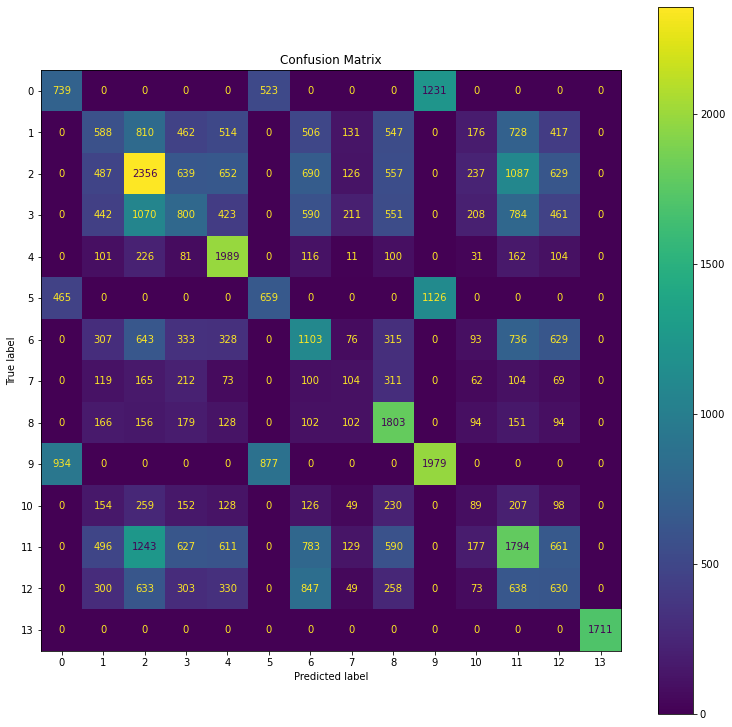

In [36]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

In [37]:
print ("My program took", time.time() - start_time, "to run")

My program took 1667.0730214118958 to run
